In [1]:
'''
Importing libraries
'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

from scipy.stats import moment
from scipy.stats import describe

In [2]:
print(describe([1,2,3,4,5,6]))
#print(basic_stats_error([1,2,3,4,5,6]))

DescribeResult(nobs=6, minmax=(1, 6), mean=3.5, variance=3.5, skewness=0.0, kurtosis=-1.2685714285714282)


# Function to compute basic stats of noun phrases errors

In [3]:
def basic_stats_error(datalist):
    
    if len(datalist)>1:
        result_describe = list(describe(datalist)[2:])
        result_percentile = result_describe + list(np.percentile(datalist,[10,25,50,75,90]))
        array = np.array(datalist)
        result_percentile = result_percentile+[len(array),len(array[np.where(array>0)[0]])/len(array)*100,
                                               len(array[np.where(array<0)[0]])/len(array)*100]
    else:
        result_percentile = []

    return result_percentile

In [4]:
def basic_stats_error_threshold(datalist, threshold_inf, threshold_sup):
    
    datalist = datalist[(datalist>threshold_inf) & (datalist<threshold_sup)]
    
    if len(datalist)>1:
        result_describe = list(describe(datalist)[2:])
        result_percentile = result_describe + list(np.percentile(datalist,[10,25,50,75,90]))
        array = np.array(datalist)
        result_percentile = result_percentile+[len(array),len(array[np.where(array>0)[0]])/len(array)*100,
                                               len(array[np.where(array<0)[0]])/len(array)*100]
    else:
        result_percentile = []

    return result_percentile

# Function to "explote" varios colums of lists to rows (Pandas)

In [5]:
def explode(df, lst_cols, fill_value=''):
    # make sure `lst_cols` is a list
    if lst_cols and not isinstance(lst_cols, list):
        lst_cols = [lst_cols]
    # all columns except `lst_cols`
    idx_cols = df.columns.difference(lst_cols)

    # calculate lengths of lists
    lens = df[lst_cols[0]].str.len()

    if (lens > 0).all():
        # ALL lists in cells aren't empty
        return pd.DataFrame({
            col:np.repeat(df[col].values, df[lst_cols[0]].str.len())
            for col in idx_cols
        }).assign(**{col:np.concatenate(df[col].values) for col in lst_cols}) \
          .loc[:, df.columns]
    else:
        # at least one list in cells is empty
        return pd.DataFrame({
            col:np.repeat(df[col].values, df[lst_cols[0]].str.len())
            for col in idx_cols
        }).assign(**{col:np.concatenate(df[col].values) for col in lst_cols}) \
          .append(df.loc[lens==0, idx_cols]).fillna(fill_value) \
          .loc[:, df.columns]

# Read Noun phrases

In [6]:
state = 'GA'
noun_frases_file = 'comments/raw_comments/agent_comments_'+state+\
                        '_filtered_noun_sentences_noun_sentences_df_final_reindex.fea'

In [7]:
noun_sentence_df_final_reindex_df = pd.read_feather(noun_frases_file)

In [8]:
noun_sentence_df_final_reindex_df

index  \
0                        new bathrooms   
1                      quartz counters   
2                         new vanities   
3                           top bottom   
4                 new kitchen cabinets   
...                                ...   
5892  seller requests buyer use seller   
5893              great home investors   
5894                     needs repairs   
5895           seller chooses attorney   
5896             utilities inspections   

                                         AVM_Error_List  \
0     [0.08597482412060298, 0.3871455128205128, 0.10...   
1     [0.07029558080808074, -0.1108344112149533, -0....   
2     [0.05081320930232558, 0.11438233983286916, 0.2...   
3     [-0.17483815668202762, 0.19112432919954903, 0....   
4     [0.3935276169265033, -0.02473273949579835, 0.0...   
...                                                 ...   
5892  [-1.3322289999999999, 0.16222735849056613, -0....   
5893  [0.2702147777777778, -0.935163, 0.003965343511...   
5894  [-0.7064920000000001, -0.2677977391304347, -0....   
5895  [0.06298180555555555, -0.07527600000000012, -0...   
5896  [0.4163836666666666, 0.39873944387229654, -0.6...   

                                     Listing_Error_List  \
0     [-0.13015075376884422, -0.07435897435897436, 0...   
1     [-0.007575757575757576, 0.0, -0.02864583333333...   
2     [-0.046046511627906975, 0.0, -0.02977099236641...   
3     [-0.03686635944700461, 0.0033821871476888386, ...   
4     [0.16481069042316257, -0.008067226890756302, 0...   
...                                                 ...   
5892  [-0.25, -0.1320754716981132, 0.042553191489361...   
5893  [-0.1, -0.25, -0.06793893129770992, -0.2857142...   
5894  [-0.047619047619047616, -0.08695652173913043, ...   
5895  [0.02847222222222222, -0.2153846153846154, -0....   
5896  [0.0, 0.3831101956745623, 0.18082191780821918,...   

                                         Listingid_List  \
0     [226708724, 227746452, 229017180, 228949298, 2...   
1     [227358991, 227699211, 228305742, 227431065, 2...   
2     [226970933, 226982614, 226851936, 227401486, 2...   
3     [226661263, 226825487, 227069487, 227750825, 2...   
4     [226027366, 227018382, 231664083, 84775258, 22...   
...                                                 ...   
5892  [198263962, 200651017, 209001692, 212786867, 1...   
5893  [197054770, 7127689, 5328741, 5327676, 3232636...   
5894  [230618952, 187242734, 210454013, 180080258, 1...   
5895  [77911179, 180510904, 189586243, 77958589, 854...   
5896  [141330016, 5849187, 18649413, 18313543, 13941...   

                   noun_sentence_corrections_embeddings  
0     [-0.011923872, -0.040925846, -0.060033374, -0....  
1     [-0.024693737, -0.0334674, 0.03262032, -0.0333...  
2     [-0.05858002, -0.078841336, 0.007744186, -0.04...  
3     [-0.055551246, -0.050620284, 0.022666093, 0.04...  
4     [-0.0027903197, 0.035919096, -0.03295671, -0.0...  
...                                                 ...  
5892  [-0.071547754, -0.007990354, 0.044830173, 0.01...  
5893  [-0.021865588, -0.05759102, -0.037234746, -0.0...  
5894  [-0.04354262, -0.037721384, 0.010220117, 0.044...  
5895  [-0.05809925, -0.012980465, -0.021596901, 0.03...  
5896  [-0.011067669, -0.0022810258, 0.023981124, -0....  

[5897 rows x 5 columns]

In [9]:
noun_sentence_df_final_reindex_df[noun_sentence_df_final_reindex_df['index']=='great fixer']

index                                     AVM_Error_List  \
5889  great fixer  [-0.616063103448276, -0.4462150793650794, -0.2...   

                                     Listing_Error_List  \
5889  [-0.1896551724137931, -0.10952380952380952, 0....   

                                         Listingid_List  \
5889  [227174844, 208941498, 210847788, 209379429, 1...   

                   noun_sentence_corrections_embeddings  
5889  [0.010110681, -0.015112566, -0.054446034, 0.01...

## Read Agent comments filtered

In [10]:

file = 'comments/raw_comments/agent_comments_'+state+\
                        '_filtered.fea'
df_sales = pd.read_feather(file)


In [11]:
#df_sales[df_sales.listingid == 227503886]

In [12]:
df_sales = df_sales.iloc[::-1].reset_index().drop(columns=['index', 'level_0'])

In [13]:
df_sales = df_sales.drop_duplicates(subset='listingid', keep="first")

In [14]:
print(len(df_sales))

735297


In [15]:
df_sales['transaction_year'] = np.floor(np.array((df_sales['Transdate'].values/10000)))

In [16]:
df_sales = df_sales[df_sales['transaction_year'] > 2017]

In [17]:
print(len(df_sales))

283189


## Compute error statistics

In [18]:
error_window = 2.5

In [19]:
noun_sentence_df_final_reindex_df['AVM_Error_Indicators'] = \
        noun_sentence_df_final_reindex_df['AVM_Error_List'].apply(lambda x: basic_stats_error_threshold(x, 
                                                                            -1*error_window, error_window))

In [20]:
noun_sentence_df_final_reindex_df['Listing_Error_Indicators'] = \
        noun_sentence_df_final_reindex_df['Listing_Error_List'].apply(lambda x: basic_stats_error_threshold(x, -
                                                                                    1*error_window, error_window))

In [21]:
noun_sentence_df_final_reindex_df

index  \
0                        new bathrooms   
1                      quartz counters   
2                         new vanities   
3                           top bottom   
4                 new kitchen cabinets   
...                                ...   
5892  seller requests buyer use seller   
5893              great home investors   
5894                     needs repairs   
5895           seller chooses attorney   
5896             utilities inspections   

                                         AVM_Error_List  \
0     [0.08597482412060298, 0.3871455128205128, 0.10...   
1     [0.07029558080808074, -0.1108344112149533, -0....   
2     [0.05081320930232558, 0.11438233983286916, 0.2...   
3     [-0.17483815668202762, 0.19112432919954903, 0....   
4     [0.3935276169265033, -0.02473273949579835, 0.0...   
...                                                 ...   
5892  [-1.3322289999999999, 0.16222735849056613, -0....   
5893  [0.2702147777777778, -0.935163, 0.003965343511...   
5894  [-0.7064920000000001, -0.2677977391304347, -0....   
5895  [0.06298180555555555, -0.07527600000000012, -0...   
5896  [0.4163836666666666, 0.39873944387229654, -0.6...   

                                     Listing_Error_List  \
0     [-0.13015075376884422, -0.07435897435897436, 0...   
1     [-0.007575757575757576, 0.0, -0.02864583333333...   
2     [-0.046046511627906975, 0.0, -0.02977099236641...   
3     [-0.03686635944700461, 0.0033821871476888386, ...   
4     [0.16481069042316257, -0.008067226890756302, 0...   
...                                                 ...   
5892  [-0.25, -0.1320754716981132, 0.042553191489361...   
5893  [-0.1, -0.25, -0.06793893129770992, -0.2857142...   
5894  [-0.047619047619047616, -0.08695652173913043, ...   
5895  [0.02847222222222222, -0.2153846153846154, -0....   
5896  [0.0, 0.3831101956745623, 0.18082191780821918,...   

                                         Listingid_List  \
0     [226708724, 227746452, 229017180, 228949298, 2...   
1     [227358991, 227699211, 228305742, 227431065, 2...   
2     [226970933, 226982614, 226851936, 227401486, 2...   
3     [226661263, 226825487, 227069487, 227750825, 2...   
4     [226027366, 227018382, 231664083, 84775258, 22...   
...                                                 ...   
5892  [198263962, 200651017, 209001692, 212786867, 1...   
5893  [197054770, 7127689, 5328741, 5327676, 3232636...   
5894  [230618952, 187242734, 210454013, 180080258, 1...   
5895  [77911179, 180510904, 189586243, 77958589, 854...   
5896  [141330016, 5849187, 18649413, 18313543, 13941...   

                   noun_sentence_corrections_embeddings  \
0     [-0.011923872, -0.040925846, -0.060033374, -0....   
1     [-0.024693737, -0.0334674, 0.03262032, -0.0333...   
2     [-0.05858002, -0.078841336, 0.007744186, -0.04...   
3     [-0.055551246, -0.050620284, 0.022666093, 0.04...   
4     [-0.0027903197, 0.035919096, -0.03295671, -0.0...   
...                                                 ...   
5892  [-0.071547754, -0.007990354, 0.044830173, 0.01...   
5893  [-0.021865588, -0.05759102, -0.037234746, -0.0...   
5894  [-0.04354262, -0.037721384, 0.010220117, 0.044...   
5895  [-0.05809925, -0.012980465, -0.021596901, 0.03...   
5896  [-0.011067669, -0.0022810258, 0.023981124, -0....   

                                   AVM_Error_Indicators  \
0     [0.1279746898090974, 0.03704721347724958, -0.7...   
1     [0.104239794412227, 0.02987178871287464, 0.257...   
2     [0.10905850318774978, 0.03076954958218185, 0.2...   
3     [0.10612712476519115, 0.02948483808642417, 0.1...   
4     [0.06608277626460807, 0.03249721292918633, -0....   
...                                                 ...   
5892  [-0.38333426451694014, 0.14118332477478868, -0...   
5893  [-0.403391894531088, 0.1892486183297783, -0.49...   
5894  [-0.4190185064963787, 0.14842644233861493, -0....   
5895  [-0.4837196232059463, 0.1564176054870049, 0.07...   
5896  [-0.4956578748525087, 0.2055132730757

## Splitting error statistics and embeddings

In [22]:
columns_to_split = [ 'AVM_Error_Indicators',
                     'noun_sentence_corrections_embeddings', 'Listing_Error_Indicators']

In [23]:
for column in columns_to_split:
    nelements = (len(noun_sentence_df_final_reindex_df[column].values[0]))
    list_tmp = [str(i) for i in range(nelements)] 
    column_names = [column + '_' + str(i) for i in list_tmp] 
    print(column_names)
    split_df = pd.DataFrame(noun_sentence_df_final_reindex_df[column].tolist(), columns=column_names, 
                            index=noun_sentence_df_final_reindex_df.index)
    noun_sentence_df_final_reindex_df = pd.concat([noun_sentence_df_final_reindex_df, split_df], axis=1)
    noun_sentence_df_final_reindex_df = noun_sentence_df_final_reindex_df.drop(columns = [column])

['AVM_Error_Indicators_0', 'AVM_Error_Indicators_1', 'AVM_Error_Indicators_2', 'AVM_Error_Indicators_3', 'AVM_Error_Indicators_4', 'AVM_Error_Indicators_5', 'AVM_Error_Indicators_6', 'AVM_Error_Indicators_7', 'AVM_Error_Indicators_8', 'AVM_Error_Indicators_9', 'AVM_Error_Indicators_10', 'AVM_Error_Indicators_11']
['noun_sentence_corrections_embeddings_0', 'noun_sentence_corrections_embeddings_1', 'noun_sentence_corrections_embeddings_2', 'noun_sentence_corrections_embeddings_3', 'noun_sentence_corrections_embeddings_4', 'noun_sentence_corrections_embeddings_5', 'noun_sentence_corrections_embeddings_6', 'noun_sentence_corrections_embeddings_7', 'noun_sentence_corrections_embeddings_8', 'noun_sentence_corrections_embeddings_9', 'noun_sentence_corrections_embeddings_10', 'noun_sentence_corrections_embeddings_11', 'noun_sentence_corrections_embeddings_12', 'noun_sentence_corrections_embeddings_13', 'noun_sentence_corrections_embeddings_14', 'noun_sentence_corrections_embeddings_15', 'noun_

['Listing_Error_Indicators_0', 'Listing_Error_Indicators_1', 'Listing_Error_Indicators_2', 'Listing_Error_Indicators_3', 'Listing_Error_Indicators_4', 'Listing_Error_Indicators_5', 'Listing_Error_Indicators_6', 'Listing_Error_Indicators_7', 'Listing_Error_Indicators_8', 'Listing_Error_Indicators_9', 'Listing_Error_Indicators_10', 'Listing_Error_Indicators_11']


In [24]:
noun_sentence_df_final_reindex_df.columns

Index(['index', 'AVM_Error_List', 'Listing_Error_List', 'Listingid_List',
       'AVM_Error_Indicators_0', 'AVM_Error_Indicators_1',
       'AVM_Error_Indicators_2', 'AVM_Error_Indicators_3',
       'AVM_Error_Indicators_4', 'AVM_Error_Indicators_5',
       ...
       'Listing_Error_Indicators_2', 'Listing_Error_Indicators_3',
       'Listing_Error_Indicators_4', 'Listing_Error_Indicators_5',
       'Listing_Error_Indicators_6', 'Listing_Error_Indicators_7',
       'Listing_Error_Indicators_8', 'Listing_Error_Indicators_9',
       'Listing_Error_Indicators_10', 'Listing_Error_Indicators_11'],
      dtype='object', length=540)

## Counting cases by noun phrase

In [25]:
noun_sentence_df_final_reindex_df['AVM_Error_List_count'] = noun_sentence_df_final_reindex_df['AVM_Error_List'].apply(lambda x: len(x))

In [26]:
noun_sentence_df_final_reindex_df['Listing_Error_List_count'] = noun_sentence_df_final_reindex_df['Listing_Error_List'].apply(lambda x: len(x))

In [27]:
noun_sentence_df_final_reindex_df['Listingid_List_count'] = noun_sentence_df_final_reindex_df['Listingid_List'].apply(lambda x: len(x))

In [28]:
noun_sentence_df_final_reindex_df

index  \
0                        new bathrooms   
1                      quartz counters   
2                         new vanities   
3                           top bottom   
4                 new kitchen cabinets   
...                                ...   
5892  seller requests buyer use seller   
5893              great home investors   
5894                     needs repairs   
5895           seller chooses attorney   
5896             utilities inspections   

                                         AVM_Error_List  \
0     [0.08597482412060298, 0.3871455128205128, 0.10...   
1     [0.07029558080808074, -0.1108344112149533, -0....   
2     [0.05081320930232558, 0.11438233983286916, 0.2...   
3     [-0.17483815668202762, 0.19112432919954903, 0....   
4     [0.3935276169265033, -0.02473273949579835, 0.0...   
...                                                 ...   
5892  [-1.3322289999999999, 0.16222735849056613, -0....   
5893  [0.2702147777777778, -0.935163, 0.003965343511...   
5894  [-0.7064920000000001, -0.2677977391304347, -0....   
5895  [0.06298180555555555, -0.07527600000000012, -0...   
5896  [0.4163836666666666, 0.39873944387229654, -0.6...   

                                     Listing_Error_List  \
0     [-0.13015075376884422, -0.07435897435897436, 0...   
1     [-0.007575757575757576, 0.0, -0.02864583333333...   
2     [-0.046046511627906975, 0.0, -0.02977099236641...   
3     [-0.03686635944700461, 0.0033821871476888386, ...   
4     [0.16481069042316257, -0.008067226890756302, 0...   
...                                                 ...   
5892  [-0.25, -0.1320754716981132, 0.042553191489361...   
5893  [-0.1, -0.25, -0.06793893129770992, -0.2857142...   
5894  [-0.047619047619047616, -0.08695652173913043, ...   
5895  [0.02847222222222222, -0.2153846153846154, -0....   
5896  [0.0, 0.3831101956745623, 0.18082191780821918,...   

                                         Listingid_List  \
0     [226708724, 227746452, 229017180, 228949298, 2...   
1     [227358991, 227699211, 228305742, 227431065, 2...   
2     [226970933, 226982614, 226851936, 227401486, 2...   
3     [226661263, 226825487, 227069487, 227750825, 2...   
4     [226027366, 227018382, 231664083, 84775258, 22...   
...                                                 ...   
5892  [198263962, 200651017, 209001692, 212786867, 1...   
5893  [197054770, 7127689, 5328741, 5327676, 3232636...   
5894  [230618952, 187242734, 210454013, 180080258, 1...   
5895  [77911179, 180510904, 189586243, 77958589, 854...   
5896  [141330016, 5849187, 18649413, 18313543, 13941...   

      AVM_Error_Indicators_0  AVM_Error_Indicators_1  AVM_Error_Indicators_2  \
0                   0.127975                0.037047               -0.734794   
1                   0.104240                0.029872                0.257334   
2                   0.109059                0.030770                0.200060   
3                   0.106127                0.029485                0.105453   
4                   0.066083                0.032497               -0.556127   
...                      ...                     ...                     ...   
5892               -0.383334                0.141183               -0.955026   
5893               -0.403392                0.189249               -0.490470   
5894               -0.419019                0.148426               -0.401024   
5895               -0.483720                0.156418                0.070260   
5896               -0.495658                0.205513               -0.040762   

      AVM_Error_Indicators_3  AVM_Error_Indicators_4  AVM_Error_Indicators_5  \
0                   4.067343               -0.087993                0.018628   
1                   1.273075               -0.078228               -0.004856   
2                   0.451612               -0.094250               -0.006794   
3                   0.391163               -0.086318               -0.000855   
4                   4.557150            

## Compute error indicators

In [29]:
noun_sentence_df_final_reindex_df['AVM_Error_Indicators_scale'] =\
        noun_sentence_df_final_reindex_df['AVM_Error_Indicators_1'].values**0.5/\
                    np.abs(noun_sentence_df_final_reindex_df['AVM_Error_Indicators_0'].values)

In [30]:
noun_sentence_df_final_reindex_df['AVM_Error_Indicators_scale_inverse'] =\
        np.abs(noun_sentence_df_final_reindex_df['AVM_Error_Indicators_0'].values)/\
        (noun_sentence_df_final_reindex_df['AVM_Error_Indicators_1'].values**0.5)
                    

In [31]:
noun_sentence_df_final_reindex_df.AVM_Error_Indicators_scale.max()

19555.93882723469

(array([396., 391., 380., 369., 371., 339., 296., 276., 280., 269., 234.,
        205., 195., 163., 146., 141., 112., 111., 102.,  84.,  70.,  77.,
         99.,  68.,  63.,  56.,  56.,  35.,  42.,  35.,  31.,  41.,  35.,
         29.,  17.,  30.,  22.,  22.,  10.,  15.,  12.,  14.,   8.,   7.,
          3.,   9.,   7.,  11.,   8.,  12.,   9.,   3.,   7.,   5.,   3.,
          4.,   4.,   5.,   4.,   4.,   2.,   2.,   5.,   2.,   0.,   5.,
          1.,   0.,   4.,   1.,   0.,   1.,   2.,   1.,   0.,   5.,   3.,
          0.,   0.,   0.,   1.,   1.,   2.,   1.,   0.,   0.,   0.,   0.,
          1.,   1.,   1.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,
          1.]),
 array([5.11353614e-05, 1.22813121e-02, 2.45114887e-02, 3.67416654e-02,
        4.89718421e-02, 6.12020188e-02, 7.34321955e-02, 8.56623722e-02,
        9.78925489e-02, 1.10122726e-01, 1.22352902e-01, 1.34583079e-01,
        1.46813256e-01, 1.59043432e-01, 1.71273609e-01, 1.83503786e-01,
        1.95733962e-01, 2.0796

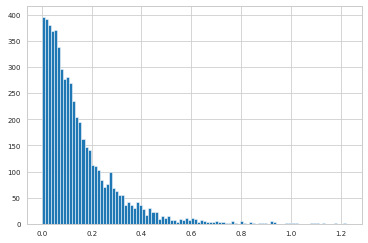

In [32]:
plt.hist(noun_sentence_df_final_reindex_df.AVM_Error_Indicators_scale_inverse,bins=100)

In [33]:
noun_sentence_df_final_reindex_df

index  \
0                        new bathrooms   
1                      quartz counters   
2                         new vanities   
3                           top bottom   
4                 new kitchen cabinets   
...                                ...   
5892  seller requests buyer use seller   
5893              great home investors   
5894                     needs repairs   
5895           seller chooses attorney   
5896             utilities inspections   

                                         AVM_Error_List  \
0     [0.08597482412060298, 0.3871455128205128, 0.10...   
1     [0.07029558080808074, -0.1108344112149533, -0....   
2     [0.05081320930232558, 0.11438233983286916, 0.2...   
3     [-0.17483815668202762, 0.19112432919954903, 0....   
4     [0.3935276169265033, -0.02473273949579835, 0.0...   
...                                                 ...   
5892  [-1.3322289999999999, 0.16222735849056613, -0....   
5893  [0.2702147777777778, -0.935163, 0.003965343511...   
5894  [-0.7064920000000001, -0.2677977391304347, -0....   
5895  [0.06298180555555555, -0.07527600000000012, -0...   
5896  [0.4163836666666666, 0.39873944387229654, -0.6...   

                                     Listing_Error_List  \
0     [-0.13015075376884422, -0.07435897435897436, 0...   
1     [-0.007575757575757576, 0.0, -0.02864583333333...   
2     [-0.046046511627906975, 0.0, -0.02977099236641...   
3     [-0.03686635944700461, 0.0033821871476888386, ...   
4     [0.16481069042316257, -0.008067226890756302, 0...   
...                                                 ...   
5892  [-0.25, -0.1320754716981132, 0.042553191489361...   
5893  [-0.1, -0.25, -0.06793893129770992, -0.2857142...   
5894  [-0.047619047619047616, -0.08695652173913043, ...   
5895  [0.02847222222222222, -0.2153846153846154, -0....   
5896  [0.0, 0.3831101956745623, 0.18082191780821918,...   

                                         Listingid_List  \
0     [226708724, 227746452, 229017180, 228949298, 2...   
1     [227358991, 227699211, 228305742, 227431065, 2...   
2     [226970933, 226982614, 226851936, 227401486, 2...   
3     [226661263, 226825487, 227069487, 227750825, 2...   
4     [226027366, 227018382, 231664083, 84775258, 22...   
...                                                 ...   
5892  [198263962, 200651017, 209001692, 212786867, 1...   
5893  [197054770, 7127689, 5328741, 5327676, 3232636...   
5894  [230618952, 187242734, 210454013, 180080258, 1...   
5895  [77911179, 180510904, 189586243, 77958589, 854...   
5896  [141330016, 5849187, 18649413, 18313543, 13941...   

      AVM_Error_Indicators_0  AVM_Error_Indicators_1  AVM_Error_Indicators_2  \
0                   0.127975                0.037047               -0.734794   
1                   0.104240                0.029872                0.257334   
2                   0.109059                0.030770                0.200060   
3                   0.106127                0.029485                0.105453   
4                   0.066083                0.032497               -0.556127   
...                      ...                     ...                     ...   
5892               -0.383334                0.141183               -0.955026   
5893               -0.403392                0.189249               -0.490470   
5894               -0.419019                0.148426               -0.401024   
5895               -0.483720                0.156418                0.070260   
5896               -0.495658                0.205513               -0.040762   

      AVM_Error_Indicators_3  AVM_Error_Indicators_4  AVM_Error_Indicators_5  \
0                   4.067343               -0.087993                0.018628   
1                   1.273075               -0.078228               -0.004856   
2                   0.451612               -0.094250               -0.006794   
3                   0.391163               -0.086318               -0.000855   
4                   4.557150            

## Filtering by error indicators

In [34]:
#noun_sentence_df_final_reindex_df_filtered = noun_sentence_df_final_reindex_df[noun_sentence_df_final_reindex_df.AVM_Error_Indicators_scale_inverse>0.15]
noun_sentence_df_final_reindex_df_filtered = noun_sentence_df_final_reindex_df

In [35]:
#noun_sentence_df_final_reindex_df_filtered = noun_sentence_df_final_reindex_df[\
#                                                noun_sentence_df_final_reindex_df.AVM_Error_Indicators_scale<20]

In [36]:
noun_sentence_df_final_reindex_df

index  \
0                        new bathrooms   
1                      quartz counters   
2                         new vanities   
3                           top bottom   
4                 new kitchen cabinets   
...                                ...   
5892  seller requests buyer use seller   
5893              great home investors   
5894                     needs repairs   
5895           seller chooses attorney   
5896             utilities inspections   

                                         AVM_Error_List  \
0     [0.08597482412060298, 0.3871455128205128, 0.10...   
1     [0.07029558080808074, -0.1108344112149533, -0....   
2     [0.05081320930232558, 0.11438233983286916, 0.2...   
3     [-0.17483815668202762, 0.19112432919954903, 0....   
4     [0.3935276169265033, -0.02473273949579835, 0.0...   
...                                                 ...   
5892  [-1.3322289999999999, 0.16222735849056613, -0....   
5893  [0.2702147777777778, -0.935163, 0.003965343511...   
5894  [-0.7064920000000001, -0.2677977391304347, -0....   
5895  [0.06298180555555555, -0.07527600000000012, -0...   
5896  [0.4163836666666666, 0.39873944387229654, -0.6...   

                                     Listing_Error_List  \
0     [-0.13015075376884422, -0.07435897435897436, 0...   
1     [-0.007575757575757576, 0.0, -0.02864583333333...   
2     [-0.046046511627906975, 0.0, -0.02977099236641...   
3     [-0.03686635944700461, 0.0033821871476888386, ...   
4     [0.16481069042316257, -0.008067226890756302, 0...   
...                                                 ...   
5892  [-0.25, -0.1320754716981132, 0.042553191489361...   
5893  [-0.1, -0.25, -0.06793893129770992, -0.2857142...   
5894  [-0.047619047619047616, -0.08695652173913043, ...   
5895  [0.02847222222222222, -0.2153846153846154, -0....   
5896  [0.0, 0.3831101956745623, 0.18082191780821918,...   

                                         Listingid_List  \
0     [226708724, 227746452, 229017180, 228949298, 2...   
1     [227358991, 227699211, 228305742, 227431065, 2...   
2     [226970933, 226982614, 226851936, 227401486, 2...   
3     [226661263, 226825487, 227069487, 227750825, 2...   
4     [226027366, 227018382, 231664083, 84775258, 22...   
...                                                 ...   
5892  [198263962, 200651017, 209001692, 212786867, 1...   
5893  [197054770, 7127689, 5328741, 5327676, 3232636...   
5894  [230618952, 187242734, 210454013, 180080258, 1...   
5895  [77911179, 180510904, 189586243, 77958589, 854...   
5896  [141330016, 5849187, 18649413, 18313543, 13941...   

      AVM_Error_Indicators_0  AVM_Error_Indicators_1  AVM_Error_Indicators_2  \
0                   0.127975                0.037047               -0.734794   
1                   0.104240                0.029872                0.257334   
2                   0.109059                0.030770                0.200060   
3                   0.106127                0.029485                0.105453   
4                   0.066083                0.032497               -0.556127   
...                      ...                     ...                     ...   
5892               -0.383334                0.141183               -0.955026   
5893               -0.403392                0.189249               -0.490470   
5894               -0.419019                0.148426               -0.401024   
5895               -0.483720                0.156418                0.070260   
5896               -0.495658                0.205513               -0.040762   

      AVM_Error_Indicators_3  AVM_Error_Indicators_4  AVM_Error_Indicators_5  \
0                   4.067343               -0.087993                0.018628   
1                   1.273075               -0.078228               -0.004856   
2                   0.451612               -0.094250               -0.006794   
3                   0.391163               -0.086318               -0.000855   
4                   4.557150            

In [37]:
noun_sentence_df_final_reindex_df_filtered =  noun_sentence_df_final_reindex_df_filtered.sort_values(['AVM_Error_Indicators_scale_inverse','AVM_Error_List_count'],ascending=False)

In [38]:
noun_sentence_df_final_reindex_df_filtered

index  \
5895  seller chooses attorney   
522           omission and or   
545               actual plan   
501                 tack room   
5896    utilities inspections   
...                       ...   
3994               water park   
3998         future expansion   
3997       br2 bathroom ranch   
3996           desirable home   
3995          separate pantry   

                                         AVM_Error_List  \
5895  [0.06298180555555555, -0.07527600000000012, -0...   
522   [0.4479667188315075, 0.39755113043478263, -0.0...   
545   [0.42815819563780577, 0.11401168674698792, -0....   
501   [0.44872725925925916, 0.45379861666666665, 0.0...   
5896  [0.4163836666666666, 0.39873944387229654, -0.6...   
...                                                 ...   
3994  [-0.11378977777777788, -0.14552017441860476, 0...   
3998  [-0.01279978378378388, 0.014598512820512832, -...   
3997  [0.11118245454545461, 0.03668516666666666, -0....   
3996  [-0.020921433224755814, 0.05093086505190314, -...   
3995  [-0.054842822222222365, -0.00964239999999994, ...   

                                     Listing_Error_List  \
5895  [0.02847222222222222, -0.2153846153846154, -0....   
522   [0.0, -0.020217391304347826, -0.00231481481481...   
545   [0.008922670191672175, -0.05176706827309237, -...   
501   [0.07425925925925926, -0.07166666666666667, -0...   
5896  [0.0, 0.3831101956745623, 0.18082191780821918,...   
...                                                 ...   
3994  [-0.025, 0.012209302325581395, -0.040780911062...   
3998  [0.0, -0.10256410256410256, -0.094624179031865...   
3997  [-0.06060606060606061, -0.03958333333333333, -...   
3996  [-0.026058631921824105, -0.03737024221453287, ...   
3995  [-0.03333333333333333, -0.0792, -0.07904761904...   

                                         Listingid_List  \
5895  [77911179, 180510904, 189586243, 77958589, 854...   
522   [200890959, 212474411, 216781018, 4238321, 127...   
545   [5184741, 139507483, 78208714, 4238321, 127010...   
501   [227233008, 229916399, 231096734, 233312147, 1...   
5896  [141330016, 5849187, 18649413, 18313543, 13941...   
...                                                 ...   
3994  [229000138, 230230687, 178023770, 195743480, 2...   
3998  [226857676, 227773564, 227500854, 227924167, 2...   
3997  [200780229, 178620614, 178768582, 166157271, 8...   
3996  [226856145, 186390639, 186409591, 209492834, 2...   
3995  [226727431, 227718168, 227997431, 230259076, 2...   

      AVM_Error_Indicators_0  AVM_Error_Indicators_1  AVM_Error_Indicators_2  \
5895               -0.483720                0.156418                0.070260   
522                 0.138569                0.013917                0.724653   
545                 0.123353                0.012009                0.192376   
501                 0.189426                0.028998               -0.071868   
5896               -0.495658                0.205513               -0.040762   
...                      ...                     ...                     ...   
3994                0.000024                0.013860                0.819370   
3998               -0.000032                0.029226               -0.263004   
3997               -0.000026                0.026193               -1.076601   
3996               -0.000015                0.013242               -0.826829   
3995                0.000007                0.017585                0.470380   

      AVM_Error_Indicators_3  AVM_Error_Indicators_4  AVM_Error_Indicators_5  \
5895               -0.699504               -1.030980               -0.751404   
522                 0.433639               -0.004312                0.082017   
545                 0.767948               -0.014436                0.082776   
501                -0.215701               -0.024640                0.089107   
5896               -0.612167               -1.084486               -0.765986   
...                      ...                     ...       

In [39]:
len(noun_sentence_df_final_reindex_df_filtered)

5897

In [40]:
#noun_sentence_df_final_reindex_df_filtered = noun_sentence_df_final_reindex_df_filtered.sort_values(['AVM_Error_List_count'],ascending=False)

In [41]:
noun_sentence_df_final_reindex_df_filtered

index  \
5895  seller chooses attorney   
522           omission and or   
545               actual plan   
501                 tack room   
5896    utilities inspections   
...                       ...   
3994               water park   
3998         future expansion   
3997       br2 bathroom ranch   
3996           desirable home   
3995          separate pantry   

                                         AVM_Error_List  \
5895  [0.06298180555555555, -0.07527600000000012, -0...   
522   [0.4479667188315075, 0.39755113043478263, -0.0...   
545   [0.42815819563780577, 0.11401168674698792, -0....   
501   [0.44872725925925916, 0.45379861666666665, 0.0...   
5896  [0.4163836666666666, 0.39873944387229654, -0.6...   
...                                                 ...   
3994  [-0.11378977777777788, -0.14552017441860476, 0...   
3998  [-0.01279978378378388, 0.014598512820512832, -...   
3997  [0.11118245454545461, 0.03668516666666666, -0....   
3996  [-0.020921433224755814, 0.05093086505190314, -...   
3995  [-0.054842822222222365, -0.00964239999999994, ...   

                                     Listing_Error_List  \
5895  [0.02847222222222222, -0.2153846153846154, -0....   
522   [0.0, -0.020217391304347826, -0.00231481481481...   
545   [0.008922670191672175, -0.05176706827309237, -...   
501   [0.07425925925925926, -0.07166666666666667, -0...   
5896  [0.0, 0.3831101956745623, 0.18082191780821918,...   
...                                                 ...   
3994  [-0.025, 0.012209302325581395, -0.040780911062...   
3998  [0.0, -0.10256410256410256, -0.094624179031865...   
3997  [-0.06060606060606061, -0.03958333333333333, -...   
3996  [-0.026058631921824105, -0.03737024221453287, ...   
3995  [-0.03333333333333333, -0.0792, -0.07904761904...   

                                         Listingid_List  \
5895  [77911179, 180510904, 189586243, 77958589, 854...   
522   [200890959, 212474411, 216781018, 4238321, 127...   
545   [5184741, 139507483, 78208714, 4238321, 127010...   
501   [227233008, 229916399, 231096734, 233312147, 1...   
5896  [141330016, 5849187, 18649413, 18313543, 13941...   
...                                                 ...   
3994  [229000138, 230230687, 178023770, 195743480, 2...   
3998  [226857676, 227773564, 227500854, 227924167, 2...   
3997  [200780229, 178620614, 178768582, 166157271, 8...   
3996  [226856145, 186390639, 186409591, 209492834, 2...   
3995  [226727431, 227718168, 227997431, 230259076, 2...   

      AVM_Error_Indicators_0  AVM_Error_Indicators_1  AVM_Error_Indicators_2  \
5895               -0.483720                0.156418                0.070260   
522                 0.138569                0.013917                0.724653   
545                 0.123353                0.012009                0.192376   
501                 0.189426                0.028998               -0.071868   
5896               -0.495658                0.205513               -0.040762   
...                      ...                     ...                     ...   
3994                0.000024                0.013860                0.819370   
3998               -0.000032                0.029226               -0.263004   
3997               -0.000026                0.026193               -1.076601   
3996               -0.000015                0.013242               -0.826829   
3995                0.000007                0.017585                0.470380   

      AVM_Error_Indicators_3  AVM_Error_Indicators_4  AVM_Error_Indicators_5  \
5895               -0.699504               -1.030980               -0.751404   
522                 0.433639               -0.004312                0.082017   
545                 0.767948               -0.014436                0.082776   
501                -0.215701               -0.024640                0.089107   
5896               -0.612167               -1.084486               -0.765986   
...                      ...                     ...       

In [42]:
noun_sentence_df_final_reindex_df_filtered

index  \
5895  seller chooses attorney   
522           omission and or   
545               actual plan   
501                 tack room   
5896    utilities inspections   
...                       ...   
3994               water park   
3998         future expansion   
3997       br2 bathroom ranch   
3996           desirable home   
3995          separate pantry   

                                         AVM_Error_List  \
5895  [0.06298180555555555, -0.07527600000000012, -0...   
522   [0.4479667188315075, 0.39755113043478263, -0.0...   
545   [0.42815819563780577, 0.11401168674698792, -0....   
501   [0.44872725925925916, 0.45379861666666665, 0.0...   
5896  [0.4163836666666666, 0.39873944387229654, -0.6...   
...                                                 ...   
3994  [-0.11378977777777788, -0.14552017441860476, 0...   
3998  [-0.01279978378378388, 0.014598512820512832, -...   
3997  [0.11118245454545461, 0.03668516666666666, -0....   
3996  [-0.020921433224755814, 0.05093086505190314, -...   
3995  [-0.054842822222222365, -0.00964239999999994, ...   

                                     Listing_Error_List  \
5895  [0.02847222222222222, -0.2153846153846154, -0....   
522   [0.0, -0.020217391304347826, -0.00231481481481...   
545   [0.008922670191672175, -0.05176706827309237, -...   
501   [0.07425925925925926, -0.07166666666666667, -0...   
5896  [0.0, 0.3831101956745623, 0.18082191780821918,...   
...                                                 ...   
3994  [-0.025, 0.012209302325581395, -0.040780911062...   
3998  [0.0, -0.10256410256410256, -0.094624179031865...   
3997  [-0.06060606060606061, -0.03958333333333333, -...   
3996  [-0.026058631921824105, -0.03737024221453287, ...   
3995  [-0.03333333333333333, -0.0792, -0.07904761904...   

                                         Listingid_List  \
5895  [77911179, 180510904, 189586243, 77958589, 854...   
522   [200890959, 212474411, 216781018, 4238321, 127...   
545   [5184741, 139507483, 78208714, 4238321, 127010...   
501   [227233008, 229916399, 231096734, 233312147, 1...   
5896  [141330016, 5849187, 18649413, 18313543, 13941...   
...                                                 ...   
3994  [229000138, 230230687, 178023770, 195743480, 2...   
3998  [226857676, 227773564, 227500854, 227924167, 2...   
3997  [200780229, 178620614, 178768582, 166157271, 8...   
3996  [226856145, 186390639, 186409591, 209492834, 2...   
3995  [226727431, 227718168, 227997431, 230259076, 2...   

      AVM_Error_Indicators_0  AVM_Error_Indicators_1  AVM_Error_Indicators_2  \
5895               -0.483720                0.156418                0.070260   
522                 0.138569                0.013917                0.724653   
545                 0.123353                0.012009                0.192376   
501                 0.189426                0.028998               -0.071868   
5896               -0.495658                0.205513               -0.040762   
...                      ...                     ...                     ...   
3994                0.000024                0.013860                0.819370   
3998               -0.000032                0.029226               -0.263004   
3997               -0.000026                0.026193               -1.076601   
3996               -0.000015                0.013242               -0.826829   
3995                0.000007                0.017585                0.470380   

      AVM_Error_Indicators_3  AVM_Error_Indicators_4  AVM_Error_Indicators_5  \
5895               -0.699504               -1.030980               -0.751404   
522                 0.433639               -0.004312                0.082017   
545                 0.767948               -0.014436                0.082776   
501                -0.215701               -0.024640                0.089107   
5896               -0.612167               -1.084486               -0.765986   
...                      ...                     ...       

In [43]:

file_join = 'comments/raw_comments/agent_comments_'+state+\
                        '_noun_sentence_df_final_reindex_df_filtered.fea'
noun_sentence_df_final_reindex_df_filtered.reset_index().to_feather(file_join)

## Exploding Columns

In [44]:
noun_sentence_df_final_reindex_df_filtered_keep = noun_sentence_df_final_reindex_df_filtered.copy(deep=True)

In [45]:
noun_sentence_df_final_reindex_df_filtered = explode(noun_sentence_df_final_reindex_df_filtered,
                                           lst_cols=['AVM_Error_List','Listing_Error_List','Listingid_List'])

In [46]:
noun_sentence_df_final_reindex_df_filtered

index  AVM_Error_List  Listing_Error_List  \
0        seller chooses attorney        0.062982            0.028472   
1        seller chooses attorney       -0.075276           -0.215385   
2        seller chooses attorney       -0.273963           -0.257143   
3        seller chooses attorney       -0.564152           -0.029897   
4        seller chooses attorney       -1.111201           -0.095238   
...                          ...             ...                 ...   
6277377          separate pantry       -0.230398           -0.075385   
6277378          separate pantry        0.095739            0.000000   
6277379          separate pantry        0.129642           -0.015637   
6277380          separate pantry       -0.075232           -0.080709   
6277381          separate pantry       -0.118222            0.048708   

         Listingid_List  AVM_Error_Indicators_0  AVM_Error_Indicators_1  \
0              77911179               -0.483720                0.156418   
1             180510904               -0.483720                0.156418   
2             189586243               -0.483720                0.156418   
3              77958589               -0.483720                0.156418   
4              85460220               -0.483720                0.156418   
...                 ...                     ...                     ...   
6277377        85131748                0.000007                0.017585   
6277378       230301380                0.000007                0.017585   
6277379       230306820                0.000007                0.017585   
6277380        84986979                0.000007                0.017585   
6277381       231509856                0.000007                0.017585   

         AVM_Error_Indicators_2  AVM_Error_Indicators_3  \
0                       0.07026               -0.699504   
1                       0.07026               -0.699504   
2                       0.07026               -0.699504   
3                       0.07026               -0.699504   
4                       0.07026               -0.699504   
...                         ...                     ...   
6277377                 0.47038                1.328884   
6277378                 0.47038                1.328884   
6277379                 0.47038                1.328884   
6277380                 0.47038                1.328884   
6277381                 0.47038                1.328884   

         AVM_Error_Indicators_4  AVM_Error_Indicators_5  ...  \
0                     -1.030980               -0.751404  ...   
1                     -1.030980               -0.751404  ...   
2                     -1.030980               -0.751404  ...   
3                     -1.030980               -0.751404  ...   
4                     -1.030980               -0.751404  ...   
...                         ...                     ...  ...   
6277377               -0.147896               -0.077165  ...   
6277378               -0.147896               -0.077165  ...   
6277379               -0.147896               -0.077165  ...   
6277380               -0.147896               -0.077165  ...   
6277381               -0.147896               -0.077165  ...   

         Listing_Error_Indicators_7  Listing_Error_Indicators_8  \
0                          0.070632                    0.153714   
1                          0.070632                    0.153714   
2                          0.070632                    0.153714   
3                          0.070632                    0.153714   
4                          0.070632                    0.153714   
...                             ...                         ...   
6277377                    0.000000                    0.012759   
6277378                    0.000000                    0.012759   
6277379                    0.000000                    0.012759   
6277380                    0.000000                    0.012759   
6277381                    0.000000           

In [47]:
#noun_sentence_df_final_reindex_df_filtered = noun_sentence_df_final_reindex_df_filtered\
#                                            [(noun_sentence_df_final_reindex_df_filtered.AVM_Error_List > -0.5) &\
#                                             (noun_sentence_df_final_reindex_df_filtered.AVM_Error_List < 0.5)]

In [48]:
print(len(list(noun_sentence_df_final_reindex_df_filtered['index'].unique())))
print(len(noun_sentence_df_final_reindex_df_filtered['Listingid_List'].unique()))


5897
717408


In [49]:
noun_sentence_df_final_reindex_df_filtered.AVM_Error_List.min()

-1.4996102222222225

In [50]:
noun_sentence_df_final_reindex_df_filtered

index  AVM_Error_List  Listing_Error_List  \
0        seller chooses attorney        0.062982            0.028472   
1        seller chooses attorney       -0.075276           -0.215385   
2        seller chooses attorney       -0.273963           -0.257143   
3        seller chooses attorney       -0.564152           -0.029897   
4        seller chooses attorney       -1.111201           -0.095238   
...                          ...             ...                 ...   
6277377          separate pantry       -0.230398           -0.075385   
6277378          separate pantry        0.095739            0.000000   
6277379          separate pantry        0.129642           -0.015637   
6277380          separate pantry       -0.075232           -0.080709   
6277381          separate pantry       -0.118222            0.048708   

         Listingid_List  AVM_Error_Indicators_0  AVM_Error_Indicators_1  \
0              77911179               -0.483720                0.156418   
1             180510904               -0.483720                0.156418   
2             189586243               -0.483720                0.156418   
3              77958589               -0.483720                0.156418   
4              85460220               -0.483720                0.156418   
...                 ...                     ...                     ...   
6277377        85131748                0.000007                0.017585   
6277378       230301380                0.000007                0.017585   
6277379       230306820                0.000007                0.017585   
6277380        84986979                0.000007                0.017585   
6277381       231509856                0.000007                0.017585   

         AVM_Error_Indicators_2  AVM_Error_Indicators_3  \
0                       0.07026               -0.699504   
1                       0.07026               -0.699504   
2                       0.07026               -0.699504   
3                       0.07026               -0.699504   
4                       0.07026               -0.699504   
...                         ...                     ...   
6277377                 0.47038                1.328884   
6277378                 0.47038                1.328884   
6277379                 0.47038                1.328884   
6277380                 0.47038                1.328884   
6277381                 0.47038                1.328884   

         AVM_Error_Indicators_4  AVM_Error_Indicators_5  ...  \
0                     -1.030980               -0.751404  ...   
1                     -1.030980               -0.751404  ...   
2                     -1.030980               -0.751404  ...   
3                     -1.030980               -0.751404  ...   
4                     -1.030980               -0.751404  ...   
...                         ...                     ...  ...   
6277377               -0.147896               -0.077165  ...   
6277378               -0.147896               -0.077165  ...   
6277379               -0.147896               -0.077165  ...   
6277380               -0.147896               -0.077165  ...   
6277381               -0.147896               -0.077165  ...   

         Listing_Error_Indicators_7  Listing_Error_Indicators_8  \
0                          0.070632                    0.153714   
1                          0.070632                    0.153714   
2                          0.070632                    0.153714   
3                          0.070632                    0.153714   
4                          0.070632                    0.153714   
...                             ...                         ...   
6277377                    0.000000                    0.012759   
6277378                    0.000000                    0.012759   
6277379                    0.000000                    0.012759   
6277380                    0.000000                    0.012759   
6277381                    0.000000           

## Construct "symptoms" dataframe

In [51]:
symptoms_dataframe = pd.DataFrame(data= np.zeros([len(noun_sentence_df_final_reindex_df_filtered['Listingid_List'].unique()),
                                    len(list(noun_sentence_df_final_reindex_df_filtered['index'].unique()))]) , 
                    index=noun_sentence_df_final_reindex_df_filtered['Listingid_List'].unique(),
                    columns=list(noun_sentence_df_final_reindex_df_filtered['index'].unique()))

In [52]:
symptoms_dataframe

seller chooses attorney  omission and or  actual plan  tack room  \
77911179                       0.0              0.0          0.0        0.0   
180510904                      0.0              0.0          0.0        0.0   
189586243                      0.0              0.0          0.0        0.0   
77958589                       0.0              0.0          0.0        0.0   
85460220                       0.0              0.0          0.0        0.0   
...                            ...              ...          ...        ...   
78070071                       0.0              0.0          0.0        0.0   
233005410                      0.0              0.0          0.0        0.0   
77924487                       0.0              0.0          0.0        0.0   
78041489                       0.0              0.0          0.0        0.0   
209842892                      0.0              0.0          0.0        0.0   

           utilities inspections  needs repairs  \
77911179                     0.0            0.0   
180510904                    0.0            0.0   
189586243                    0.0            0.0   
77958589                     0.0            0.0   
85460220                     0.0            0.0   
...                          ...            ...   
78070071                     0.0            0.0   
233005410                    0.0            0.0   
77924487                     0.0            0.0   
78041489                     0.0            0.0   
209842892                    0.0            0.0   

           seller requests buyer use seller  new shaker cabinets  hud home  \
77911179                                0.0                  0.0       0.0   
180510904                               0.0                  0.0       0.0   
189586243                               0.0                  0.0       0.0   
77958589                                0.0                  0.0       0.0   
85460220                                0.0                  0.0       0.0   
...                                     ...                  ...       ...   
78070071                                0.0                  0.0       0.0   
233005410                               0.0                  0.0       0.0   
77924487                                0.0                  0.0       0.0   
78041489                                0.0                  0.0       0.0   
209842892                               0.0                  0.0       0.0   

           new white kitchen  ...  free home warranty  ideal kids  \
77911179                 0.0  ...                 0.0         0.0   
180510904                0.0  ...                 0.0         0.0   
189586243                0.0  ...                 0.0         0.0   
77958589                 0.0  ...                 0.0         0.0   
85460220                 0.0  ...                 0.0         0.0   
...                      ...  ...                 ...         ...   
78070071                 0.0  ...                 0.0         0.0   
233005410                0.0  ...                 0.0         0.0   
77924487                 0.0  ...                 0.0         0.0   
78041489                 0.0  ...                 0.0         0.0   
209842892                0.0  ...                 0.0         0.0   

           underground utilities  lndry room  nice size closets  water park  \
77911179                     0.0         0.0                0.0         0.0   
180510904                    0.0         0.0                0.0         0.0   
189586243                    0.0         0.0                0.0         0.0   
77958589                     0.0         0.0                0.0         0.0   
85460220                     0.0         0.0                0.0         0.0   
...                          ...         ...                ...         ...   
78070071                     0.0         0.0                0.0         0.0   
233005410                    0.0         0.0       

In [53]:
noun_sentence_df_final_reindex_df_filtered_keep

index  \
5895  seller chooses attorney   
522           omission and or   
545               actual plan   
501                 tack room   
5896    utilities inspections   
...                       ...   
3994               water park   
3998         future expansion   
3997       br2 bathroom ranch   
3996           desirable home   
3995          separate pantry   

                                         AVM_Error_List  \
5895  [0.06298180555555555, -0.07527600000000012, -0...   
522   [0.4479667188315075, 0.39755113043478263, -0.0...   
545   [0.42815819563780577, 0.11401168674698792, -0....   
501   [0.44872725925925916, 0.45379861666666665, 0.0...   
5896  [0.4163836666666666, 0.39873944387229654, -0.6...   
...                                                 ...   
3994  [-0.11378977777777788, -0.14552017441860476, 0...   
3998  [-0.01279978378378388, 0.014598512820512832, -...   
3997  [0.11118245454545461, 0.03668516666666666, -0....   
3996  [-0.020921433224755814, 0.05093086505190314, -...   
3995  [-0.054842822222222365, -0.00964239999999994, ...   

                                     Listing_Error_List  \
5895  [0.02847222222222222, -0.2153846153846154, -0....   
522   [0.0, -0.020217391304347826, -0.00231481481481...   
545   [0.008922670191672175, -0.05176706827309237, -...   
501   [0.07425925925925926, -0.07166666666666667, -0...   
5896  [0.0, 0.3831101956745623, 0.18082191780821918,...   
...                                                 ...   
3994  [-0.025, 0.012209302325581395, -0.040780911062...   
3998  [0.0, -0.10256410256410256, -0.094624179031865...   
3997  [-0.06060606060606061, -0.03958333333333333, -...   
3996  [-0.026058631921824105, -0.03737024221453287, ...   
3995  [-0.03333333333333333, -0.0792, -0.07904761904...   

                                         Listingid_List  \
5895  [77911179, 180510904, 189586243, 77958589, 854...   
522   [200890959, 212474411, 216781018, 4238321, 127...   
545   [5184741, 139507483, 78208714, 4238321, 127010...   
501   [227233008, 229916399, 231096734, 233312147, 1...   
5896  [141330016, 5849187, 18649413, 18313543, 13941...   
...                                                 ...   
3994  [229000138, 230230687, 178023770, 195743480, 2...   
3998  [226857676, 227773564, 227500854, 227924167, 2...   
3997  [200780229, 178620614, 178768582, 166157271, 8...   
3996  [226856145, 186390639, 186409591, 209492834, 2...   
3995  [226727431, 227718168, 227997431, 230259076, 2...   

      AVM_Error_Indicators_0  AVM_Error_Indicators_1  AVM_Error_Indicators_2  \
5895               -0.483720                0.156418                0.070260   
522                 0.138569                0.013917                0.724653   
545                 0.123353                0.012009                0.192376   
501                 0.189426                0.028998               -0.071868   
5896               -0.495658                0.205513               -0.040762   
...                      ...                     ...                     ...   
3994                0.000024                0.013860                0.819370   
3998               -0.000032                0.029226               -0.263004   
3997               -0.000026                0.026193               -1.076601   
3996               -0.000015                0.013242               -0.826829   
3995                0.000007                0.017585                0.470380   

      AVM_Error_Indicators_3  AVM_Error_Indicators_4  AVM_Error_Indicators_5  \
5895               -0.699504               -1.030980               -0.751404   
522                 0.433639               -0.004312                0.082017   
545                 0.767948               -0.014436                0.082776   
501                -0.215701               -0.024640                0.089107   
5896               -0.612167               -1.084486               -0.765986   
...                      ...                     ...       

## Fill symptoms dataframe

In [54]:
for idd,ii in enumerate(noun_sentence_df_final_reindex_df_filtered_keep.index):
    print(idd,ii)
    #print(noun_sentence_df_final_reindex_df.loc[ii,'index'])
    #print(noun_sentence_df_final_reindex_df.loc[ii,'Listingid_List'])
    symptoms_dataframe.loc[noun_sentence_df_final_reindex_df_filtered_keep.loc[ii,'Listingid_List'], 
                          noun_sentence_df_final_reindex_df_filtered_keep.loc[ii,'index']] = 1

0 5895
1 522
2 545
3 501
4 5896
5 5894
6 5892
7 500
8 5888
9 516
10 5889
11 550
12 5877
13 530
14 5887
15 5893
16 5859
17 508
18 5891
19 5886
20 5890
21 507
22 523
23 5885
24 498
25 5875
26 5858
27 5791
28 514
29 518
30 543
31 515
32 5883
33 5878
34 548
35 540
36 5874
37 5869
38 524
39 5884
40 5870
41 5834
42 842
43 5871
44 5796
45 528
46 5872
47 5882
48 541
49 509
50 579
51 609
52 531
53 5876
54 505
55 5880
56 536
57 526
58 5864
59 5873
60 538
61 547
62 5847
63 510
64 555
65 520
66 5863
67 0
68 5855
69 576
70 605
71 534
72 5865
73 5852
74 5835
75 5862
76 542
77 610
78 5867
79 512
80 5879
81 5853
82 649
83 546
84 2
85 575
86 597
87 755
88 3
89 582
90 5836
91 497
92 557
93 632
94 570
95 645
96 521
97 532
98 5860
99 5868
100 1
101 622
102 533
103 5822
104 5843
105 544
106 578
107 5866
108 5826
109 728
110 5785
111 554
112 503
113 650
114 5842
115 608
116 5838
117 5844
118 504
119 595
120 569
121 5846
122 5794
123 525
124 596
125 594
126 5856
127 5738
128 639
129 5881
130 496
131 506
132 

1057 5346
1058 5485
1059 1954
1060 1412
1061 5429
1062 31
1063 1518
1064 1520
1065 1707
1066 5443
1067 1854
1068 1240
1069 1277
1070 1406
1071 15
1072 5502
1073 5397
1074 1433
1075 5649
1076 5454
1077 1506
1078 5653
1079 1564
1080 1267
1081 1391
1082 5753
1083 1675
1084 5567
1085 5741
1086 5487
1087 1266
1088 917
1089 5294
1090 1711
1091 1968
1092 1263
1093 1047
1094 1537
1095 901
1096 5453
1097 1667
1098 5643
1099 2132
1100 1287
1101 1550
1102 499
1103 962
1104 46
1105 1331
1106 1284
1107 2030
1108 974
1109 5407
1110 5668
1111 795
1112 964
1113 5539
1114 1459
1115 5696
1116 1956
1117 1646
1118 1430
1119 1769
1120 1728
1121 1906
1122 1457
1123 1479
1124 5433
1125 1470
1126 1441
1127 1951
1128 5442
1129 1241
1130 1261
1131 5602
1132 5584
1133 32
1134 5687
1135 1734
1136 5712
1137 5604
1138 599
1139 1920
1140 998
1141 5121
1142 1666
1143 1936
1144 5573
1145 1481
1146 5728
1147 1081
1148 5356
1149 1376
1150 5329
1151 1296
1152 972
1153 5293
1154 1011
1155 983
1156 1978
1157 5669
1158 5616

1931 2046
1932 2212
1933 1834
1934 4251
1935 1789
1936 5093
1937 1577
1938 1814
1939 2809
1940 5611
1941 5290
1942 2157
1943 1227
1944 1929
1945 2035
1946 1825
1947 5563
1948 5184
1949 469
1950 2167
1951 1765
1952 4663
1953 1838
1954 1380
1955 2366
1956 2013
1957 464
1958 2120
1959 2095
1960 2287
1961 3716
1962 1969
1963 475
1964 2096
1965 2307
1966 2226
1967 2243
1968 1640
1969 5146
1970 5267
1971 5399
1972 2403
1973 2963
1974 2324
1975 5529
1976 77
1977 5042
1978 1655
1979 5483
1980 5387
1981 5072
1982 2029
1983 5694
1984 5591
1985 5618
1986 5233
1987 5609
1988 5460
1989 5073
1990 1615
1991 5509
1992 4575
1993 2051
1994 986
1995 5251
1996 1222
1997 5112
1998 4502
1999 5135
2000 441
2001 5237
2002 5501
2003 1975
2004 1317
2005 1443
2006 1043
2007 913
2008 474
2009 465
2010 5122
2011 1908
2012 5523
2013 4942
2014 641
2015 2696
2016 5516
2017 5191
2018 2205
2019 4811
2020 436
2021 5274
2022 1087
2023 5214
2024 2190
2025 2062
2026 5531
2027 2277
2028 2158
2029 2298
2030 4363
2031 1950
20

2769 2922
2770 5226
2771 2587
2772 2813
2773 2843
2774 2524
2775 5054
2776 432
2777 2227
2778 5089
2779 2581
2780 101
2781 5359
2782 3100
2783 2706
2784 628
2785 5091
2786 2722
2787 5368
2788 4752
2789 1347
2790 2835
2791 5317
2792 1231
2793 2707
2794 2740
2795 2655
2796 2080
2797 2220
2798 424
2799 2246
2800 4366
2801 103
2802 2301
2803 5232
2804 97
2805 71
2806 2771
2807 5370
2808 1949
2809 2032
2810 72
2811 2675
2812 5180
2813 2731
2814 5037
2815 2156
2816 4874
2817 4960
2818 2546
2819 5291
2820 1120
2821 5262
2822 2483
2823 2285
2824 3960
2825 3208
2826 2490
2827 1897
2828 5017
2829 5028
2830 5038
2831 2334
2832 2612
2833 2698
2834 5372
2835 2272
2836 2547
2837 5011
2838 2766
2839 3920
2840 2384
2841 2186
2842 1199
2843 2931
2844 2779
2845 2851
2846 4961
2847 4985
2848 137
2849 5260
2850 3309
2851 3865
2852 4889
2853 2821
2854 4856
2855 5039
2856 2633
2857 2476
2858 3096
2859 2854
2860 1068
2861 4975
2862 5285
2863 3722
2864 5167
2865 453
2866 4824
2867 2465
2868 1756
2869 5127
287

3629 3129
3630 1137
3631 128
3632 4791
3633 3133
3634 5217
3635 3408
3636 5075
3637 3530
3638 4939
3639 2837
3640 4048
3641 3399
3642 2900
3643 4890
3644 4801
3645 3455
3646 4592
3647 3258
3648 412
3649 152
3650 3415
3651 4957
3652 176
3653 3050
3654 3186
3655 1538
3656 4747
3657 3247
3658 3392
3659 4624
3660 4165
3661 4142
3662 4969
3663 2656
3664 5142
3665 3045
3666 4544
3667 4745
3668 4736
3669 720
3670 116
3671 3068
3672 3266
3673 4928
3674 4507
3675 2529
3676 4177
3677 2890
3678 5140
3679 2915
3680 3125
3681 1617
3682 2984
3683 3041
3684 5016
3685 3225
3686 2540
3687 2263
3688 4746
3689 4605
3690 3071
3691 167
3692 4016
3693 2558
3694 3256
3695 2770
3696 4917
3697 4972
3698 3360
3699 1611
3700 3328
3701 2031
3702 2782
3703 805
3704 184
3705 361
3706 1086
3707 2359
3708 4167
3709 356
3710 4404
3711 3229
3712 4727
3713 1731
3714 1553
3715 160
3716 4696
3717 3019
3718 1545
3719 2311
3720 3099
3721 4343
3722 2954
3723 3590
3724 3274
3725 3014
3726 1875
3727 3215
3728 2320
3729 3174
37

4509 4442
4510 3529
4511 2827
4512 2945
4513 3282
4514 3291
4515 3432
4516 4708
4517 3413
4518 4392
4519 3725
4520 3425
4521 3411
4522 4358
4523 3337
4524 4503
4525 3270
4526 4505
4527 3507
4528 3557
4529 1775
4530 3300
4531 4434
4532 3465
4533 4139
4534 4679
4535 4680
4536 2299
4537 4797
4538 3403
4539 4562
4540 133
4541 3634
4542 2578
4543 4672
4544 3515
4545 3596
4546 3306
4547 4531
4548 2727
4549 2009
4550 4868
4551 4806
4552 4694
4553 3325
4554 3443
4555 4619
4556 302
4557 3457
4558 3601
4559 3894
4560 276
4561 4627
4562 3475
4563 3591
4564 4465
4565 1434
4566 4477
4567 298
4568 3409
4569 314
4570 277
4571 3137
4572 2721
4573 3464
4574 3362
4575 4452
4576 2898
4577 4552
4578 1880
4579 4403
4580 369
4581 347
4582 1957
4583 2566
4584 4388
4585 2648
4586 3589
4587 3449
4588 3553
4589 4360
4590 3886
4591 3287
4592 3528
4593 1996
4594 3566
4595 4621
4596 4758
4597 4400
4598 4539
4599 3223
4600 3038
4601 3388
4602 316
4603 2745
4604 3588
4605 3344
4606 4651
4607 4549
4608 2668
4609 3431

5358 3858
5359 3656
5360 4252
5361 2404
5362 3808
5363 4302
5364 3491
5365 1877
5366 2725
5367 3766
5368 3773
5369 3017
5370 4124
5371 3736
5372 4224
5373 3156
5374 3764
5375 3772
5376 3785
5377 4201
5378 3592
5379 3850
5380 2555
5381 312
5382 3704
5383 237
5384 2432
5385 3728
5386 4152
5387 3612
5388 4223
5389 892
5390 4243
5391 4075
5392 4188
5393 3338
5394 3681
5395 4264
5396 4303
5397 3849
5398 1438
5399 269
5400 4176
5401 3525
5402 3727
5403 3700
5404 4205
5405 3848
5406 4228
5407 4161
5408 4198
5409 4147
5410 4187
5411 4170
5412 3732
5413 3562
5414 2104
5415 3844
5416 3767
5417 4157
5418 3730
5419 244
5420 3768
5421 2209
5422 4130
5423 3823
5424 2349
5425 3862
5426 4282
5427 4066
5428 2960
5429 3326
5430 4204
5431 197
5432 186
5433 3970
5434 3797
5435 3838
5436 4120
5437 4151
5438 3738
5439 3796
5440 4174
5441 3817
5442 3827
5443 2255
5444 259
5445 3569
5446 1496
5447 2627
5448 4163
5449 3877
5450 3933
5451 320
5452 2703
5453 1627
5454 4153
5455 3777
5456 2242
5457 2881
5458 3192

In [55]:
symptoms_dataframe

seller chooses attorney  omission and or  actual plan  tack room  \
77911179                       1.0              0.0          0.0        0.0   
180510904                      1.0              0.0          0.0        0.0   
189586243                      1.0              0.0          0.0        0.0   
77958589                       1.0              0.0          0.0        0.0   
85460220                       1.0              0.0          0.0        0.0   
...                            ...              ...          ...        ...   
78070071                       0.0              0.0          0.0        0.0   
233005410                      0.0              0.0          0.0        0.0   
77924487                       0.0              0.0          0.0        0.0   
78041489                       0.0              0.0          0.0        0.0   
209842892                      0.0              0.0          0.0        0.0   

           utilities inspections  needs repairs  \
77911179                     0.0            0.0   
180510904                    1.0            1.0   
189586243                    0.0            0.0   
77958589                     0.0            0.0   
85460220                     1.0            0.0   
...                          ...            ...   
78070071                     0.0            0.0   
233005410                    0.0            0.0   
77924487                     0.0            0.0   
78041489                     0.0            0.0   
209842892                    0.0            0.0   

           seller requests buyer use seller  new shaker cabinets  hud home  \
77911179                                0.0                  0.0       0.0   
180510904                               0.0                  0.0       0.0   
189586243                               0.0                  0.0       0.0   
77958589                                0.0                  0.0       0.0   
85460220                                0.0                  0.0       0.0   
...                                     ...                  ...       ...   
78070071                                0.0                  0.0       0.0   
233005410                               0.0                  0.0       0.0   
77924487                                0.0                  0.0       0.0   
78041489                                0.0                  0.0       0.0   
209842892                               0.0                  0.0       0.0   

           new white kitchen  ...  free home warranty  ideal kids  \
77911179                 0.0  ...                 0.0         0.0   
180510904                0.0  ...                 0.0         0.0   
189586243                0.0  ...                 0.0         0.0   
77958589                 0.0  ...                 0.0         0.0   
85460220                 0.0  ...                 0.0         0.0   
...                      ...  ...                 ...         ...   
78070071                 0.0  ...                 0.0         0.0   
233005410                0.0  ...                 0.0         0.0   
77924487                 0.0  ...                 0.0         0.0   
78041489                 0.0  ...                 0.0         0.0   
209842892                0.0  ...                 0.0         0.0   

           underground utilities  lndry room  nice size closets  water park  \
77911179                     0.0         0.0                0.0         0.0   
180510904                    0.0         0.0                0.0         0.0   
189586243                    0.0         0.0                0.0         0.0   
77958589                     0.0         0.0                0.0         0.0   
85460220                     0.0         0.0                0.0         0.0   
...                          ...         ...                ...         ...   
78070071                     0.0         0.0                0.0         0.0   
233005410                    0.0         0.0       

In [56]:
#symptoms_dataframe.sum()

In [57]:
#plt.plot(symptoms_dataframe.sum().values)

In [58]:
#print(symptoms_dataframe.sum().max(),symptoms_dataframe.sum().min())

In [59]:
#symptoms_dataframe = symptoms_dataframe.astype(int)

In [60]:
#symptoms_dataframe

In [61]:
noun_sentence_df_final_reindex_df_filtered.AVM_Error_List.min()

-1.4996102222222225

In [62]:
noun_sentence_df_final_reindex_df_filtered.AVM_Error_List.max()

0.5999625012919896

In [63]:
#columns = ['index', 'AVM_Error_List','Listing_Error_List',
#          'Listingid_List']
#noun_sentence_df_final_reindex_one_by_one_df = pd.DataFrame(columns=columns)

## Rename listing column

In [64]:
noun_sentence_df_final_reindex_df_filtered = noun_sentence_df_final_reindex_df_filtered.rename(columns={'Listingid_List':'listingid'})

In [65]:
noun_sentence_df_final_reindex_df_filtered.head(5)

index  AVM_Error_List  Listing_Error_List  listingid  \
0  seller chooses attorney        0.062982            0.028472   77911179   
1  seller chooses attorney       -0.075276           -0.215385  180510904   
2  seller chooses attorney       -0.273963           -0.257143  189586243   
3  seller chooses attorney       -0.564152           -0.029897   77958589   
4  seller chooses attorney       -1.111201           -0.095238   85460220   

   AVM_Error_Indicators_0  AVM_Error_Indicators_1  AVM_Error_Indicators_2  \
0                -0.48372                0.156418                 0.07026   
1                -0.48372                0.156418                 0.07026   
2                -0.48372                0.156418                 0.07026   
3                -0.48372                0.156418                 0.07026   
4                -0.48372                0.156418                 0.07026   

   AVM_Error_Indicators_3  AVM_Error_Indicators_4  AVM_Error_Indicators_5  \
0               -0.699504                -1.03098               -0.751404   
1               -0.699504                -1.03098               -0.751404   
2               -0.699504                -1.03098               -0.751404   
3               -0.699504                -1.03098               -0.751404   
4               -0.699504                -1.03098               -0.751404   

   ...  Listing_Error_Indicators_7  Listing_Error_Indicators_8  \
0  ...                    0.070632                    0.153714   
1  ...                    0.070632                    0.153714   
2  ...                    0.070632                    0.153714   
3  ...                    0.070632                    0.153714   
4  ...                    0.070632                    0.153714   

   Listing_Error_Indicators_9  Listing_Error_Indicators_10  \
0                          77                    44.155844   
1                          77                    44.155844   
2                          77                    44.155844   
3                          77                    44.155844   
4                          77                    44.155844   

   Listing_Error_Indicators_11  AVM_Error_List_count  \
0                    48.051948                    77   
1                    48.051948                    77   
2                    48.051948                    77   
3                    48.051948                    77   
4                    48.051948                    77   

   Listing_Error_List_count  Listingid_List_count  AVM_Error_Indicators_scale  \
0                        77                    77                    0.817615   
1                        77                    77                    0.817615   
2                        77                    77                    0.817615   
3                        77                    77                    0.817615   
4                        77                    77                    0.817615   

   AVM_Error_Indicators_scale_inverse  
0                            1.223069  
1                            1.223069  
2                            1.223069  
3                            1.223069  
4                            1.223069  

[5 rows x 545 columns]

In [66]:
df_sales.listingid.nunique()

283189

In [67]:
#df_sales[df_sales.listingid==227503886].publicremarks.values[0]

In [68]:
noun_sentence_df_final_reindex_df_filtered.listingid.nunique()

717408

## Compare listingid sets

In [69]:
set_df_sales = set(df_sales.listingid.values)
set_noun_sentence_df_final_reindex_df_filtered = set(noun_sentence_df_final_reindex_df_filtered.listingid.values)

In [70]:
len(set_df_sales.intersection(set_noun_sentence_df_final_reindex_df_filtered))

279495

In [71]:
len(set_df_sales)

283189

In [72]:
len(set_noun_sentence_df_final_reindex_df_filtered)

717408

## Merging noun phrases with df_sales

In [73]:
df_sales_sub = df_sales.loc[:,[ 'listingid','qtr', 'cbsa_div',
                   'cbsa', 'state', 'Transdate', 'Transprice',
                   'cj_living_area', 
                   'fips_code', 'census_tract', 'zip',
                   'ListingPrice', 'avmValue', 'avmerror',]]

noun_sentence_df_final_joined_df = noun_sentence_df_final_reindex_df_filtered.merge(df_sales_sub, \
                                               left_on='listingid', right_on='listingid', how='left', 
                                               suffixes=('_left', '_right'))

In [74]:
print(len(noun_sentence_df_final_joined_df))

6277382


In [75]:
noun_sentence_df_final_joined_df = noun_sentence_df_final_joined_df.dropna()

In [76]:
len(noun_sentence_df_final_joined_df)

2745282

In [77]:
noun_sentence_df_final_joined_df.listingid.nunique()

279480

In [78]:
df_sales.listingid.nunique()

283189

In [79]:
set_df_sales

{211288067,
 209190916,
 195559431,
 195559432,
 172490762,
 209715211,
 195035146,
 233109519,
 209190926,
 209715215,
 198180879,
 197656590,
 133169179,
 216006688,
 211812388,
 219152423,
 219676717,
 157810735,
 196083760,
 157810739,
 230686772,
 133169205,
 210239542,
 176685110,
 5242937,
 153092153,
 178782270,
 1572927,
 228065343,
 229670721,
 230686786,
 149422148,
 225968204,
 230686797,
 139460689,
 209715287,
 153092185,
 203948123,
 225968221,
 230162525,
 222298207,
 157810786,
 198180964,
 157810795,
 153092205,
 195386856,
 218103929,
 203948154,
 216006785,
 210763912,
 195035272,
 222584707,
 218103954,
 215482516,
 153092244,
 195559574,
 187695255,
 218103960,
 153092246,
 229638296,
 233109548,
 231211167,
 4718751,
 195559585,
 4718754,
 157286566,
 225968296,
 230162601,
 211812522,
 196083882,
 219676844,
 218103981,
 230162606,
 4718762,
 231735472,
 216006833,
 157810867,
 231211188,
 203948212,
 210239670,
 133169335,
 176685237,
 209191100,
 225968322,
 1

In [80]:
set_df_sales = set(df_sales.listingid.values)
set_symptoms_dataframe = set(symptoms_dataframe.index)

In [81]:
len(set_symptoms_dataframe)

717408

In [82]:
len(set_symptoms_dataframe.intersection(set_df_sales))

279495

In [83]:
set_for_symptoms_dataframe = set_symptoms_dataframe.intersection(set_df_sales)

In [84]:
symptoms_dataframe = symptoms_dataframe.loc[list(set_for_symptoms_dataframe)]

In [85]:
symptoms_dataframe_ri = symptoms_dataframe.reset_index()

In [86]:
symptoms_dataframe_ri

index  seller chooses attorney  omission and or  actual plan  \
0       211288067                      0.0              0.0          0.0   
1       209190916                      0.0              0.0          0.0   
2       195559431                      0.0              0.0          0.0   
3       195559432                      0.0              0.0          0.0   
4       172490762                      0.0              0.0          0.0   
...           ...                      ...              ...          ...   
279490  210763769                      0.0              0.0          0.0   
279491  197132282                      0.0              0.0          0.0   
279492  233109516                      0.0              0.0          0.0   
279493  209190910                      0.0              0.0          0.0   
279494  227540991                      0.0              0.0          0.0   

        tack room  utilities inspections  needs repairs  \
0             0.0                    0.0            0.0   
1             0.0                    0.0            0.0   
2             0.0                    0.0            0.0   
3             0.0                    0.0            0.0   
4             0.0                    0.0            0.0   
...           ...                    ...            ...   
279490        0.0                    0.0            0.0   
279491        0.0                    0.0            0.0   
279492        0.0                    0.0            0.0   
279493        0.0                    0.0            0.0   
279494        0.0                    0.0            0.0   

        seller requests buyer use seller  new shaker cabinets  hud home  ...  \
0                                    0.0                  0.0       0.0  ...   
1                                    0.0                  0.0       0.0  ...   
2                                    0.0                  0.0       0.0  ...   
3                                    0.0                  0.0       0.0  ...   
4                                    0.0                  0.0       0.0  ...   
...                                  ...                  ...       ...  ...   
279490                               0.0                  0.0       0.0  ...   
279491                               0.0                  0.0       0.0  ...   
279492                               0.0                  0.0       0.0  ...   
279493                               0.0                  0.0       0.0  ...   
279494                               0.0                  0.0       0.0  ...   

        free home warranty  ideal kids  underground utilities  lndry room  \
0                      0.0         0.0                    0.0         0.0   
1                      0.0         0.0                    0.0         0.0   
2                      0.0         0.0                    0.0         0.0   
3                      0.0         0.0                    0.0         0.0   
4                      0.0         0.0                    0.0         0.0   
...                    ...         ...                    ...         ...   
279490                 0.0         0.0                    0.0         0.0   
279491                 0.0         0.0                    0.0         0.0   
279492                 0.0         0.0                    0.0         0.0   
279493                 0.0         0.0                    0.0         0.0   
279494                 0.0         0.0                    0.0         0.0   

        nice size closets  water park  future expansion  br2 bathroom ranch  \
0                     0.0         0.0               0.0                 0.0   
1                     0.0         0.0               0.0                 0.0   
2                     0.0         0.0               0.0                 0.0   
3                     0.0         0.0               0.0                 0.0   
4                     0.0         0.0               0.0                 0.0   
...                   ...     

In [87]:
#noun_sentence_df_final_joined_df

In [88]:
#count_nan_in_df = noun_sentence_df_final_joined_df.isnull().sum()

In [89]:
#count_nan_in_df

In [90]:
#for idd,i in enumerate(count_nan_in_df):
#    print(count_nan_in_df.index[idd], count_nan_in_df.iloc[idd])

In [91]:
#noun_sentence_df_final_joined_df = noun_sentence_df_final_joined_df.dropna()

In [92]:
#noun_sentence_df_final_joined_df.listingid.nunique()

In [93]:
noun_sentence_df_final_joined_df = noun_sentence_df_final_joined_df[(noun_sentence_df_final_joined_df.avmerror > -1*error_window) &\
                                            (noun_sentence_df_final_joined_df.avmerror < error_window)]

In [94]:
noun_sentence_df_final_joined_df.listingid.nunique()

279480

In [95]:
symptoms_dataframe_ri =  df_sales_sub.merge(symptoms_dataframe_ri, 
                                                   left_on='listingid', right_on='index', how='right', 
                                                   suffixes=('_left', '_right'))

In [96]:
symptoms_dataframe_ri

listingid     qtr cbsa_div   cbsa state  Transdate  Transprice  \
0       229903950  201808    15260  15260    GA   20180731    565000.0   
1       229903771  201808    15260  15260    GA   20180921    347500.0   
2       229903408  201808    15260  15260    GA   20180711    400000.0   
3       229902733  201808    15260  15260    GA   20180727    252000.0   
4       229902391  201808    41220  41220    GA   20180730    139000.0   
...           ...     ...      ...    ...   ...        ...         ...   
279490  226754521  202008    42340  42340    GA   20200807    174500.0   
279491  226754150  202008    29300  29300    GA   20200729    170900.0   
279492  226892953  202008    47580  47580    GA   20200831    166000.0   
279493  226892796  202008    42340  42340    GA   20200720    345000.0   
279494  226864694  202008    47580  47580    GA   20200707    180000.0   

        cj_living_area fips_code census_tract  ... free home warranty  \
0               4934.0     13127  13127000300  ...                0.0   
1               2645.0     13127  13127000404  ...                0.0   
2               4000.0     13127  13127000401  ...                0.0   
3               1966.0     13127  13127000404  ...                0.0   
4               1570.0     13039  13039010302  ...                0.0   
...                ...       ...          ...  ...                ...   
279490          1282.0     13051  13051010803  ...                0.0   
279491          1746.0     13285  13285960700  ...                0.0   
279492          1536.0     13153  13153021107  ...                0.0   
279493          2524.0     13029  13029920306  ...                0.0   
279494          2208.0     13225  13225040102  ...                0.0   

        ideal kids  underground utilities  lndry room  nice size closets  \
0              0.0                    0.0         0.0                0.0   
1              0.0                    0.0         0.0                0.0   
2              0.0                    0.0         0.0                0.0   
3              0.0                    0.0         0.0                0.0   
4              0.0                    0.0         0.0                0.0   
...            ...                    ...         ...                ...   
279490         0.0                    0.0         0.0                0.0   
279491         0.0                    0.0         0.0                0.0   
279492         0.0                    0.0         0.0                0.0   
279493         0.0                    0.0         0.0                0.0   
279494         0.0                    0.0         0.0                0.0   

        water park  future expansion  br2 bathroom ranch  desirable home  \
0              0.0               0.0                 0.0             0.0   
1              0.0               0.0                 0.0             0.0   
2              0.0               0.0                 0.0             0.0   
3              0.0               0.0                 0.0             0.0   
4              0.0               0.0                 0.0             0.0   
...            ...               ...                 ...             ...   
279490         0.0               0.0                 0.0             0.0   
279491         0.0               0.0                 0.0             0.0   
279492         0.0               0.0                 0.0             0.0   
279493         0.0               0.0                 0.0             0.0   
279494         0.0               0.0                 0.0             0.0   

        separate pantry  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  
...                 ...  
279490              0.0  
279491              0.0  
279492              0.0  
279493              0.0  
279494              0.0  

[279495 rows x 5912 columns]

In [97]:
symptoms_dataframe_ri = symptoms_dataframe_ri.dropna().reset_index().drop(columns=['level_0'])

In [98]:
symptoms_dataframe_ri

listingid     qtr cbsa_div   cbsa state  Transdate  Transprice  \
0       229903950  201808    15260  15260    GA   20180731    565000.0   
1       229903771  201808    15260  15260    GA   20180921    347500.0   
2       229903408  201808    15260  15260    GA   20180711    400000.0   
3       229902733  201808    15260  15260    GA   20180727    252000.0   
4       229902391  201808    41220  41220    GA   20180730    139000.0   
...           ...     ...      ...    ...   ...        ...         ...   
279475  226754521  202008    42340  42340    GA   20200807    174500.0   
279476  226754150  202008    29300  29300    GA   20200729    170900.0   
279477  226892953  202008    47580  47580    GA   20200831    166000.0   
279478  226892796  202008    42340  42340    GA   20200720    345000.0   
279479  226864694  202008    47580  47580    GA   20200707    180000.0   

        cj_living_area fips_code census_tract  ... free home warranty  \
0               4934.0     13127  13127000300  ...                0.0   
1               2645.0     13127  13127000404  ...                0.0   
2               4000.0     13127  13127000401  ...                0.0   
3               1966.0     13127  13127000404  ...                0.0   
4               1570.0     13039  13039010302  ...                0.0   
...                ...       ...          ...  ...                ...   
279475          1282.0     13051  13051010803  ...                0.0   
279476          1746.0     13285  13285960700  ...                0.0   
279477          1536.0     13153  13153021107  ...                0.0   
279478          2524.0     13029  13029920306  ...                0.0   
279479          2208.0     13225  13225040102  ...                0.0   

        ideal kids  underground utilities  lndry room  nice size closets  \
0              0.0                    0.0         0.0                0.0   
1              0.0                    0.0         0.0                0.0   
2              0.0                    0.0         0.0                0.0   
3              0.0                    0.0         0.0                0.0   
4              0.0                    0.0         0.0                0.0   
...            ...                    ...         ...                ...   
279475         0.0                    0.0         0.0                0.0   
279476         0.0                    0.0         0.0                0.0   
279477         0.0                    0.0         0.0                0.0   
279478         0.0                    0.0         0.0                0.0   
279479         0.0                    0.0         0.0                0.0   

        water park  future expansion  br2 bathroom ranch  desirable home  \
0              0.0               0.0                 0.0             0.0   
1              0.0               0.0                 0.0             0.0   
2              0.0               0.0                 0.0             0.0   
3              0.0               0.0                 0.0             0.0   
4              0.0               0.0                 0.0             0.0   
...            ...               ...                 ...             ...   
279475         0.0               0.0                 0.0             0.0   
279476         0.0               0.0                 0.0             0.0   
279477         0.0               0.0                 0.0             0.0   
279478         0.0               0.0                 0.0             0.0   
279479         0.0               0.0                 0.0             0.0   

        separate pantry  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  
...                 ...  
279475              0.0  
279476              0.0  
279477              0.0  
279478              0.0  
279479              0.0  

[279480 rows x 5912 columns]

In [99]:
len(symptoms_dataframe_ri[(symptoms_dataframe_ri.avmerror > -1*error_window) & (symptoms_dataframe_ri.avmerror < error_window)])

279480

In [100]:
symptoms_dataframe_ri = symptoms_dataframe_ri[(symptoms_dataframe_ri.avmerror > -1*error_window) & (symptoms_dataframe_ri.avmerror < error_window)]

In [101]:
symptoms_dataframe_ri.avmerror.min()

-1.4995021176470589

In [102]:
#symptoms_dataframe_ri

## Apriori

In [103]:
from mlxtend.frequent_patterns import apriori, association_rules

In [104]:
def get_rules(apriori_df, min_support=0.001):
    frequent_itemsets = apriori(apriori_df, min_support=min_support, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="support", min_threshold=min_support)
    return rules

In [105]:
from efficient_apriori import apriori # for association analysis

In [106]:
symptoms_df = symptoms_dataframe_ri.iloc[:,15:]

In [107]:

file_join = 'comments/raw_comments/agent_comments_'+state+\
                        '_symptoms_dataframe_ri_df.fea'
symptoms_dataframe_ri.reset_index().to_feather(file_join)

In [108]:
list_of_lists = []

for i in range(len(symptoms_df)):
    print(i, len(symptoms_df))
    tmp_list = list(np.array(symptoms_df.columns)[(list(symptoms_df.iloc[i,:]==1))])
    list_of_lists.append(tmp_list)


0 279480
1 279480
2 279480
3 279480
4 279480
5 279480
6 279480
7 279480
8 279480
9 279480
10 279480
11 279480
12 279480
13 279480
14 279480
15 279480
16 279480
17 279480
18 279480
19 279480
20 279480
21 279480
22 279480
23 279480
24 279480
25 279480
26 279480
27 279480
28 279480
29 279480
30 279480
31 279480
32 279480
33 279480
34 279480
35 279480
36 279480
37 279480
38 279480
39 279480
40 279480
41 279480
42 279480
43 279480
44 279480
45 279480
46 279480
47 279480
48 279480
49 279480
50 279480
51 279480
52 279480
53 279480
54 279480
55 279480
56 279480
57 279480
58 279480
59 279480
60 279480
61 279480
62 279480
63 279480
64 279480
65 279480
66 279480
67 279480
68 279480
69 279480
70 279480
71 279480
72 279480
73 279480
74 279480
75 279480
76 279480
77 279480
78 279480
79 279480
80 279480
81 279480
82 279480
83 279480
84 279480
85 279480
86 279480
87 279480
88 279480
89 279480
90 279480
91 279480
92 279480
93 279480
94 279480
95 279480
96 279480
97 279480
98 279480
99 279480
100 279480

764 279480
765 279480
766 279480
767 279480
768 279480
769 279480
770 279480
771 279480
772 279480
773 279480
774 279480
775 279480
776 279480
777 279480
778 279480
779 279480
780 279480
781 279480
782 279480
783 279480
784 279480
785 279480
786 279480
787 279480
788 279480
789 279480
790 279480
791 279480
792 279480
793 279480
794 279480
795 279480
796 279480
797 279480
798 279480
799 279480
800 279480
801 279480
802 279480
803 279480
804 279480
805 279480
806 279480
807 279480
808 279480
809 279480
810 279480
811 279480
812 279480
813 279480
814 279480
815 279480
816 279480
817 279480
818 279480
819 279480
820 279480
821 279480
822 279480
823 279480
824 279480
825 279480
826 279480
827 279480
828 279480
829 279480
830 279480
831 279480
832 279480
833 279480
834 279480
835 279480
836 279480
837 279480
838 279480
839 279480
840 279480
841 279480
842 279480
843 279480
844 279480
845 279480
846 279480
847 279480
848 279480
849 279480
850 279480
851 279480
852 279480
853 279480
854 279480

1545 279480
1546 279480
1547 279480
1548 279480
1549 279480
1550 279480
1551 279480
1552 279480
1553 279480
1554 279480
1555 279480
1556 279480
1557 279480
1558 279480
1559 279480
1560 279480
1561 279480
1562 279480
1563 279480
1564 279480
1565 279480
1566 279480
1567 279480
1568 279480
1569 279480
1570 279480
1571 279480
1572 279480
1573 279480
1574 279480
1575 279480
1576 279480
1577 279480
1578 279480
1579 279480
1580 279480
1581 279480
1582 279480
1583 279480
1584 279480
1585 279480
1586 279480
1587 279480
1588 279480
1589 279480
1590 279480
1591 279480
1592 279480
1593 279480
1594 279480
1595 279480
1596 279480
1597 279480
1598 279480
1599 279480
1600 279480
1601 279480
1602 279480
1603 279480
1604 279480
1605 279480
1606 279480
1607 279480
1608 279480
1609 279480
1610 279480
1611 279480
1612 279480
1613 279480
1614 279480
1615 279480
1616 279480
1617 279480
1618 279480
1619 279480
1620 279480
1621 279480
1622 279480
1623 279480
1624 279480
1625 279480
1626 279480
1627 279480
1628

2268 279480
2269 279480
2270 279480
2271 279480
2272 279480
2273 279480
2274 279480
2275 279480
2276 279480
2277 279480
2278 279480
2279 279480
2280 279480
2281 279480
2282 279480
2283 279480
2284 279480
2285 279480
2286 279480
2287 279480
2288 279480
2289 279480
2290 279480
2291 279480
2292 279480
2293 279480
2294 279480
2295 279480
2296 279480
2297 279480
2298 279480
2299 279480
2300 279480
2301 279480
2302 279480
2303 279480
2304 279480
2305 279480
2306 279480
2307 279480
2308 279480
2309 279480
2310 279480
2311 279480
2312 279480
2313 279480
2314 279480
2315 279480
2316 279480
2317 279480
2318 279480
2319 279480
2320 279480
2321 279480
2322 279480
2323 279480
2324 279480
2325 279480
2326 279480
2327 279480
2328 279480
2329 279480
2330 279480
2331 279480
2332 279480
2333 279480
2334 279480
2335 279480
2336 279480
2337 279480
2338 279480
2339 279480
2340 279480
2341 279480
2342 279480
2343 279480
2344 279480
2345 279480
2346 279480
2347 279480
2348 279480
2349 279480
2350 279480
2351

2982 279480
2983 279480
2984 279480
2985 279480
2986 279480
2987 279480
2988 279480
2989 279480
2990 279480
2991 279480
2992 279480
2993 279480
2994 279480
2995 279480
2996 279480
2997 279480
2998 279480
2999 279480
3000 279480
3001 279480
3002 279480
3003 279480
3004 279480
3005 279480
3006 279480
3007 279480
3008 279480
3009 279480
3010 279480
3011 279480
3012 279480
3013 279480
3014 279480
3015 279480
3016 279480
3017 279480
3018 279480
3019 279480
3020 279480
3021 279480
3022 279480
3023 279480
3024 279480
3025 279480
3026 279480
3027 279480
3028 279480
3029 279480
3030 279480
3031 279480
3032 279480
3033 279480
3034 279480
3035 279480
3036 279480
3037 279480
3038 279480
3039 279480
3040 279480
3041 279480
3042 279480
3043 279480
3044 279480
3045 279480
3046 279480
3047 279480
3048 279480
3049 279480
3050 279480
3051 279480
3052 279480
3053 279480
3054 279480
3055 279480
3056 279480
3057 279480
3058 279480
3059 279480
3060 279480
3061 279480
3062 279480
3063 279480
3064 279480
3065

3744 279480
3745 279480
3746 279480
3747 279480
3748 279480
3749 279480
3750 279480
3751 279480
3752 279480
3753 279480
3754 279480
3755 279480
3756 279480
3757 279480
3758 279480
3759 279480
3760 279480
3761 279480
3762 279480
3763 279480
3764 279480
3765 279480
3766 279480
3767 279480
3768 279480
3769 279480
3770 279480
3771 279480
3772 279480
3773 279480
3774 279480
3775 279480
3776 279480
3777 279480
3778 279480
3779 279480
3780 279480
3781 279480
3782 279480
3783 279480
3784 279480
3785 279480
3786 279480
3787 279480
3788 279480
3789 279480
3790 279480
3791 279480
3792 279480
3793 279480
3794 279480
3795 279480
3796 279480
3797 279480
3798 279480
3799 279480
3800 279480
3801 279480
3802 279480
3803 279480
3804 279480
3805 279480
3806 279480
3807 279480
3808 279480
3809 279480
3810 279480
3811 279480
3812 279480
3813 279480
3814 279480
3815 279480
3816 279480
3817 279480
3818 279480
3819 279480
3820 279480
3821 279480
3822 279480
3823 279480
3824 279480
3825 279480
3826 279480
3827

4437 279480
4438 279480
4439 279480
4440 279480
4441 279480
4442 279480
4443 279480
4444 279480
4445 279480
4446 279480
4447 279480
4448 279480
4449 279480
4450 279480
4451 279480
4452 279480
4453 279480
4454 279480
4455 279480
4456 279480
4457 279480
4458 279480
4459 279480
4460 279480
4461 279480
4462 279480
4463 279480
4464 279480
4465 279480
4466 279480
4467 279480
4468 279480
4469 279480
4470 279480
4471 279480
4472 279480
4473 279480
4474 279480
4475 279480
4476 279480
4477 279480
4478 279480
4479 279480
4480 279480
4481 279480
4482 279480
4483 279480
4484 279480
4485 279480
4486 279480
4487 279480
4488 279480
4489 279480
4490 279480
4491 279480
4492 279480
4493 279480
4494 279480
4495 279480
4496 279480
4497 279480
4498 279480
4499 279480
4500 279480
4501 279480
4502 279480
4503 279480
4504 279480
4505 279480
4506 279480
4507 279480
4508 279480
4509 279480
4510 279480
4511 279480
4512 279480
4513 279480
4514 279480
4515 279480
4516 279480
4517 279480
4518 279480
4519 279480
4520

5142 279480
5143 279480
5144 279480
5145 279480
5146 279480
5147 279480
5148 279480
5149 279480
5150 279480
5151 279480
5152 279480
5153 279480
5154 279480
5155 279480
5156 279480
5157 279480
5158 279480
5159 279480
5160 279480
5161 279480
5162 279480
5163 279480
5164 279480
5165 279480
5166 279480
5167 279480
5168 279480
5169 279480
5170 279480
5171 279480
5172 279480
5173 279480
5174 279480
5175 279480
5176 279480
5177 279480
5178 279480
5179 279480
5180 279480
5181 279480
5182 279480
5183 279480
5184 279480
5185 279480
5186 279480
5187 279480
5188 279480
5189 279480
5190 279480
5191 279480
5192 279480
5193 279480
5194 279480
5195 279480
5196 279480
5197 279480
5198 279480
5199 279480
5200 279480
5201 279480
5202 279480
5203 279480
5204 279480
5205 279480
5206 279480
5207 279480
5208 279480
5209 279480
5210 279480
5211 279480
5212 279480
5213 279480
5214 279480
5215 279480
5216 279480
5217 279480
5218 279480
5219 279480
5220 279480
5221 279480
5222 279480
5223 279480
5224 279480
5225

5862 279480
5863 279480
5864 279480
5865 279480
5866 279480
5867 279480
5868 279480
5869 279480
5870 279480
5871 279480
5872 279480
5873 279480
5874 279480
5875 279480
5876 279480
5877 279480
5878 279480
5879 279480
5880 279480
5881 279480
5882 279480
5883 279480
5884 279480
5885 279480
5886 279480
5887 279480
5888 279480
5889 279480
5890 279480
5891 279480
5892 279480
5893 279480
5894 279480
5895 279480
5896 279480
5897 279480
5898 279480
5899 279480
5900 279480
5901 279480
5902 279480
5903 279480
5904 279480
5905 279480
5906 279480
5907 279480
5908 279480
5909 279480
5910 279480
5911 279480
5912 279480
5913 279480
5914 279480
5915 279480
5916 279480
5917 279480
5918 279480
5919 279480
5920 279480
5921 279480
5922 279480
5923 279480
5924 279480
5925 279480
5926 279480
5927 279480
5928 279480
5929 279480
5930 279480
5931 279480
5932 279480
5933 279480
5934 279480
5935 279480
5936 279480
5937 279480
5938 279480
5939 279480
5940 279480
5941 279480
5942 279480
5943 279480
5944 279480
5945

6548 279480
6549 279480
6550 279480
6551 279480
6552 279480
6553 279480
6554 279480
6555 279480
6556 279480
6557 279480
6558 279480
6559 279480
6560 279480
6561 279480
6562 279480
6563 279480
6564 279480
6565 279480
6566 279480
6567 279480
6568 279480
6569 279480
6570 279480
6571 279480
6572 279480
6573 279480
6574 279480
6575 279480
6576 279480
6577 279480
6578 279480
6579 279480
6580 279480
6581 279480
6582 279480
6583 279480
6584 279480
6585 279480
6586 279480
6587 279480
6588 279480
6589 279480
6590 279480
6591 279480
6592 279480
6593 279480
6594 279480
6595 279480
6596 279480
6597 279480
6598 279480
6599 279480
6600 279480
6601 279480
6602 279480
6603 279480
6604 279480
6605 279480
6606 279480
6607 279480
6608 279480
6609 279480
6610 279480
6611 279480
6612 279480
6613 279480
6614 279480
6615 279480
6616 279480
6617 279480
6618 279480
6619 279480
6620 279480
6621 279480
6622 279480
6623 279480
6624 279480
6625 279480
6626 279480
6627 279480
6628 279480
6629 279480
6630 279480
6631

7312 279480
7313 279480
7314 279480
7315 279480
7316 279480
7317 279480
7318 279480
7319 279480
7320 279480
7321 279480
7322 279480
7323 279480
7324 279480
7325 279480
7326 279480
7327 279480
7328 279480
7329 279480
7330 279480
7331 279480
7332 279480
7333 279480
7334 279480
7335 279480
7336 279480
7337 279480
7338 279480
7339 279480
7340 279480
7341 279480
7342 279480
7343 279480
7344 279480
7345 279480
7346 279480
7347 279480
7348 279480
7349 279480
7350 279480
7351 279480
7352 279480
7353 279480
7354 279480
7355 279480
7356 279480
7357 279480
7358 279480
7359 279480
7360 279480
7361 279480
7362 279480
7363 279480
7364 279480
7365 279480
7366 279480
7367 279480
7368 279480
7369 279480
7370 279480
7371 279480
7372 279480
7373 279480
7374 279480
7375 279480
7376 279480
7377 279480
7378 279480
7379 279480
7380 279480
7381 279480
7382 279480
7383 279480
7384 279480
7385 279480
7386 279480
7387 279480
7388 279480
7389 279480
7390 279480
7391 279480
7392 279480
7393 279480
7394 279480
7395

8017 279480
8018 279480
8019 279480
8020 279480
8021 279480
8022 279480
8023 279480
8024 279480
8025 279480
8026 279480
8027 279480
8028 279480
8029 279480
8030 279480
8031 279480
8032 279480
8033 279480
8034 279480
8035 279480
8036 279480
8037 279480
8038 279480
8039 279480
8040 279480
8041 279480
8042 279480
8043 279480
8044 279480
8045 279480
8046 279480
8047 279480
8048 279480
8049 279480
8050 279480
8051 279480
8052 279480
8053 279480
8054 279480
8055 279480
8056 279480
8057 279480
8058 279480
8059 279480
8060 279480
8061 279480
8062 279480
8063 279480
8064 279480
8065 279480
8066 279480
8067 279480
8068 279480
8069 279480
8070 279480
8071 279480
8072 279480
8073 279480
8074 279480
8075 279480
8076 279480
8077 279480
8078 279480
8079 279480
8080 279480
8081 279480
8082 279480
8083 279480
8084 279480
8085 279480
8086 279480
8087 279480
8088 279480
8089 279480
8090 279480
8091 279480
8092 279480
8093 279480
8094 279480
8095 279480
8096 279480
8097 279480
8098 279480
8099 279480
8100

8743 279480
8744 279480
8745 279480
8746 279480
8747 279480
8748 279480
8749 279480
8750 279480
8751 279480
8752 279480
8753 279480
8754 279480
8755 279480
8756 279480
8757 279480
8758 279480
8759 279480
8760 279480
8761 279480
8762 279480
8763 279480
8764 279480
8765 279480
8766 279480
8767 279480
8768 279480
8769 279480
8770 279480
8771 279480
8772 279480
8773 279480
8774 279480
8775 279480
8776 279480
8777 279480
8778 279480
8779 279480
8780 279480
8781 279480
8782 279480
8783 279480
8784 279480
8785 279480
8786 279480
8787 279480
8788 279480
8789 279480
8790 279480
8791 279480
8792 279480
8793 279480
8794 279480
8795 279480
8796 279480
8797 279480
8798 279480
8799 279480
8800 279480
8801 279480
8802 279480
8803 279480
8804 279480
8805 279480
8806 279480
8807 279480
8808 279480
8809 279480
8810 279480
8811 279480
8812 279480
8813 279480
8814 279480
8815 279480
8816 279480
8817 279480
8818 279480
8819 279480
8820 279480
8821 279480
8822 279480
8823 279480
8824 279480
8825 279480
8826

9445 279480
9446 279480
9447 279480
9448 279480
9449 279480
9450 279480
9451 279480
9452 279480
9453 279480
9454 279480
9455 279480
9456 279480
9457 279480
9458 279480
9459 279480
9460 279480
9461 279480
9462 279480
9463 279480
9464 279480
9465 279480
9466 279480
9467 279480
9468 279480
9469 279480
9470 279480
9471 279480
9472 279480
9473 279480
9474 279480
9475 279480
9476 279480
9477 279480
9478 279480
9479 279480
9480 279480
9481 279480
9482 279480
9483 279480
9484 279480
9485 279480
9486 279480
9487 279480
9488 279480
9489 279480
9490 279480
9491 279480
9492 279480
9493 279480
9494 279480
9495 279480
9496 279480
9497 279480
9498 279480
9499 279480
9500 279480
9501 279480
9502 279480
9503 279480
9504 279480
9505 279480
9506 279480
9507 279480
9508 279480
9509 279480
9510 279480
9511 279480
9512 279480
9513 279480
9514 279480
9515 279480
9516 279480
9517 279480
9518 279480
9519 279480
9520 279480
9521 279480
9522 279480
9523 279480
9524 279480
9525 279480
9526 279480
9527 279480
9528

10166 279480
10167 279480
10168 279480
10169 279480
10170 279480
10171 279480
10172 279480
10173 279480
10174 279480
10175 279480
10176 279480
10177 279480
10178 279480
10179 279480
10180 279480
10181 279480
10182 279480
10183 279480
10184 279480
10185 279480
10186 279480
10187 279480
10188 279480
10189 279480
10190 279480
10191 279480
10192 279480
10193 279480
10194 279480
10195 279480
10196 279480
10197 279480
10198 279480
10199 279480
10200 279480
10201 279480
10202 279480
10203 279480
10204 279480
10205 279480
10206 279480
10207 279480
10208 279480
10209 279480
10210 279480
10211 279480
10212 279480
10213 279480
10214 279480
10215 279480
10216 279480
10217 279480
10218 279480
10219 279480
10220 279480
10221 279480
10222 279480
10223 279480
10224 279480
10225 279480
10226 279480
10227 279480
10228 279480
10229 279480
10230 279480
10231 279480
10232 279480
10233 279480
10234 279480
10235 279480
10236 279480
10237 279480
10238 279480
10239 279480
10240 279480
10241 279480
10242 279480

10800 279480
10801 279480
10802 279480
10803 279480
10804 279480
10805 279480
10806 279480
10807 279480
10808 279480
10809 279480
10810 279480
10811 279480
10812 279480
10813 279480
10814 279480
10815 279480
10816 279480
10817 279480
10818 279480
10819 279480
10820 279480
10821 279480
10822 279480
10823 279480
10824 279480
10825 279480
10826 279480
10827 279480
10828 279480
10829 279480
10830 279480
10831 279480
10832 279480
10833 279480
10834 279480
10835 279480
10836 279480
10837 279480
10838 279480
10839 279480
10840 279480
10841 279480
10842 279480
10843 279480
10844 279480
10845 279480
10846 279480
10847 279480
10848 279480
10849 279480
10850 279480
10851 279480
10852 279480
10853 279480
10854 279480
10855 279480
10856 279480
10857 279480
10858 279480
10859 279480
10860 279480
10861 279480
10862 279480
10863 279480
10864 279480
10865 279480
10866 279480
10867 279480
10868 279480
10869 279480
10870 279480
10871 279480
10872 279480
10873 279480
10874 279480
10875 279480
10876 279480

11436 279480
11437 279480
11438 279480
11439 279480
11440 279480
11441 279480
11442 279480
11443 279480
11444 279480
11445 279480
11446 279480
11447 279480
11448 279480
11449 279480
11450 279480
11451 279480
11452 279480
11453 279480
11454 279480
11455 279480
11456 279480
11457 279480
11458 279480
11459 279480
11460 279480
11461 279480
11462 279480
11463 279480
11464 279480
11465 279480
11466 279480
11467 279480
11468 279480
11469 279480
11470 279480
11471 279480
11472 279480
11473 279480
11474 279480
11475 279480
11476 279480
11477 279480
11478 279480
11479 279480
11480 279480
11481 279480
11482 279480
11483 279480
11484 279480
11485 279480
11486 279480
11487 279480
11488 279480
11489 279480
11490 279480
11491 279480
11492 279480
11493 279480
11494 279480
11495 279480
11496 279480
11497 279480
11498 279480
11499 279480
11500 279480
11501 279480
11502 279480
11503 279480
11504 279480
11505 279480
11506 279480
11507 279480
11508 279480
11509 279480
11510 279480
11511 279480
11512 279480

12075 279480
12076 279480
12077 279480
12078 279480
12079 279480
12080 279480
12081 279480
12082 279480
12083 279480
12084 279480
12085 279480
12086 279480
12087 279480
12088 279480
12089 279480
12090 279480
12091 279480
12092 279480
12093 279480
12094 279480
12095 279480
12096 279480
12097 279480
12098 279480
12099 279480
12100 279480
12101 279480
12102 279480
12103 279480
12104 279480
12105 279480
12106 279480
12107 279480
12108 279480
12109 279480
12110 279480
12111 279480
12112 279480
12113 279480
12114 279480
12115 279480
12116 279480
12117 279480
12118 279480
12119 279480
12120 279480
12121 279480
12122 279480
12123 279480
12124 279480
12125 279480
12126 279480
12127 279480
12128 279480
12129 279480
12130 279480
12131 279480
12132 279480
12133 279480
12134 279480
12135 279480
12136 279480
12137 279480
12138 279480
12139 279480
12140 279480
12141 279480
12142 279480
12143 279480
12144 279480
12145 279480
12146 279480
12147 279480
12148 279480
12149 279480
12150 279480
12151 279480

12773 279480
12774 279480
12775 279480
12776 279480
12777 279480
12778 279480
12779 279480
12780 279480
12781 279480
12782 279480
12783 279480
12784 279480
12785 279480
12786 279480
12787 279480
12788 279480
12789 279480
12790 279480
12791 279480
12792 279480
12793 279480
12794 279480
12795 279480
12796 279480
12797 279480
12798 279480
12799 279480
12800 279480
12801 279480
12802 279480
12803 279480
12804 279480
12805 279480
12806 279480
12807 279480
12808 279480
12809 279480
12810 279480
12811 279480
12812 279480
12813 279480
12814 279480
12815 279480
12816 279480
12817 279480
12818 279480
12819 279480
12820 279480
12821 279480
12822 279480
12823 279480
12824 279480
12825 279480
12826 279480
12827 279480
12828 279480
12829 279480
12830 279480
12831 279480
12832 279480
12833 279480
12834 279480
12835 279480
12836 279480
12837 279480
12838 279480
12839 279480
12840 279480
12841 279480
12842 279480
12843 279480
12844 279480
12845 279480
12846 279480
12847 279480
12848 279480
12849 279480

13479 279480
13480 279480
13481 279480
13482 279480
13483 279480
13484 279480
13485 279480
13486 279480
13487 279480
13488 279480
13489 279480
13490 279480
13491 279480
13492 279480
13493 279480
13494 279480
13495 279480
13496 279480
13497 279480
13498 279480
13499 279480
13500 279480
13501 279480
13502 279480
13503 279480
13504 279480
13505 279480
13506 279480
13507 279480
13508 279480
13509 279480
13510 279480
13511 279480
13512 279480
13513 279480
13514 279480
13515 279480
13516 279480
13517 279480
13518 279480
13519 279480
13520 279480
13521 279480
13522 279480
13523 279480
13524 279480
13525 279480
13526 279480
13527 279480
13528 279480
13529 279480
13530 279480
13531 279480
13532 279480
13533 279480
13534 279480
13535 279480
13536 279480
13537 279480
13538 279480
13539 279480
13540 279480
13541 279480
13542 279480
13543 279480
13544 279480
13545 279480
13546 279480
13547 279480
13548 279480
13549 279480
13550 279480
13551 279480
13552 279480
13553 279480
13554 279480
13555 279480

14185 279480
14186 279480
14187 279480
14188 279480
14189 279480
14190 279480
14191 279480
14192 279480
14193 279480
14194 279480
14195 279480
14196 279480
14197 279480
14198 279480
14199 279480
14200 279480
14201 279480
14202 279480
14203 279480
14204 279480
14205 279480
14206 279480
14207 279480
14208 279480
14209 279480
14210 279480
14211 279480
14212 279480
14213 279480
14214 279480
14215 279480
14216 279480
14217 279480
14218 279480
14219 279480
14220 279480
14221 279480
14222 279480
14223 279480
14224 279480
14225 279480
14226 279480
14227 279480
14228 279480
14229 279480
14230 279480
14231 279480
14232 279480
14233 279480
14234 279480
14235 279480
14236 279480
14237 279480
14238 279480
14239 279480
14240 279480
14241 279480
14242 279480
14243 279480
14244 279480
14245 279480
14246 279480
14247 279480
14248 279480
14249 279480
14250 279480
14251 279480
14252 279480
14253 279480
14254 279480
14255 279480
14256 279480
14257 279480
14258 279480
14259 279480
14260 279480
14261 279480

14832 279480
14833 279480
14834 279480
14835 279480
14836 279480
14837 279480
14838 279480
14839 279480
14840 279480
14841 279480
14842 279480
14843 279480
14844 279480
14845 279480
14846 279480
14847 279480
14848 279480
14849 279480
14850 279480
14851 279480
14852 279480
14853 279480
14854 279480
14855 279480
14856 279480
14857 279480
14858 279480
14859 279480
14860 279480
14861 279480
14862 279480
14863 279480
14864 279480
14865 279480
14866 279480
14867 279480
14868 279480
14869 279480
14870 279480
14871 279480
14872 279480
14873 279480
14874 279480
14875 279480
14876 279480
14877 279480
14878 279480
14879 279480
14880 279480
14881 279480
14882 279480
14883 279480
14884 279480
14885 279480
14886 279480
14887 279480
14888 279480
14889 279480
14890 279480
14891 279480
14892 279480
14893 279480
14894 279480
14895 279480
14896 279480
14897 279480
14898 279480
14899 279480
14900 279480
14901 279480
14902 279480
14903 279480
14904 279480
14905 279480
14906 279480
14907 279480
14908 279480

15473 279480
15474 279480
15475 279480
15476 279480
15477 279480
15478 279480
15479 279480
15480 279480
15481 279480
15482 279480
15483 279480
15484 279480
15485 279480
15486 279480
15487 279480
15488 279480
15489 279480
15490 279480
15491 279480
15492 279480
15493 279480
15494 279480
15495 279480
15496 279480
15497 279480
15498 279480
15499 279480
15500 279480
15501 279480
15502 279480
15503 279480
15504 279480
15505 279480
15506 279480
15507 279480
15508 279480
15509 279480
15510 279480
15511 279480
15512 279480
15513 279480
15514 279480
15515 279480
15516 279480
15517 279480
15518 279480
15519 279480
15520 279480
15521 279480
15522 279480
15523 279480
15524 279480
15525 279480
15526 279480
15527 279480
15528 279480
15529 279480
15530 279480
15531 279480
15532 279480
15533 279480
15534 279480
15535 279480
15536 279480
15537 279480
15538 279480
15539 279480
15540 279480
15541 279480
15542 279480
15543 279480
15544 279480
15545 279480
15546 279480
15547 279480
15548 279480
15549 279480

16148 279480
16149 279480
16150 279480
16151 279480
16152 279480
16153 279480
16154 279480
16155 279480
16156 279480
16157 279480
16158 279480
16159 279480
16160 279480
16161 279480
16162 279480
16163 279480
16164 279480
16165 279480
16166 279480
16167 279480
16168 279480
16169 279480
16170 279480
16171 279480
16172 279480
16173 279480
16174 279480
16175 279480
16176 279480
16177 279480
16178 279480
16179 279480
16180 279480
16181 279480
16182 279480
16183 279480
16184 279480
16185 279480
16186 279480
16187 279480
16188 279480
16189 279480
16190 279480
16191 279480
16192 279480
16193 279480
16194 279480
16195 279480
16196 279480
16197 279480
16198 279480
16199 279480
16200 279480
16201 279480
16202 279480
16203 279480
16204 279480
16205 279480
16206 279480
16207 279480
16208 279480
16209 279480
16210 279480
16211 279480
16212 279480
16213 279480
16214 279480
16215 279480
16216 279480
16217 279480
16218 279480
16219 279480
16220 279480
16221 279480
16222 279480
16223 279480
16224 279480

16852 279480
16853 279480
16854 279480
16855 279480
16856 279480
16857 279480
16858 279480
16859 279480
16860 279480
16861 279480
16862 279480
16863 279480
16864 279480
16865 279480
16866 279480
16867 279480
16868 279480
16869 279480
16870 279480
16871 279480
16872 279480
16873 279480
16874 279480
16875 279480
16876 279480
16877 279480
16878 279480
16879 279480
16880 279480
16881 279480
16882 279480
16883 279480
16884 279480
16885 279480
16886 279480
16887 279480
16888 279480
16889 279480
16890 279480
16891 279480
16892 279480
16893 279480
16894 279480
16895 279480
16896 279480
16897 279480
16898 279480
16899 279480
16900 279480
16901 279480
16902 279480
16903 279480
16904 279480
16905 279480
16906 279480
16907 279480
16908 279480
16909 279480
16910 279480
16911 279480
16912 279480
16913 279480
16914 279480
16915 279480
16916 279480
16917 279480
16918 279480
16919 279480
16920 279480
16921 279480
16922 279480
16923 279480
16924 279480
16925 279480
16926 279480
16927 279480
16928 279480

17523 279480
17524 279480
17525 279480
17526 279480
17527 279480
17528 279480
17529 279480
17530 279480
17531 279480
17532 279480
17533 279480
17534 279480
17535 279480
17536 279480
17537 279480
17538 279480
17539 279480
17540 279480
17541 279480
17542 279480
17543 279480
17544 279480
17545 279480
17546 279480
17547 279480
17548 279480
17549 279480
17550 279480
17551 279480
17552 279480
17553 279480
17554 279480
17555 279480
17556 279480
17557 279480
17558 279480
17559 279480
17560 279480
17561 279480
17562 279480
17563 279480
17564 279480
17565 279480
17566 279480
17567 279480
17568 279480
17569 279480
17570 279480
17571 279480
17572 279480
17573 279480
17574 279480
17575 279480
17576 279480
17577 279480
17578 279480
17579 279480
17580 279480
17581 279480
17582 279480
17583 279480
17584 279480
17585 279480
17586 279480
17587 279480
17588 279480
17589 279480
17590 279480
17591 279480
17592 279480
17593 279480
17594 279480
17595 279480
17596 279480
17597 279480
17598 279480
17599 279480

18174 279480
18175 279480
18176 279480
18177 279480
18178 279480
18179 279480
18180 279480
18181 279480
18182 279480
18183 279480
18184 279480
18185 279480
18186 279480
18187 279480
18188 279480
18189 279480
18190 279480
18191 279480
18192 279480
18193 279480
18194 279480
18195 279480
18196 279480
18197 279480
18198 279480
18199 279480
18200 279480
18201 279480
18202 279480
18203 279480
18204 279480
18205 279480
18206 279480
18207 279480
18208 279480
18209 279480
18210 279480
18211 279480
18212 279480
18213 279480
18214 279480
18215 279480
18216 279480
18217 279480
18218 279480
18219 279480
18220 279480
18221 279480
18222 279480
18223 279480
18224 279480
18225 279480
18226 279480
18227 279480
18228 279480
18229 279480
18230 279480
18231 279480
18232 279480
18233 279480
18234 279480
18235 279480
18236 279480
18237 279480
18238 279480
18239 279480
18240 279480
18241 279480
18242 279480
18243 279480
18244 279480
18245 279480
18246 279480
18247 279480
18248 279480
18249 279480
18250 279480

18812 279480
18813 279480
18814 279480
18815 279480
18816 279480
18817 279480
18818 279480
18819 279480
18820 279480
18821 279480
18822 279480
18823 279480
18824 279480
18825 279480
18826 279480
18827 279480
18828 279480
18829 279480
18830 279480
18831 279480
18832 279480
18833 279480
18834 279480
18835 279480
18836 279480
18837 279480
18838 279480
18839 279480
18840 279480
18841 279480
18842 279480
18843 279480
18844 279480
18845 279480
18846 279480
18847 279480
18848 279480
18849 279480
18850 279480
18851 279480
18852 279480
18853 279480
18854 279480
18855 279480
18856 279480
18857 279480
18858 279480
18859 279480
18860 279480
18861 279480
18862 279480
18863 279480
18864 279480
18865 279480
18866 279480
18867 279480
18868 279480
18869 279480
18870 279480
18871 279480
18872 279480
18873 279480
18874 279480
18875 279480
18876 279480
18877 279480
18878 279480
18879 279480
18880 279480
18881 279480
18882 279480
18883 279480
18884 279480
18885 279480
18886 279480
18887 279480
18888 279480

19485 279480
19486 279480
19487 279480
19488 279480
19489 279480
19490 279480
19491 279480
19492 279480
19493 279480
19494 279480
19495 279480
19496 279480
19497 279480
19498 279480
19499 279480
19500 279480
19501 279480
19502 279480
19503 279480
19504 279480
19505 279480
19506 279480
19507 279480
19508 279480
19509 279480
19510 279480
19511 279480
19512 279480
19513 279480
19514 279480
19515 279480
19516 279480
19517 279480
19518 279480
19519 279480
19520 279480
19521 279480
19522 279480
19523 279480
19524 279480
19525 279480
19526 279480
19527 279480
19528 279480
19529 279480
19530 279480
19531 279480
19532 279480
19533 279480
19534 279480
19535 279480
19536 279480
19537 279480
19538 279480
19539 279480
19540 279480
19541 279480
19542 279480
19543 279480
19544 279480
19545 279480
19546 279480
19547 279480
19548 279480
19549 279480
19550 279480
19551 279480
19552 279480
19553 279480
19554 279480
19555 279480
19556 279480
19557 279480
19558 279480
19559 279480
19560 279480
19561 279480

20147 279480
20148 279480
20149 279480
20150 279480
20151 279480
20152 279480
20153 279480
20154 279480
20155 279480
20156 279480
20157 279480
20158 279480
20159 279480
20160 279480
20161 279480
20162 279480
20163 279480
20164 279480
20165 279480
20166 279480
20167 279480
20168 279480
20169 279480
20170 279480
20171 279480
20172 279480
20173 279480
20174 279480
20175 279480
20176 279480
20177 279480
20178 279480
20179 279480
20180 279480
20181 279480
20182 279480
20183 279480
20184 279480
20185 279480
20186 279480
20187 279480
20188 279480
20189 279480
20190 279480
20191 279480
20192 279480
20193 279480
20194 279480
20195 279480
20196 279480
20197 279480
20198 279480
20199 279480
20200 279480
20201 279480
20202 279480
20203 279480
20204 279480
20205 279480
20206 279480
20207 279480
20208 279480
20209 279480
20210 279480
20211 279480
20212 279480
20213 279480
20214 279480
20215 279480
20216 279480
20217 279480
20218 279480
20219 279480
20220 279480
20221 279480
20222 279480
20223 279480

20834 279480
20835 279480
20836 279480
20837 279480
20838 279480
20839 279480
20840 279480
20841 279480
20842 279480
20843 279480
20844 279480
20845 279480
20846 279480
20847 279480
20848 279480
20849 279480
20850 279480
20851 279480
20852 279480
20853 279480
20854 279480
20855 279480
20856 279480
20857 279480
20858 279480
20859 279480
20860 279480
20861 279480
20862 279480
20863 279480
20864 279480
20865 279480
20866 279480
20867 279480
20868 279480
20869 279480
20870 279480
20871 279480
20872 279480
20873 279480
20874 279480
20875 279480
20876 279480
20877 279480
20878 279480
20879 279480
20880 279480
20881 279480
20882 279480
20883 279480
20884 279480
20885 279480
20886 279480
20887 279480
20888 279480
20889 279480
20890 279480
20891 279480
20892 279480
20893 279480
20894 279480
20895 279480
20896 279480
20897 279480
20898 279480
20899 279480
20900 279480
20901 279480
20902 279480
20903 279480
20904 279480
20905 279480
20906 279480
20907 279480
20908 279480
20909 279480
20910 279480

21503 279480
21504 279480
21505 279480
21506 279480
21507 279480
21508 279480
21509 279480
21510 279480
21511 279480
21512 279480
21513 279480
21514 279480
21515 279480
21516 279480
21517 279480
21518 279480
21519 279480
21520 279480
21521 279480
21522 279480
21523 279480
21524 279480
21525 279480
21526 279480
21527 279480
21528 279480
21529 279480
21530 279480
21531 279480
21532 279480
21533 279480
21534 279480
21535 279480
21536 279480
21537 279480
21538 279480
21539 279480
21540 279480
21541 279480
21542 279480
21543 279480
21544 279480
21545 279480
21546 279480
21547 279480
21548 279480
21549 279480
21550 279480
21551 279480
21552 279480
21553 279480
21554 279480
21555 279480
21556 279480
21557 279480
21558 279480
21559 279480
21560 279480
21561 279480
21562 279480
21563 279480
21564 279480
21565 279480
21566 279480
21567 279480
21568 279480
21569 279480
21570 279480
21571 279480
21572 279480
21573 279480
21574 279480
21575 279480
21576 279480
21577 279480
21578 279480
21579 279480

22145 279480
22146 279480
22147 279480
22148 279480
22149 279480
22150 279480
22151 279480
22152 279480
22153 279480
22154 279480
22155 279480
22156 279480
22157 279480
22158 279480
22159 279480
22160 279480
22161 279480
22162 279480
22163 279480
22164 279480
22165 279480
22166 279480
22167 279480
22168 279480
22169 279480
22170 279480
22171 279480
22172 279480
22173 279480
22174 279480
22175 279480
22176 279480
22177 279480
22178 279480
22179 279480
22180 279480
22181 279480
22182 279480
22183 279480
22184 279480
22185 279480
22186 279480
22187 279480
22188 279480
22189 279480
22190 279480
22191 279480
22192 279480
22193 279480
22194 279480
22195 279480
22196 279480
22197 279480
22198 279480
22199 279480
22200 279480
22201 279480
22202 279480
22203 279480
22204 279480
22205 279480
22206 279480
22207 279480
22208 279480
22209 279480
22210 279480
22211 279480
22212 279480
22213 279480
22214 279480
22215 279480
22216 279480
22217 279480
22218 279480
22219 279480
22220 279480
22221 279480

22873 279480
22874 279480
22875 279480
22876 279480
22877 279480
22878 279480
22879 279480
22880 279480
22881 279480
22882 279480
22883 279480
22884 279480
22885 279480
22886 279480
22887 279480
22888 279480
22889 279480
22890 279480
22891 279480
22892 279480
22893 279480
22894 279480
22895 279480
22896 279480
22897 279480
22898 279480
22899 279480
22900 279480
22901 279480
22902 279480
22903 279480
22904 279480
22905 279480
22906 279480
22907 279480
22908 279480
22909 279480
22910 279480
22911 279480
22912 279480
22913 279480
22914 279480
22915 279480
22916 279480
22917 279480
22918 279480
22919 279480
22920 279480
22921 279480
22922 279480
22923 279480
22924 279480
22925 279480
22926 279480
22927 279480
22928 279480
22929 279480
22930 279480
22931 279480
22932 279480
22933 279480
22934 279480
22935 279480
22936 279480
22937 279480
22938 279480
22939 279480
22940 279480
22941 279480
22942 279480
22943 279480
22944 279480
22945 279480
22946 279480
22947 279480
22948 279480
22949 279480

23540 279480
23541 279480
23542 279480
23543 279480
23544 279480
23545 279480
23546 279480
23547 279480
23548 279480
23549 279480
23550 279480
23551 279480
23552 279480
23553 279480
23554 279480
23555 279480
23556 279480
23557 279480
23558 279480
23559 279480
23560 279480
23561 279480
23562 279480
23563 279480
23564 279480
23565 279480
23566 279480
23567 279480
23568 279480
23569 279480
23570 279480
23571 279480
23572 279480
23573 279480
23574 279480
23575 279480
23576 279480
23577 279480
23578 279480
23579 279480
23580 279480
23581 279480
23582 279480
23583 279480
23584 279480
23585 279480
23586 279480
23587 279480
23588 279480
23589 279480
23590 279480
23591 279480
23592 279480
23593 279480
23594 279480
23595 279480
23596 279480
23597 279480
23598 279480
23599 279480
23600 279480
23601 279480
23602 279480
23603 279480
23604 279480
23605 279480
23606 279480
23607 279480
23608 279480
23609 279480
23610 279480
23611 279480
23612 279480
23613 279480
23614 279480
23615 279480
23616 279480

24233 279480
24234 279480
24235 279480
24236 279480
24237 279480
24238 279480
24239 279480
24240 279480
24241 279480
24242 279480
24243 279480
24244 279480
24245 279480
24246 279480
24247 279480
24248 279480
24249 279480
24250 279480
24251 279480
24252 279480
24253 279480
24254 279480
24255 279480
24256 279480
24257 279480
24258 279480
24259 279480
24260 279480
24261 279480
24262 279480
24263 279480
24264 279480
24265 279480
24266 279480
24267 279480
24268 279480
24269 279480
24270 279480
24271 279480
24272 279480
24273 279480
24274 279480
24275 279480
24276 279480
24277 279480
24278 279480
24279 279480
24280 279480
24281 279480
24282 279480
24283 279480
24284 279480
24285 279480
24286 279480
24287 279480
24288 279480
24289 279480
24290 279480
24291 279480
24292 279480
24293 279480
24294 279480
24295 279480
24296 279480
24297 279480
24298 279480
24299 279480
24300 279480
24301 279480
24302 279480
24303 279480
24304 279480
24305 279480
24306 279480
24307 279480
24308 279480
24309 279480

24911 279480
24912 279480
24913 279480
24914 279480
24915 279480
24916 279480
24917 279480
24918 279480
24919 279480
24920 279480
24921 279480
24922 279480
24923 279480
24924 279480
24925 279480
24926 279480
24927 279480
24928 279480
24929 279480
24930 279480
24931 279480
24932 279480
24933 279480
24934 279480
24935 279480
24936 279480
24937 279480
24938 279480
24939 279480
24940 279480
24941 279480
24942 279480
24943 279480
24944 279480
24945 279480
24946 279480
24947 279480
24948 279480
24949 279480
24950 279480
24951 279480
24952 279480
24953 279480
24954 279480
24955 279480
24956 279480
24957 279480
24958 279480
24959 279480
24960 279480
24961 279480
24962 279480
24963 279480
24964 279480
24965 279480
24966 279480
24967 279480
24968 279480
24969 279480
24970 279480
24971 279480
24972 279480
24973 279480
24974 279480
24975 279480
24976 279480
24977 279480
24978 279480
24979 279480
24980 279480
24981 279480
24982 279480
24983 279480
24984 279480
24985 279480
24986 279480
24987 279480

25558 279480
25559 279480
25560 279480
25561 279480
25562 279480
25563 279480
25564 279480
25565 279480
25566 279480
25567 279480
25568 279480
25569 279480
25570 279480
25571 279480
25572 279480
25573 279480
25574 279480
25575 279480
25576 279480
25577 279480
25578 279480
25579 279480
25580 279480
25581 279480
25582 279480
25583 279480
25584 279480
25585 279480
25586 279480
25587 279480
25588 279480
25589 279480
25590 279480
25591 279480
25592 279480
25593 279480
25594 279480
25595 279480
25596 279480
25597 279480
25598 279480
25599 279480
25600 279480
25601 279480
25602 279480
25603 279480
25604 279480
25605 279480
25606 279480
25607 279480
25608 279480
25609 279480
25610 279480
25611 279480
25612 279480
25613 279480
25614 279480
25615 279480
25616 279480
25617 279480
25618 279480
25619 279480
25620 279480
25621 279480
25622 279480
25623 279480
25624 279480
25625 279480
25626 279480
25627 279480
25628 279480
25629 279480
25630 279480
25631 279480
25632 279480
25633 279480
25634 279480

26246 279480
26247 279480
26248 279480
26249 279480
26250 279480
26251 279480
26252 279480
26253 279480
26254 279480
26255 279480
26256 279480
26257 279480
26258 279480
26259 279480
26260 279480
26261 279480
26262 279480
26263 279480
26264 279480
26265 279480
26266 279480
26267 279480
26268 279480
26269 279480
26270 279480
26271 279480
26272 279480
26273 279480
26274 279480
26275 279480
26276 279480
26277 279480
26278 279480
26279 279480
26280 279480
26281 279480
26282 279480
26283 279480
26284 279480
26285 279480
26286 279480
26287 279480
26288 279480
26289 279480
26290 279480
26291 279480
26292 279480
26293 279480
26294 279480
26295 279480
26296 279480
26297 279480
26298 279480
26299 279480
26300 279480
26301 279480
26302 279480
26303 279480
26304 279480
26305 279480
26306 279480
26307 279480
26308 279480
26309 279480
26310 279480
26311 279480
26312 279480
26313 279480
26314 279480
26315 279480
26316 279480
26317 279480
26318 279480
26319 279480
26320 279480
26321 279480
26322 279480

26887 279480
26888 279480
26889 279480
26890 279480
26891 279480
26892 279480
26893 279480
26894 279480
26895 279480
26896 279480
26897 279480
26898 279480
26899 279480
26900 279480
26901 279480
26902 279480
26903 279480
26904 279480
26905 279480
26906 279480
26907 279480
26908 279480
26909 279480
26910 279480
26911 279480
26912 279480
26913 279480
26914 279480
26915 279480
26916 279480
26917 279480
26918 279480
26919 279480
26920 279480
26921 279480
26922 279480
26923 279480
26924 279480
26925 279480
26926 279480
26927 279480
26928 279480
26929 279480
26930 279480
26931 279480
26932 279480
26933 279480
26934 279480
26935 279480
26936 279480
26937 279480
26938 279480
26939 279480
26940 279480
26941 279480
26942 279480
26943 279480
26944 279480
26945 279480
26946 279480
26947 279480
26948 279480
26949 279480
26950 279480
26951 279480
26952 279480
26953 279480
26954 279480
26955 279480
26956 279480
26957 279480
26958 279480
26959 279480
26960 279480
26961 279480
26962 279480
26963 279480

27590 279480
27591 279480
27592 279480
27593 279480
27594 279480
27595 279480
27596 279480
27597 279480
27598 279480
27599 279480
27600 279480
27601 279480
27602 279480
27603 279480
27604 279480
27605 279480
27606 279480
27607 279480
27608 279480
27609 279480
27610 279480
27611 279480
27612 279480
27613 279480
27614 279480
27615 279480
27616 279480
27617 279480
27618 279480
27619 279480
27620 279480
27621 279480
27622 279480
27623 279480
27624 279480
27625 279480
27626 279480
27627 279480
27628 279480
27629 279480
27630 279480
27631 279480
27632 279480
27633 279480
27634 279480
27635 279480
27636 279480
27637 279480
27638 279480
27639 279480
27640 279480
27641 279480
27642 279480
27643 279480
27644 279480
27645 279480
27646 279480
27647 279480
27648 279480
27649 279480
27650 279480
27651 279480
27652 279480
27653 279480
27654 279480
27655 279480
27656 279480
27657 279480
27658 279480
27659 279480
27660 279480
27661 279480
27662 279480
27663 279480
27664 279480
27665 279480
27666 279480

28231 279480
28232 279480
28233 279480
28234 279480
28235 279480
28236 279480
28237 279480
28238 279480
28239 279480
28240 279480
28241 279480
28242 279480
28243 279480
28244 279480
28245 279480
28246 279480
28247 279480
28248 279480
28249 279480
28250 279480
28251 279480
28252 279480
28253 279480
28254 279480
28255 279480
28256 279480
28257 279480
28258 279480
28259 279480
28260 279480
28261 279480
28262 279480
28263 279480
28264 279480
28265 279480
28266 279480
28267 279480
28268 279480
28269 279480
28270 279480
28271 279480
28272 279480
28273 279480
28274 279480
28275 279480
28276 279480
28277 279480
28278 279480
28279 279480
28280 279480
28281 279480
28282 279480
28283 279480
28284 279480
28285 279480
28286 279480
28287 279480
28288 279480
28289 279480
28290 279480
28291 279480
28292 279480
28293 279480
28294 279480
28295 279480
28296 279480
28297 279480
28298 279480
28299 279480
28300 279480
28301 279480
28302 279480
28303 279480
28304 279480
28305 279480
28306 279480
28307 279480

28931 279480
28932 279480
28933 279480
28934 279480
28935 279480
28936 279480
28937 279480
28938 279480
28939 279480
28940 279480
28941 279480
28942 279480
28943 279480
28944 279480
28945 279480
28946 279480
28947 279480
28948 279480
28949 279480
28950 279480
28951 279480
28952 279480
28953 279480
28954 279480
28955 279480
28956 279480
28957 279480
28958 279480
28959 279480
28960 279480
28961 279480
28962 279480
28963 279480
28964 279480
28965 279480
28966 279480
28967 279480
28968 279480
28969 279480
28970 279480
28971 279480
28972 279480
28973 279480
28974 279480
28975 279480
28976 279480
28977 279480
28978 279480
28979 279480
28980 279480
28981 279480
28982 279480
28983 279480
28984 279480
28985 279480
28986 279480
28987 279480
28988 279480
28989 279480
28990 279480
28991 279480
28992 279480
28993 279480
28994 279480
28995 279480
28996 279480
28997 279480
28998 279480
28999 279480
29000 279480
29001 279480
29002 279480
29003 279480
29004 279480
29005 279480
29006 279480
29007 279480

29576 279480
29577 279480
29578 279480
29579 279480
29580 279480
29581 279480
29582 279480
29583 279480
29584 279480
29585 279480
29586 279480
29587 279480
29588 279480
29589 279480
29590 279480
29591 279480
29592 279480
29593 279480
29594 279480
29595 279480
29596 279480
29597 279480
29598 279480
29599 279480
29600 279480
29601 279480
29602 279480
29603 279480
29604 279480
29605 279480
29606 279480
29607 279480
29608 279480
29609 279480
29610 279480
29611 279480
29612 279480
29613 279480
29614 279480
29615 279480
29616 279480
29617 279480
29618 279480
29619 279480
29620 279480
29621 279480
29622 279480
29623 279480
29624 279480
29625 279480
29626 279480
29627 279480
29628 279480
29629 279480
29630 279480
29631 279480
29632 279480
29633 279480
29634 279480
29635 279480
29636 279480
29637 279480
29638 279480
29639 279480
29640 279480
29641 279480
29642 279480
29643 279480
29644 279480
29645 279480
29646 279480
29647 279480
29648 279480
29649 279480
29650 279480
29651 279480
29652 279480

30252 279480
30253 279480
30254 279480
30255 279480
30256 279480
30257 279480
30258 279480
30259 279480
30260 279480
30261 279480
30262 279480
30263 279480
30264 279480
30265 279480
30266 279480
30267 279480
30268 279480
30269 279480
30270 279480
30271 279480
30272 279480
30273 279480
30274 279480
30275 279480
30276 279480
30277 279480
30278 279480
30279 279480
30280 279480
30281 279480
30282 279480
30283 279480
30284 279480
30285 279480
30286 279480
30287 279480
30288 279480
30289 279480
30290 279480
30291 279480
30292 279480
30293 279480
30294 279480
30295 279480
30296 279480
30297 279480
30298 279480
30299 279480
30300 279480
30301 279480
30302 279480
30303 279480
30304 279480
30305 279480
30306 279480
30307 279480
30308 279480
30309 279480
30310 279480
30311 279480
30312 279480
30313 279480
30314 279480
30315 279480
30316 279480
30317 279480
30318 279480
30319 279480
30320 279480
30321 279480
30322 279480
30323 279480
30324 279480
30325 279480
30326 279480
30327 279480
30328 279480

30914 279480
30915 279480
30916 279480
30917 279480
30918 279480
30919 279480
30920 279480
30921 279480
30922 279480
30923 279480
30924 279480
30925 279480
30926 279480
30927 279480
30928 279480
30929 279480
30930 279480
30931 279480
30932 279480
30933 279480
30934 279480
30935 279480
30936 279480
30937 279480
30938 279480
30939 279480
30940 279480
30941 279480
30942 279480
30943 279480
30944 279480
30945 279480
30946 279480
30947 279480
30948 279480
30949 279480
30950 279480
30951 279480
30952 279480
30953 279480
30954 279480
30955 279480
30956 279480
30957 279480
30958 279480
30959 279480
30960 279480
30961 279480
30962 279480
30963 279480
30964 279480
30965 279480
30966 279480
30967 279480
30968 279480
30969 279480
30970 279480
30971 279480
30972 279480
30973 279480
30974 279480
30975 279480
30976 279480
30977 279480
30978 279480
30979 279480
30980 279480
30981 279480
30982 279480
30983 279480
30984 279480
30985 279480
30986 279480
30987 279480
30988 279480
30989 279480
30990 279480

31565 279480
31566 279480
31567 279480
31568 279480
31569 279480
31570 279480
31571 279480
31572 279480
31573 279480
31574 279480
31575 279480
31576 279480
31577 279480
31578 279480
31579 279480
31580 279480
31581 279480
31582 279480
31583 279480
31584 279480
31585 279480
31586 279480
31587 279480
31588 279480
31589 279480
31590 279480
31591 279480
31592 279480
31593 279480
31594 279480
31595 279480
31596 279480
31597 279480
31598 279480
31599 279480
31600 279480
31601 279480
31602 279480
31603 279480
31604 279480
31605 279480
31606 279480
31607 279480
31608 279480
31609 279480
31610 279480
31611 279480
31612 279480
31613 279480
31614 279480
31615 279480
31616 279480
31617 279480
31618 279480
31619 279480
31620 279480
31621 279480
31622 279480
31623 279480
31624 279480
31625 279480
31626 279480
31627 279480
31628 279480
31629 279480
31630 279480
31631 279480
31632 279480
31633 279480
31634 279480
31635 279480
31636 279480
31637 279480
31638 279480
31639 279480
31640 279480
31641 279480

32249 279480
32250 279480
32251 279480
32252 279480
32253 279480
32254 279480
32255 279480
32256 279480
32257 279480
32258 279480
32259 279480
32260 279480
32261 279480
32262 279480
32263 279480
32264 279480
32265 279480
32266 279480
32267 279480
32268 279480
32269 279480
32270 279480
32271 279480
32272 279480
32273 279480
32274 279480
32275 279480
32276 279480
32277 279480
32278 279480
32279 279480
32280 279480
32281 279480
32282 279480
32283 279480
32284 279480
32285 279480
32286 279480
32287 279480
32288 279480
32289 279480
32290 279480
32291 279480
32292 279480
32293 279480
32294 279480
32295 279480
32296 279480
32297 279480
32298 279480
32299 279480
32300 279480
32301 279480
32302 279480
32303 279480
32304 279480
32305 279480
32306 279480
32307 279480
32308 279480
32309 279480
32310 279480
32311 279480
32312 279480
32313 279480
32314 279480
32315 279480
32316 279480
32317 279480
32318 279480
32319 279480
32320 279480
32321 279480
32322 279480
32323 279480
32324 279480
32325 279480

32898 279480
32899 279480
32900 279480
32901 279480
32902 279480
32903 279480
32904 279480
32905 279480
32906 279480
32907 279480
32908 279480
32909 279480
32910 279480
32911 279480
32912 279480
32913 279480
32914 279480
32915 279480
32916 279480
32917 279480
32918 279480
32919 279480
32920 279480
32921 279480
32922 279480
32923 279480
32924 279480
32925 279480
32926 279480
32927 279480
32928 279480
32929 279480
32930 279480
32931 279480
32932 279480
32933 279480
32934 279480
32935 279480
32936 279480
32937 279480
32938 279480
32939 279480
32940 279480
32941 279480
32942 279480
32943 279480
32944 279480
32945 279480
32946 279480
32947 279480
32948 279480
32949 279480
32950 279480
32951 279480
32952 279480
32953 279480
32954 279480
32955 279480
32956 279480
32957 279480
32958 279480
32959 279480
32960 279480
32961 279480
32962 279480
32963 279480
32964 279480
32965 279480
32966 279480
32967 279480
32968 279480
32969 279480
32970 279480
32971 279480
32972 279480
32973 279480
32974 279480

33541 279480
33542 279480
33543 279480
33544 279480
33545 279480
33546 279480
33547 279480
33548 279480
33549 279480
33550 279480
33551 279480
33552 279480
33553 279480
33554 279480
33555 279480
33556 279480
33557 279480
33558 279480
33559 279480
33560 279480
33561 279480
33562 279480
33563 279480
33564 279480
33565 279480
33566 279480
33567 279480
33568 279480
33569 279480
33570 279480
33571 279480
33572 279480
33573 279480
33574 279480
33575 279480
33576 279480
33577 279480
33578 279480
33579 279480
33580 279480
33581 279480
33582 279480
33583 279480
33584 279480
33585 279480
33586 279480
33587 279480
33588 279480
33589 279480
33590 279480
33591 279480
33592 279480
33593 279480
33594 279480
33595 279480
33596 279480
33597 279480
33598 279480
33599 279480
33600 279480
33601 279480
33602 279480
33603 279480
33604 279480
33605 279480
33606 279480
33607 279480
33608 279480
33609 279480
33610 279480
33611 279480
33612 279480
33613 279480
33614 279480
33615 279480
33616 279480
33617 279480

34256 279480
34257 279480
34258 279480
34259 279480
34260 279480
34261 279480
34262 279480
34263 279480
34264 279480
34265 279480
34266 279480
34267 279480
34268 279480
34269 279480
34270 279480
34271 279480
34272 279480
34273 279480
34274 279480
34275 279480
34276 279480
34277 279480
34278 279480
34279 279480
34280 279480
34281 279480
34282 279480
34283 279480
34284 279480
34285 279480
34286 279480
34287 279480
34288 279480
34289 279480
34290 279480
34291 279480
34292 279480
34293 279480
34294 279480
34295 279480
34296 279480
34297 279480
34298 279480
34299 279480
34300 279480
34301 279480
34302 279480
34303 279480
34304 279480
34305 279480
34306 279480
34307 279480
34308 279480
34309 279480
34310 279480
34311 279480
34312 279480
34313 279480
34314 279480
34315 279480
34316 279480
34317 279480
34318 279480
34319 279480
34320 279480
34321 279480
34322 279480
34323 279480
34324 279480
34325 279480
34326 279480
34327 279480
34328 279480
34329 279480
34330 279480
34331 279480
34332 279480

34894 279480
34895 279480
34896 279480
34897 279480
34898 279480
34899 279480
34900 279480
34901 279480
34902 279480
34903 279480
34904 279480
34905 279480
34906 279480
34907 279480
34908 279480
34909 279480
34910 279480
34911 279480
34912 279480
34913 279480
34914 279480
34915 279480
34916 279480
34917 279480
34918 279480
34919 279480
34920 279480
34921 279480
34922 279480
34923 279480
34924 279480
34925 279480
34926 279480
34927 279480
34928 279480
34929 279480
34930 279480
34931 279480
34932 279480
34933 279480
34934 279480
34935 279480
34936 279480
34937 279480
34938 279480
34939 279480
34940 279480
34941 279480
34942 279480
34943 279480
34944 279480
34945 279480
34946 279480
34947 279480
34948 279480
34949 279480
34950 279480
34951 279480
34952 279480
34953 279480
34954 279480
34955 279480
34956 279480
34957 279480
34958 279480
34959 279480
34960 279480
34961 279480
34962 279480
34963 279480
34964 279480
34965 279480
34966 279480
34967 279480
34968 279480
34969 279480
34970 279480

35582 279480
35583 279480
35584 279480
35585 279480
35586 279480
35587 279480
35588 279480
35589 279480
35590 279480
35591 279480
35592 279480
35593 279480
35594 279480
35595 279480
35596 279480
35597 279480
35598 279480
35599 279480
35600 279480
35601 279480
35602 279480
35603 279480
35604 279480
35605 279480
35606 279480
35607 279480
35608 279480
35609 279480
35610 279480
35611 279480
35612 279480
35613 279480
35614 279480
35615 279480
35616 279480
35617 279480
35618 279480
35619 279480
35620 279480
35621 279480
35622 279480
35623 279480
35624 279480
35625 279480
35626 279480
35627 279480
35628 279480
35629 279480
35630 279480
35631 279480
35632 279480
35633 279480
35634 279480
35635 279480
35636 279480
35637 279480
35638 279480
35639 279480
35640 279480
35641 279480
35642 279480
35643 279480
35644 279480
35645 279480
35646 279480
35647 279480
35648 279480
35649 279480
35650 279480
35651 279480
35652 279480
35653 279480
35654 279480
35655 279480
35656 279480
35657 279480
35658 279480

36248 279480
36249 279480
36250 279480
36251 279480
36252 279480
36253 279480
36254 279480
36255 279480
36256 279480
36257 279480
36258 279480
36259 279480
36260 279480
36261 279480
36262 279480
36263 279480
36264 279480
36265 279480
36266 279480
36267 279480
36268 279480
36269 279480
36270 279480
36271 279480
36272 279480
36273 279480
36274 279480
36275 279480
36276 279480
36277 279480
36278 279480
36279 279480
36280 279480
36281 279480
36282 279480
36283 279480
36284 279480
36285 279480
36286 279480
36287 279480
36288 279480
36289 279480
36290 279480
36291 279480
36292 279480
36293 279480
36294 279480
36295 279480
36296 279480
36297 279480
36298 279480
36299 279480
36300 279480
36301 279480
36302 279480
36303 279480
36304 279480
36305 279480
36306 279480
36307 279480
36308 279480
36309 279480
36310 279480
36311 279480
36312 279480
36313 279480
36314 279480
36315 279480
36316 279480
36317 279480
36318 279480
36319 279480
36320 279480
36321 279480
36322 279480
36323 279480
36324 279480

36890 279480
36891 279480
36892 279480
36893 279480
36894 279480
36895 279480
36896 279480
36897 279480
36898 279480
36899 279480
36900 279480
36901 279480
36902 279480
36903 279480
36904 279480
36905 279480
36906 279480
36907 279480
36908 279480
36909 279480
36910 279480
36911 279480
36912 279480
36913 279480
36914 279480
36915 279480
36916 279480
36917 279480
36918 279480
36919 279480
36920 279480
36921 279480
36922 279480
36923 279480
36924 279480
36925 279480
36926 279480
36927 279480
36928 279480
36929 279480
36930 279480
36931 279480
36932 279480
36933 279480
36934 279480
36935 279480
36936 279480
36937 279480
36938 279480
36939 279480
36940 279480
36941 279480
36942 279480
36943 279480
36944 279480
36945 279480
36946 279480
36947 279480
36948 279480
36949 279480
36950 279480
36951 279480
36952 279480
36953 279480
36954 279480
36955 279480
36956 279480
36957 279480
36958 279480
36959 279480
36960 279480
36961 279480
36962 279480
36963 279480
36964 279480
36965 279480
36966 279480

37520 279480
37521 279480
37522 279480
37523 279480
37524 279480
37525 279480
37526 279480
37527 279480
37528 279480
37529 279480
37530 279480
37531 279480
37532 279480
37533 279480
37534 279480
37535 279480
37536 279480
37537 279480
37538 279480
37539 279480
37540 279480
37541 279480
37542 279480
37543 279480
37544 279480
37545 279480
37546 279480
37547 279480
37548 279480
37549 279480
37550 279480
37551 279480
37552 279480
37553 279480
37554 279480
37555 279480
37556 279480
37557 279480
37558 279480
37559 279480
37560 279480
37561 279480
37562 279480
37563 279480
37564 279480
37565 279480
37566 279480
37567 279480
37568 279480
37569 279480
37570 279480
37571 279480
37572 279480
37573 279480
37574 279480
37575 279480
37576 279480
37577 279480
37578 279480
37579 279480
37580 279480
37581 279480
37582 279480
37583 279480
37584 279480
37585 279480
37586 279480
37587 279480
37588 279480
37589 279480
37590 279480
37591 279480
37592 279480
37593 279480
37594 279480
37595 279480
37596 279480

38176 279480
38177 279480
38178 279480
38179 279480
38180 279480
38181 279480
38182 279480
38183 279480
38184 279480
38185 279480
38186 279480
38187 279480
38188 279480
38189 279480
38190 279480
38191 279480
38192 279480
38193 279480
38194 279480
38195 279480
38196 279480
38197 279480
38198 279480
38199 279480
38200 279480
38201 279480
38202 279480
38203 279480
38204 279480
38205 279480
38206 279480
38207 279480
38208 279480
38209 279480
38210 279480
38211 279480
38212 279480
38213 279480
38214 279480
38215 279480
38216 279480
38217 279480
38218 279480
38219 279480
38220 279480
38221 279480
38222 279480
38223 279480
38224 279480
38225 279480
38226 279480
38227 279480
38228 279480
38229 279480
38230 279480
38231 279480
38232 279480
38233 279480
38234 279480
38235 279480
38236 279480
38237 279480
38238 279480
38239 279480
38240 279480
38241 279480
38242 279480
38243 279480
38244 279480
38245 279480
38246 279480
38247 279480
38248 279480
38249 279480
38250 279480
38251 279480
38252 279480

38832 279480
38833 279480
38834 279480
38835 279480
38836 279480
38837 279480
38838 279480
38839 279480
38840 279480
38841 279480
38842 279480
38843 279480
38844 279480
38845 279480
38846 279480
38847 279480
38848 279480
38849 279480
38850 279480
38851 279480
38852 279480
38853 279480
38854 279480
38855 279480
38856 279480
38857 279480
38858 279480
38859 279480
38860 279480
38861 279480
38862 279480
38863 279480
38864 279480
38865 279480
38866 279480
38867 279480
38868 279480
38869 279480
38870 279480
38871 279480
38872 279480
38873 279480
38874 279480
38875 279480
38876 279480
38877 279480
38878 279480
38879 279480
38880 279480
38881 279480
38882 279480
38883 279480
38884 279480
38885 279480
38886 279480
38887 279480
38888 279480
38889 279480
38890 279480
38891 279480
38892 279480
38893 279480
38894 279480
38895 279480
38896 279480
38897 279480
38898 279480
38899 279480
38900 279480
38901 279480
38902 279480
38903 279480
38904 279480
38905 279480
38906 279480
38907 279480
38908 279480

39536 279480
39537 279480
39538 279480
39539 279480
39540 279480
39541 279480
39542 279480
39543 279480
39544 279480
39545 279480
39546 279480
39547 279480
39548 279480
39549 279480
39550 279480
39551 279480
39552 279480
39553 279480
39554 279480
39555 279480
39556 279480
39557 279480
39558 279480
39559 279480
39560 279480
39561 279480
39562 279480
39563 279480
39564 279480
39565 279480
39566 279480
39567 279480
39568 279480
39569 279480
39570 279480
39571 279480
39572 279480
39573 279480
39574 279480
39575 279480
39576 279480
39577 279480
39578 279480
39579 279480
39580 279480
39581 279480
39582 279480
39583 279480
39584 279480
39585 279480
39586 279480
39587 279480
39588 279480
39589 279480
39590 279480
39591 279480
39592 279480
39593 279480
39594 279480
39595 279480
39596 279480
39597 279480
39598 279480
39599 279480
39600 279480
39601 279480
39602 279480
39603 279480
39604 279480
39605 279480
39606 279480
39607 279480
39608 279480
39609 279480
39610 279480
39611 279480
39612 279480

40213 279480
40214 279480
40215 279480
40216 279480
40217 279480
40218 279480
40219 279480
40220 279480
40221 279480
40222 279480
40223 279480
40224 279480
40225 279480
40226 279480
40227 279480
40228 279480
40229 279480
40230 279480
40231 279480
40232 279480
40233 279480
40234 279480
40235 279480
40236 279480
40237 279480
40238 279480
40239 279480
40240 279480
40241 279480
40242 279480
40243 279480
40244 279480
40245 279480
40246 279480
40247 279480
40248 279480
40249 279480
40250 279480
40251 279480
40252 279480
40253 279480
40254 279480
40255 279480
40256 279480
40257 279480
40258 279480
40259 279480
40260 279480
40261 279480
40262 279480
40263 279480
40264 279480
40265 279480
40266 279480
40267 279480
40268 279480
40269 279480
40270 279480
40271 279480
40272 279480
40273 279480
40274 279480
40275 279480
40276 279480
40277 279480
40278 279480
40279 279480
40280 279480
40281 279480
40282 279480
40283 279480
40284 279480
40285 279480
40286 279480
40287 279480
40288 279480
40289 279480

40897 279480
40898 279480
40899 279480
40900 279480
40901 279480
40902 279480
40903 279480
40904 279480
40905 279480
40906 279480
40907 279480
40908 279480
40909 279480
40910 279480
40911 279480
40912 279480
40913 279480
40914 279480
40915 279480
40916 279480
40917 279480
40918 279480
40919 279480
40920 279480
40921 279480
40922 279480
40923 279480
40924 279480
40925 279480
40926 279480
40927 279480
40928 279480
40929 279480
40930 279480
40931 279480
40932 279480
40933 279480
40934 279480
40935 279480
40936 279480
40937 279480
40938 279480
40939 279480
40940 279480
40941 279480
40942 279480
40943 279480
40944 279480
40945 279480
40946 279480
40947 279480
40948 279480
40949 279480
40950 279480
40951 279480
40952 279480
40953 279480
40954 279480
40955 279480
40956 279480
40957 279480
40958 279480
40959 279480
40960 279480
40961 279480
40962 279480
40963 279480
40964 279480
40965 279480
40966 279480
40967 279480
40968 279480
40969 279480
40970 279480
40971 279480
40972 279480
40973 279480

41585 279480
41586 279480
41587 279480
41588 279480
41589 279480
41590 279480
41591 279480
41592 279480
41593 279480
41594 279480
41595 279480
41596 279480
41597 279480
41598 279480
41599 279480
41600 279480
41601 279480
41602 279480
41603 279480
41604 279480
41605 279480
41606 279480
41607 279480
41608 279480
41609 279480
41610 279480
41611 279480
41612 279480
41613 279480
41614 279480
41615 279480
41616 279480
41617 279480
41618 279480
41619 279480
41620 279480
41621 279480
41622 279480
41623 279480
41624 279480
41625 279480
41626 279480
41627 279480
41628 279480
41629 279480
41630 279480
41631 279480
41632 279480
41633 279480
41634 279480
41635 279480
41636 279480
41637 279480
41638 279480
41639 279480
41640 279480
41641 279480
41642 279480
41643 279480
41644 279480
41645 279480
41646 279480
41647 279480
41648 279480
41649 279480
41650 279480
41651 279480
41652 279480
41653 279480
41654 279480
41655 279480
41656 279480
41657 279480
41658 279480
41659 279480
41660 279480
41661 279480

42230 279480
42231 279480
42232 279480
42233 279480
42234 279480
42235 279480
42236 279480
42237 279480
42238 279480
42239 279480
42240 279480
42241 279480
42242 279480
42243 279480
42244 279480
42245 279480
42246 279480
42247 279480
42248 279480
42249 279480
42250 279480
42251 279480
42252 279480
42253 279480
42254 279480
42255 279480
42256 279480
42257 279480
42258 279480
42259 279480
42260 279480
42261 279480
42262 279480
42263 279480
42264 279480
42265 279480
42266 279480
42267 279480
42268 279480
42269 279480
42270 279480
42271 279480
42272 279480
42273 279480
42274 279480
42275 279480
42276 279480
42277 279480
42278 279480
42279 279480
42280 279480
42281 279480
42282 279480
42283 279480
42284 279480
42285 279480
42286 279480
42287 279480
42288 279480
42289 279480
42290 279480
42291 279480
42292 279480
42293 279480
42294 279480
42295 279480
42296 279480
42297 279480
42298 279480
42299 279480
42300 279480
42301 279480
42302 279480
42303 279480
42304 279480
42305 279480
42306 279480

42865 279480
42866 279480
42867 279480
42868 279480
42869 279480
42870 279480
42871 279480
42872 279480
42873 279480
42874 279480
42875 279480
42876 279480
42877 279480
42878 279480
42879 279480
42880 279480
42881 279480
42882 279480
42883 279480
42884 279480
42885 279480
42886 279480
42887 279480
42888 279480
42889 279480
42890 279480
42891 279480
42892 279480
42893 279480
42894 279480
42895 279480
42896 279480
42897 279480
42898 279480
42899 279480
42900 279480
42901 279480
42902 279480
42903 279480
42904 279480
42905 279480
42906 279480
42907 279480
42908 279480
42909 279480
42910 279480
42911 279480
42912 279480
42913 279480
42914 279480
42915 279480
42916 279480
42917 279480
42918 279480
42919 279480
42920 279480
42921 279480
42922 279480
42923 279480
42924 279480
42925 279480
42926 279480
42927 279480
42928 279480
42929 279480
42930 279480
42931 279480
42932 279480
42933 279480
42934 279480
42935 279480
42936 279480
42937 279480
42938 279480
42939 279480
42940 279480
42941 279480

43535 279480
43536 279480
43537 279480
43538 279480
43539 279480
43540 279480
43541 279480
43542 279480
43543 279480
43544 279480
43545 279480
43546 279480
43547 279480
43548 279480
43549 279480
43550 279480
43551 279480
43552 279480
43553 279480
43554 279480
43555 279480
43556 279480
43557 279480
43558 279480
43559 279480
43560 279480
43561 279480
43562 279480
43563 279480
43564 279480
43565 279480
43566 279480
43567 279480
43568 279480
43569 279480
43570 279480
43571 279480
43572 279480
43573 279480
43574 279480
43575 279480
43576 279480
43577 279480
43578 279480
43579 279480
43580 279480
43581 279480
43582 279480
43583 279480
43584 279480
43585 279480
43586 279480
43587 279480
43588 279480
43589 279480
43590 279480
43591 279480
43592 279480
43593 279480
43594 279480
43595 279480
43596 279480
43597 279480
43598 279480
43599 279480
43600 279480
43601 279480
43602 279480
43603 279480
43604 279480
43605 279480
43606 279480
43607 279480
43608 279480
43609 279480
43610 279480
43611 279480

44212 279480
44213 279480
44214 279480
44215 279480
44216 279480
44217 279480
44218 279480
44219 279480
44220 279480
44221 279480
44222 279480
44223 279480
44224 279480
44225 279480
44226 279480
44227 279480
44228 279480
44229 279480
44230 279480
44231 279480
44232 279480
44233 279480
44234 279480
44235 279480
44236 279480
44237 279480
44238 279480
44239 279480
44240 279480
44241 279480
44242 279480
44243 279480
44244 279480
44245 279480
44246 279480
44247 279480
44248 279480
44249 279480
44250 279480
44251 279480
44252 279480
44253 279480
44254 279480
44255 279480
44256 279480
44257 279480
44258 279480
44259 279480
44260 279480
44261 279480
44262 279480
44263 279480
44264 279480
44265 279480
44266 279480
44267 279480
44268 279480
44269 279480
44270 279480
44271 279480
44272 279480
44273 279480
44274 279480
44275 279480
44276 279480
44277 279480
44278 279480
44279 279480
44280 279480
44281 279480
44282 279480
44283 279480
44284 279480
44285 279480
44286 279480
44287 279480
44288 279480

44847 279480
44848 279480
44849 279480
44850 279480
44851 279480
44852 279480
44853 279480
44854 279480
44855 279480
44856 279480
44857 279480
44858 279480
44859 279480
44860 279480
44861 279480
44862 279480
44863 279480
44864 279480
44865 279480
44866 279480
44867 279480
44868 279480
44869 279480
44870 279480
44871 279480
44872 279480
44873 279480
44874 279480
44875 279480
44876 279480
44877 279480
44878 279480
44879 279480
44880 279480
44881 279480
44882 279480
44883 279480
44884 279480
44885 279480
44886 279480
44887 279480
44888 279480
44889 279480
44890 279480
44891 279480
44892 279480
44893 279480
44894 279480
44895 279480
44896 279480
44897 279480
44898 279480
44899 279480
44900 279480
44901 279480
44902 279480
44903 279480
44904 279480
44905 279480
44906 279480
44907 279480
44908 279480
44909 279480
44910 279480
44911 279480
44912 279480
44913 279480
44914 279480
44915 279480
44916 279480
44917 279480
44918 279480
44919 279480
44920 279480
44921 279480
44922 279480
44923 279480

45527 279480
45528 279480
45529 279480
45530 279480
45531 279480
45532 279480
45533 279480
45534 279480
45535 279480
45536 279480
45537 279480
45538 279480
45539 279480
45540 279480
45541 279480
45542 279480
45543 279480
45544 279480
45545 279480
45546 279480
45547 279480
45548 279480
45549 279480
45550 279480
45551 279480
45552 279480
45553 279480
45554 279480
45555 279480
45556 279480
45557 279480
45558 279480
45559 279480
45560 279480
45561 279480
45562 279480
45563 279480
45564 279480
45565 279480
45566 279480
45567 279480
45568 279480
45569 279480
45570 279480
45571 279480
45572 279480
45573 279480
45574 279480
45575 279480
45576 279480
45577 279480
45578 279480
45579 279480
45580 279480
45581 279480
45582 279480
45583 279480
45584 279480
45585 279480
45586 279480
45587 279480
45588 279480
45589 279480
45590 279480
45591 279480
45592 279480
45593 279480
45594 279480
45595 279480
45596 279480
45597 279480
45598 279480
45599 279480
45600 279480
45601 279480
45602 279480
45603 279480

46182 279480
46183 279480
46184 279480
46185 279480
46186 279480
46187 279480
46188 279480
46189 279480
46190 279480
46191 279480
46192 279480
46193 279480
46194 279480
46195 279480
46196 279480
46197 279480
46198 279480
46199 279480
46200 279480
46201 279480
46202 279480
46203 279480
46204 279480
46205 279480
46206 279480
46207 279480
46208 279480
46209 279480
46210 279480
46211 279480
46212 279480
46213 279480
46214 279480
46215 279480
46216 279480
46217 279480
46218 279480
46219 279480
46220 279480
46221 279480
46222 279480
46223 279480
46224 279480
46225 279480
46226 279480
46227 279480
46228 279480
46229 279480
46230 279480
46231 279480
46232 279480
46233 279480
46234 279480
46235 279480
46236 279480
46237 279480
46238 279480
46239 279480
46240 279480
46241 279480
46242 279480
46243 279480
46244 279480
46245 279480
46246 279480
46247 279480
46248 279480
46249 279480
46250 279480
46251 279480
46252 279480
46253 279480
46254 279480
46255 279480
46256 279480
46257 279480
46258 279480

46862 279480
46863 279480
46864 279480
46865 279480
46866 279480
46867 279480
46868 279480
46869 279480
46870 279480
46871 279480
46872 279480
46873 279480
46874 279480
46875 279480
46876 279480
46877 279480
46878 279480
46879 279480
46880 279480
46881 279480
46882 279480
46883 279480
46884 279480
46885 279480
46886 279480
46887 279480
46888 279480
46889 279480
46890 279480
46891 279480
46892 279480
46893 279480
46894 279480
46895 279480
46896 279480
46897 279480
46898 279480
46899 279480
46900 279480
46901 279480
46902 279480
46903 279480
46904 279480
46905 279480
46906 279480
46907 279480
46908 279480
46909 279480
46910 279480
46911 279480
46912 279480
46913 279480
46914 279480
46915 279480
46916 279480
46917 279480
46918 279480
46919 279480
46920 279480
46921 279480
46922 279480
46923 279480
46924 279480
46925 279480
46926 279480
46927 279480
46928 279480
46929 279480
46930 279480
46931 279480
46932 279480
46933 279480
46934 279480
46935 279480
46936 279480
46937 279480
46938 279480

47495 279480
47496 279480
47497 279480
47498 279480
47499 279480
47500 279480
47501 279480
47502 279480
47503 279480
47504 279480
47505 279480
47506 279480
47507 279480
47508 279480
47509 279480
47510 279480
47511 279480
47512 279480
47513 279480
47514 279480
47515 279480
47516 279480
47517 279480
47518 279480
47519 279480
47520 279480
47521 279480
47522 279480
47523 279480
47524 279480
47525 279480
47526 279480
47527 279480
47528 279480
47529 279480
47530 279480
47531 279480
47532 279480
47533 279480
47534 279480
47535 279480
47536 279480
47537 279480
47538 279480
47539 279480
47540 279480
47541 279480
47542 279480
47543 279480
47544 279480
47545 279480
47546 279480
47547 279480
47548 279480
47549 279480
47550 279480
47551 279480
47552 279480
47553 279480
47554 279480
47555 279480
47556 279480
47557 279480
47558 279480
47559 279480
47560 279480
47561 279480
47562 279480
47563 279480
47564 279480
47565 279480
47566 279480
47567 279480
47568 279480
47569 279480
47570 279480
47571 279480

48128 279480
48129 279480
48130 279480
48131 279480
48132 279480
48133 279480
48134 279480
48135 279480
48136 279480
48137 279480
48138 279480
48139 279480
48140 279480
48141 279480
48142 279480
48143 279480
48144 279480
48145 279480
48146 279480
48147 279480
48148 279480
48149 279480
48150 279480
48151 279480
48152 279480
48153 279480
48154 279480
48155 279480
48156 279480
48157 279480
48158 279480
48159 279480
48160 279480
48161 279480
48162 279480
48163 279480
48164 279480
48165 279480
48166 279480
48167 279480
48168 279480
48169 279480
48170 279480
48171 279480
48172 279480
48173 279480
48174 279480
48175 279480
48176 279480
48177 279480
48178 279480
48179 279480
48180 279480
48181 279480
48182 279480
48183 279480
48184 279480
48185 279480
48186 279480
48187 279480
48188 279480
48189 279480
48190 279480
48191 279480
48192 279480
48193 279480
48194 279480
48195 279480
48196 279480
48197 279480
48198 279480
48199 279480
48200 279480
48201 279480
48202 279480
48203 279480
48204 279480

48801 279480
48802 279480
48803 279480
48804 279480
48805 279480
48806 279480
48807 279480
48808 279480
48809 279480
48810 279480
48811 279480
48812 279480
48813 279480
48814 279480
48815 279480
48816 279480
48817 279480
48818 279480
48819 279480
48820 279480
48821 279480
48822 279480
48823 279480
48824 279480
48825 279480
48826 279480
48827 279480
48828 279480
48829 279480
48830 279480
48831 279480
48832 279480
48833 279480
48834 279480
48835 279480
48836 279480
48837 279480
48838 279480
48839 279480
48840 279480
48841 279480
48842 279480
48843 279480
48844 279480
48845 279480
48846 279480
48847 279480
48848 279480
48849 279480
48850 279480
48851 279480
48852 279480
48853 279480
48854 279480
48855 279480
48856 279480
48857 279480
48858 279480
48859 279480
48860 279480
48861 279480
48862 279480
48863 279480
48864 279480
48865 279480
48866 279480
48867 279480
48868 279480
48869 279480
48870 279480
48871 279480
48872 279480
48873 279480
48874 279480
48875 279480
48876 279480
48877 279480

49438 279480
49439 279480
49440 279480
49441 279480
49442 279480
49443 279480
49444 279480
49445 279480
49446 279480
49447 279480
49448 279480
49449 279480
49450 279480
49451 279480
49452 279480
49453 279480
49454 279480
49455 279480
49456 279480
49457 279480
49458 279480
49459 279480
49460 279480
49461 279480
49462 279480
49463 279480
49464 279480
49465 279480
49466 279480
49467 279480
49468 279480
49469 279480
49470 279480
49471 279480
49472 279480
49473 279480
49474 279480
49475 279480
49476 279480
49477 279480
49478 279480
49479 279480
49480 279480
49481 279480
49482 279480
49483 279480
49484 279480
49485 279480
49486 279480
49487 279480
49488 279480
49489 279480
49490 279480
49491 279480
49492 279480
49493 279480
49494 279480
49495 279480
49496 279480
49497 279480
49498 279480
49499 279480
49500 279480
49501 279480
49502 279480
49503 279480
49504 279480
49505 279480
49506 279480
49507 279480
49508 279480
49509 279480
49510 279480
49511 279480
49512 279480
49513 279480
49514 279480

50170 279480
50171 279480
50172 279480
50173 279480
50174 279480
50175 279480
50176 279480
50177 279480
50178 279480
50179 279480
50180 279480
50181 279480
50182 279480
50183 279480
50184 279480
50185 279480
50186 279480
50187 279480
50188 279480
50189 279480
50190 279480
50191 279480
50192 279480
50193 279480
50194 279480
50195 279480
50196 279480
50197 279480
50198 279480
50199 279480
50200 279480
50201 279480
50202 279480
50203 279480
50204 279480
50205 279480
50206 279480
50207 279480
50208 279480
50209 279480
50210 279480
50211 279480
50212 279480
50213 279480
50214 279480
50215 279480
50216 279480
50217 279480
50218 279480
50219 279480
50220 279480
50221 279480
50222 279480
50223 279480
50224 279480
50225 279480
50226 279480
50227 279480
50228 279480
50229 279480
50230 279480
50231 279480
50232 279480
50233 279480
50234 279480
50235 279480
50236 279480
50237 279480
50238 279480
50239 279480
50240 279480
50241 279480
50242 279480
50243 279480
50244 279480
50245 279480
50246 279480

50829 279480
50830 279480
50831 279480
50832 279480
50833 279480
50834 279480
50835 279480
50836 279480
50837 279480
50838 279480
50839 279480
50840 279480
50841 279480
50842 279480
50843 279480
50844 279480
50845 279480
50846 279480
50847 279480
50848 279480
50849 279480
50850 279480
50851 279480
50852 279480
50853 279480
50854 279480
50855 279480
50856 279480
50857 279480
50858 279480
50859 279480
50860 279480
50861 279480
50862 279480
50863 279480
50864 279480
50865 279480
50866 279480
50867 279480
50868 279480
50869 279480
50870 279480
50871 279480
50872 279480
50873 279480
50874 279480
50875 279480
50876 279480
50877 279480
50878 279480
50879 279480
50880 279480
50881 279480
50882 279480
50883 279480
50884 279480
50885 279480
50886 279480
50887 279480
50888 279480
50889 279480
50890 279480
50891 279480
50892 279480
50893 279480
50894 279480
50895 279480
50896 279480
50897 279480
50898 279480
50899 279480
50900 279480
50901 279480
50902 279480
50903 279480
50904 279480
50905 279480

51471 279480
51472 279480
51473 279480
51474 279480
51475 279480
51476 279480
51477 279480
51478 279480
51479 279480
51480 279480
51481 279480
51482 279480
51483 279480
51484 279480
51485 279480
51486 279480
51487 279480
51488 279480
51489 279480
51490 279480
51491 279480
51492 279480
51493 279480
51494 279480
51495 279480
51496 279480
51497 279480
51498 279480
51499 279480
51500 279480
51501 279480
51502 279480
51503 279480
51504 279480
51505 279480
51506 279480
51507 279480
51508 279480
51509 279480
51510 279480
51511 279480
51512 279480
51513 279480
51514 279480
51515 279480
51516 279480
51517 279480
51518 279480
51519 279480
51520 279480
51521 279480
51522 279480
51523 279480
51524 279480
51525 279480
51526 279480
51527 279480
51528 279480
51529 279480
51530 279480
51531 279480
51532 279480
51533 279480
51534 279480
51535 279480
51536 279480
51537 279480
51538 279480
51539 279480
51540 279480
51541 279480
51542 279480
51543 279480
51544 279480
51545 279480
51546 279480
51547 279480

52118 279480
52119 279480
52120 279480
52121 279480
52122 279480
52123 279480
52124 279480
52125 279480
52126 279480
52127 279480
52128 279480
52129 279480
52130 279480
52131 279480
52132 279480
52133 279480
52134 279480
52135 279480
52136 279480
52137 279480
52138 279480
52139 279480
52140 279480
52141 279480
52142 279480
52143 279480
52144 279480
52145 279480
52146 279480
52147 279480
52148 279480
52149 279480
52150 279480
52151 279480
52152 279480
52153 279480
52154 279480
52155 279480
52156 279480
52157 279480
52158 279480
52159 279480
52160 279480
52161 279480
52162 279480
52163 279480
52164 279480
52165 279480
52166 279480
52167 279480
52168 279480
52169 279480
52170 279480
52171 279480
52172 279480
52173 279480
52174 279480
52175 279480
52176 279480
52177 279480
52178 279480
52179 279480
52180 279480
52181 279480
52182 279480
52183 279480
52184 279480
52185 279480
52186 279480
52187 279480
52188 279480
52189 279480
52190 279480
52191 279480
52192 279480
52193 279480
52194 279480

52795 279480
52796 279480
52797 279480
52798 279480
52799 279480
52800 279480
52801 279480
52802 279480
52803 279480
52804 279480
52805 279480
52806 279480
52807 279480
52808 279480
52809 279480
52810 279480
52811 279480
52812 279480
52813 279480
52814 279480
52815 279480
52816 279480
52817 279480
52818 279480
52819 279480
52820 279480
52821 279480
52822 279480
52823 279480
52824 279480
52825 279480
52826 279480
52827 279480
52828 279480
52829 279480
52830 279480
52831 279480
52832 279480
52833 279480
52834 279480
52835 279480
52836 279480
52837 279480
52838 279480
52839 279480
52840 279480
52841 279480
52842 279480
52843 279480
52844 279480
52845 279480
52846 279480
52847 279480
52848 279480
52849 279480
52850 279480
52851 279480
52852 279480
52853 279480
52854 279480
52855 279480
52856 279480
52857 279480
52858 279480
52859 279480
52860 279480
52861 279480
52862 279480
52863 279480
52864 279480
52865 279480
52866 279480
52867 279480
52868 279480
52869 279480
52870 279480
52871 279480

53480 279480
53481 279480
53482 279480
53483 279480
53484 279480
53485 279480
53486 279480
53487 279480
53488 279480
53489 279480
53490 279480
53491 279480
53492 279480
53493 279480
53494 279480
53495 279480
53496 279480
53497 279480
53498 279480
53499 279480
53500 279480
53501 279480
53502 279480
53503 279480
53504 279480
53505 279480
53506 279480
53507 279480
53508 279480
53509 279480
53510 279480
53511 279480
53512 279480
53513 279480
53514 279480
53515 279480
53516 279480
53517 279480
53518 279480
53519 279480
53520 279480
53521 279480
53522 279480
53523 279480
53524 279480
53525 279480
53526 279480
53527 279480
53528 279480
53529 279480
53530 279480
53531 279480
53532 279480
53533 279480
53534 279480
53535 279480
53536 279480
53537 279480
53538 279480
53539 279480
53540 279480
53541 279480
53542 279480
53543 279480
53544 279480
53545 279480
53546 279480
53547 279480
53548 279480
53549 279480
53550 279480
53551 279480
53552 279480
53553 279480
53554 279480
53555 279480
53556 279480

54172 279480
54173 279480
54174 279480
54175 279480
54176 279480
54177 279480
54178 279480
54179 279480
54180 279480
54181 279480
54182 279480
54183 279480
54184 279480
54185 279480
54186 279480
54187 279480
54188 279480
54189 279480
54190 279480
54191 279480
54192 279480
54193 279480
54194 279480
54195 279480
54196 279480
54197 279480
54198 279480
54199 279480
54200 279480
54201 279480
54202 279480
54203 279480
54204 279480
54205 279480
54206 279480
54207 279480
54208 279480
54209 279480
54210 279480
54211 279480
54212 279480
54213 279480
54214 279480
54215 279480
54216 279480
54217 279480
54218 279480
54219 279480
54220 279480
54221 279480
54222 279480
54223 279480
54224 279480
54225 279480
54226 279480
54227 279480
54228 279480
54229 279480
54230 279480
54231 279480
54232 279480
54233 279480
54234 279480
54235 279480
54236 279480
54237 279480
54238 279480
54239 279480
54240 279480
54241 279480
54242 279480
54243 279480
54244 279480
54245 279480
54246 279480
54247 279480
54248 279480

54876 279480
54877 279480
54878 279480
54879 279480
54880 279480
54881 279480
54882 279480
54883 279480
54884 279480
54885 279480
54886 279480
54887 279480
54888 279480
54889 279480
54890 279480
54891 279480
54892 279480
54893 279480
54894 279480
54895 279480
54896 279480
54897 279480
54898 279480
54899 279480
54900 279480
54901 279480
54902 279480
54903 279480
54904 279480
54905 279480
54906 279480
54907 279480
54908 279480
54909 279480
54910 279480
54911 279480
54912 279480
54913 279480
54914 279480
54915 279480
54916 279480
54917 279480
54918 279480
54919 279480
54920 279480
54921 279480
54922 279480
54923 279480
54924 279480
54925 279480
54926 279480
54927 279480
54928 279480
54929 279480
54930 279480
54931 279480
54932 279480
54933 279480
54934 279480
54935 279480
54936 279480
54937 279480
54938 279480
54939 279480
54940 279480
54941 279480
54942 279480
54943 279480
54944 279480
54945 279480
54946 279480
54947 279480
54948 279480
54949 279480
54950 279480
54951 279480
54952 279480

55572 279480
55573 279480
55574 279480
55575 279480
55576 279480
55577 279480
55578 279480
55579 279480
55580 279480
55581 279480
55582 279480
55583 279480
55584 279480
55585 279480
55586 279480
55587 279480
55588 279480
55589 279480
55590 279480
55591 279480
55592 279480
55593 279480
55594 279480
55595 279480
55596 279480
55597 279480
55598 279480
55599 279480
55600 279480
55601 279480
55602 279480
55603 279480
55604 279480
55605 279480
55606 279480
55607 279480
55608 279480
55609 279480
55610 279480
55611 279480
55612 279480
55613 279480
55614 279480
55615 279480
55616 279480
55617 279480
55618 279480
55619 279480
55620 279480
55621 279480
55622 279480
55623 279480
55624 279480
55625 279480
55626 279480
55627 279480
55628 279480
55629 279480
55630 279480
55631 279480
55632 279480
55633 279480
55634 279480
55635 279480
55636 279480
55637 279480
55638 279480
55639 279480
55640 279480
55641 279480
55642 279480
55643 279480
55644 279480
55645 279480
55646 279480
55647 279480
55648 279480

56240 279480
56241 279480
56242 279480
56243 279480
56244 279480
56245 279480
56246 279480
56247 279480
56248 279480
56249 279480
56250 279480
56251 279480
56252 279480
56253 279480
56254 279480
56255 279480
56256 279480
56257 279480
56258 279480
56259 279480
56260 279480
56261 279480
56262 279480
56263 279480
56264 279480
56265 279480
56266 279480
56267 279480
56268 279480
56269 279480
56270 279480
56271 279480
56272 279480
56273 279480
56274 279480
56275 279480
56276 279480
56277 279480
56278 279480
56279 279480
56280 279480
56281 279480
56282 279480
56283 279480
56284 279480
56285 279480
56286 279480
56287 279480
56288 279480
56289 279480
56290 279480
56291 279480
56292 279480
56293 279480
56294 279480
56295 279480
56296 279480
56297 279480
56298 279480
56299 279480
56300 279480
56301 279480
56302 279480
56303 279480
56304 279480
56305 279480
56306 279480
56307 279480
56308 279480
56309 279480
56310 279480
56311 279480
56312 279480
56313 279480
56314 279480
56315 279480
56316 279480

56897 279480
56898 279480
56899 279480
56900 279480
56901 279480
56902 279480
56903 279480
56904 279480
56905 279480
56906 279480
56907 279480
56908 279480
56909 279480
56910 279480
56911 279480
56912 279480
56913 279480
56914 279480
56915 279480
56916 279480
56917 279480
56918 279480
56919 279480
56920 279480
56921 279480
56922 279480
56923 279480
56924 279480
56925 279480
56926 279480
56927 279480
56928 279480
56929 279480
56930 279480
56931 279480
56932 279480
56933 279480
56934 279480
56935 279480
56936 279480
56937 279480
56938 279480
56939 279480
56940 279480
56941 279480
56942 279480
56943 279480
56944 279480
56945 279480
56946 279480
56947 279480
56948 279480
56949 279480
56950 279480
56951 279480
56952 279480
56953 279480
56954 279480
56955 279480
56956 279480
56957 279480
56958 279480
56959 279480
56960 279480
56961 279480
56962 279480
56963 279480
56964 279480
56965 279480
56966 279480
56967 279480
56968 279480
56969 279480
56970 279480
56971 279480
56972 279480
56973 279480

57584 279480
57585 279480
57586 279480
57587 279480
57588 279480
57589 279480
57590 279480
57591 279480
57592 279480
57593 279480
57594 279480
57595 279480
57596 279480
57597 279480
57598 279480
57599 279480
57600 279480
57601 279480
57602 279480
57603 279480
57604 279480
57605 279480
57606 279480
57607 279480
57608 279480
57609 279480
57610 279480
57611 279480
57612 279480
57613 279480
57614 279480
57615 279480
57616 279480
57617 279480
57618 279480
57619 279480
57620 279480
57621 279480
57622 279480
57623 279480
57624 279480
57625 279480
57626 279480
57627 279480
57628 279480
57629 279480
57630 279480
57631 279480
57632 279480
57633 279480
57634 279480
57635 279480
57636 279480
57637 279480
57638 279480
57639 279480
57640 279480
57641 279480
57642 279480
57643 279480
57644 279480
57645 279480
57646 279480
57647 279480
57648 279480
57649 279480
57650 279480
57651 279480
57652 279480
57653 279480
57654 279480
57655 279480
57656 279480
57657 279480
57658 279480
57659 279480
57660 279480

58217 279480
58218 279480
58219 279480
58220 279480
58221 279480
58222 279480
58223 279480
58224 279480
58225 279480
58226 279480
58227 279480
58228 279480
58229 279480
58230 279480
58231 279480
58232 279480
58233 279480
58234 279480
58235 279480
58236 279480
58237 279480
58238 279480
58239 279480
58240 279480
58241 279480
58242 279480
58243 279480
58244 279480
58245 279480
58246 279480
58247 279480
58248 279480
58249 279480
58250 279480
58251 279480
58252 279480
58253 279480
58254 279480
58255 279480
58256 279480
58257 279480
58258 279480
58259 279480
58260 279480
58261 279480
58262 279480
58263 279480
58264 279480
58265 279480
58266 279480
58267 279480
58268 279480
58269 279480
58270 279480
58271 279480
58272 279480
58273 279480
58274 279480
58275 279480
58276 279480
58277 279480
58278 279480
58279 279480
58280 279480
58281 279480
58282 279480
58283 279480
58284 279480
58285 279480
58286 279480
58287 279480
58288 279480
58289 279480
58290 279480
58291 279480
58292 279480
58293 279480

58921 279480
58922 279480
58923 279480
58924 279480
58925 279480
58926 279480
58927 279480
58928 279480
58929 279480
58930 279480
58931 279480
58932 279480
58933 279480
58934 279480
58935 279480
58936 279480
58937 279480
58938 279480
58939 279480
58940 279480
58941 279480
58942 279480
58943 279480
58944 279480
58945 279480
58946 279480
58947 279480
58948 279480
58949 279480
58950 279480
58951 279480
58952 279480
58953 279480
58954 279480
58955 279480
58956 279480
58957 279480
58958 279480
58959 279480
58960 279480
58961 279480
58962 279480
58963 279480
58964 279480
58965 279480
58966 279480
58967 279480
58968 279480
58969 279480
58970 279480
58971 279480
58972 279480
58973 279480
58974 279480
58975 279480
58976 279480
58977 279480
58978 279480
58979 279480
58980 279480
58981 279480
58982 279480
58983 279480
58984 279480
58985 279480
58986 279480
58987 279480
58988 279480
58989 279480
58990 279480
58991 279480
58992 279480
58993 279480
58994 279480
58995 279480
58996 279480
58997 279480

59552 279480
59553 279480
59554 279480
59555 279480
59556 279480
59557 279480
59558 279480
59559 279480
59560 279480
59561 279480
59562 279480
59563 279480
59564 279480
59565 279480
59566 279480
59567 279480
59568 279480
59569 279480
59570 279480
59571 279480
59572 279480
59573 279480
59574 279480
59575 279480
59576 279480
59577 279480
59578 279480
59579 279480
59580 279480
59581 279480
59582 279480
59583 279480
59584 279480
59585 279480
59586 279480
59587 279480
59588 279480
59589 279480
59590 279480
59591 279480
59592 279480
59593 279480
59594 279480
59595 279480
59596 279480
59597 279480
59598 279480
59599 279480
59600 279480
59601 279480
59602 279480
59603 279480
59604 279480
59605 279480
59606 279480
59607 279480
59608 279480
59609 279480
59610 279480
59611 279480
59612 279480
59613 279480
59614 279480
59615 279480
59616 279480
59617 279480
59618 279480
59619 279480
59620 279480
59621 279480
59622 279480
59623 279480
59624 279480
59625 279480
59626 279480
59627 279480
59628 279480

60222 279480
60223 279480
60224 279480
60225 279480
60226 279480
60227 279480
60228 279480
60229 279480
60230 279480
60231 279480
60232 279480
60233 279480
60234 279480
60235 279480
60236 279480
60237 279480
60238 279480
60239 279480
60240 279480
60241 279480
60242 279480
60243 279480
60244 279480
60245 279480
60246 279480
60247 279480
60248 279480
60249 279480
60250 279480
60251 279480
60252 279480
60253 279480
60254 279480
60255 279480
60256 279480
60257 279480
60258 279480
60259 279480
60260 279480
60261 279480
60262 279480
60263 279480
60264 279480
60265 279480
60266 279480
60267 279480
60268 279480
60269 279480
60270 279480
60271 279480
60272 279480
60273 279480
60274 279480
60275 279480
60276 279480
60277 279480
60278 279480
60279 279480
60280 279480
60281 279480
60282 279480
60283 279480
60284 279480
60285 279480
60286 279480
60287 279480
60288 279480
60289 279480
60290 279480
60291 279480
60292 279480
60293 279480
60294 279480
60295 279480
60296 279480
60297 279480
60298 279480

60941 279480
60942 279480
60943 279480
60944 279480
60945 279480
60946 279480
60947 279480
60948 279480
60949 279480
60950 279480
60951 279480
60952 279480
60953 279480
60954 279480
60955 279480
60956 279480
60957 279480
60958 279480
60959 279480
60960 279480
60961 279480
60962 279480
60963 279480
60964 279480
60965 279480
60966 279480
60967 279480
60968 279480
60969 279480
60970 279480
60971 279480
60972 279480
60973 279480
60974 279480
60975 279480
60976 279480
60977 279480
60978 279480
60979 279480
60980 279480
60981 279480
60982 279480
60983 279480
60984 279480
60985 279480
60986 279480
60987 279480
60988 279480
60989 279480
60990 279480
60991 279480
60992 279480
60993 279480
60994 279480
60995 279480
60996 279480
60997 279480
60998 279480
60999 279480
61000 279480
61001 279480
61002 279480
61003 279480
61004 279480
61005 279480
61006 279480
61007 279480
61008 279480
61009 279480
61010 279480
61011 279480
61012 279480
61013 279480
61014 279480
61015 279480
61016 279480
61017 279480

61608 279480
61609 279480
61610 279480
61611 279480
61612 279480
61613 279480
61614 279480
61615 279480
61616 279480
61617 279480
61618 279480
61619 279480
61620 279480
61621 279480
61622 279480
61623 279480
61624 279480
61625 279480
61626 279480
61627 279480
61628 279480
61629 279480
61630 279480
61631 279480
61632 279480
61633 279480
61634 279480
61635 279480
61636 279480
61637 279480
61638 279480
61639 279480
61640 279480
61641 279480
61642 279480
61643 279480
61644 279480
61645 279480
61646 279480
61647 279480
61648 279480
61649 279480
61650 279480
61651 279480
61652 279480
61653 279480
61654 279480
61655 279480
61656 279480
61657 279480
61658 279480
61659 279480
61660 279480
61661 279480
61662 279480
61663 279480
61664 279480
61665 279480
61666 279480
61667 279480
61668 279480
61669 279480
61670 279480
61671 279480
61672 279480
61673 279480
61674 279480
61675 279480
61676 279480
61677 279480
61678 279480
61679 279480
61680 279480
61681 279480
61682 279480
61683 279480
61684 279480

62310 279480
62311 279480
62312 279480
62313 279480
62314 279480
62315 279480
62316 279480
62317 279480
62318 279480
62319 279480
62320 279480
62321 279480
62322 279480
62323 279480
62324 279480
62325 279480
62326 279480
62327 279480
62328 279480
62329 279480
62330 279480
62331 279480
62332 279480
62333 279480
62334 279480
62335 279480
62336 279480
62337 279480
62338 279480
62339 279480
62340 279480
62341 279480
62342 279480
62343 279480
62344 279480
62345 279480
62346 279480
62347 279480
62348 279480
62349 279480
62350 279480
62351 279480
62352 279480
62353 279480
62354 279480
62355 279480
62356 279480
62357 279480
62358 279480
62359 279480
62360 279480
62361 279480
62362 279480
62363 279480
62364 279480
62365 279480
62366 279480
62367 279480
62368 279480
62369 279480
62370 279480
62371 279480
62372 279480
62373 279480
62374 279480
62375 279480
62376 279480
62377 279480
62378 279480
62379 279480
62380 279480
62381 279480
62382 279480
62383 279480
62384 279480
62385 279480
62386 279480

63016 279480
63017 279480
63018 279480
63019 279480
63020 279480
63021 279480
63022 279480
63023 279480
63024 279480
63025 279480
63026 279480
63027 279480
63028 279480
63029 279480
63030 279480
63031 279480
63032 279480
63033 279480
63034 279480
63035 279480
63036 279480
63037 279480
63038 279480
63039 279480
63040 279480
63041 279480
63042 279480
63043 279480
63044 279480
63045 279480
63046 279480
63047 279480
63048 279480
63049 279480
63050 279480
63051 279480
63052 279480
63053 279480
63054 279480
63055 279480
63056 279480
63057 279480
63058 279480
63059 279480
63060 279480
63061 279480
63062 279480
63063 279480
63064 279480
63065 279480
63066 279480
63067 279480
63068 279480
63069 279480
63070 279480
63071 279480
63072 279480
63073 279480
63074 279480
63075 279480
63076 279480
63077 279480
63078 279480
63079 279480
63080 279480
63081 279480
63082 279480
63083 279480
63084 279480
63085 279480
63086 279480
63087 279480
63088 279480
63089 279480
63090 279480
63091 279480
63092 279480

63651 279480
63652 279480
63653 279480
63654 279480
63655 279480
63656 279480
63657 279480
63658 279480
63659 279480
63660 279480
63661 279480
63662 279480
63663 279480
63664 279480
63665 279480
63666 279480
63667 279480
63668 279480
63669 279480
63670 279480
63671 279480
63672 279480
63673 279480
63674 279480
63675 279480
63676 279480
63677 279480
63678 279480
63679 279480
63680 279480
63681 279480
63682 279480
63683 279480
63684 279480
63685 279480
63686 279480
63687 279480
63688 279480
63689 279480
63690 279480
63691 279480
63692 279480
63693 279480
63694 279480
63695 279480
63696 279480
63697 279480
63698 279480
63699 279480
63700 279480
63701 279480
63702 279480
63703 279480
63704 279480
63705 279480
63706 279480
63707 279480
63708 279480
63709 279480
63710 279480
63711 279480
63712 279480
63713 279480
63714 279480
63715 279480
63716 279480
63717 279480
63718 279480
63719 279480
63720 279480
63721 279480
63722 279480
63723 279480
63724 279480
63725 279480
63726 279480
63727 279480

64298 279480
64299 279480
64300 279480
64301 279480
64302 279480
64303 279480
64304 279480
64305 279480
64306 279480
64307 279480
64308 279480
64309 279480
64310 279480
64311 279480
64312 279480
64313 279480
64314 279480
64315 279480
64316 279480
64317 279480
64318 279480
64319 279480
64320 279480
64321 279480
64322 279480
64323 279480
64324 279480
64325 279480
64326 279480
64327 279480
64328 279480
64329 279480
64330 279480
64331 279480
64332 279480
64333 279480
64334 279480
64335 279480
64336 279480
64337 279480
64338 279480
64339 279480
64340 279480
64341 279480
64342 279480
64343 279480
64344 279480
64345 279480
64346 279480
64347 279480
64348 279480
64349 279480
64350 279480
64351 279480
64352 279480
64353 279480
64354 279480
64355 279480
64356 279480
64357 279480
64358 279480
64359 279480
64360 279480
64361 279480
64362 279480
64363 279480
64364 279480
64365 279480
64366 279480
64367 279480
64368 279480
64369 279480
64370 279480
64371 279480
64372 279480
64373 279480
64374 279480

64932 279480
64933 279480
64934 279480
64935 279480
64936 279480
64937 279480
64938 279480
64939 279480
64940 279480
64941 279480
64942 279480
64943 279480
64944 279480
64945 279480
64946 279480
64947 279480
64948 279480
64949 279480
64950 279480
64951 279480
64952 279480
64953 279480
64954 279480
64955 279480
64956 279480
64957 279480
64958 279480
64959 279480
64960 279480
64961 279480
64962 279480
64963 279480
64964 279480
64965 279480
64966 279480
64967 279480
64968 279480
64969 279480
64970 279480
64971 279480
64972 279480
64973 279480
64974 279480
64975 279480
64976 279480
64977 279480
64978 279480
64979 279480
64980 279480
64981 279480
64982 279480
64983 279480
64984 279480
64985 279480
64986 279480
64987 279480
64988 279480
64989 279480
64990 279480
64991 279480
64992 279480
64993 279480
64994 279480
64995 279480
64996 279480
64997 279480
64998 279480
64999 279480
65000 279480
65001 279480
65002 279480
65003 279480
65004 279480
65005 279480
65006 279480
65007 279480
65008 279480

65617 279480
65618 279480
65619 279480
65620 279480
65621 279480
65622 279480
65623 279480
65624 279480
65625 279480
65626 279480
65627 279480
65628 279480
65629 279480
65630 279480
65631 279480
65632 279480
65633 279480
65634 279480
65635 279480
65636 279480
65637 279480
65638 279480
65639 279480
65640 279480
65641 279480
65642 279480
65643 279480
65644 279480
65645 279480
65646 279480
65647 279480
65648 279480
65649 279480
65650 279480
65651 279480
65652 279480
65653 279480
65654 279480
65655 279480
65656 279480
65657 279480
65658 279480
65659 279480
65660 279480
65661 279480
65662 279480
65663 279480
65664 279480
65665 279480
65666 279480
65667 279480
65668 279480
65669 279480
65670 279480
65671 279480
65672 279480
65673 279480
65674 279480
65675 279480
65676 279480
65677 279480
65678 279480
65679 279480
65680 279480
65681 279480
65682 279480
65683 279480
65684 279480
65685 279480
65686 279480
65687 279480
65688 279480
65689 279480
65690 279480
65691 279480
65692 279480
65693 279480

66279 279480
66280 279480
66281 279480
66282 279480
66283 279480
66284 279480
66285 279480
66286 279480
66287 279480
66288 279480
66289 279480
66290 279480
66291 279480
66292 279480
66293 279480
66294 279480
66295 279480
66296 279480
66297 279480
66298 279480
66299 279480
66300 279480
66301 279480
66302 279480
66303 279480
66304 279480
66305 279480
66306 279480
66307 279480
66308 279480
66309 279480
66310 279480
66311 279480
66312 279480
66313 279480
66314 279480
66315 279480
66316 279480
66317 279480
66318 279480
66319 279480
66320 279480
66321 279480
66322 279480
66323 279480
66324 279480
66325 279480
66326 279480
66327 279480
66328 279480
66329 279480
66330 279480
66331 279480
66332 279480
66333 279480
66334 279480
66335 279480
66336 279480
66337 279480
66338 279480
66339 279480
66340 279480
66341 279480
66342 279480
66343 279480
66344 279480
66345 279480
66346 279480
66347 279480
66348 279480
66349 279480
66350 279480
66351 279480
66352 279480
66353 279480
66354 279480
66355 279480

66960 279480
66961 279480
66962 279480
66963 279480
66964 279480
66965 279480
66966 279480
66967 279480
66968 279480
66969 279480
66970 279480
66971 279480
66972 279480
66973 279480
66974 279480
66975 279480
66976 279480
66977 279480
66978 279480
66979 279480
66980 279480
66981 279480
66982 279480
66983 279480
66984 279480
66985 279480
66986 279480
66987 279480
66988 279480
66989 279480
66990 279480
66991 279480
66992 279480
66993 279480
66994 279480
66995 279480
66996 279480
66997 279480
66998 279480
66999 279480
67000 279480
67001 279480
67002 279480
67003 279480
67004 279480
67005 279480
67006 279480
67007 279480
67008 279480
67009 279480
67010 279480
67011 279480
67012 279480
67013 279480
67014 279480
67015 279480
67016 279480
67017 279480
67018 279480
67019 279480
67020 279480
67021 279480
67022 279480
67023 279480
67024 279480
67025 279480
67026 279480
67027 279480
67028 279480
67029 279480
67030 279480
67031 279480
67032 279480
67033 279480
67034 279480
67035 279480
67036 279480

67612 279480
67613 279480
67614 279480
67615 279480
67616 279480
67617 279480
67618 279480
67619 279480
67620 279480
67621 279480
67622 279480
67623 279480
67624 279480
67625 279480
67626 279480
67627 279480
67628 279480
67629 279480
67630 279480
67631 279480
67632 279480
67633 279480
67634 279480
67635 279480
67636 279480
67637 279480
67638 279480
67639 279480
67640 279480
67641 279480
67642 279480
67643 279480
67644 279480
67645 279480
67646 279480
67647 279480
67648 279480
67649 279480
67650 279480
67651 279480
67652 279480
67653 279480
67654 279480
67655 279480
67656 279480
67657 279480
67658 279480
67659 279480
67660 279480
67661 279480
67662 279480
67663 279480
67664 279480
67665 279480
67666 279480
67667 279480
67668 279480
67669 279480
67670 279480
67671 279480
67672 279480
67673 279480
67674 279480
67675 279480
67676 279480
67677 279480
67678 279480
67679 279480
67680 279480
67681 279480
67682 279480
67683 279480
67684 279480
67685 279480
67686 279480
67687 279480
67688 279480

68285 279480
68286 279480
68287 279480
68288 279480
68289 279480
68290 279480
68291 279480
68292 279480
68293 279480
68294 279480
68295 279480
68296 279480
68297 279480
68298 279480
68299 279480
68300 279480
68301 279480
68302 279480
68303 279480
68304 279480
68305 279480
68306 279480
68307 279480
68308 279480
68309 279480
68310 279480
68311 279480
68312 279480
68313 279480
68314 279480
68315 279480
68316 279480
68317 279480
68318 279480
68319 279480
68320 279480
68321 279480
68322 279480
68323 279480
68324 279480
68325 279480
68326 279480
68327 279480
68328 279480
68329 279480
68330 279480
68331 279480
68332 279480
68333 279480
68334 279480
68335 279480
68336 279480
68337 279480
68338 279480
68339 279480
68340 279480
68341 279480
68342 279480
68343 279480
68344 279480
68345 279480
68346 279480
68347 279480
68348 279480
68349 279480
68350 279480
68351 279480
68352 279480
68353 279480
68354 279480
68355 279480
68356 279480
68357 279480
68358 279480
68359 279480
68360 279480
68361 279480

68932 279480
68933 279480
68934 279480
68935 279480
68936 279480
68937 279480
68938 279480
68939 279480
68940 279480
68941 279480
68942 279480
68943 279480
68944 279480
68945 279480
68946 279480
68947 279480
68948 279480
68949 279480
68950 279480
68951 279480
68952 279480
68953 279480
68954 279480
68955 279480
68956 279480
68957 279480
68958 279480
68959 279480
68960 279480
68961 279480
68962 279480
68963 279480
68964 279480
68965 279480
68966 279480
68967 279480
68968 279480
68969 279480
68970 279480
68971 279480
68972 279480
68973 279480
68974 279480
68975 279480
68976 279480
68977 279480
68978 279480
68979 279480
68980 279480
68981 279480
68982 279480
68983 279480
68984 279480
68985 279480
68986 279480
68987 279480
68988 279480
68989 279480
68990 279480
68991 279480
68992 279480
68993 279480
68994 279480
68995 279480
68996 279480
68997 279480
68998 279480
68999 279480
69000 279480
69001 279480
69002 279480
69003 279480
69004 279480
69005 279480
69006 279480
69007 279480
69008 279480

69627 279480
69628 279480
69629 279480
69630 279480
69631 279480
69632 279480
69633 279480
69634 279480
69635 279480
69636 279480
69637 279480
69638 279480
69639 279480
69640 279480
69641 279480
69642 279480
69643 279480
69644 279480
69645 279480
69646 279480
69647 279480
69648 279480
69649 279480
69650 279480
69651 279480
69652 279480
69653 279480
69654 279480
69655 279480
69656 279480
69657 279480
69658 279480
69659 279480
69660 279480
69661 279480
69662 279480
69663 279480
69664 279480
69665 279480
69666 279480
69667 279480
69668 279480
69669 279480
69670 279480
69671 279480
69672 279480
69673 279480
69674 279480
69675 279480
69676 279480
69677 279480
69678 279480
69679 279480
69680 279480
69681 279480
69682 279480
69683 279480
69684 279480
69685 279480
69686 279480
69687 279480
69688 279480
69689 279480
69690 279480
69691 279480
69692 279480
69693 279480
69694 279480
69695 279480
69696 279480
69697 279480
69698 279480
69699 279480
69700 279480
69701 279480
69702 279480
69703 279480

70329 279480
70330 279480
70331 279480
70332 279480
70333 279480
70334 279480
70335 279480
70336 279480
70337 279480
70338 279480
70339 279480
70340 279480
70341 279480
70342 279480
70343 279480
70344 279480
70345 279480
70346 279480
70347 279480
70348 279480
70349 279480
70350 279480
70351 279480
70352 279480
70353 279480
70354 279480
70355 279480
70356 279480
70357 279480
70358 279480
70359 279480
70360 279480
70361 279480
70362 279480
70363 279480
70364 279480
70365 279480
70366 279480
70367 279480
70368 279480
70369 279480
70370 279480
70371 279480
70372 279480
70373 279480
70374 279480
70375 279480
70376 279480
70377 279480
70378 279480
70379 279480
70380 279480
70381 279480
70382 279480
70383 279480
70384 279480
70385 279480
70386 279480
70387 279480
70388 279480
70389 279480
70390 279480
70391 279480
70392 279480
70393 279480
70394 279480
70395 279480
70396 279480
70397 279480
70398 279480
70399 279480
70400 279480
70401 279480
70402 279480
70403 279480
70404 279480
70405 279480

71030 279480
71031 279480
71032 279480
71033 279480
71034 279480
71035 279480
71036 279480
71037 279480
71038 279480
71039 279480
71040 279480
71041 279480
71042 279480
71043 279480
71044 279480
71045 279480
71046 279480
71047 279480
71048 279480
71049 279480
71050 279480
71051 279480
71052 279480
71053 279480
71054 279480
71055 279480
71056 279480
71057 279480
71058 279480
71059 279480
71060 279480
71061 279480
71062 279480
71063 279480
71064 279480
71065 279480
71066 279480
71067 279480
71068 279480
71069 279480
71070 279480
71071 279480
71072 279480
71073 279480
71074 279480
71075 279480
71076 279480
71077 279480
71078 279480
71079 279480
71080 279480
71081 279480
71082 279480
71083 279480
71084 279480
71085 279480
71086 279480
71087 279480
71088 279480
71089 279480
71090 279480
71091 279480
71092 279480
71093 279480
71094 279480
71095 279480
71096 279480
71097 279480
71098 279480
71099 279480
71100 279480
71101 279480
71102 279480
71103 279480
71104 279480
71105 279480
71106 279480

71758 279480
71759 279480
71760 279480
71761 279480
71762 279480
71763 279480
71764 279480
71765 279480
71766 279480
71767 279480
71768 279480
71769 279480
71770 279480
71771 279480
71772 279480
71773 279480
71774 279480
71775 279480
71776 279480
71777 279480
71778 279480
71779 279480
71780 279480
71781 279480
71782 279480
71783 279480
71784 279480
71785 279480
71786 279480
71787 279480
71788 279480
71789 279480
71790 279480
71791 279480
71792 279480
71793 279480
71794 279480
71795 279480
71796 279480
71797 279480
71798 279480
71799 279480
71800 279480
71801 279480
71802 279480
71803 279480
71804 279480
71805 279480
71806 279480
71807 279480
71808 279480
71809 279480
71810 279480
71811 279480
71812 279480
71813 279480
71814 279480
71815 279480
71816 279480
71817 279480
71818 279480
71819 279480
71820 279480
71821 279480
71822 279480
71823 279480
71824 279480
71825 279480
71826 279480
71827 279480
71828 279480
71829 279480
71830 279480
71831 279480
71832 279480
71833 279480
71834 279480

72392 279480
72393 279480
72394 279480
72395 279480
72396 279480
72397 279480
72398 279480
72399 279480
72400 279480
72401 279480
72402 279480
72403 279480
72404 279480
72405 279480
72406 279480
72407 279480
72408 279480
72409 279480
72410 279480
72411 279480
72412 279480
72413 279480
72414 279480
72415 279480
72416 279480
72417 279480
72418 279480
72419 279480
72420 279480
72421 279480
72422 279480
72423 279480
72424 279480
72425 279480
72426 279480
72427 279480
72428 279480
72429 279480
72430 279480
72431 279480
72432 279480
72433 279480
72434 279480
72435 279480
72436 279480
72437 279480
72438 279480
72439 279480
72440 279480
72441 279480
72442 279480
72443 279480
72444 279480
72445 279480
72446 279480
72447 279480
72448 279480
72449 279480
72450 279480
72451 279480
72452 279480
72453 279480
72454 279480
72455 279480
72456 279480
72457 279480
72458 279480
72459 279480
72460 279480
72461 279480
72462 279480
72463 279480
72464 279480
72465 279480
72466 279480
72467 279480
72468 279480

73103 279480
73104 279480
73105 279480
73106 279480
73107 279480
73108 279480
73109 279480
73110 279480
73111 279480
73112 279480
73113 279480
73114 279480
73115 279480
73116 279480
73117 279480
73118 279480
73119 279480
73120 279480
73121 279480
73122 279480
73123 279480
73124 279480
73125 279480
73126 279480
73127 279480
73128 279480
73129 279480
73130 279480
73131 279480
73132 279480
73133 279480
73134 279480
73135 279480
73136 279480
73137 279480
73138 279480
73139 279480
73140 279480
73141 279480
73142 279480
73143 279480
73144 279480
73145 279480
73146 279480
73147 279480
73148 279480
73149 279480
73150 279480
73151 279480
73152 279480
73153 279480
73154 279480
73155 279480
73156 279480
73157 279480
73158 279480
73159 279480
73160 279480
73161 279480
73162 279480
73163 279480
73164 279480
73165 279480
73166 279480
73167 279480
73168 279480
73169 279480
73170 279480
73171 279480
73172 279480
73173 279480
73174 279480
73175 279480
73176 279480
73177 279480
73178 279480
73179 279480

73762 279480
73763 279480
73764 279480
73765 279480
73766 279480
73767 279480
73768 279480
73769 279480
73770 279480
73771 279480
73772 279480
73773 279480
73774 279480
73775 279480
73776 279480
73777 279480
73778 279480
73779 279480
73780 279480
73781 279480
73782 279480
73783 279480
73784 279480
73785 279480
73786 279480
73787 279480
73788 279480
73789 279480
73790 279480
73791 279480
73792 279480
73793 279480
73794 279480
73795 279480
73796 279480
73797 279480
73798 279480
73799 279480
73800 279480
73801 279480
73802 279480
73803 279480
73804 279480
73805 279480
73806 279480
73807 279480
73808 279480
73809 279480
73810 279480
73811 279480
73812 279480
73813 279480
73814 279480
73815 279480
73816 279480
73817 279480
73818 279480
73819 279480
73820 279480
73821 279480
73822 279480
73823 279480
73824 279480
73825 279480
73826 279480
73827 279480
73828 279480
73829 279480
73830 279480
73831 279480
73832 279480
73833 279480
73834 279480
73835 279480
73836 279480
73837 279480
73838 279480

74436 279480
74437 279480
74438 279480
74439 279480
74440 279480
74441 279480
74442 279480
74443 279480
74444 279480
74445 279480
74446 279480
74447 279480
74448 279480
74449 279480
74450 279480
74451 279480
74452 279480
74453 279480
74454 279480
74455 279480
74456 279480
74457 279480
74458 279480
74459 279480
74460 279480
74461 279480
74462 279480
74463 279480
74464 279480
74465 279480
74466 279480
74467 279480
74468 279480
74469 279480
74470 279480
74471 279480
74472 279480
74473 279480
74474 279480
74475 279480
74476 279480
74477 279480
74478 279480
74479 279480
74480 279480
74481 279480
74482 279480
74483 279480
74484 279480
74485 279480
74486 279480
74487 279480
74488 279480
74489 279480
74490 279480
74491 279480
74492 279480
74493 279480
74494 279480
74495 279480
74496 279480
74497 279480
74498 279480
74499 279480
74500 279480
74501 279480
74502 279480
74503 279480
74504 279480
74505 279480
74506 279480
74507 279480
74508 279480
74509 279480
74510 279480
74511 279480
74512 279480

75146 279480
75147 279480
75148 279480
75149 279480
75150 279480
75151 279480
75152 279480
75153 279480
75154 279480
75155 279480
75156 279480
75157 279480
75158 279480
75159 279480
75160 279480
75161 279480
75162 279480
75163 279480
75164 279480
75165 279480
75166 279480
75167 279480
75168 279480
75169 279480
75170 279480
75171 279480
75172 279480
75173 279480
75174 279480
75175 279480
75176 279480
75177 279480
75178 279480
75179 279480
75180 279480
75181 279480
75182 279480
75183 279480
75184 279480
75185 279480
75186 279480
75187 279480
75188 279480
75189 279480
75190 279480
75191 279480
75192 279480
75193 279480
75194 279480
75195 279480
75196 279480
75197 279480
75198 279480
75199 279480
75200 279480
75201 279480
75202 279480
75203 279480
75204 279480
75205 279480
75206 279480
75207 279480
75208 279480
75209 279480
75210 279480
75211 279480
75212 279480
75213 279480
75214 279480
75215 279480
75216 279480
75217 279480
75218 279480
75219 279480
75220 279480
75221 279480
75222 279480

75789 279480
75790 279480
75791 279480
75792 279480
75793 279480
75794 279480
75795 279480
75796 279480
75797 279480
75798 279480
75799 279480
75800 279480
75801 279480
75802 279480
75803 279480
75804 279480
75805 279480
75806 279480
75807 279480
75808 279480
75809 279480
75810 279480
75811 279480
75812 279480
75813 279480
75814 279480
75815 279480
75816 279480
75817 279480
75818 279480
75819 279480
75820 279480
75821 279480
75822 279480
75823 279480
75824 279480
75825 279480
75826 279480
75827 279480
75828 279480
75829 279480
75830 279480
75831 279480
75832 279480
75833 279480
75834 279480
75835 279480
75836 279480
75837 279480
75838 279480
75839 279480
75840 279480
75841 279480
75842 279480
75843 279480
75844 279480
75845 279480
75846 279480
75847 279480
75848 279480
75849 279480
75850 279480
75851 279480
75852 279480
75853 279480
75854 279480
75855 279480
75856 279480
75857 279480
75858 279480
75859 279480
75860 279480
75861 279480
75862 279480
75863 279480
75864 279480
75865 279480

76499 279480
76500 279480
76501 279480
76502 279480
76503 279480
76504 279480
76505 279480
76506 279480
76507 279480
76508 279480
76509 279480
76510 279480
76511 279480
76512 279480
76513 279480
76514 279480
76515 279480
76516 279480
76517 279480
76518 279480
76519 279480
76520 279480
76521 279480
76522 279480
76523 279480
76524 279480
76525 279480
76526 279480
76527 279480
76528 279480
76529 279480
76530 279480
76531 279480
76532 279480
76533 279480
76534 279480
76535 279480
76536 279480
76537 279480
76538 279480
76539 279480
76540 279480
76541 279480
76542 279480
76543 279480
76544 279480
76545 279480
76546 279480
76547 279480
76548 279480
76549 279480
76550 279480
76551 279480
76552 279480
76553 279480
76554 279480
76555 279480
76556 279480
76557 279480
76558 279480
76559 279480
76560 279480
76561 279480
76562 279480
76563 279480
76564 279480
76565 279480
76566 279480
76567 279480
76568 279480
76569 279480
76570 279480
76571 279480
76572 279480
76573 279480
76574 279480
76575 279480

77131 279480
77132 279480
77133 279480
77134 279480
77135 279480
77136 279480
77137 279480
77138 279480
77139 279480
77140 279480
77141 279480
77142 279480
77143 279480
77144 279480
77145 279480
77146 279480
77147 279480
77148 279480
77149 279480
77150 279480
77151 279480
77152 279480
77153 279480
77154 279480
77155 279480
77156 279480
77157 279480
77158 279480
77159 279480
77160 279480
77161 279480
77162 279480
77163 279480
77164 279480
77165 279480
77166 279480
77167 279480
77168 279480
77169 279480
77170 279480
77171 279480
77172 279480
77173 279480
77174 279480
77175 279480
77176 279480
77177 279480
77178 279480
77179 279480
77180 279480
77181 279480
77182 279480
77183 279480
77184 279480
77185 279480
77186 279480
77187 279480
77188 279480
77189 279480
77190 279480
77191 279480
77192 279480
77193 279480
77194 279480
77195 279480
77196 279480
77197 279480
77198 279480
77199 279480
77200 279480
77201 279480
77202 279480
77203 279480
77204 279480
77205 279480
77206 279480
77207 279480

77832 279480
77833 279480
77834 279480
77835 279480
77836 279480
77837 279480
77838 279480
77839 279480
77840 279480
77841 279480
77842 279480
77843 279480
77844 279480
77845 279480
77846 279480
77847 279480
77848 279480
77849 279480
77850 279480
77851 279480
77852 279480
77853 279480
77854 279480
77855 279480
77856 279480
77857 279480
77858 279480
77859 279480
77860 279480
77861 279480
77862 279480
77863 279480
77864 279480
77865 279480
77866 279480
77867 279480
77868 279480
77869 279480
77870 279480
77871 279480
77872 279480
77873 279480
77874 279480
77875 279480
77876 279480
77877 279480
77878 279480
77879 279480
77880 279480
77881 279480
77882 279480
77883 279480
77884 279480
77885 279480
77886 279480
77887 279480
77888 279480
77889 279480
77890 279480
77891 279480
77892 279480
77893 279480
77894 279480
77895 279480
77896 279480
77897 279480
77898 279480
77899 279480
77900 279480
77901 279480
77902 279480
77903 279480
77904 279480
77905 279480
77906 279480
77907 279480
77908 279480

78533 279480
78534 279480
78535 279480
78536 279480
78537 279480
78538 279480
78539 279480
78540 279480
78541 279480
78542 279480
78543 279480
78544 279480
78545 279480
78546 279480
78547 279480
78548 279480
78549 279480
78550 279480
78551 279480
78552 279480
78553 279480
78554 279480
78555 279480
78556 279480
78557 279480
78558 279480
78559 279480
78560 279480
78561 279480
78562 279480
78563 279480
78564 279480
78565 279480
78566 279480
78567 279480
78568 279480
78569 279480
78570 279480
78571 279480
78572 279480
78573 279480
78574 279480
78575 279480
78576 279480
78577 279480
78578 279480
78579 279480
78580 279480
78581 279480
78582 279480
78583 279480
78584 279480
78585 279480
78586 279480
78587 279480
78588 279480
78589 279480
78590 279480
78591 279480
78592 279480
78593 279480
78594 279480
78595 279480
78596 279480
78597 279480
78598 279480
78599 279480
78600 279480
78601 279480
78602 279480
78603 279480
78604 279480
78605 279480
78606 279480
78607 279480
78608 279480
78609 279480

79226 279480
79227 279480
79228 279480
79229 279480
79230 279480
79231 279480
79232 279480
79233 279480
79234 279480
79235 279480
79236 279480
79237 279480
79238 279480
79239 279480
79240 279480
79241 279480
79242 279480
79243 279480
79244 279480
79245 279480
79246 279480
79247 279480
79248 279480
79249 279480
79250 279480
79251 279480
79252 279480
79253 279480
79254 279480
79255 279480
79256 279480
79257 279480
79258 279480
79259 279480
79260 279480
79261 279480
79262 279480
79263 279480
79264 279480
79265 279480
79266 279480
79267 279480
79268 279480
79269 279480
79270 279480
79271 279480
79272 279480
79273 279480
79274 279480
79275 279480
79276 279480
79277 279480
79278 279480
79279 279480
79280 279480
79281 279480
79282 279480
79283 279480
79284 279480
79285 279480
79286 279480
79287 279480
79288 279480
79289 279480
79290 279480
79291 279480
79292 279480
79293 279480
79294 279480
79295 279480
79296 279480
79297 279480
79298 279480
79299 279480
79300 279480
79301 279480
79302 279480

79859 279480
79860 279480
79861 279480
79862 279480
79863 279480
79864 279480
79865 279480
79866 279480
79867 279480
79868 279480
79869 279480
79870 279480
79871 279480
79872 279480
79873 279480
79874 279480
79875 279480
79876 279480
79877 279480
79878 279480
79879 279480
79880 279480
79881 279480
79882 279480
79883 279480
79884 279480
79885 279480
79886 279480
79887 279480
79888 279480
79889 279480
79890 279480
79891 279480
79892 279480
79893 279480
79894 279480
79895 279480
79896 279480
79897 279480
79898 279480
79899 279480
79900 279480
79901 279480
79902 279480
79903 279480
79904 279480
79905 279480
79906 279480
79907 279480
79908 279480
79909 279480
79910 279480
79911 279480
79912 279480
79913 279480
79914 279480
79915 279480
79916 279480
79917 279480
79918 279480
79919 279480
79920 279480
79921 279480
79922 279480
79923 279480
79924 279480
79925 279480
79926 279480
79927 279480
79928 279480
79929 279480
79930 279480
79931 279480
79932 279480
79933 279480
79934 279480
79935 279480

80490 279480
80491 279480
80492 279480
80493 279480
80494 279480
80495 279480
80496 279480
80497 279480
80498 279480
80499 279480
80500 279480
80501 279480
80502 279480
80503 279480
80504 279480
80505 279480
80506 279480
80507 279480
80508 279480
80509 279480
80510 279480
80511 279480
80512 279480
80513 279480
80514 279480
80515 279480
80516 279480
80517 279480
80518 279480
80519 279480
80520 279480
80521 279480
80522 279480
80523 279480
80524 279480
80525 279480
80526 279480
80527 279480
80528 279480
80529 279480
80530 279480
80531 279480
80532 279480
80533 279480
80534 279480
80535 279480
80536 279480
80537 279480
80538 279480
80539 279480
80540 279480
80541 279480
80542 279480
80543 279480
80544 279480
80545 279480
80546 279480
80547 279480
80548 279480
80549 279480
80550 279480
80551 279480
80552 279480
80553 279480
80554 279480
80555 279480
80556 279480
80557 279480
80558 279480
80559 279480
80560 279480
80561 279480
80562 279480
80563 279480
80564 279480
80565 279480
80566 279480

81123 279480
81124 279480
81125 279480
81126 279480
81127 279480
81128 279480
81129 279480
81130 279480
81131 279480
81132 279480
81133 279480
81134 279480
81135 279480
81136 279480
81137 279480
81138 279480
81139 279480
81140 279480
81141 279480
81142 279480
81143 279480
81144 279480
81145 279480
81146 279480
81147 279480
81148 279480
81149 279480
81150 279480
81151 279480
81152 279480
81153 279480
81154 279480
81155 279480
81156 279480
81157 279480
81158 279480
81159 279480
81160 279480
81161 279480
81162 279480
81163 279480
81164 279480
81165 279480
81166 279480
81167 279480
81168 279480
81169 279480
81170 279480
81171 279480
81172 279480
81173 279480
81174 279480
81175 279480
81176 279480
81177 279480
81178 279480
81179 279480
81180 279480
81181 279480
81182 279480
81183 279480
81184 279480
81185 279480
81186 279480
81187 279480
81188 279480
81189 279480
81190 279480
81191 279480
81192 279480
81193 279480
81194 279480
81195 279480
81196 279480
81197 279480
81198 279480
81199 279480

81818 279480
81819 279480
81820 279480
81821 279480
81822 279480
81823 279480
81824 279480
81825 279480
81826 279480
81827 279480
81828 279480
81829 279480
81830 279480
81831 279480
81832 279480
81833 279480
81834 279480
81835 279480
81836 279480
81837 279480
81838 279480
81839 279480
81840 279480
81841 279480
81842 279480
81843 279480
81844 279480
81845 279480
81846 279480
81847 279480
81848 279480
81849 279480
81850 279480
81851 279480
81852 279480
81853 279480
81854 279480
81855 279480
81856 279480
81857 279480
81858 279480
81859 279480
81860 279480
81861 279480
81862 279480
81863 279480
81864 279480
81865 279480
81866 279480
81867 279480
81868 279480
81869 279480
81870 279480
81871 279480
81872 279480
81873 279480
81874 279480
81875 279480
81876 279480
81877 279480
81878 279480
81879 279480
81880 279480
81881 279480
81882 279480
81883 279480
81884 279480
81885 279480
81886 279480
81887 279480
81888 279480
81889 279480
81890 279480
81891 279480
81892 279480
81893 279480
81894 279480

82453 279480
82454 279480
82455 279480
82456 279480
82457 279480
82458 279480
82459 279480
82460 279480
82461 279480
82462 279480
82463 279480
82464 279480
82465 279480
82466 279480
82467 279480
82468 279480
82469 279480
82470 279480
82471 279480
82472 279480
82473 279480
82474 279480
82475 279480
82476 279480
82477 279480
82478 279480
82479 279480
82480 279480
82481 279480
82482 279480
82483 279480
82484 279480
82485 279480
82486 279480
82487 279480
82488 279480
82489 279480
82490 279480
82491 279480
82492 279480
82493 279480
82494 279480
82495 279480
82496 279480
82497 279480
82498 279480
82499 279480
82500 279480
82501 279480
82502 279480
82503 279480
82504 279480
82505 279480
82506 279480
82507 279480
82508 279480
82509 279480
82510 279480
82511 279480
82512 279480
82513 279480
82514 279480
82515 279480
82516 279480
82517 279480
82518 279480
82519 279480
82520 279480
82521 279480
82522 279480
82523 279480
82524 279480
82525 279480
82526 279480
82527 279480
82528 279480
82529 279480

83126 279480
83127 279480
83128 279480
83129 279480
83130 279480
83131 279480
83132 279480
83133 279480
83134 279480
83135 279480
83136 279480
83137 279480
83138 279480
83139 279480
83140 279480
83141 279480
83142 279480
83143 279480
83144 279480
83145 279480
83146 279480
83147 279480
83148 279480
83149 279480
83150 279480
83151 279480
83152 279480
83153 279480
83154 279480
83155 279480
83156 279480
83157 279480
83158 279480
83159 279480
83160 279480
83161 279480
83162 279480
83163 279480
83164 279480
83165 279480
83166 279480
83167 279480
83168 279480
83169 279480
83170 279480
83171 279480
83172 279480
83173 279480
83174 279480
83175 279480
83176 279480
83177 279480
83178 279480
83179 279480
83180 279480
83181 279480
83182 279480
83183 279480
83184 279480
83185 279480
83186 279480
83187 279480
83188 279480
83189 279480
83190 279480
83191 279480
83192 279480
83193 279480
83194 279480
83195 279480
83196 279480
83197 279480
83198 279480
83199 279480
83200 279480
83201 279480
83202 279480

83847 279480
83848 279480
83849 279480
83850 279480
83851 279480
83852 279480
83853 279480
83854 279480
83855 279480
83856 279480
83857 279480
83858 279480
83859 279480
83860 279480
83861 279480
83862 279480
83863 279480
83864 279480
83865 279480
83866 279480
83867 279480
83868 279480
83869 279480
83870 279480
83871 279480
83872 279480
83873 279480
83874 279480
83875 279480
83876 279480
83877 279480
83878 279480
83879 279480
83880 279480
83881 279480
83882 279480
83883 279480
83884 279480
83885 279480
83886 279480
83887 279480
83888 279480
83889 279480
83890 279480
83891 279480
83892 279480
83893 279480
83894 279480
83895 279480
83896 279480
83897 279480
83898 279480
83899 279480
83900 279480
83901 279480
83902 279480
83903 279480
83904 279480
83905 279480
83906 279480
83907 279480
83908 279480
83909 279480
83910 279480
83911 279480
83912 279480
83913 279480
83914 279480
83915 279480
83916 279480
83917 279480
83918 279480
83919 279480
83920 279480
83921 279480
83922 279480
83923 279480

84560 279480
84561 279480
84562 279480
84563 279480
84564 279480
84565 279480
84566 279480
84567 279480
84568 279480
84569 279480
84570 279480
84571 279480
84572 279480
84573 279480
84574 279480
84575 279480
84576 279480
84577 279480
84578 279480
84579 279480
84580 279480
84581 279480
84582 279480
84583 279480
84584 279480
84585 279480
84586 279480
84587 279480
84588 279480
84589 279480
84590 279480
84591 279480
84592 279480
84593 279480
84594 279480
84595 279480
84596 279480
84597 279480
84598 279480
84599 279480
84600 279480
84601 279480
84602 279480
84603 279480
84604 279480
84605 279480
84606 279480
84607 279480
84608 279480
84609 279480
84610 279480
84611 279480
84612 279480
84613 279480
84614 279480
84615 279480
84616 279480
84617 279480
84618 279480
84619 279480
84620 279480
84621 279480
84622 279480
84623 279480
84624 279480
84625 279480
84626 279480
84627 279480
84628 279480
84629 279480
84630 279480
84631 279480
84632 279480
84633 279480
84634 279480
84635 279480
84636 279480

85272 279480
85273 279480
85274 279480
85275 279480
85276 279480
85277 279480
85278 279480
85279 279480
85280 279480
85281 279480
85282 279480
85283 279480
85284 279480
85285 279480
85286 279480
85287 279480
85288 279480
85289 279480
85290 279480
85291 279480
85292 279480
85293 279480
85294 279480
85295 279480
85296 279480
85297 279480
85298 279480
85299 279480
85300 279480
85301 279480
85302 279480
85303 279480
85304 279480
85305 279480
85306 279480
85307 279480
85308 279480
85309 279480
85310 279480
85311 279480
85312 279480
85313 279480
85314 279480
85315 279480
85316 279480
85317 279480
85318 279480
85319 279480
85320 279480
85321 279480
85322 279480
85323 279480
85324 279480
85325 279480
85326 279480
85327 279480
85328 279480
85329 279480
85330 279480
85331 279480
85332 279480
85333 279480
85334 279480
85335 279480
85336 279480
85337 279480
85338 279480
85339 279480
85340 279480
85341 279480
85342 279480
85343 279480
85344 279480
85345 279480
85346 279480
85347 279480
85348 279480

85983 279480
85984 279480
85985 279480
85986 279480
85987 279480
85988 279480
85989 279480
85990 279480
85991 279480
85992 279480
85993 279480
85994 279480
85995 279480
85996 279480
85997 279480
85998 279480
85999 279480
86000 279480
86001 279480
86002 279480
86003 279480
86004 279480
86005 279480
86006 279480
86007 279480
86008 279480
86009 279480
86010 279480
86011 279480
86012 279480
86013 279480
86014 279480
86015 279480
86016 279480
86017 279480
86018 279480
86019 279480
86020 279480
86021 279480
86022 279480
86023 279480
86024 279480
86025 279480
86026 279480
86027 279480
86028 279480
86029 279480
86030 279480
86031 279480
86032 279480
86033 279480
86034 279480
86035 279480
86036 279480
86037 279480
86038 279480
86039 279480
86040 279480
86041 279480
86042 279480
86043 279480
86044 279480
86045 279480
86046 279480
86047 279480
86048 279480
86049 279480
86050 279480
86051 279480
86052 279480
86053 279480
86054 279480
86055 279480
86056 279480
86057 279480
86058 279480
86059 279480

86616 279480
86617 279480
86618 279480
86619 279480
86620 279480
86621 279480
86622 279480
86623 279480
86624 279480
86625 279480
86626 279480
86627 279480
86628 279480
86629 279480
86630 279480
86631 279480
86632 279480
86633 279480
86634 279480
86635 279480
86636 279480
86637 279480
86638 279480
86639 279480
86640 279480
86641 279480
86642 279480
86643 279480
86644 279480
86645 279480
86646 279480
86647 279480
86648 279480
86649 279480
86650 279480
86651 279480
86652 279480
86653 279480
86654 279480
86655 279480
86656 279480
86657 279480
86658 279480
86659 279480
86660 279480
86661 279480
86662 279480
86663 279480
86664 279480
86665 279480
86666 279480
86667 279480
86668 279480
86669 279480
86670 279480
86671 279480
86672 279480
86673 279480
86674 279480
86675 279480
86676 279480
86677 279480
86678 279480
86679 279480
86680 279480
86681 279480
86682 279480
86683 279480
86684 279480
86685 279480
86686 279480
86687 279480
86688 279480
86689 279480
86690 279480
86691 279480
86692 279480

87248 279480
87249 279480
87250 279480
87251 279480
87252 279480
87253 279480
87254 279480
87255 279480
87256 279480
87257 279480
87258 279480
87259 279480
87260 279480
87261 279480
87262 279480
87263 279480
87264 279480
87265 279480
87266 279480
87267 279480
87268 279480
87269 279480
87270 279480
87271 279480
87272 279480
87273 279480
87274 279480
87275 279480
87276 279480
87277 279480
87278 279480
87279 279480
87280 279480
87281 279480
87282 279480
87283 279480
87284 279480
87285 279480
87286 279480
87287 279480
87288 279480
87289 279480
87290 279480
87291 279480
87292 279480
87293 279480
87294 279480
87295 279480
87296 279480
87297 279480
87298 279480
87299 279480
87300 279480
87301 279480
87302 279480
87303 279480
87304 279480
87305 279480
87306 279480
87307 279480
87308 279480
87309 279480
87310 279480
87311 279480
87312 279480
87313 279480
87314 279480
87315 279480
87316 279480
87317 279480
87318 279480
87319 279480
87320 279480
87321 279480
87322 279480
87323 279480
87324 279480

87883 279480
87884 279480
87885 279480
87886 279480
87887 279480
87888 279480
87889 279480
87890 279480
87891 279480
87892 279480
87893 279480
87894 279480
87895 279480
87896 279480
87897 279480
87898 279480
87899 279480
87900 279480
87901 279480
87902 279480
87903 279480
87904 279480
87905 279480
87906 279480
87907 279480
87908 279480
87909 279480
87910 279480
87911 279480
87912 279480
87913 279480
87914 279480
87915 279480
87916 279480
87917 279480
87918 279480
87919 279480
87920 279480
87921 279480
87922 279480
87923 279480
87924 279480
87925 279480
87926 279480
87927 279480
87928 279480
87929 279480
87930 279480
87931 279480
87932 279480
87933 279480
87934 279480
87935 279480
87936 279480
87937 279480
87938 279480
87939 279480
87940 279480
87941 279480
87942 279480
87943 279480
87944 279480
87945 279480
87946 279480
87947 279480
87948 279480
87949 279480
87950 279480
87951 279480
87952 279480
87953 279480
87954 279480
87955 279480
87956 279480
87957 279480
87958 279480
87959 279480

88604 279480
88605 279480
88606 279480
88607 279480
88608 279480
88609 279480
88610 279480
88611 279480
88612 279480
88613 279480
88614 279480
88615 279480
88616 279480
88617 279480
88618 279480
88619 279480
88620 279480
88621 279480
88622 279480
88623 279480
88624 279480
88625 279480
88626 279480
88627 279480
88628 279480
88629 279480
88630 279480
88631 279480
88632 279480
88633 279480
88634 279480
88635 279480
88636 279480
88637 279480
88638 279480
88639 279480
88640 279480
88641 279480
88642 279480
88643 279480
88644 279480
88645 279480
88646 279480
88647 279480
88648 279480
88649 279480
88650 279480
88651 279480
88652 279480
88653 279480
88654 279480
88655 279480
88656 279480
88657 279480
88658 279480
88659 279480
88660 279480
88661 279480
88662 279480
88663 279480
88664 279480
88665 279480
88666 279480
88667 279480
88668 279480
88669 279480
88670 279480
88671 279480
88672 279480
88673 279480
88674 279480
88675 279480
88676 279480
88677 279480
88678 279480
88679 279480
88680 279480

89296 279480
89297 279480
89298 279480
89299 279480
89300 279480
89301 279480
89302 279480
89303 279480
89304 279480
89305 279480
89306 279480
89307 279480
89308 279480
89309 279480
89310 279480
89311 279480
89312 279480
89313 279480
89314 279480
89315 279480
89316 279480
89317 279480
89318 279480
89319 279480
89320 279480
89321 279480
89322 279480
89323 279480
89324 279480
89325 279480
89326 279480
89327 279480
89328 279480
89329 279480
89330 279480
89331 279480
89332 279480
89333 279480
89334 279480
89335 279480
89336 279480
89337 279480
89338 279480
89339 279480
89340 279480
89341 279480
89342 279480
89343 279480
89344 279480
89345 279480
89346 279480
89347 279480
89348 279480
89349 279480
89350 279480
89351 279480
89352 279480
89353 279480
89354 279480
89355 279480
89356 279480
89357 279480
89358 279480
89359 279480
89360 279480
89361 279480
89362 279480
89363 279480
89364 279480
89365 279480
89366 279480
89367 279480
89368 279480
89369 279480
89370 279480
89371 279480
89372 279480

89987 279480
89988 279480
89989 279480
89990 279480
89991 279480
89992 279480
89993 279480
89994 279480
89995 279480
89996 279480
89997 279480
89998 279480
89999 279480
90000 279480
90001 279480
90002 279480
90003 279480
90004 279480
90005 279480
90006 279480
90007 279480
90008 279480
90009 279480
90010 279480
90011 279480
90012 279480
90013 279480
90014 279480
90015 279480
90016 279480
90017 279480
90018 279480
90019 279480
90020 279480
90021 279480
90022 279480
90023 279480
90024 279480
90025 279480
90026 279480
90027 279480
90028 279480
90029 279480
90030 279480
90031 279480
90032 279480
90033 279480
90034 279480
90035 279480
90036 279480
90037 279480
90038 279480
90039 279480
90040 279480
90041 279480
90042 279480
90043 279480
90044 279480
90045 279480
90046 279480
90047 279480
90048 279480
90049 279480
90050 279480
90051 279480
90052 279480
90053 279480
90054 279480
90055 279480
90056 279480
90057 279480
90058 279480
90059 279480
90060 279480
90061 279480
90062 279480
90063 279480

90639 279480
90640 279480
90641 279480
90642 279480
90643 279480
90644 279480
90645 279480
90646 279480
90647 279480
90648 279480
90649 279480
90650 279480
90651 279480
90652 279480
90653 279480
90654 279480
90655 279480
90656 279480
90657 279480
90658 279480
90659 279480
90660 279480
90661 279480
90662 279480
90663 279480
90664 279480
90665 279480
90666 279480
90667 279480
90668 279480
90669 279480
90670 279480
90671 279480
90672 279480
90673 279480
90674 279480
90675 279480
90676 279480
90677 279480
90678 279480
90679 279480
90680 279480
90681 279480
90682 279480
90683 279480
90684 279480
90685 279480
90686 279480
90687 279480
90688 279480
90689 279480
90690 279480
90691 279480
90692 279480
90693 279480
90694 279480
90695 279480
90696 279480
90697 279480
90698 279480
90699 279480
90700 279480
90701 279480
90702 279480
90703 279480
90704 279480
90705 279480
90706 279480
90707 279480
90708 279480
90709 279480
90710 279480
90711 279480
90712 279480
90713 279480
90714 279480
90715 279480

91320 279480
91321 279480
91322 279480
91323 279480
91324 279480
91325 279480
91326 279480
91327 279480
91328 279480
91329 279480
91330 279480
91331 279480
91332 279480
91333 279480
91334 279480
91335 279480
91336 279480
91337 279480
91338 279480
91339 279480
91340 279480
91341 279480
91342 279480
91343 279480
91344 279480
91345 279480
91346 279480
91347 279480
91348 279480
91349 279480
91350 279480
91351 279480
91352 279480
91353 279480
91354 279480
91355 279480
91356 279480
91357 279480
91358 279480
91359 279480
91360 279480
91361 279480
91362 279480
91363 279480
91364 279480
91365 279480
91366 279480
91367 279480
91368 279480
91369 279480
91370 279480
91371 279480
91372 279480
91373 279480
91374 279480
91375 279480
91376 279480
91377 279480
91378 279480
91379 279480
91380 279480
91381 279480
91382 279480
91383 279480
91384 279480
91385 279480
91386 279480
91387 279480
91388 279480
91389 279480
91390 279480
91391 279480
91392 279480
91393 279480
91394 279480
91395 279480
91396 279480

92015 279480
92016 279480
92017 279480
92018 279480
92019 279480
92020 279480
92021 279480
92022 279480
92023 279480
92024 279480
92025 279480
92026 279480
92027 279480
92028 279480
92029 279480
92030 279480
92031 279480
92032 279480
92033 279480
92034 279480
92035 279480
92036 279480
92037 279480
92038 279480
92039 279480
92040 279480
92041 279480
92042 279480
92043 279480
92044 279480
92045 279480
92046 279480
92047 279480
92048 279480
92049 279480
92050 279480
92051 279480
92052 279480
92053 279480
92054 279480
92055 279480
92056 279480
92057 279480
92058 279480
92059 279480
92060 279480
92061 279480
92062 279480
92063 279480
92064 279480
92065 279480
92066 279480
92067 279480
92068 279480
92069 279480
92070 279480
92071 279480
92072 279480
92073 279480
92074 279480
92075 279480
92076 279480
92077 279480
92078 279480
92079 279480
92080 279480
92081 279480
92082 279480
92083 279480
92084 279480
92085 279480
92086 279480
92087 279480
92088 279480
92089 279480
92090 279480
92091 279480

92661 279480
92662 279480
92663 279480
92664 279480
92665 279480
92666 279480
92667 279480
92668 279480
92669 279480
92670 279480
92671 279480
92672 279480
92673 279480
92674 279480
92675 279480
92676 279480
92677 279480
92678 279480
92679 279480
92680 279480
92681 279480
92682 279480
92683 279480
92684 279480
92685 279480
92686 279480
92687 279480
92688 279480
92689 279480
92690 279480
92691 279480
92692 279480
92693 279480
92694 279480
92695 279480
92696 279480
92697 279480
92698 279480
92699 279480
92700 279480
92701 279480
92702 279480
92703 279480
92704 279480
92705 279480
92706 279480
92707 279480
92708 279480
92709 279480
92710 279480
92711 279480
92712 279480
92713 279480
92714 279480
92715 279480
92716 279480
92717 279480
92718 279480
92719 279480
92720 279480
92721 279480
92722 279480
92723 279480
92724 279480
92725 279480
92726 279480
92727 279480
92728 279480
92729 279480
92730 279480
92731 279480
92732 279480
92733 279480
92734 279480
92735 279480
92736 279480
92737 279480

93344 279480
93345 279480
93346 279480
93347 279480
93348 279480
93349 279480
93350 279480
93351 279480
93352 279480
93353 279480
93354 279480
93355 279480
93356 279480
93357 279480
93358 279480
93359 279480
93360 279480
93361 279480
93362 279480
93363 279480
93364 279480
93365 279480
93366 279480
93367 279480
93368 279480
93369 279480
93370 279480
93371 279480
93372 279480
93373 279480
93374 279480
93375 279480
93376 279480
93377 279480
93378 279480
93379 279480
93380 279480
93381 279480
93382 279480
93383 279480
93384 279480
93385 279480
93386 279480
93387 279480
93388 279480
93389 279480
93390 279480
93391 279480
93392 279480
93393 279480
93394 279480
93395 279480
93396 279480
93397 279480
93398 279480
93399 279480
93400 279480
93401 279480
93402 279480
93403 279480
93404 279480
93405 279480
93406 279480
93407 279480
93408 279480
93409 279480
93410 279480
93411 279480
93412 279480
93413 279480
93414 279480
93415 279480
93416 279480
93417 279480
93418 279480
93419 279480
93420 279480

93999 279480
94000 279480
94001 279480
94002 279480
94003 279480
94004 279480
94005 279480
94006 279480
94007 279480
94008 279480
94009 279480
94010 279480
94011 279480
94012 279480
94013 279480
94014 279480
94015 279480
94016 279480
94017 279480
94018 279480
94019 279480
94020 279480
94021 279480
94022 279480
94023 279480
94024 279480
94025 279480
94026 279480
94027 279480
94028 279480
94029 279480
94030 279480
94031 279480
94032 279480
94033 279480
94034 279480
94035 279480
94036 279480
94037 279480
94038 279480
94039 279480
94040 279480
94041 279480
94042 279480
94043 279480
94044 279480
94045 279480
94046 279480
94047 279480
94048 279480
94049 279480
94050 279480
94051 279480
94052 279480
94053 279480
94054 279480
94055 279480
94056 279480
94057 279480
94058 279480
94059 279480
94060 279480
94061 279480
94062 279480
94063 279480
94064 279480
94065 279480
94066 279480
94067 279480
94068 279480
94069 279480
94070 279480
94071 279480
94072 279480
94073 279480
94074 279480
94075 279480

94637 279480
94638 279480
94639 279480
94640 279480
94641 279480
94642 279480
94643 279480
94644 279480
94645 279480
94646 279480
94647 279480
94648 279480
94649 279480
94650 279480
94651 279480
94652 279480
94653 279480
94654 279480
94655 279480
94656 279480
94657 279480
94658 279480
94659 279480
94660 279480
94661 279480
94662 279480
94663 279480
94664 279480
94665 279480
94666 279480
94667 279480
94668 279480
94669 279480
94670 279480
94671 279480
94672 279480
94673 279480
94674 279480
94675 279480
94676 279480
94677 279480
94678 279480
94679 279480
94680 279480
94681 279480
94682 279480
94683 279480
94684 279480
94685 279480
94686 279480
94687 279480
94688 279480
94689 279480
94690 279480
94691 279480
94692 279480
94693 279480
94694 279480
94695 279480
94696 279480
94697 279480
94698 279480
94699 279480
94700 279480
94701 279480
94702 279480
94703 279480
94704 279480
94705 279480
94706 279480
94707 279480
94708 279480
94709 279480
94710 279480
94711 279480
94712 279480
94713 279480

95330 279480
95331 279480
95332 279480
95333 279480
95334 279480
95335 279480
95336 279480
95337 279480
95338 279480
95339 279480
95340 279480
95341 279480
95342 279480
95343 279480
95344 279480
95345 279480
95346 279480
95347 279480
95348 279480
95349 279480
95350 279480
95351 279480
95352 279480
95353 279480
95354 279480
95355 279480
95356 279480
95357 279480
95358 279480
95359 279480
95360 279480
95361 279480
95362 279480
95363 279480
95364 279480
95365 279480
95366 279480
95367 279480
95368 279480
95369 279480
95370 279480
95371 279480
95372 279480
95373 279480
95374 279480
95375 279480
95376 279480
95377 279480
95378 279480
95379 279480
95380 279480
95381 279480
95382 279480
95383 279480
95384 279480
95385 279480
95386 279480
95387 279480
95388 279480
95389 279480
95390 279480
95391 279480
95392 279480
95393 279480
95394 279480
95395 279480
95396 279480
95397 279480
95398 279480
95399 279480
95400 279480
95401 279480
95402 279480
95403 279480
95404 279480
95405 279480
95406 279480

95969 279480
95970 279480
95971 279480
95972 279480
95973 279480
95974 279480
95975 279480
95976 279480
95977 279480
95978 279480
95979 279480
95980 279480
95981 279480
95982 279480
95983 279480
95984 279480
95985 279480
95986 279480
95987 279480
95988 279480
95989 279480
95990 279480
95991 279480
95992 279480
95993 279480
95994 279480
95995 279480
95996 279480
95997 279480
95998 279480
95999 279480
96000 279480
96001 279480
96002 279480
96003 279480
96004 279480
96005 279480
96006 279480
96007 279480
96008 279480
96009 279480
96010 279480
96011 279480
96012 279480
96013 279480
96014 279480
96015 279480
96016 279480
96017 279480
96018 279480
96019 279480
96020 279480
96021 279480
96022 279480
96023 279480
96024 279480
96025 279480
96026 279480
96027 279480
96028 279480
96029 279480
96030 279480
96031 279480
96032 279480
96033 279480
96034 279480
96035 279480
96036 279480
96037 279480
96038 279480
96039 279480
96040 279480
96041 279480
96042 279480
96043 279480
96044 279480
96045 279480

96600 279480
96601 279480
96602 279480
96603 279480
96604 279480
96605 279480
96606 279480
96607 279480
96608 279480
96609 279480
96610 279480
96611 279480
96612 279480
96613 279480
96614 279480
96615 279480
96616 279480
96617 279480
96618 279480
96619 279480
96620 279480
96621 279480
96622 279480
96623 279480
96624 279480
96625 279480
96626 279480
96627 279480
96628 279480
96629 279480
96630 279480
96631 279480
96632 279480
96633 279480
96634 279480
96635 279480
96636 279480
96637 279480
96638 279480
96639 279480
96640 279480
96641 279480
96642 279480
96643 279480
96644 279480
96645 279480
96646 279480
96647 279480
96648 279480
96649 279480
96650 279480
96651 279480
96652 279480
96653 279480
96654 279480
96655 279480
96656 279480
96657 279480
96658 279480
96659 279480
96660 279480
96661 279480
96662 279480
96663 279480
96664 279480
96665 279480
96666 279480
96667 279480
96668 279480
96669 279480
96670 279480
96671 279480
96672 279480
96673 279480
96674 279480
96675 279480
96676 279480

97310 279480
97311 279480
97312 279480
97313 279480
97314 279480
97315 279480
97316 279480
97317 279480
97318 279480
97319 279480
97320 279480
97321 279480
97322 279480
97323 279480
97324 279480
97325 279480
97326 279480
97327 279480
97328 279480
97329 279480
97330 279480
97331 279480
97332 279480
97333 279480
97334 279480
97335 279480
97336 279480
97337 279480
97338 279480
97339 279480
97340 279480
97341 279480
97342 279480
97343 279480
97344 279480
97345 279480
97346 279480
97347 279480
97348 279480
97349 279480
97350 279480
97351 279480
97352 279480
97353 279480
97354 279480
97355 279480
97356 279480
97357 279480
97358 279480
97359 279480
97360 279480
97361 279480
97362 279480
97363 279480
97364 279480
97365 279480
97366 279480
97367 279480
97368 279480
97369 279480
97370 279480
97371 279480
97372 279480
97373 279480
97374 279480
97375 279480
97376 279480
97377 279480
97378 279480
97379 279480
97380 279480
97381 279480
97382 279480
97383 279480
97384 279480
97385 279480
97386 279480

97991 279480
97992 279480
97993 279480
97994 279480
97995 279480
97996 279480
97997 279480
97998 279480
97999 279480
98000 279480
98001 279480
98002 279480
98003 279480
98004 279480
98005 279480
98006 279480
98007 279480
98008 279480
98009 279480
98010 279480
98011 279480
98012 279480
98013 279480
98014 279480
98015 279480
98016 279480
98017 279480
98018 279480
98019 279480
98020 279480
98021 279480
98022 279480
98023 279480
98024 279480
98025 279480
98026 279480
98027 279480
98028 279480
98029 279480
98030 279480
98031 279480
98032 279480
98033 279480
98034 279480
98035 279480
98036 279480
98037 279480
98038 279480
98039 279480
98040 279480
98041 279480
98042 279480
98043 279480
98044 279480
98045 279480
98046 279480
98047 279480
98048 279480
98049 279480
98050 279480
98051 279480
98052 279480
98053 279480
98054 279480
98055 279480
98056 279480
98057 279480
98058 279480
98059 279480
98060 279480
98061 279480
98062 279480
98063 279480
98064 279480
98065 279480
98066 279480
98067 279480

98626 279480
98627 279480
98628 279480
98629 279480
98630 279480
98631 279480
98632 279480
98633 279480
98634 279480
98635 279480
98636 279480
98637 279480
98638 279480
98639 279480
98640 279480
98641 279480
98642 279480
98643 279480
98644 279480
98645 279480
98646 279480
98647 279480
98648 279480
98649 279480
98650 279480
98651 279480
98652 279480
98653 279480
98654 279480
98655 279480
98656 279480
98657 279480
98658 279480
98659 279480
98660 279480
98661 279480
98662 279480
98663 279480
98664 279480
98665 279480
98666 279480
98667 279480
98668 279480
98669 279480
98670 279480
98671 279480
98672 279480
98673 279480
98674 279480
98675 279480
98676 279480
98677 279480
98678 279480
98679 279480
98680 279480
98681 279480
98682 279480
98683 279480
98684 279480
98685 279480
98686 279480
98687 279480
98688 279480
98689 279480
98690 279480
98691 279480
98692 279480
98693 279480
98694 279480
98695 279480
98696 279480
98697 279480
98698 279480
98699 279480
98700 279480
98701 279480
98702 279480

99302 279480
99303 279480
99304 279480
99305 279480
99306 279480
99307 279480
99308 279480
99309 279480
99310 279480
99311 279480
99312 279480
99313 279480
99314 279480
99315 279480
99316 279480
99317 279480
99318 279480
99319 279480
99320 279480
99321 279480
99322 279480
99323 279480
99324 279480
99325 279480
99326 279480
99327 279480
99328 279480
99329 279480
99330 279480
99331 279480
99332 279480
99333 279480
99334 279480
99335 279480
99336 279480
99337 279480
99338 279480
99339 279480
99340 279480
99341 279480
99342 279480
99343 279480
99344 279480
99345 279480
99346 279480
99347 279480
99348 279480
99349 279480
99350 279480
99351 279480
99352 279480
99353 279480
99354 279480
99355 279480
99356 279480
99357 279480
99358 279480
99359 279480
99360 279480
99361 279480
99362 279480
99363 279480
99364 279480
99365 279480
99366 279480
99367 279480
99368 279480
99369 279480
99370 279480
99371 279480
99372 279480
99373 279480
99374 279480
99375 279480
99376 279480
99377 279480
99378 279480

99943 279480
99944 279480
99945 279480
99946 279480
99947 279480
99948 279480
99949 279480
99950 279480
99951 279480
99952 279480
99953 279480
99954 279480
99955 279480
99956 279480
99957 279480
99958 279480
99959 279480
99960 279480
99961 279480
99962 279480
99963 279480
99964 279480
99965 279480
99966 279480
99967 279480
99968 279480
99969 279480
99970 279480
99971 279480
99972 279480
99973 279480
99974 279480
99975 279480
99976 279480
99977 279480
99978 279480
99979 279480
99980 279480
99981 279480
99982 279480
99983 279480
99984 279480
99985 279480
99986 279480
99987 279480
99988 279480
99989 279480
99990 279480
99991 279480
99992 279480
99993 279480
99994 279480
99995 279480
99996 279480
99997 279480
99998 279480
99999 279480
100000 279480
100001 279480
100002 279480
100003 279480
100004 279480
100005 279480
100006 279480
100007 279480
100008 279480
100009 279480
100010 279480
100011 279480
100012 279480
100013 279480
100014 279480
100015 279480
100016 279480
100017 279480
100018 

100582 279480
100583 279480
100584 279480
100585 279480
100586 279480
100587 279480
100588 279480
100589 279480
100590 279480
100591 279480
100592 279480
100593 279480
100594 279480
100595 279480
100596 279480
100597 279480
100598 279480
100599 279480
100600 279480
100601 279480
100602 279480
100603 279480
100604 279480
100605 279480
100606 279480
100607 279480
100608 279480
100609 279480
100610 279480
100611 279480
100612 279480
100613 279480
100614 279480
100615 279480
100616 279480
100617 279480
100618 279480
100619 279480
100620 279480
100621 279480
100622 279480
100623 279480
100624 279480
100625 279480
100626 279480
100627 279480
100628 279480
100629 279480
100630 279480
100631 279480
100632 279480
100633 279480
100634 279480
100635 279480
100636 279480
100637 279480
100638 279480
100639 279480
100640 279480
100641 279480
100642 279480
100643 279480
100644 279480
100645 279480
100646 279480
100647 279480
100648 279480
100649 279480
100650 279480
100651 279480
100652 279480
100653

101228 279480
101229 279480
101230 279480
101231 279480
101232 279480
101233 279480
101234 279480
101235 279480
101236 279480
101237 279480
101238 279480
101239 279480
101240 279480
101241 279480
101242 279480
101243 279480
101244 279480
101245 279480
101246 279480
101247 279480
101248 279480
101249 279480
101250 279480
101251 279480
101252 279480
101253 279480
101254 279480
101255 279480
101256 279480
101257 279480
101258 279480
101259 279480
101260 279480
101261 279480
101262 279480
101263 279480
101264 279480
101265 279480
101266 279480
101267 279480
101268 279480
101269 279480
101270 279480
101271 279480
101272 279480
101273 279480
101274 279480
101275 279480
101276 279480
101277 279480
101278 279480
101279 279480
101280 279480
101281 279480
101282 279480
101283 279480
101284 279480
101285 279480
101286 279480
101287 279480
101288 279480
101289 279480
101290 279480
101291 279480
101292 279480
101293 279480
101294 279480
101295 279480
101296 279480
101297 279480
101298 279480
101299

101845 279480
101846 279480
101847 279480
101848 279480
101849 279480
101850 279480
101851 279480
101852 279480
101853 279480
101854 279480
101855 279480
101856 279480
101857 279480
101858 279480
101859 279480
101860 279480
101861 279480
101862 279480
101863 279480
101864 279480
101865 279480
101866 279480
101867 279480
101868 279480
101869 279480
101870 279480
101871 279480
101872 279480
101873 279480
101874 279480
101875 279480
101876 279480
101877 279480
101878 279480
101879 279480
101880 279480
101881 279480
101882 279480
101883 279480
101884 279480
101885 279480
101886 279480
101887 279480
101888 279480
101889 279480
101890 279480
101891 279480
101892 279480
101893 279480
101894 279480
101895 279480
101896 279480
101897 279480
101898 279480
101899 279480
101900 279480
101901 279480
101902 279480
101903 279480
101904 279480
101905 279480
101906 279480
101907 279480
101908 279480
101909 279480
101910 279480
101911 279480
101912 279480
101913 279480
101914 279480
101915 279480
101916

102440 279480
102441 279480
102442 279480
102443 279480
102444 279480
102445 279480
102446 279480
102447 279480
102448 279480
102449 279480
102450 279480
102451 279480
102452 279480
102453 279480
102454 279480
102455 279480
102456 279480
102457 279480
102458 279480
102459 279480
102460 279480
102461 279480
102462 279480
102463 279480
102464 279480
102465 279480
102466 279480
102467 279480
102468 279480
102469 279480
102470 279480
102471 279480
102472 279480
102473 279480
102474 279480
102475 279480
102476 279480
102477 279480
102478 279480
102479 279480
102480 279480
102481 279480
102482 279480
102483 279480
102484 279480
102485 279480
102486 279480
102487 279480
102488 279480
102489 279480
102490 279480
102491 279480
102492 279480
102493 279480
102494 279480
102495 279480
102496 279480
102497 279480
102498 279480
102499 279480
102500 279480
102501 279480
102502 279480
102503 279480
102504 279480
102505 279480
102506 279480
102507 279480
102508 279480
102509 279480
102510 279480
102511

103054 279480
103055 279480
103056 279480
103057 279480
103058 279480
103059 279480
103060 279480
103061 279480
103062 279480
103063 279480
103064 279480
103065 279480
103066 279480
103067 279480
103068 279480
103069 279480
103070 279480
103071 279480
103072 279480
103073 279480
103074 279480
103075 279480
103076 279480
103077 279480
103078 279480
103079 279480
103080 279480
103081 279480
103082 279480
103083 279480
103084 279480
103085 279480
103086 279480
103087 279480
103088 279480
103089 279480
103090 279480
103091 279480
103092 279480
103093 279480
103094 279480
103095 279480
103096 279480
103097 279480
103098 279480
103099 279480
103100 279480
103101 279480
103102 279480
103103 279480
103104 279480
103105 279480
103106 279480
103107 279480
103108 279480
103109 279480
103110 279480
103111 279480
103112 279480
103113 279480
103114 279480
103115 279480
103116 279480
103117 279480
103118 279480
103119 279480
103120 279480
103121 279480
103122 279480
103123 279480
103124 279480
103125

103665 279480
103666 279480
103667 279480
103668 279480
103669 279480
103670 279480
103671 279480
103672 279480
103673 279480
103674 279480
103675 279480
103676 279480
103677 279480
103678 279480
103679 279480
103680 279480
103681 279480
103682 279480
103683 279480
103684 279480
103685 279480
103686 279480
103687 279480
103688 279480
103689 279480
103690 279480
103691 279480
103692 279480
103693 279480
103694 279480
103695 279480
103696 279480
103697 279480
103698 279480
103699 279480
103700 279480
103701 279480
103702 279480
103703 279480
103704 279480
103705 279480
103706 279480
103707 279480
103708 279480
103709 279480
103710 279480
103711 279480
103712 279480
103713 279480
103714 279480
103715 279480
103716 279480
103717 279480
103718 279480
103719 279480
103720 279480
103721 279480
103722 279480
103723 279480
103724 279480
103725 279480
103726 279480
103727 279480
103728 279480
103729 279480
103730 279480
103731 279480
103732 279480
103733 279480
103734 279480
103735 279480
103736

104316 279480
104317 279480
104318 279480
104319 279480
104320 279480
104321 279480
104322 279480
104323 279480
104324 279480
104325 279480
104326 279480
104327 279480
104328 279480
104329 279480
104330 279480
104331 279480
104332 279480
104333 279480
104334 279480
104335 279480
104336 279480
104337 279480
104338 279480
104339 279480
104340 279480
104341 279480
104342 279480
104343 279480
104344 279480
104345 279480
104346 279480
104347 279480
104348 279480
104349 279480
104350 279480
104351 279480
104352 279480
104353 279480
104354 279480
104355 279480
104356 279480
104357 279480
104358 279480
104359 279480
104360 279480
104361 279480
104362 279480
104363 279480
104364 279480
104365 279480
104366 279480
104367 279480
104368 279480
104369 279480
104370 279480
104371 279480
104372 279480
104373 279480
104374 279480
104375 279480
104376 279480
104377 279480
104378 279480
104379 279480
104380 279480
104381 279480
104382 279480
104383 279480
104384 279480
104385 279480
104386 279480
104387

104942 279480
104943 279480
104944 279480
104945 279480
104946 279480
104947 279480
104948 279480
104949 279480
104950 279480
104951 279480
104952 279480
104953 279480
104954 279480
104955 279480
104956 279480
104957 279480
104958 279480
104959 279480
104960 279480
104961 279480
104962 279480
104963 279480
104964 279480
104965 279480
104966 279480
104967 279480
104968 279480
104969 279480
104970 279480
104971 279480
104972 279480
104973 279480
104974 279480
104975 279480
104976 279480
104977 279480
104978 279480
104979 279480
104980 279480
104981 279480
104982 279480
104983 279480
104984 279480
104985 279480
104986 279480
104987 279480
104988 279480
104989 279480
104990 279480
104991 279480
104992 279480
104993 279480
104994 279480
104995 279480
104996 279480
104997 279480
104998 279480
104999 279480
105000 279480
105001 279480
105002 279480
105003 279480
105004 279480
105005 279480
105006 279480
105007 279480
105008 279480
105009 279480
105010 279480
105011 279480
105012 279480
105013

105588 279480
105589 279480
105590 279480
105591 279480
105592 279480
105593 279480
105594 279480
105595 279480
105596 279480
105597 279480
105598 279480
105599 279480
105600 279480
105601 279480
105602 279480
105603 279480
105604 279480
105605 279480
105606 279480
105607 279480
105608 279480
105609 279480
105610 279480
105611 279480
105612 279480
105613 279480
105614 279480
105615 279480
105616 279480
105617 279480
105618 279480
105619 279480
105620 279480
105621 279480
105622 279480
105623 279480
105624 279480
105625 279480
105626 279480
105627 279480
105628 279480
105629 279480
105630 279480
105631 279480
105632 279480
105633 279480
105634 279480
105635 279480
105636 279480
105637 279480
105638 279480
105639 279480
105640 279480
105641 279480
105642 279480
105643 279480
105644 279480
105645 279480
105646 279480
105647 279480
105648 279480
105649 279480
105650 279480
105651 279480
105652 279480
105653 279480
105654 279480
105655 279480
105656 279480
105657 279480
105658 279480
105659

106231 279480
106232 279480
106233 279480
106234 279480
106235 279480
106236 279480
106237 279480
106238 279480
106239 279480
106240 279480
106241 279480
106242 279480
106243 279480
106244 279480
106245 279480
106246 279480
106247 279480
106248 279480
106249 279480
106250 279480
106251 279480
106252 279480
106253 279480
106254 279480
106255 279480
106256 279480
106257 279480
106258 279480
106259 279480
106260 279480
106261 279480
106262 279480
106263 279480
106264 279480
106265 279480
106266 279480
106267 279480
106268 279480
106269 279480
106270 279480
106271 279480
106272 279480
106273 279480
106274 279480
106275 279480
106276 279480
106277 279480
106278 279480
106279 279480
106280 279480
106281 279480
106282 279480
106283 279480
106284 279480
106285 279480
106286 279480
106287 279480
106288 279480
106289 279480
106290 279480
106291 279480
106292 279480
106293 279480
106294 279480
106295 279480
106296 279480
106297 279480
106298 279480
106299 279480
106300 279480
106301 279480
106302

106890 279480
106891 279480
106892 279480
106893 279480
106894 279480
106895 279480
106896 279480
106897 279480
106898 279480
106899 279480
106900 279480
106901 279480
106902 279480
106903 279480
106904 279480
106905 279480
106906 279480
106907 279480
106908 279480
106909 279480
106910 279480
106911 279480
106912 279480
106913 279480
106914 279480
106915 279480
106916 279480
106917 279480
106918 279480
106919 279480
106920 279480
106921 279480
106922 279480
106923 279480
106924 279480
106925 279480
106926 279480
106927 279480
106928 279480
106929 279480
106930 279480
106931 279480
106932 279480
106933 279480
106934 279480
106935 279480
106936 279480
106937 279480
106938 279480
106939 279480
106940 279480
106941 279480
106942 279480
106943 279480
106944 279480
106945 279480
106946 279480
106947 279480
106948 279480
106949 279480
106950 279480
106951 279480
106952 279480
106953 279480
106954 279480
106955 279480
106956 279480
106957 279480
106958 279480
106959 279480
106960 279480
106961

107546 279480
107547 279480
107548 279480
107549 279480
107550 279480
107551 279480
107552 279480
107553 279480
107554 279480
107555 279480
107556 279480
107557 279480
107558 279480
107559 279480
107560 279480
107561 279480
107562 279480
107563 279480
107564 279480
107565 279480
107566 279480
107567 279480
107568 279480
107569 279480
107570 279480
107571 279480
107572 279480
107573 279480
107574 279480
107575 279480
107576 279480
107577 279480
107578 279480
107579 279480
107580 279480
107581 279480
107582 279480
107583 279480
107584 279480
107585 279480
107586 279480
107587 279480
107588 279480
107589 279480
107590 279480
107591 279480
107592 279480
107593 279480
107594 279480
107595 279480
107596 279480
107597 279480
107598 279480
107599 279480
107600 279480
107601 279480
107602 279480
107603 279480
107604 279480
107605 279480
107606 279480
107607 279480
107608 279480
107609 279480
107610 279480
107611 279480
107612 279480
107613 279480
107614 279480
107615 279480
107616 279480
107617

108193 279480
108194 279480
108195 279480
108196 279480
108197 279480
108198 279480
108199 279480
108200 279480
108201 279480
108202 279480
108203 279480
108204 279480
108205 279480
108206 279480
108207 279480
108208 279480
108209 279480
108210 279480
108211 279480
108212 279480
108213 279480
108214 279480
108215 279480
108216 279480
108217 279480
108218 279480
108219 279480
108220 279480
108221 279480
108222 279480
108223 279480
108224 279480
108225 279480
108226 279480
108227 279480
108228 279480
108229 279480
108230 279480
108231 279480
108232 279480
108233 279480
108234 279480
108235 279480
108236 279480
108237 279480
108238 279480
108239 279480
108240 279480
108241 279480
108242 279480
108243 279480
108244 279480
108245 279480
108246 279480
108247 279480
108248 279480
108249 279480
108250 279480
108251 279480
108252 279480
108253 279480
108254 279480
108255 279480
108256 279480
108257 279480
108258 279480
108259 279480
108260 279480
108261 279480
108262 279480
108263 279480
108264

108827 279480
108828 279480
108829 279480
108830 279480
108831 279480
108832 279480
108833 279480
108834 279480
108835 279480
108836 279480
108837 279480
108838 279480
108839 279480
108840 279480
108841 279480
108842 279480
108843 279480
108844 279480
108845 279480
108846 279480
108847 279480
108848 279480
108849 279480
108850 279480
108851 279480
108852 279480
108853 279480
108854 279480
108855 279480
108856 279480
108857 279480
108858 279480
108859 279480
108860 279480
108861 279480
108862 279480
108863 279480
108864 279480
108865 279480
108866 279480
108867 279480
108868 279480
108869 279480
108870 279480
108871 279480
108872 279480
108873 279480
108874 279480
108875 279480
108876 279480
108877 279480
108878 279480
108879 279480
108880 279480
108881 279480
108882 279480
108883 279480
108884 279480
108885 279480
108886 279480
108887 279480
108888 279480
108889 279480
108890 279480
108891 279480
108892 279480
108893 279480
108894 279480
108895 279480
108896 279480
108897 279480
108898

109457 279480
109458 279480
109459 279480
109460 279480
109461 279480
109462 279480
109463 279480
109464 279480
109465 279480
109466 279480
109467 279480
109468 279480
109469 279480
109470 279480
109471 279480
109472 279480
109473 279480
109474 279480
109475 279480
109476 279480
109477 279480
109478 279480
109479 279480
109480 279480
109481 279480
109482 279480
109483 279480
109484 279480
109485 279480
109486 279480
109487 279480
109488 279480
109489 279480
109490 279480
109491 279480
109492 279480
109493 279480
109494 279480
109495 279480
109496 279480
109497 279480
109498 279480
109499 279480
109500 279480
109501 279480
109502 279480
109503 279480
109504 279480
109505 279480
109506 279480
109507 279480
109508 279480
109509 279480
109510 279480
109511 279480
109512 279480
109513 279480
109514 279480
109515 279480
109516 279480
109517 279480
109518 279480
109519 279480
109520 279480
109521 279480
109522 279480
109523 279480
109524 279480
109525 279480
109526 279480
109527 279480
109528

110121 279480
110122 279480
110123 279480
110124 279480
110125 279480
110126 279480
110127 279480
110128 279480
110129 279480
110130 279480
110131 279480
110132 279480
110133 279480
110134 279480
110135 279480
110136 279480
110137 279480
110138 279480
110139 279480
110140 279480
110141 279480
110142 279480
110143 279480
110144 279480
110145 279480
110146 279480
110147 279480
110148 279480
110149 279480
110150 279480
110151 279480
110152 279480
110153 279480
110154 279480
110155 279480
110156 279480
110157 279480
110158 279480
110159 279480
110160 279480
110161 279480
110162 279480
110163 279480
110164 279480
110165 279480
110166 279480
110167 279480
110168 279480
110169 279480
110170 279480
110171 279480
110172 279480
110173 279480
110174 279480
110175 279480
110176 279480
110177 279480
110178 279480
110179 279480
110180 279480
110181 279480
110182 279480
110183 279480
110184 279480
110185 279480
110186 279480
110187 279480
110188 279480
110189 279480
110190 279480
110191 279480
110192

110771 279480
110772 279480
110773 279480
110774 279480
110775 279480
110776 279480
110777 279480
110778 279480
110779 279480
110780 279480
110781 279480
110782 279480
110783 279480
110784 279480
110785 279480
110786 279480
110787 279480
110788 279480
110789 279480
110790 279480
110791 279480
110792 279480
110793 279480
110794 279480
110795 279480
110796 279480
110797 279480
110798 279480
110799 279480
110800 279480
110801 279480
110802 279480
110803 279480
110804 279480
110805 279480
110806 279480
110807 279480
110808 279480
110809 279480
110810 279480
110811 279480
110812 279480
110813 279480
110814 279480
110815 279480
110816 279480
110817 279480
110818 279480
110819 279480
110820 279480
110821 279480
110822 279480
110823 279480
110824 279480
110825 279480
110826 279480
110827 279480
110828 279480
110829 279480
110830 279480
110831 279480
110832 279480
110833 279480
110834 279480
110835 279480
110836 279480
110837 279480
110838 279480
110839 279480
110840 279480
110841 279480
110842

111401 279480
111402 279480
111403 279480
111404 279480
111405 279480
111406 279480
111407 279480
111408 279480
111409 279480
111410 279480
111411 279480
111412 279480
111413 279480
111414 279480
111415 279480
111416 279480
111417 279480
111418 279480
111419 279480
111420 279480
111421 279480
111422 279480
111423 279480
111424 279480
111425 279480
111426 279480
111427 279480
111428 279480
111429 279480
111430 279480
111431 279480
111432 279480
111433 279480
111434 279480
111435 279480
111436 279480
111437 279480
111438 279480
111439 279480
111440 279480
111441 279480
111442 279480
111443 279480
111444 279480
111445 279480
111446 279480
111447 279480
111448 279480
111449 279480
111450 279480
111451 279480
111452 279480
111453 279480
111454 279480
111455 279480
111456 279480
111457 279480
111458 279480
111459 279480
111460 279480
111461 279480
111462 279480
111463 279480
111464 279480
111465 279480
111466 279480
111467 279480
111468 279480
111469 279480
111470 279480
111471 279480
111472

112044 279480
112045 279480
112046 279480
112047 279480
112048 279480
112049 279480
112050 279480
112051 279480
112052 279480
112053 279480
112054 279480
112055 279480
112056 279480
112057 279480
112058 279480
112059 279480
112060 279480
112061 279480
112062 279480
112063 279480
112064 279480
112065 279480
112066 279480
112067 279480
112068 279480
112069 279480
112070 279480
112071 279480
112072 279480
112073 279480
112074 279480
112075 279480
112076 279480
112077 279480
112078 279480
112079 279480
112080 279480
112081 279480
112082 279480
112083 279480
112084 279480
112085 279480
112086 279480
112087 279480
112088 279480
112089 279480
112090 279480
112091 279480
112092 279480
112093 279480
112094 279480
112095 279480
112096 279480
112097 279480
112098 279480
112099 279480
112100 279480
112101 279480
112102 279480
112103 279480
112104 279480
112105 279480
112106 279480
112107 279480
112108 279480
112109 279480
112110 279480
112111 279480
112112 279480
112113 279480
112114 279480
112115

112666 279480
112667 279480
112668 279480
112669 279480
112670 279480
112671 279480
112672 279480
112673 279480
112674 279480
112675 279480
112676 279480
112677 279480
112678 279480
112679 279480
112680 279480
112681 279480
112682 279480
112683 279480
112684 279480
112685 279480
112686 279480
112687 279480
112688 279480
112689 279480
112690 279480
112691 279480
112692 279480
112693 279480
112694 279480
112695 279480
112696 279480
112697 279480
112698 279480
112699 279480
112700 279480
112701 279480
112702 279480
112703 279480
112704 279480
112705 279480
112706 279480
112707 279480
112708 279480
112709 279480
112710 279480
112711 279480
112712 279480
112713 279480
112714 279480
112715 279480
112716 279480
112717 279480
112718 279480
112719 279480
112720 279480
112721 279480
112722 279480
112723 279480
112724 279480
112725 279480
112726 279480
112727 279480
112728 279480
112729 279480
112730 279480
112731 279480
112732 279480
112733 279480
112734 279480
112735 279480
112736 279480
112737

113320 279480
113321 279480
113322 279480
113323 279480
113324 279480
113325 279480
113326 279480
113327 279480
113328 279480
113329 279480
113330 279480
113331 279480
113332 279480
113333 279480
113334 279480
113335 279480
113336 279480
113337 279480
113338 279480
113339 279480
113340 279480
113341 279480
113342 279480
113343 279480
113344 279480
113345 279480
113346 279480
113347 279480
113348 279480
113349 279480
113350 279480
113351 279480
113352 279480
113353 279480
113354 279480
113355 279480
113356 279480
113357 279480
113358 279480
113359 279480
113360 279480
113361 279480
113362 279480
113363 279480
113364 279480
113365 279480
113366 279480
113367 279480
113368 279480
113369 279480
113370 279480
113371 279480
113372 279480
113373 279480
113374 279480
113375 279480
113376 279480
113377 279480
113378 279480
113379 279480
113380 279480
113381 279480
113382 279480
113383 279480
113384 279480
113385 279480
113386 279480
113387 279480
113388 279480
113389 279480
113390 279480
113391

113937 279480
113938 279480
113939 279480
113940 279480
113941 279480
113942 279480
113943 279480
113944 279480
113945 279480
113946 279480
113947 279480
113948 279480
113949 279480
113950 279480
113951 279480
113952 279480
113953 279480
113954 279480
113955 279480
113956 279480
113957 279480
113958 279480
113959 279480
113960 279480
113961 279480
113962 279480
113963 279480
113964 279480
113965 279480
113966 279480
113967 279480
113968 279480
113969 279480
113970 279480
113971 279480
113972 279480
113973 279480
113974 279480
113975 279480
113976 279480
113977 279480
113978 279480
113979 279480
113980 279480
113981 279480
113982 279480
113983 279480
113984 279480
113985 279480
113986 279480
113987 279480
113988 279480
113989 279480
113990 279480
113991 279480
113992 279480
113993 279480
113994 279480
113995 279480
113996 279480
113997 279480
113998 279480
113999 279480
114000 279480
114001 279480
114002 279480
114003 279480
114004 279480
114005 279480
114006 279480
114007 279480
114008

114529 279480
114530 279480
114531 279480
114532 279480
114533 279480
114534 279480
114535 279480
114536 279480
114537 279480
114538 279480
114539 279480
114540 279480
114541 279480
114542 279480
114543 279480
114544 279480
114545 279480
114546 279480
114547 279480
114548 279480
114549 279480
114550 279480
114551 279480
114552 279480
114553 279480
114554 279480
114555 279480
114556 279480
114557 279480
114558 279480
114559 279480
114560 279480
114561 279480
114562 279480
114563 279480
114564 279480
114565 279480
114566 279480
114567 279480
114568 279480
114569 279480
114570 279480
114571 279480
114572 279480
114573 279480
114574 279480
114575 279480
114576 279480
114577 279480
114578 279480
114579 279480
114580 279480
114581 279480
114582 279480
114583 279480
114584 279480
114585 279480
114586 279480
114587 279480
114588 279480
114589 279480
114590 279480
114591 279480
114592 279480
114593 279480
114594 279480
114595 279480
114596 279480
114597 279480
114598 279480
114599 279480
114600

115218 279480
115219 279480
115220 279480
115221 279480
115222 279480
115223 279480
115224 279480
115225 279480
115226 279480
115227 279480
115228 279480
115229 279480
115230 279480
115231 279480
115232 279480
115233 279480
115234 279480
115235 279480
115236 279480
115237 279480
115238 279480
115239 279480
115240 279480
115241 279480
115242 279480
115243 279480
115244 279480
115245 279480
115246 279480
115247 279480
115248 279480
115249 279480
115250 279480
115251 279480
115252 279480
115253 279480
115254 279480
115255 279480
115256 279480
115257 279480
115258 279480
115259 279480
115260 279480
115261 279480
115262 279480
115263 279480
115264 279480
115265 279480
115266 279480
115267 279480
115268 279480
115269 279480
115270 279480
115271 279480
115272 279480
115273 279480
115274 279480
115275 279480
115276 279480
115277 279480
115278 279480
115279 279480
115280 279480
115281 279480
115282 279480
115283 279480
115284 279480
115285 279480
115286 279480
115287 279480
115288 279480
115289

115824 279480
115825 279480
115826 279480
115827 279480
115828 279480
115829 279480
115830 279480
115831 279480
115832 279480
115833 279480
115834 279480
115835 279480
115836 279480
115837 279480
115838 279480
115839 279480
115840 279480
115841 279480
115842 279480
115843 279480
115844 279480
115845 279480
115846 279480
115847 279480
115848 279480
115849 279480
115850 279480
115851 279480
115852 279480
115853 279480
115854 279480
115855 279480
115856 279480
115857 279480
115858 279480
115859 279480
115860 279480
115861 279480
115862 279480
115863 279480
115864 279480
115865 279480
115866 279480
115867 279480
115868 279480
115869 279480
115870 279480
115871 279480
115872 279480
115873 279480
115874 279480
115875 279480
115876 279480
115877 279480
115878 279480
115879 279480
115880 279480
115881 279480
115882 279480
115883 279480
115884 279480
115885 279480
115886 279480
115887 279480
115888 279480
115889 279480
115890 279480
115891 279480
115892 279480
115893 279480
115894 279480
115895

116460 279480
116461 279480
116462 279480
116463 279480
116464 279480
116465 279480
116466 279480
116467 279480
116468 279480
116469 279480
116470 279480
116471 279480
116472 279480
116473 279480
116474 279480
116475 279480
116476 279480
116477 279480
116478 279480
116479 279480
116480 279480
116481 279480
116482 279480
116483 279480
116484 279480
116485 279480
116486 279480
116487 279480
116488 279480
116489 279480
116490 279480
116491 279480
116492 279480
116493 279480
116494 279480
116495 279480
116496 279480
116497 279480
116498 279480
116499 279480
116500 279480
116501 279480
116502 279480
116503 279480
116504 279480
116505 279480
116506 279480
116507 279480
116508 279480
116509 279480
116510 279480
116511 279480
116512 279480
116513 279480
116514 279480
116515 279480
116516 279480
116517 279480
116518 279480
116519 279480
116520 279480
116521 279480
116522 279480
116523 279480
116524 279480
116525 279480
116526 279480
116527 279480
116528 279480
116529 279480
116530 279480
116531

117140 279480
117141 279480
117142 279480
117143 279480
117144 279480
117145 279480
117146 279480
117147 279480
117148 279480
117149 279480
117150 279480
117151 279480
117152 279480
117153 279480
117154 279480
117155 279480
117156 279480
117157 279480
117158 279480
117159 279480
117160 279480
117161 279480
117162 279480
117163 279480
117164 279480
117165 279480
117166 279480
117167 279480
117168 279480
117169 279480
117170 279480
117171 279480
117172 279480
117173 279480
117174 279480
117175 279480
117176 279480
117177 279480
117178 279480
117179 279480
117180 279480
117181 279480
117182 279480
117183 279480
117184 279480
117185 279480
117186 279480
117187 279480
117188 279480
117189 279480
117190 279480
117191 279480
117192 279480
117193 279480
117194 279480
117195 279480
117196 279480
117197 279480
117198 279480
117199 279480
117200 279480
117201 279480
117202 279480
117203 279480
117204 279480
117205 279480
117206 279480
117207 279480
117208 279480
117209 279480
117210 279480
117211

117803 279480
117804 279480
117805 279480
117806 279480
117807 279480
117808 279480
117809 279480
117810 279480
117811 279480
117812 279480
117813 279480
117814 279480
117815 279480
117816 279480
117817 279480
117818 279480
117819 279480
117820 279480
117821 279480
117822 279480
117823 279480
117824 279480
117825 279480
117826 279480
117827 279480
117828 279480
117829 279480
117830 279480
117831 279480
117832 279480
117833 279480
117834 279480
117835 279480
117836 279480
117837 279480
117838 279480
117839 279480
117840 279480
117841 279480
117842 279480
117843 279480
117844 279480
117845 279480
117846 279480
117847 279480
117848 279480
117849 279480
117850 279480
117851 279480
117852 279480
117853 279480
117854 279480
117855 279480
117856 279480
117857 279480
117858 279480
117859 279480
117860 279480
117861 279480
117862 279480
117863 279480
117864 279480
117865 279480
117866 279480
117867 279480
117868 279480
117869 279480
117870 279480
117871 279480
117872 279480
117873 279480
117874

118398 279480
118399 279480
118400 279480
118401 279480
118402 279480
118403 279480
118404 279480
118405 279480
118406 279480
118407 279480
118408 279480
118409 279480
118410 279480
118411 279480
118412 279480
118413 279480
118414 279480
118415 279480
118416 279480
118417 279480
118418 279480
118419 279480
118420 279480
118421 279480
118422 279480
118423 279480
118424 279480
118425 279480
118426 279480
118427 279480
118428 279480
118429 279480
118430 279480
118431 279480
118432 279480
118433 279480
118434 279480
118435 279480
118436 279480
118437 279480
118438 279480
118439 279480
118440 279480
118441 279480
118442 279480
118443 279480
118444 279480
118445 279480
118446 279480
118447 279480
118448 279480
118449 279480
118450 279480
118451 279480
118452 279480
118453 279480
118454 279480
118455 279480
118456 279480
118457 279480
118458 279480
118459 279480
118460 279480
118461 279480
118462 279480
118463 279480
118464 279480
118465 279480
118466 279480
118467 279480
118468 279480
118469

119056 279480
119057 279480
119058 279480
119059 279480
119060 279480
119061 279480
119062 279480
119063 279480
119064 279480
119065 279480
119066 279480
119067 279480
119068 279480
119069 279480
119070 279480
119071 279480
119072 279480
119073 279480
119074 279480
119075 279480
119076 279480
119077 279480
119078 279480
119079 279480
119080 279480
119081 279480
119082 279480
119083 279480
119084 279480
119085 279480
119086 279480
119087 279480
119088 279480
119089 279480
119090 279480
119091 279480
119092 279480
119093 279480
119094 279480
119095 279480
119096 279480
119097 279480
119098 279480
119099 279480
119100 279480
119101 279480
119102 279480
119103 279480
119104 279480
119105 279480
119106 279480
119107 279480
119108 279480
119109 279480
119110 279480
119111 279480
119112 279480
119113 279480
119114 279480
119115 279480
119116 279480
119117 279480
119118 279480
119119 279480
119120 279480
119121 279480
119122 279480
119123 279480
119124 279480
119125 279480
119126 279480
119127

119648 279480
119649 279480
119650 279480
119651 279480
119652 279480
119653 279480
119654 279480
119655 279480
119656 279480
119657 279480
119658 279480
119659 279480
119660 279480
119661 279480
119662 279480
119663 279480
119664 279480
119665 279480
119666 279480
119667 279480
119668 279480
119669 279480
119670 279480
119671 279480
119672 279480
119673 279480
119674 279480
119675 279480
119676 279480
119677 279480
119678 279480
119679 279480
119680 279480
119681 279480
119682 279480
119683 279480
119684 279480
119685 279480
119686 279480
119687 279480
119688 279480
119689 279480
119690 279480
119691 279480
119692 279480
119693 279480
119694 279480
119695 279480
119696 279480
119697 279480
119698 279480
119699 279480
119700 279480
119701 279480
119702 279480
119703 279480
119704 279480
119705 279480
119706 279480
119707 279480
119708 279480
119709 279480
119710 279480
119711 279480
119712 279480
119713 279480
119714 279480
119715 279480
119716 279480
119717 279480
119718 279480
119719

120250 279480
120251 279480
120252 279480
120253 279480
120254 279480
120255 279480
120256 279480
120257 279480
120258 279480
120259 279480
120260 279480
120261 279480
120262 279480
120263 279480
120264 279480
120265 279480
120266 279480
120267 279480
120268 279480
120269 279480
120270 279480
120271 279480
120272 279480
120273 279480
120274 279480
120275 279480
120276 279480
120277 279480
120278 279480
120279 279480
120280 279480
120281 279480
120282 279480
120283 279480
120284 279480
120285 279480
120286 279480
120287 279480
120288 279480
120289 279480
120290 279480
120291 279480
120292 279480
120293 279480
120294 279480
120295 279480
120296 279480
120297 279480
120298 279480
120299 279480
120300 279480
120301 279480
120302 279480
120303 279480
120304 279480
120305 279480
120306 279480
120307 279480
120308 279480
120309 279480
120310 279480
120311 279480
120312 279480
120313 279480
120314 279480
120315 279480
120316 279480
120317 279480
120318 279480
120319 279480
120320 279480
120321

120847 279480
120848 279480
120849 279480
120850 279480
120851 279480
120852 279480
120853 279480
120854 279480
120855 279480
120856 279480
120857 279480
120858 279480
120859 279480
120860 279480
120861 279480
120862 279480
120863 279480
120864 279480
120865 279480
120866 279480
120867 279480
120868 279480
120869 279480
120870 279480
120871 279480
120872 279480
120873 279480
120874 279480
120875 279480
120876 279480
120877 279480
120878 279480
120879 279480
120880 279480
120881 279480
120882 279480
120883 279480
120884 279480
120885 279480
120886 279480
120887 279480
120888 279480
120889 279480
120890 279480
120891 279480
120892 279480
120893 279480
120894 279480
120895 279480
120896 279480
120897 279480
120898 279480
120899 279480
120900 279480
120901 279480
120902 279480
120903 279480
120904 279480
120905 279480
120906 279480
120907 279480
120908 279480
120909 279480
120910 279480
120911 279480
120912 279480
120913 279480
120914 279480
120915 279480
120916 279480
120917 279480
120918

121546 279480
121547 279480
121548 279480
121549 279480
121550 279480
121551 279480
121552 279480
121553 279480
121554 279480
121555 279480
121556 279480
121557 279480
121558 279480
121559 279480
121560 279480
121561 279480
121562 279480
121563 279480
121564 279480
121565 279480
121566 279480
121567 279480
121568 279480
121569 279480
121570 279480
121571 279480
121572 279480
121573 279480
121574 279480
121575 279480
121576 279480
121577 279480
121578 279480
121579 279480
121580 279480
121581 279480
121582 279480
121583 279480
121584 279480
121585 279480
121586 279480
121587 279480
121588 279480
121589 279480
121590 279480
121591 279480
121592 279480
121593 279480
121594 279480
121595 279480
121596 279480
121597 279480
121598 279480
121599 279480
121600 279480
121601 279480
121602 279480
121603 279480
121604 279480
121605 279480
121606 279480
121607 279480
121608 279480
121609 279480
121610 279480
121611 279480
121612 279480
121613 279480
121614 279480
121615 279480
121616 279480
121617

122175 279480
122176 279480
122177 279480
122178 279480
122179 279480
122180 279480
122181 279480
122182 279480
122183 279480
122184 279480
122185 279480
122186 279480
122187 279480
122188 279480
122189 279480
122190 279480
122191 279480
122192 279480
122193 279480
122194 279480
122195 279480
122196 279480
122197 279480
122198 279480
122199 279480
122200 279480
122201 279480
122202 279480
122203 279480
122204 279480
122205 279480
122206 279480
122207 279480
122208 279480
122209 279480
122210 279480
122211 279480
122212 279480
122213 279480
122214 279480
122215 279480
122216 279480
122217 279480
122218 279480
122219 279480
122220 279480
122221 279480
122222 279480
122223 279480
122224 279480
122225 279480
122226 279480
122227 279480
122228 279480
122229 279480
122230 279480
122231 279480
122232 279480
122233 279480
122234 279480
122235 279480
122236 279480
122237 279480
122238 279480
122239 279480
122240 279480
122241 279480
122242 279480
122243 279480
122244 279480
122245 279480
122246

122828 279480
122829 279480
122830 279480
122831 279480
122832 279480
122833 279480
122834 279480
122835 279480
122836 279480
122837 279480
122838 279480
122839 279480
122840 279480
122841 279480
122842 279480
122843 279480
122844 279480
122845 279480
122846 279480
122847 279480
122848 279480
122849 279480
122850 279480
122851 279480
122852 279480
122853 279480
122854 279480
122855 279480
122856 279480
122857 279480
122858 279480
122859 279480
122860 279480
122861 279480
122862 279480
122863 279480
122864 279480
122865 279480
122866 279480
122867 279480
122868 279480
122869 279480
122870 279480
122871 279480
122872 279480
122873 279480
122874 279480
122875 279480
122876 279480
122877 279480
122878 279480
122879 279480
122880 279480
122881 279480
122882 279480
122883 279480
122884 279480
122885 279480
122886 279480
122887 279480
122888 279480
122889 279480
122890 279480
122891 279480
122892 279480
122893 279480
122894 279480
122895 279480
122896 279480
122897 279480
122898 279480
122899

123447 279480
123448 279480
123449 279480
123450 279480
123451 279480
123452 279480
123453 279480
123454 279480
123455 279480
123456 279480
123457 279480
123458 279480
123459 279480
123460 279480
123461 279480
123462 279480
123463 279480
123464 279480
123465 279480
123466 279480
123467 279480
123468 279480
123469 279480
123470 279480
123471 279480
123472 279480
123473 279480
123474 279480
123475 279480
123476 279480
123477 279480
123478 279480
123479 279480
123480 279480
123481 279480
123482 279480
123483 279480
123484 279480
123485 279480
123486 279480
123487 279480
123488 279480
123489 279480
123490 279480
123491 279480
123492 279480
123493 279480
123494 279480
123495 279480
123496 279480
123497 279480
123498 279480
123499 279480
123500 279480
123501 279480
123502 279480
123503 279480
123504 279480
123505 279480
123506 279480
123507 279480
123508 279480
123509 279480
123510 279480
123511 279480
123512 279480
123513 279480
123514 279480
123515 279480
123516 279480
123517 279480
123518

124092 279480
124093 279480
124094 279480
124095 279480
124096 279480
124097 279480
124098 279480
124099 279480
124100 279480
124101 279480
124102 279480
124103 279480
124104 279480
124105 279480
124106 279480
124107 279480
124108 279480
124109 279480
124110 279480
124111 279480
124112 279480
124113 279480
124114 279480
124115 279480
124116 279480
124117 279480
124118 279480
124119 279480
124120 279480
124121 279480
124122 279480
124123 279480
124124 279480
124125 279480
124126 279480
124127 279480
124128 279480
124129 279480
124130 279480
124131 279480
124132 279480
124133 279480
124134 279480
124135 279480
124136 279480
124137 279480
124138 279480
124139 279480
124140 279480
124141 279480
124142 279480
124143 279480
124144 279480
124145 279480
124146 279480
124147 279480
124148 279480
124149 279480
124150 279480
124151 279480
124152 279480
124153 279480
124154 279480
124155 279480
124156 279480
124157 279480
124158 279480
124159 279480
124160 279480
124161 279480
124162 279480
124163

124707 279480
124708 279480
124709 279480
124710 279480
124711 279480
124712 279480
124713 279480
124714 279480
124715 279480
124716 279480
124717 279480
124718 279480
124719 279480
124720 279480
124721 279480
124722 279480
124723 279480
124724 279480
124725 279480
124726 279480
124727 279480
124728 279480
124729 279480
124730 279480
124731 279480
124732 279480
124733 279480
124734 279480
124735 279480
124736 279480
124737 279480
124738 279480
124739 279480
124740 279480
124741 279480
124742 279480
124743 279480
124744 279480
124745 279480
124746 279480
124747 279480
124748 279480
124749 279480
124750 279480
124751 279480
124752 279480
124753 279480
124754 279480
124755 279480
124756 279480
124757 279480
124758 279480
124759 279480
124760 279480
124761 279480
124762 279480
124763 279480
124764 279480
124765 279480
124766 279480
124767 279480
124768 279480
124769 279480
124770 279480
124771 279480
124772 279480
124773 279480
124774 279480
124775 279480
124776 279480
124777 279480
124778

125370 279480
125371 279480
125372 279480
125373 279480
125374 279480
125375 279480
125376 279480
125377 279480
125378 279480
125379 279480
125380 279480
125381 279480
125382 279480
125383 279480
125384 279480
125385 279480
125386 279480
125387 279480
125388 279480
125389 279480
125390 279480
125391 279480
125392 279480
125393 279480
125394 279480
125395 279480
125396 279480
125397 279480
125398 279480
125399 279480
125400 279480
125401 279480
125402 279480
125403 279480
125404 279480
125405 279480
125406 279480
125407 279480
125408 279480
125409 279480
125410 279480
125411 279480
125412 279480
125413 279480
125414 279480
125415 279480
125416 279480
125417 279480
125418 279480
125419 279480
125420 279480
125421 279480
125422 279480
125423 279480
125424 279480
125425 279480
125426 279480
125427 279480
125428 279480
125429 279480
125430 279480
125431 279480
125432 279480
125433 279480
125434 279480
125435 279480
125436 279480
125437 279480
125438 279480
125439 279480
125440 279480
125441

125972 279480
125973 279480
125974 279480
125975 279480
125976 279480
125977 279480
125978 279480
125979 279480
125980 279480
125981 279480
125982 279480
125983 279480
125984 279480
125985 279480
125986 279480
125987 279480
125988 279480
125989 279480
125990 279480
125991 279480
125992 279480
125993 279480
125994 279480
125995 279480
125996 279480
125997 279480
125998 279480
125999 279480
126000 279480
126001 279480
126002 279480
126003 279480
126004 279480
126005 279480
126006 279480
126007 279480
126008 279480
126009 279480
126010 279480
126011 279480
126012 279480
126013 279480
126014 279480
126015 279480
126016 279480
126017 279480
126018 279480
126019 279480
126020 279480
126021 279480
126022 279480
126023 279480
126024 279480
126025 279480
126026 279480
126027 279480
126028 279480
126029 279480
126030 279480
126031 279480
126032 279480
126033 279480
126034 279480
126035 279480
126036 279480
126037 279480
126038 279480
126039 279480
126040 279480
126041 279480
126042 279480
126043

126584 279480
126585 279480
126586 279480
126587 279480
126588 279480
126589 279480
126590 279480
126591 279480
126592 279480
126593 279480
126594 279480
126595 279480
126596 279480
126597 279480
126598 279480
126599 279480
126600 279480
126601 279480
126602 279480
126603 279480
126604 279480
126605 279480
126606 279480
126607 279480
126608 279480
126609 279480
126610 279480
126611 279480
126612 279480
126613 279480
126614 279480
126615 279480
126616 279480
126617 279480
126618 279480
126619 279480
126620 279480
126621 279480
126622 279480
126623 279480
126624 279480
126625 279480
126626 279480
126627 279480
126628 279480
126629 279480
126630 279480
126631 279480
126632 279480
126633 279480
126634 279480
126635 279480
126636 279480
126637 279480
126638 279480
126639 279480
126640 279480
126641 279480
126642 279480
126643 279480
126644 279480
126645 279480
126646 279480
126647 279480
126648 279480
126649 279480
126650 279480
126651 279480
126652 279480
126653 279480
126654 279480
126655

127261 279480
127262 279480
127263 279480
127264 279480
127265 279480
127266 279480
127267 279480
127268 279480
127269 279480
127270 279480
127271 279480
127272 279480
127273 279480
127274 279480
127275 279480
127276 279480
127277 279480
127278 279480
127279 279480
127280 279480
127281 279480
127282 279480
127283 279480
127284 279480
127285 279480
127286 279480
127287 279480
127288 279480
127289 279480
127290 279480
127291 279480
127292 279480
127293 279480
127294 279480
127295 279480
127296 279480
127297 279480
127298 279480
127299 279480
127300 279480
127301 279480
127302 279480
127303 279480
127304 279480
127305 279480
127306 279480
127307 279480
127308 279480
127309 279480
127310 279480
127311 279480
127312 279480
127313 279480
127314 279480
127315 279480
127316 279480
127317 279480
127318 279480
127319 279480
127320 279480
127321 279480
127322 279480
127323 279480
127324 279480
127325 279480
127326 279480
127327 279480
127328 279480
127329 279480
127330 279480
127331 279480
127332

127909 279480
127910 279480
127911 279480
127912 279480
127913 279480
127914 279480
127915 279480
127916 279480
127917 279480
127918 279480
127919 279480
127920 279480
127921 279480
127922 279480
127923 279480
127924 279480
127925 279480
127926 279480
127927 279480
127928 279480
127929 279480
127930 279480
127931 279480
127932 279480
127933 279480
127934 279480
127935 279480
127936 279480
127937 279480
127938 279480
127939 279480
127940 279480
127941 279480
127942 279480
127943 279480
127944 279480
127945 279480
127946 279480
127947 279480
127948 279480
127949 279480
127950 279480
127951 279480
127952 279480
127953 279480
127954 279480
127955 279480
127956 279480
127957 279480
127958 279480
127959 279480
127960 279480
127961 279480
127962 279480
127963 279480
127964 279480
127965 279480
127966 279480
127967 279480
127968 279480
127969 279480
127970 279480
127971 279480
127972 279480
127973 279480
127974 279480
127975 279480
127976 279480
127977 279480
127978 279480
127979 279480
127980

128515 279480
128516 279480
128517 279480
128518 279480
128519 279480
128520 279480
128521 279480
128522 279480
128523 279480
128524 279480
128525 279480
128526 279480
128527 279480
128528 279480
128529 279480
128530 279480
128531 279480
128532 279480
128533 279480
128534 279480
128535 279480
128536 279480
128537 279480
128538 279480
128539 279480
128540 279480
128541 279480
128542 279480
128543 279480
128544 279480
128545 279480
128546 279480
128547 279480
128548 279480
128549 279480
128550 279480
128551 279480
128552 279480
128553 279480
128554 279480
128555 279480
128556 279480
128557 279480
128558 279480
128559 279480
128560 279480
128561 279480
128562 279480
128563 279480
128564 279480
128565 279480
128566 279480
128567 279480
128568 279480
128569 279480
128570 279480
128571 279480
128572 279480
128573 279480
128574 279480
128575 279480
128576 279480
128577 279480
128578 279480
128579 279480
128580 279480
128581 279480
128582 279480
128583 279480
128584 279480
128585 279480
128586

129134 279480
129135 279480
129136 279480
129137 279480
129138 279480
129139 279480
129140 279480
129141 279480
129142 279480
129143 279480
129144 279480
129145 279480
129146 279480
129147 279480
129148 279480
129149 279480
129150 279480
129151 279480
129152 279480
129153 279480
129154 279480
129155 279480
129156 279480
129157 279480
129158 279480
129159 279480
129160 279480
129161 279480
129162 279480
129163 279480
129164 279480
129165 279480
129166 279480
129167 279480
129168 279480
129169 279480
129170 279480
129171 279480
129172 279480
129173 279480
129174 279480
129175 279480
129176 279480
129177 279480
129178 279480
129179 279480
129180 279480
129181 279480
129182 279480
129183 279480
129184 279480
129185 279480
129186 279480
129187 279480
129188 279480
129189 279480
129190 279480
129191 279480
129192 279480
129193 279480
129194 279480
129195 279480
129196 279480
129197 279480
129198 279480
129199 279480
129200 279480
129201 279480
129202 279480
129203 279480
129204 279480
129205

129724 279480
129725 279480
129726 279480
129727 279480
129728 279480
129729 279480
129730 279480
129731 279480
129732 279480
129733 279480
129734 279480
129735 279480
129736 279480
129737 279480
129738 279480
129739 279480
129740 279480
129741 279480
129742 279480
129743 279480
129744 279480
129745 279480
129746 279480
129747 279480
129748 279480
129749 279480
129750 279480
129751 279480
129752 279480
129753 279480
129754 279480
129755 279480
129756 279480
129757 279480
129758 279480
129759 279480
129760 279480
129761 279480
129762 279480
129763 279480
129764 279480
129765 279480
129766 279480
129767 279480
129768 279480
129769 279480
129770 279480
129771 279480
129772 279480
129773 279480
129774 279480
129775 279480
129776 279480
129777 279480
129778 279480
129779 279480
129780 279480
129781 279480
129782 279480
129783 279480
129784 279480
129785 279480
129786 279480
129787 279480
129788 279480
129789 279480
129790 279480
129791 279480
129792 279480
129793 279480
129794 279480
129795

130352 279480
130353 279480
130354 279480
130355 279480
130356 279480
130357 279480
130358 279480
130359 279480
130360 279480
130361 279480
130362 279480
130363 279480
130364 279480
130365 279480
130366 279480
130367 279480
130368 279480
130369 279480
130370 279480
130371 279480
130372 279480
130373 279480
130374 279480
130375 279480
130376 279480
130377 279480
130378 279480
130379 279480
130380 279480
130381 279480
130382 279480
130383 279480
130384 279480
130385 279480
130386 279480
130387 279480
130388 279480
130389 279480
130390 279480
130391 279480
130392 279480
130393 279480
130394 279480
130395 279480
130396 279480
130397 279480
130398 279480
130399 279480
130400 279480
130401 279480
130402 279480
130403 279480
130404 279480
130405 279480
130406 279480
130407 279480
130408 279480
130409 279480
130410 279480
130411 279480
130412 279480
130413 279480
130414 279480
130415 279480
130416 279480
130417 279480
130418 279480
130419 279480
130420 279480
130421 279480
130422 279480
130423

130970 279480
130971 279480
130972 279480
130973 279480
130974 279480
130975 279480
130976 279480
130977 279480
130978 279480
130979 279480
130980 279480
130981 279480
130982 279480
130983 279480
130984 279480
130985 279480
130986 279480
130987 279480
130988 279480
130989 279480
130990 279480
130991 279480
130992 279480
130993 279480
130994 279480
130995 279480
130996 279480
130997 279480
130998 279480
130999 279480
131000 279480
131001 279480
131002 279480
131003 279480
131004 279480
131005 279480
131006 279480
131007 279480
131008 279480
131009 279480
131010 279480
131011 279480
131012 279480
131013 279480
131014 279480
131015 279480
131016 279480
131017 279480
131018 279480
131019 279480
131020 279480
131021 279480
131022 279480
131023 279480
131024 279480
131025 279480
131026 279480
131027 279480
131028 279480
131029 279480
131030 279480
131031 279480
131032 279480
131033 279480
131034 279480
131035 279480
131036 279480
131037 279480
131038 279480
131039 279480
131040 279480
131041

131615 279480
131616 279480
131617 279480
131618 279480
131619 279480
131620 279480
131621 279480
131622 279480
131623 279480
131624 279480
131625 279480
131626 279480
131627 279480
131628 279480
131629 279480
131630 279480
131631 279480
131632 279480
131633 279480
131634 279480
131635 279480
131636 279480
131637 279480
131638 279480
131639 279480
131640 279480
131641 279480
131642 279480
131643 279480
131644 279480
131645 279480
131646 279480
131647 279480
131648 279480
131649 279480
131650 279480
131651 279480
131652 279480
131653 279480
131654 279480
131655 279480
131656 279480
131657 279480
131658 279480
131659 279480
131660 279480
131661 279480
131662 279480
131663 279480
131664 279480
131665 279480
131666 279480
131667 279480
131668 279480
131669 279480
131670 279480
131671 279480
131672 279480
131673 279480
131674 279480
131675 279480
131676 279480
131677 279480
131678 279480
131679 279480
131680 279480
131681 279480
131682 279480
131683 279480
131684 279480
131685 279480
131686

132281 279480
132282 279480
132283 279480
132284 279480
132285 279480
132286 279480
132287 279480
132288 279480
132289 279480
132290 279480
132291 279480
132292 279480
132293 279480
132294 279480
132295 279480
132296 279480
132297 279480
132298 279480
132299 279480
132300 279480
132301 279480
132302 279480
132303 279480
132304 279480
132305 279480
132306 279480
132307 279480
132308 279480
132309 279480
132310 279480
132311 279480
132312 279480
132313 279480
132314 279480
132315 279480
132316 279480
132317 279480
132318 279480
132319 279480
132320 279480
132321 279480
132322 279480
132323 279480
132324 279480
132325 279480
132326 279480
132327 279480
132328 279480
132329 279480
132330 279480
132331 279480
132332 279480
132333 279480
132334 279480
132335 279480
132336 279480
132337 279480
132338 279480
132339 279480
132340 279480
132341 279480
132342 279480
132343 279480
132344 279480
132345 279480
132346 279480
132347 279480
132348 279480
132349 279480
132350 279480
132351 279480
132352

132888 279480
132889 279480
132890 279480
132891 279480
132892 279480
132893 279480
132894 279480
132895 279480
132896 279480
132897 279480
132898 279480
132899 279480
132900 279480
132901 279480
132902 279480
132903 279480
132904 279480
132905 279480
132906 279480
132907 279480
132908 279480
132909 279480
132910 279480
132911 279480
132912 279480
132913 279480
132914 279480
132915 279480
132916 279480
132917 279480
132918 279480
132919 279480
132920 279480
132921 279480
132922 279480
132923 279480
132924 279480
132925 279480
132926 279480
132927 279480
132928 279480
132929 279480
132930 279480
132931 279480
132932 279480
132933 279480
132934 279480
132935 279480
132936 279480
132937 279480
132938 279480
132939 279480
132940 279480
132941 279480
132942 279480
132943 279480
132944 279480
132945 279480
132946 279480
132947 279480
132948 279480
132949 279480
132950 279480
132951 279480
132952 279480
132953 279480
132954 279480
132955 279480
132956 279480
132957 279480
132958 279480
132959

133497 279480
133498 279480
133499 279480
133500 279480
133501 279480
133502 279480
133503 279480
133504 279480
133505 279480
133506 279480
133507 279480
133508 279480
133509 279480
133510 279480
133511 279480
133512 279480
133513 279480
133514 279480
133515 279480
133516 279480
133517 279480
133518 279480
133519 279480
133520 279480
133521 279480
133522 279480
133523 279480
133524 279480
133525 279480
133526 279480
133527 279480
133528 279480
133529 279480
133530 279480
133531 279480
133532 279480
133533 279480
133534 279480
133535 279480
133536 279480
133537 279480
133538 279480
133539 279480
133540 279480
133541 279480
133542 279480
133543 279480
133544 279480
133545 279480
133546 279480
133547 279480
133548 279480
133549 279480
133550 279480
133551 279480
133552 279480
133553 279480
133554 279480
133555 279480
133556 279480
133557 279480
133558 279480
133559 279480
133560 279480
133561 279480
133562 279480
133563 279480
133564 279480
133565 279480
133566 279480
133567 279480
133568

134114 279480
134115 279480
134116 279480
134117 279480
134118 279480
134119 279480
134120 279480
134121 279480
134122 279480
134123 279480
134124 279480
134125 279480
134126 279480
134127 279480
134128 279480
134129 279480
134130 279480
134131 279480
134132 279480
134133 279480
134134 279480
134135 279480
134136 279480
134137 279480
134138 279480
134139 279480
134140 279480
134141 279480
134142 279480
134143 279480
134144 279480
134145 279480
134146 279480
134147 279480
134148 279480
134149 279480
134150 279480
134151 279480
134152 279480
134153 279480
134154 279480
134155 279480
134156 279480
134157 279480
134158 279480
134159 279480
134160 279480
134161 279480
134162 279480
134163 279480
134164 279480
134165 279480
134166 279480
134167 279480
134168 279480
134169 279480
134170 279480
134171 279480
134172 279480
134173 279480
134174 279480
134175 279480
134176 279480
134177 279480
134178 279480
134179 279480
134180 279480
134181 279480
134182 279480
134183 279480
134184 279480
134185

134770 279480
134771 279480
134772 279480
134773 279480
134774 279480
134775 279480
134776 279480
134777 279480
134778 279480
134779 279480
134780 279480
134781 279480
134782 279480
134783 279480
134784 279480
134785 279480
134786 279480
134787 279480
134788 279480
134789 279480
134790 279480
134791 279480
134792 279480
134793 279480
134794 279480
134795 279480
134796 279480
134797 279480
134798 279480
134799 279480
134800 279480
134801 279480
134802 279480
134803 279480
134804 279480
134805 279480
134806 279480
134807 279480
134808 279480
134809 279480
134810 279480
134811 279480
134812 279480
134813 279480
134814 279480
134815 279480
134816 279480
134817 279480
134818 279480
134819 279480
134820 279480
134821 279480
134822 279480
134823 279480
134824 279480
134825 279480
134826 279480
134827 279480
134828 279480
134829 279480
134830 279480
134831 279480
134832 279480
134833 279480
134834 279480
134835 279480
134836 279480
134837 279480
134838 279480
134839 279480
134840 279480
134841

135426 279480
135427 279480
135428 279480
135429 279480
135430 279480
135431 279480
135432 279480
135433 279480
135434 279480
135435 279480
135436 279480
135437 279480
135438 279480
135439 279480
135440 279480
135441 279480
135442 279480
135443 279480
135444 279480
135445 279480
135446 279480
135447 279480
135448 279480
135449 279480
135450 279480
135451 279480
135452 279480
135453 279480
135454 279480
135455 279480
135456 279480
135457 279480
135458 279480
135459 279480
135460 279480
135461 279480
135462 279480
135463 279480
135464 279480
135465 279480
135466 279480
135467 279480
135468 279480
135469 279480
135470 279480
135471 279480
135472 279480
135473 279480
135474 279480
135475 279480
135476 279480
135477 279480
135478 279480
135479 279480
135480 279480
135481 279480
135482 279480
135483 279480
135484 279480
135485 279480
135486 279480
135487 279480
135488 279480
135489 279480
135490 279480
135491 279480
135492 279480
135493 279480
135494 279480
135495 279480
135496 279480
135497

136099 279480
136100 279480
136101 279480
136102 279480
136103 279480
136104 279480
136105 279480
136106 279480
136107 279480
136108 279480
136109 279480
136110 279480
136111 279480
136112 279480
136113 279480
136114 279480
136115 279480
136116 279480
136117 279480
136118 279480
136119 279480
136120 279480
136121 279480
136122 279480
136123 279480
136124 279480
136125 279480
136126 279480
136127 279480
136128 279480
136129 279480
136130 279480
136131 279480
136132 279480
136133 279480
136134 279480
136135 279480
136136 279480
136137 279480
136138 279480
136139 279480
136140 279480
136141 279480
136142 279480
136143 279480
136144 279480
136145 279480
136146 279480
136147 279480
136148 279480
136149 279480
136150 279480
136151 279480
136152 279480
136153 279480
136154 279480
136155 279480
136156 279480
136157 279480
136158 279480
136159 279480
136160 279480
136161 279480
136162 279480
136163 279480
136164 279480
136165 279480
136166 279480
136167 279480
136168 279480
136169 279480
136170

136699 279480
136700 279480
136701 279480
136702 279480
136703 279480
136704 279480
136705 279480
136706 279480
136707 279480
136708 279480
136709 279480
136710 279480
136711 279480
136712 279480
136713 279480
136714 279480
136715 279480
136716 279480
136717 279480
136718 279480
136719 279480
136720 279480
136721 279480
136722 279480
136723 279480
136724 279480
136725 279480
136726 279480
136727 279480
136728 279480
136729 279480
136730 279480
136731 279480
136732 279480
136733 279480
136734 279480
136735 279480
136736 279480
136737 279480
136738 279480
136739 279480
136740 279480
136741 279480
136742 279480
136743 279480
136744 279480
136745 279480
136746 279480
136747 279480
136748 279480
136749 279480
136750 279480
136751 279480
136752 279480
136753 279480
136754 279480
136755 279480
136756 279480
136757 279480
136758 279480
136759 279480
136760 279480
136761 279480
136762 279480
136763 279480
136764 279480
136765 279480
136766 279480
136767 279480
136768 279480
136769 279480
136770

137309 279480
137310 279480
137311 279480
137312 279480
137313 279480
137314 279480
137315 279480
137316 279480
137317 279480
137318 279480
137319 279480
137320 279480
137321 279480
137322 279480
137323 279480
137324 279480
137325 279480
137326 279480
137327 279480
137328 279480
137329 279480
137330 279480
137331 279480
137332 279480
137333 279480
137334 279480
137335 279480
137336 279480
137337 279480
137338 279480
137339 279480
137340 279480
137341 279480
137342 279480
137343 279480
137344 279480
137345 279480
137346 279480
137347 279480
137348 279480
137349 279480
137350 279480
137351 279480
137352 279480
137353 279480
137354 279480
137355 279480
137356 279480
137357 279480
137358 279480
137359 279480
137360 279480
137361 279480
137362 279480
137363 279480
137364 279480
137365 279480
137366 279480
137367 279480
137368 279480
137369 279480
137370 279480
137371 279480
137372 279480
137373 279480
137374 279480
137375 279480
137376 279480
137377 279480
137378 279480
137379 279480
137380

137957 279480
137958 279480
137959 279480
137960 279480
137961 279480
137962 279480
137963 279480
137964 279480
137965 279480
137966 279480
137967 279480
137968 279480
137969 279480
137970 279480
137971 279480
137972 279480
137973 279480
137974 279480
137975 279480
137976 279480
137977 279480
137978 279480
137979 279480
137980 279480
137981 279480
137982 279480
137983 279480
137984 279480
137985 279480
137986 279480
137987 279480
137988 279480
137989 279480
137990 279480
137991 279480
137992 279480
137993 279480
137994 279480
137995 279480
137996 279480
137997 279480
137998 279480
137999 279480
138000 279480
138001 279480
138002 279480
138003 279480
138004 279480
138005 279480
138006 279480
138007 279480
138008 279480
138009 279480
138010 279480
138011 279480
138012 279480
138013 279480
138014 279480
138015 279480
138016 279480
138017 279480
138018 279480
138019 279480
138020 279480
138021 279480
138022 279480
138023 279480
138024 279480
138025 279480
138026 279480
138027 279480
138028

138603 279480
138604 279480
138605 279480
138606 279480
138607 279480
138608 279480
138609 279480
138610 279480
138611 279480
138612 279480
138613 279480
138614 279480
138615 279480
138616 279480
138617 279480
138618 279480
138619 279480
138620 279480
138621 279480
138622 279480
138623 279480
138624 279480
138625 279480
138626 279480
138627 279480
138628 279480
138629 279480
138630 279480
138631 279480
138632 279480
138633 279480
138634 279480
138635 279480
138636 279480
138637 279480
138638 279480
138639 279480
138640 279480
138641 279480
138642 279480
138643 279480
138644 279480
138645 279480
138646 279480
138647 279480
138648 279480
138649 279480
138650 279480
138651 279480
138652 279480
138653 279480
138654 279480
138655 279480
138656 279480
138657 279480
138658 279480
138659 279480
138660 279480
138661 279480
138662 279480
138663 279480
138664 279480
138665 279480
138666 279480
138667 279480
138668 279480
138669 279480
138670 279480
138671 279480
138672 279480
138673 279480
138674

139194 279480
139195 279480
139196 279480
139197 279480
139198 279480
139199 279480
139200 279480
139201 279480
139202 279480
139203 279480
139204 279480
139205 279480
139206 279480
139207 279480
139208 279480
139209 279480
139210 279480
139211 279480
139212 279480
139213 279480
139214 279480
139215 279480
139216 279480
139217 279480
139218 279480
139219 279480
139220 279480
139221 279480
139222 279480
139223 279480
139224 279480
139225 279480
139226 279480
139227 279480
139228 279480
139229 279480
139230 279480
139231 279480
139232 279480
139233 279480
139234 279480
139235 279480
139236 279480
139237 279480
139238 279480
139239 279480
139240 279480
139241 279480
139242 279480
139243 279480
139244 279480
139245 279480
139246 279480
139247 279480
139248 279480
139249 279480
139250 279480
139251 279480
139252 279480
139253 279480
139254 279480
139255 279480
139256 279480
139257 279480
139258 279480
139259 279480
139260 279480
139261 279480
139262 279480
139263 279480
139264 279480
139265

139884 279480
139885 279480
139886 279480
139887 279480
139888 279480
139889 279480
139890 279480
139891 279480
139892 279480
139893 279480
139894 279480
139895 279480
139896 279480
139897 279480
139898 279480
139899 279480
139900 279480
139901 279480
139902 279480
139903 279480
139904 279480
139905 279480
139906 279480
139907 279480
139908 279480
139909 279480
139910 279480
139911 279480
139912 279480
139913 279480
139914 279480
139915 279480
139916 279480
139917 279480
139918 279480
139919 279480
139920 279480
139921 279480
139922 279480
139923 279480
139924 279480
139925 279480
139926 279480
139927 279480
139928 279480
139929 279480
139930 279480
139931 279480
139932 279480
139933 279480
139934 279480
139935 279480
139936 279480
139937 279480
139938 279480
139939 279480
139940 279480
139941 279480
139942 279480
139943 279480
139944 279480
139945 279480
139946 279480
139947 279480
139948 279480
139949 279480
139950 279480
139951 279480
139952 279480
139953 279480
139954 279480
139955

140476 279480
140477 279480
140478 279480
140479 279480
140480 279480
140481 279480
140482 279480
140483 279480
140484 279480
140485 279480
140486 279480
140487 279480
140488 279480
140489 279480
140490 279480
140491 279480
140492 279480
140493 279480
140494 279480
140495 279480
140496 279480
140497 279480
140498 279480
140499 279480
140500 279480
140501 279480
140502 279480
140503 279480
140504 279480
140505 279480
140506 279480
140507 279480
140508 279480
140509 279480
140510 279480
140511 279480
140512 279480
140513 279480
140514 279480
140515 279480
140516 279480
140517 279480
140518 279480
140519 279480
140520 279480
140521 279480
140522 279480
140523 279480
140524 279480
140525 279480
140526 279480
140527 279480
140528 279480
140529 279480
140530 279480
140531 279480
140532 279480
140533 279480
140534 279480
140535 279480
140536 279480
140537 279480
140538 279480
140539 279480
140540 279480
140541 279480
140542 279480
140543 279480
140544 279480
140545 279480
140546 279480
140547

141080 279480
141081 279480
141082 279480
141083 279480
141084 279480
141085 279480
141086 279480
141087 279480
141088 279480
141089 279480
141090 279480
141091 279480
141092 279480
141093 279480
141094 279480
141095 279480
141096 279480
141097 279480
141098 279480
141099 279480
141100 279480
141101 279480
141102 279480
141103 279480
141104 279480
141105 279480
141106 279480
141107 279480
141108 279480
141109 279480
141110 279480
141111 279480
141112 279480
141113 279480
141114 279480
141115 279480
141116 279480
141117 279480
141118 279480
141119 279480
141120 279480
141121 279480
141122 279480
141123 279480
141124 279480
141125 279480
141126 279480
141127 279480
141128 279480
141129 279480
141130 279480
141131 279480
141132 279480
141133 279480
141134 279480
141135 279480
141136 279480
141137 279480
141138 279480
141139 279480
141140 279480
141141 279480
141142 279480
141143 279480
141144 279480
141145 279480
141146 279480
141147 279480
141148 279480
141149 279480
141150 279480
141151

141734 279480
141735 279480
141736 279480
141737 279480
141738 279480
141739 279480
141740 279480
141741 279480
141742 279480
141743 279480
141744 279480
141745 279480
141746 279480
141747 279480
141748 279480
141749 279480
141750 279480
141751 279480
141752 279480
141753 279480
141754 279480
141755 279480
141756 279480
141757 279480
141758 279480
141759 279480
141760 279480
141761 279480
141762 279480
141763 279480
141764 279480
141765 279480
141766 279480
141767 279480
141768 279480
141769 279480
141770 279480
141771 279480
141772 279480
141773 279480
141774 279480
141775 279480
141776 279480
141777 279480
141778 279480
141779 279480
141780 279480
141781 279480
141782 279480
141783 279480
141784 279480
141785 279480
141786 279480
141787 279480
141788 279480
141789 279480
141790 279480
141791 279480
141792 279480
141793 279480
141794 279480
141795 279480
141796 279480
141797 279480
141798 279480
141799 279480
141800 279480
141801 279480
141802 279480
141803 279480
141804 279480
141805

142342 279480
142343 279480
142344 279480
142345 279480
142346 279480
142347 279480
142348 279480
142349 279480
142350 279480
142351 279480
142352 279480
142353 279480
142354 279480
142355 279480
142356 279480
142357 279480
142358 279480
142359 279480
142360 279480
142361 279480
142362 279480
142363 279480
142364 279480
142365 279480
142366 279480
142367 279480
142368 279480
142369 279480
142370 279480
142371 279480
142372 279480
142373 279480
142374 279480
142375 279480
142376 279480
142377 279480
142378 279480
142379 279480
142380 279480
142381 279480
142382 279480
142383 279480
142384 279480
142385 279480
142386 279480
142387 279480
142388 279480
142389 279480
142390 279480
142391 279480
142392 279480
142393 279480
142394 279480
142395 279480
142396 279480
142397 279480
142398 279480
142399 279480
142400 279480
142401 279480
142402 279480
142403 279480
142404 279480
142405 279480
142406 279480
142407 279480
142408 279480
142409 279480
142410 279480
142411 279480
142412 279480
142413

142981 279480
142982 279480
142983 279480
142984 279480
142985 279480
142986 279480
142987 279480
142988 279480
142989 279480
142990 279480
142991 279480
142992 279480
142993 279480
142994 279480
142995 279480
142996 279480
142997 279480
142998 279480
142999 279480
143000 279480
143001 279480
143002 279480
143003 279480
143004 279480
143005 279480
143006 279480
143007 279480
143008 279480
143009 279480
143010 279480
143011 279480
143012 279480
143013 279480
143014 279480
143015 279480
143016 279480
143017 279480
143018 279480
143019 279480
143020 279480
143021 279480
143022 279480
143023 279480
143024 279480
143025 279480
143026 279480
143027 279480
143028 279480
143029 279480
143030 279480
143031 279480
143032 279480
143033 279480
143034 279480
143035 279480
143036 279480
143037 279480
143038 279480
143039 279480
143040 279480
143041 279480
143042 279480
143043 279480
143044 279480
143045 279480
143046 279480
143047 279480
143048 279480
143049 279480
143050 279480
143051 279480
143052

143586 279480
143587 279480
143588 279480
143589 279480
143590 279480
143591 279480
143592 279480
143593 279480
143594 279480
143595 279480
143596 279480
143597 279480
143598 279480
143599 279480
143600 279480
143601 279480
143602 279480
143603 279480
143604 279480
143605 279480
143606 279480
143607 279480
143608 279480
143609 279480
143610 279480
143611 279480
143612 279480
143613 279480
143614 279480
143615 279480
143616 279480
143617 279480
143618 279480
143619 279480
143620 279480
143621 279480
143622 279480
143623 279480
143624 279480
143625 279480
143626 279480
143627 279480
143628 279480
143629 279480
143630 279480
143631 279480
143632 279480
143633 279480
143634 279480
143635 279480
143636 279480
143637 279480
143638 279480
143639 279480
143640 279480
143641 279480
143642 279480
143643 279480
143644 279480
143645 279480
143646 279480
143647 279480
143648 279480
143649 279480
143650 279480
143651 279480
143652 279480
143653 279480
143654 279480
143655 279480
143656 279480
143657

144176 279480
144177 279480
144178 279480
144179 279480
144180 279480
144181 279480
144182 279480
144183 279480
144184 279480
144185 279480
144186 279480
144187 279480
144188 279480
144189 279480
144190 279480
144191 279480
144192 279480
144193 279480
144194 279480
144195 279480
144196 279480
144197 279480
144198 279480
144199 279480
144200 279480
144201 279480
144202 279480
144203 279480
144204 279480
144205 279480
144206 279480
144207 279480
144208 279480
144209 279480
144210 279480
144211 279480
144212 279480
144213 279480
144214 279480
144215 279480
144216 279480
144217 279480
144218 279480
144219 279480
144220 279480
144221 279480
144222 279480
144223 279480
144224 279480
144225 279480
144226 279480
144227 279480
144228 279480
144229 279480
144230 279480
144231 279480
144232 279480
144233 279480
144234 279480
144235 279480
144236 279480
144237 279480
144238 279480
144239 279480
144240 279480
144241 279480
144242 279480
144243 279480
144244 279480
144245 279480
144246 279480
144247

144784 279480
144785 279480
144786 279480
144787 279480
144788 279480
144789 279480
144790 279480
144791 279480
144792 279480
144793 279480
144794 279480
144795 279480
144796 279480
144797 279480
144798 279480
144799 279480
144800 279480
144801 279480
144802 279480
144803 279480
144804 279480
144805 279480
144806 279480
144807 279480
144808 279480
144809 279480
144810 279480
144811 279480
144812 279480
144813 279480
144814 279480
144815 279480
144816 279480
144817 279480
144818 279480
144819 279480
144820 279480
144821 279480
144822 279480
144823 279480
144824 279480
144825 279480
144826 279480
144827 279480
144828 279480
144829 279480
144830 279480
144831 279480
144832 279480
144833 279480
144834 279480
144835 279480
144836 279480
144837 279480
144838 279480
144839 279480
144840 279480
144841 279480
144842 279480
144843 279480
144844 279480
144845 279480
144846 279480
144847 279480
144848 279480
144849 279480
144850 279480
144851 279480
144852 279480
144853 279480
144854 279480
144855

145414 279480
145415 279480
145416 279480
145417 279480
145418 279480
145419 279480
145420 279480
145421 279480
145422 279480
145423 279480
145424 279480
145425 279480
145426 279480
145427 279480
145428 279480
145429 279480
145430 279480
145431 279480
145432 279480
145433 279480
145434 279480
145435 279480
145436 279480
145437 279480
145438 279480
145439 279480
145440 279480
145441 279480
145442 279480
145443 279480
145444 279480
145445 279480
145446 279480
145447 279480
145448 279480
145449 279480
145450 279480
145451 279480
145452 279480
145453 279480
145454 279480
145455 279480
145456 279480
145457 279480
145458 279480
145459 279480
145460 279480
145461 279480
145462 279480
145463 279480
145464 279480
145465 279480
145466 279480
145467 279480
145468 279480
145469 279480
145470 279480
145471 279480
145472 279480
145473 279480
145474 279480
145475 279480
145476 279480
145477 279480
145478 279480
145479 279480
145480 279480
145481 279480
145482 279480
145483 279480
145484 279480
145485

146027 279480
146028 279480
146029 279480
146030 279480
146031 279480
146032 279480
146033 279480
146034 279480
146035 279480
146036 279480
146037 279480
146038 279480
146039 279480
146040 279480
146041 279480
146042 279480
146043 279480
146044 279480
146045 279480
146046 279480
146047 279480
146048 279480
146049 279480
146050 279480
146051 279480
146052 279480
146053 279480
146054 279480
146055 279480
146056 279480
146057 279480
146058 279480
146059 279480
146060 279480
146061 279480
146062 279480
146063 279480
146064 279480
146065 279480
146066 279480
146067 279480
146068 279480
146069 279480
146070 279480
146071 279480
146072 279480
146073 279480
146074 279480
146075 279480
146076 279480
146077 279480
146078 279480
146079 279480
146080 279480
146081 279480
146082 279480
146083 279480
146084 279480
146085 279480
146086 279480
146087 279480
146088 279480
146089 279480
146090 279480
146091 279480
146092 279480
146093 279480
146094 279480
146095 279480
146096 279480
146097 279480
146098

146675 279480
146676 279480
146677 279480
146678 279480
146679 279480
146680 279480
146681 279480
146682 279480
146683 279480
146684 279480
146685 279480
146686 279480
146687 279480
146688 279480
146689 279480
146690 279480
146691 279480
146692 279480
146693 279480
146694 279480
146695 279480
146696 279480
146697 279480
146698 279480
146699 279480
146700 279480
146701 279480
146702 279480
146703 279480
146704 279480
146705 279480
146706 279480
146707 279480
146708 279480
146709 279480
146710 279480
146711 279480
146712 279480
146713 279480
146714 279480
146715 279480
146716 279480
146717 279480
146718 279480
146719 279480
146720 279480
146721 279480
146722 279480
146723 279480
146724 279480
146725 279480
146726 279480
146727 279480
146728 279480
146729 279480
146730 279480
146731 279480
146732 279480
146733 279480
146734 279480
146735 279480
146736 279480
146737 279480
146738 279480
146739 279480
146740 279480
146741 279480
146742 279480
146743 279480
146744 279480
146745 279480
146746

147349 279480
147350 279480
147351 279480
147352 279480
147353 279480
147354 279480
147355 279480
147356 279480
147357 279480
147358 279480
147359 279480
147360 279480
147361 279480
147362 279480
147363 279480
147364 279480
147365 279480
147366 279480
147367 279480
147368 279480
147369 279480
147370 279480
147371 279480
147372 279480
147373 279480
147374 279480
147375 279480
147376 279480
147377 279480
147378 279480
147379 279480
147380 279480
147381 279480
147382 279480
147383 279480
147384 279480
147385 279480
147386 279480
147387 279480
147388 279480
147389 279480
147390 279480
147391 279480
147392 279480
147393 279480
147394 279480
147395 279480
147396 279480
147397 279480
147398 279480
147399 279480
147400 279480
147401 279480
147402 279480
147403 279480
147404 279480
147405 279480
147406 279480
147407 279480
147408 279480
147409 279480
147410 279480
147411 279480
147412 279480
147413 279480
147414 279480
147415 279480
147416 279480
147417 279480
147418 279480
147419 279480
147420

147967 279480
147968 279480
147969 279480
147970 279480
147971 279480
147972 279480
147973 279480
147974 279480
147975 279480
147976 279480
147977 279480
147978 279480
147979 279480
147980 279480
147981 279480
147982 279480
147983 279480
147984 279480
147985 279480
147986 279480
147987 279480
147988 279480
147989 279480
147990 279480
147991 279480
147992 279480
147993 279480
147994 279480
147995 279480
147996 279480
147997 279480
147998 279480
147999 279480
148000 279480
148001 279480
148002 279480
148003 279480
148004 279480
148005 279480
148006 279480
148007 279480
148008 279480
148009 279480
148010 279480
148011 279480
148012 279480
148013 279480
148014 279480
148015 279480
148016 279480
148017 279480
148018 279480
148019 279480
148020 279480
148021 279480
148022 279480
148023 279480
148024 279480
148025 279480
148026 279480
148027 279480
148028 279480
148029 279480
148030 279480
148031 279480
148032 279480
148033 279480
148034 279480
148035 279480
148036 279480
148037 279480
148038

148594 279480
148595 279480
148596 279480
148597 279480
148598 279480
148599 279480
148600 279480
148601 279480
148602 279480
148603 279480
148604 279480
148605 279480
148606 279480
148607 279480
148608 279480
148609 279480
148610 279480
148611 279480
148612 279480
148613 279480
148614 279480
148615 279480
148616 279480
148617 279480
148618 279480
148619 279480
148620 279480
148621 279480
148622 279480
148623 279480
148624 279480
148625 279480
148626 279480
148627 279480
148628 279480
148629 279480
148630 279480
148631 279480
148632 279480
148633 279480
148634 279480
148635 279480
148636 279480
148637 279480
148638 279480
148639 279480
148640 279480
148641 279480
148642 279480
148643 279480
148644 279480
148645 279480
148646 279480
148647 279480
148648 279480
148649 279480
148650 279480
148651 279480
148652 279480
148653 279480
148654 279480
148655 279480
148656 279480
148657 279480
148658 279480
148659 279480
148660 279480
148661 279480
148662 279480
148663 279480
148664 279480
148665

149245 279480
149246 279480
149247 279480
149248 279480
149249 279480
149250 279480
149251 279480
149252 279480
149253 279480
149254 279480
149255 279480
149256 279480
149257 279480
149258 279480
149259 279480
149260 279480
149261 279480
149262 279480
149263 279480
149264 279480
149265 279480
149266 279480
149267 279480
149268 279480
149269 279480
149270 279480
149271 279480
149272 279480
149273 279480
149274 279480
149275 279480
149276 279480
149277 279480
149278 279480
149279 279480
149280 279480
149281 279480
149282 279480
149283 279480
149284 279480
149285 279480
149286 279480
149287 279480
149288 279480
149289 279480
149290 279480
149291 279480
149292 279480
149293 279480
149294 279480
149295 279480
149296 279480
149297 279480
149298 279480
149299 279480
149300 279480
149301 279480
149302 279480
149303 279480
149304 279480
149305 279480
149306 279480
149307 279480
149308 279480
149309 279480
149310 279480
149311 279480
149312 279480
149313 279480
149314 279480
149315 279480
149316

149876 279480
149877 279480
149878 279480
149879 279480
149880 279480
149881 279480
149882 279480
149883 279480
149884 279480
149885 279480
149886 279480
149887 279480
149888 279480
149889 279480
149890 279480
149891 279480
149892 279480
149893 279480
149894 279480
149895 279480
149896 279480
149897 279480
149898 279480
149899 279480
149900 279480
149901 279480
149902 279480
149903 279480
149904 279480
149905 279480
149906 279480
149907 279480
149908 279480
149909 279480
149910 279480
149911 279480
149912 279480
149913 279480
149914 279480
149915 279480
149916 279480
149917 279480
149918 279480
149919 279480
149920 279480
149921 279480
149922 279480
149923 279480
149924 279480
149925 279480
149926 279480
149927 279480
149928 279480
149929 279480
149930 279480
149931 279480
149932 279480
149933 279480
149934 279480
149935 279480
149936 279480
149937 279480
149938 279480
149939 279480
149940 279480
149941 279480
149942 279480
149943 279480
149944 279480
149945 279480
149946 279480
149947

150482 279480
150483 279480
150484 279480
150485 279480
150486 279480
150487 279480
150488 279480
150489 279480
150490 279480
150491 279480
150492 279480
150493 279480
150494 279480
150495 279480
150496 279480
150497 279480
150498 279480
150499 279480
150500 279480
150501 279480
150502 279480
150503 279480
150504 279480
150505 279480
150506 279480
150507 279480
150508 279480
150509 279480
150510 279480
150511 279480
150512 279480
150513 279480
150514 279480
150515 279480
150516 279480
150517 279480
150518 279480
150519 279480
150520 279480
150521 279480
150522 279480
150523 279480
150524 279480
150525 279480
150526 279480
150527 279480
150528 279480
150529 279480
150530 279480
150531 279480
150532 279480
150533 279480
150534 279480
150535 279480
150536 279480
150537 279480
150538 279480
150539 279480
150540 279480
150541 279480
150542 279480
150543 279480
150544 279480
150545 279480
150546 279480
150547 279480
150548 279480
150549 279480
150550 279480
150551 279480
150552 279480
150553

151120 279480
151121 279480
151122 279480
151123 279480
151124 279480
151125 279480
151126 279480
151127 279480
151128 279480
151129 279480
151130 279480
151131 279480
151132 279480
151133 279480
151134 279480
151135 279480
151136 279480
151137 279480
151138 279480
151139 279480
151140 279480
151141 279480
151142 279480
151143 279480
151144 279480
151145 279480
151146 279480
151147 279480
151148 279480
151149 279480
151150 279480
151151 279480
151152 279480
151153 279480
151154 279480
151155 279480
151156 279480
151157 279480
151158 279480
151159 279480
151160 279480
151161 279480
151162 279480
151163 279480
151164 279480
151165 279480
151166 279480
151167 279480
151168 279480
151169 279480
151170 279480
151171 279480
151172 279480
151173 279480
151174 279480
151175 279480
151176 279480
151177 279480
151178 279480
151179 279480
151180 279480
151181 279480
151182 279480
151183 279480
151184 279480
151185 279480
151186 279480
151187 279480
151188 279480
151189 279480
151190 279480
151191

151711 279480
151712 279480
151713 279480
151714 279480
151715 279480
151716 279480
151717 279480
151718 279480
151719 279480
151720 279480
151721 279480
151722 279480
151723 279480
151724 279480
151725 279480
151726 279480
151727 279480
151728 279480
151729 279480
151730 279480
151731 279480
151732 279480
151733 279480
151734 279480
151735 279480
151736 279480
151737 279480
151738 279480
151739 279480
151740 279480
151741 279480
151742 279480
151743 279480
151744 279480
151745 279480
151746 279480
151747 279480
151748 279480
151749 279480
151750 279480
151751 279480
151752 279480
151753 279480
151754 279480
151755 279480
151756 279480
151757 279480
151758 279480
151759 279480
151760 279480
151761 279480
151762 279480
151763 279480
151764 279480
151765 279480
151766 279480
151767 279480
151768 279480
151769 279480
151770 279480
151771 279480
151772 279480
151773 279480
151774 279480
151775 279480
151776 279480
151777 279480
151778 279480
151779 279480
151780 279480
151781 279480
151782

152342 279480
152343 279480
152344 279480
152345 279480
152346 279480
152347 279480
152348 279480
152349 279480
152350 279480
152351 279480
152352 279480
152353 279480
152354 279480
152355 279480
152356 279480
152357 279480
152358 279480
152359 279480
152360 279480
152361 279480
152362 279480
152363 279480
152364 279480
152365 279480
152366 279480
152367 279480
152368 279480
152369 279480
152370 279480
152371 279480
152372 279480
152373 279480
152374 279480
152375 279480
152376 279480
152377 279480
152378 279480
152379 279480
152380 279480
152381 279480
152382 279480
152383 279480
152384 279480
152385 279480
152386 279480
152387 279480
152388 279480
152389 279480
152390 279480
152391 279480
152392 279480
152393 279480
152394 279480
152395 279480
152396 279480
152397 279480
152398 279480
152399 279480
152400 279480
152401 279480
152402 279480
152403 279480
152404 279480
152405 279480
152406 279480
152407 279480
152408 279480
152409 279480
152410 279480
152411 279480
152412 279480
152413

153010 279480
153011 279480
153012 279480
153013 279480
153014 279480
153015 279480
153016 279480
153017 279480
153018 279480
153019 279480
153020 279480
153021 279480
153022 279480
153023 279480
153024 279480
153025 279480
153026 279480
153027 279480
153028 279480
153029 279480
153030 279480
153031 279480
153032 279480
153033 279480
153034 279480
153035 279480
153036 279480
153037 279480
153038 279480
153039 279480
153040 279480
153041 279480
153042 279480
153043 279480
153044 279480
153045 279480
153046 279480
153047 279480
153048 279480
153049 279480
153050 279480
153051 279480
153052 279480
153053 279480
153054 279480
153055 279480
153056 279480
153057 279480
153058 279480
153059 279480
153060 279480
153061 279480
153062 279480
153063 279480
153064 279480
153065 279480
153066 279480
153067 279480
153068 279480
153069 279480
153070 279480
153071 279480
153072 279480
153073 279480
153074 279480
153075 279480
153076 279480
153077 279480
153078 279480
153079 279480
153080 279480
153081

153608 279480
153609 279480
153610 279480
153611 279480
153612 279480
153613 279480
153614 279480
153615 279480
153616 279480
153617 279480
153618 279480
153619 279480
153620 279480
153621 279480
153622 279480
153623 279480
153624 279480
153625 279480
153626 279480
153627 279480
153628 279480
153629 279480
153630 279480
153631 279480
153632 279480
153633 279480
153634 279480
153635 279480
153636 279480
153637 279480
153638 279480
153639 279480
153640 279480
153641 279480
153642 279480
153643 279480
153644 279480
153645 279480
153646 279480
153647 279480
153648 279480
153649 279480
153650 279480
153651 279480
153652 279480
153653 279480
153654 279480
153655 279480
153656 279480
153657 279480
153658 279480
153659 279480
153660 279480
153661 279480
153662 279480
153663 279480
153664 279480
153665 279480
153666 279480
153667 279480
153668 279480
153669 279480
153670 279480
153671 279480
153672 279480
153673 279480
153674 279480
153675 279480
153676 279480
153677 279480
153678 279480
153679

154232 279480
154233 279480
154234 279480
154235 279480
154236 279480
154237 279480
154238 279480
154239 279480
154240 279480
154241 279480
154242 279480
154243 279480
154244 279480
154245 279480
154246 279480
154247 279480
154248 279480
154249 279480
154250 279480
154251 279480
154252 279480
154253 279480
154254 279480
154255 279480
154256 279480
154257 279480
154258 279480
154259 279480
154260 279480
154261 279480
154262 279480
154263 279480
154264 279480
154265 279480
154266 279480
154267 279480
154268 279480
154269 279480
154270 279480
154271 279480
154272 279480
154273 279480
154274 279480
154275 279480
154276 279480
154277 279480
154278 279480
154279 279480
154280 279480
154281 279480
154282 279480
154283 279480
154284 279480
154285 279480
154286 279480
154287 279480
154288 279480
154289 279480
154290 279480
154291 279480
154292 279480
154293 279480
154294 279480
154295 279480
154296 279480
154297 279480
154298 279480
154299 279480
154300 279480
154301 279480
154302 279480
154303

154832 279480
154833 279480
154834 279480
154835 279480
154836 279480
154837 279480
154838 279480
154839 279480
154840 279480
154841 279480
154842 279480
154843 279480
154844 279480
154845 279480
154846 279480
154847 279480
154848 279480
154849 279480
154850 279480
154851 279480
154852 279480
154853 279480
154854 279480
154855 279480
154856 279480
154857 279480
154858 279480
154859 279480
154860 279480
154861 279480
154862 279480
154863 279480
154864 279480
154865 279480
154866 279480
154867 279480
154868 279480
154869 279480
154870 279480
154871 279480
154872 279480
154873 279480
154874 279480
154875 279480
154876 279480
154877 279480
154878 279480
154879 279480
154880 279480
154881 279480
154882 279480
154883 279480
154884 279480
154885 279480
154886 279480
154887 279480
154888 279480
154889 279480
154890 279480
154891 279480
154892 279480
154893 279480
154894 279480
154895 279480
154896 279480
154897 279480
154898 279480
154899 279480
154900 279480
154901 279480
154902 279480
154903

155454 279480
155455 279480
155456 279480
155457 279480
155458 279480
155459 279480
155460 279480
155461 279480
155462 279480
155463 279480
155464 279480
155465 279480
155466 279480
155467 279480
155468 279480
155469 279480
155470 279480
155471 279480
155472 279480
155473 279480
155474 279480
155475 279480
155476 279480
155477 279480
155478 279480
155479 279480
155480 279480
155481 279480
155482 279480
155483 279480
155484 279480
155485 279480
155486 279480
155487 279480
155488 279480
155489 279480
155490 279480
155491 279480
155492 279480
155493 279480
155494 279480
155495 279480
155496 279480
155497 279480
155498 279480
155499 279480
155500 279480
155501 279480
155502 279480
155503 279480
155504 279480
155505 279480
155506 279480
155507 279480
155508 279480
155509 279480
155510 279480
155511 279480
155512 279480
155513 279480
155514 279480
155515 279480
155516 279480
155517 279480
155518 279480
155519 279480
155520 279480
155521 279480
155522 279480
155523 279480
155524 279480
155525

156094 279480
156095 279480
156096 279480
156097 279480
156098 279480
156099 279480
156100 279480
156101 279480
156102 279480
156103 279480
156104 279480
156105 279480
156106 279480
156107 279480
156108 279480
156109 279480
156110 279480
156111 279480
156112 279480
156113 279480
156114 279480
156115 279480
156116 279480
156117 279480
156118 279480
156119 279480
156120 279480
156121 279480
156122 279480
156123 279480
156124 279480
156125 279480
156126 279480
156127 279480
156128 279480
156129 279480
156130 279480
156131 279480
156132 279480
156133 279480
156134 279480
156135 279480
156136 279480
156137 279480
156138 279480
156139 279480
156140 279480
156141 279480
156142 279480
156143 279480
156144 279480
156145 279480
156146 279480
156147 279480
156148 279480
156149 279480
156150 279480
156151 279480
156152 279480
156153 279480
156154 279480
156155 279480
156156 279480
156157 279480
156158 279480
156159 279480
156160 279480
156161 279480
156162 279480
156163 279480
156164 279480
156165

156689 279480
156690 279480
156691 279480
156692 279480
156693 279480
156694 279480
156695 279480
156696 279480
156697 279480
156698 279480
156699 279480
156700 279480
156701 279480
156702 279480
156703 279480
156704 279480
156705 279480
156706 279480
156707 279480
156708 279480
156709 279480
156710 279480
156711 279480
156712 279480
156713 279480
156714 279480
156715 279480
156716 279480
156717 279480
156718 279480
156719 279480
156720 279480
156721 279480
156722 279480
156723 279480
156724 279480
156725 279480
156726 279480
156727 279480
156728 279480
156729 279480
156730 279480
156731 279480
156732 279480
156733 279480
156734 279480
156735 279480
156736 279480
156737 279480
156738 279480
156739 279480
156740 279480
156741 279480
156742 279480
156743 279480
156744 279480
156745 279480
156746 279480
156747 279480
156748 279480
156749 279480
156750 279480
156751 279480
156752 279480
156753 279480
156754 279480
156755 279480
156756 279480
156757 279480
156758 279480
156759 279480
156760

157357 279480
157358 279480
157359 279480
157360 279480
157361 279480
157362 279480
157363 279480
157364 279480
157365 279480
157366 279480
157367 279480
157368 279480
157369 279480
157370 279480
157371 279480
157372 279480
157373 279480
157374 279480
157375 279480
157376 279480
157377 279480
157378 279480
157379 279480
157380 279480
157381 279480
157382 279480
157383 279480
157384 279480
157385 279480
157386 279480
157387 279480
157388 279480
157389 279480
157390 279480
157391 279480
157392 279480
157393 279480
157394 279480
157395 279480
157396 279480
157397 279480
157398 279480
157399 279480
157400 279480
157401 279480
157402 279480
157403 279480
157404 279480
157405 279480
157406 279480
157407 279480
157408 279480
157409 279480
157410 279480
157411 279480
157412 279480
157413 279480
157414 279480
157415 279480
157416 279480
157417 279480
157418 279480
157419 279480
157420 279480
157421 279480
157422 279480
157423 279480
157424 279480
157425 279480
157426 279480
157427 279480
157428

157995 279480
157996 279480
157997 279480
157998 279480
157999 279480
158000 279480
158001 279480
158002 279480
158003 279480
158004 279480
158005 279480
158006 279480
158007 279480
158008 279480
158009 279480
158010 279480
158011 279480
158012 279480
158013 279480
158014 279480
158015 279480
158016 279480
158017 279480
158018 279480
158019 279480
158020 279480
158021 279480
158022 279480
158023 279480
158024 279480
158025 279480
158026 279480
158027 279480
158028 279480
158029 279480
158030 279480
158031 279480
158032 279480
158033 279480
158034 279480
158035 279480
158036 279480
158037 279480
158038 279480
158039 279480
158040 279480
158041 279480
158042 279480
158043 279480
158044 279480
158045 279480
158046 279480
158047 279480
158048 279480
158049 279480
158050 279480
158051 279480
158052 279480
158053 279480
158054 279480
158055 279480
158056 279480
158057 279480
158058 279480
158059 279480
158060 279480
158061 279480
158062 279480
158063 279480
158064 279480
158065 279480
158066

158628 279480
158629 279480
158630 279480
158631 279480
158632 279480
158633 279480
158634 279480
158635 279480
158636 279480
158637 279480
158638 279480
158639 279480
158640 279480
158641 279480
158642 279480
158643 279480
158644 279480
158645 279480
158646 279480
158647 279480
158648 279480
158649 279480
158650 279480
158651 279480
158652 279480
158653 279480
158654 279480
158655 279480
158656 279480
158657 279480
158658 279480
158659 279480
158660 279480
158661 279480
158662 279480
158663 279480
158664 279480
158665 279480
158666 279480
158667 279480
158668 279480
158669 279480
158670 279480
158671 279480
158672 279480
158673 279480
158674 279480
158675 279480
158676 279480
158677 279480
158678 279480
158679 279480
158680 279480
158681 279480
158682 279480
158683 279480
158684 279480
158685 279480
158686 279480
158687 279480
158688 279480
158689 279480
158690 279480
158691 279480
158692 279480
158693 279480
158694 279480
158695 279480
158696 279480
158697 279480
158698 279480
158699

159298 279480
159299 279480
159300 279480
159301 279480
159302 279480
159303 279480
159304 279480
159305 279480
159306 279480
159307 279480
159308 279480
159309 279480
159310 279480
159311 279480
159312 279480
159313 279480
159314 279480
159315 279480
159316 279480
159317 279480
159318 279480
159319 279480
159320 279480
159321 279480
159322 279480
159323 279480
159324 279480
159325 279480
159326 279480
159327 279480
159328 279480
159329 279480
159330 279480
159331 279480
159332 279480
159333 279480
159334 279480
159335 279480
159336 279480
159337 279480
159338 279480
159339 279480
159340 279480
159341 279480
159342 279480
159343 279480
159344 279480
159345 279480
159346 279480
159347 279480
159348 279480
159349 279480
159350 279480
159351 279480
159352 279480
159353 279480
159354 279480
159355 279480
159356 279480
159357 279480
159358 279480
159359 279480
159360 279480
159361 279480
159362 279480
159363 279480
159364 279480
159365 279480
159366 279480
159367 279480
159368 279480
159369

159945 279480
159946 279480
159947 279480
159948 279480
159949 279480
159950 279480
159951 279480
159952 279480
159953 279480
159954 279480
159955 279480
159956 279480
159957 279480
159958 279480
159959 279480
159960 279480
159961 279480
159962 279480
159963 279480
159964 279480
159965 279480
159966 279480
159967 279480
159968 279480
159969 279480
159970 279480
159971 279480
159972 279480
159973 279480
159974 279480
159975 279480
159976 279480
159977 279480
159978 279480
159979 279480
159980 279480
159981 279480
159982 279480
159983 279480
159984 279480
159985 279480
159986 279480
159987 279480
159988 279480
159989 279480
159990 279480
159991 279480
159992 279480
159993 279480
159994 279480
159995 279480
159996 279480
159997 279480
159998 279480
159999 279480
160000 279480
160001 279480
160002 279480
160003 279480
160004 279480
160005 279480
160006 279480
160007 279480
160008 279480
160009 279480
160010 279480
160011 279480
160012 279480
160013 279480
160014 279480
160015 279480
160016

160532 279480
160533 279480
160534 279480
160535 279480
160536 279480
160537 279480
160538 279480
160539 279480
160540 279480
160541 279480
160542 279480
160543 279480
160544 279480
160545 279480
160546 279480
160547 279480
160548 279480
160549 279480
160550 279480
160551 279480
160552 279480
160553 279480
160554 279480
160555 279480
160556 279480
160557 279480
160558 279480
160559 279480
160560 279480
160561 279480
160562 279480
160563 279480
160564 279480
160565 279480
160566 279480
160567 279480
160568 279480
160569 279480
160570 279480
160571 279480
160572 279480
160573 279480
160574 279480
160575 279480
160576 279480
160577 279480
160578 279480
160579 279480
160580 279480
160581 279480
160582 279480
160583 279480
160584 279480
160585 279480
160586 279480
160587 279480
160588 279480
160589 279480
160590 279480
160591 279480
160592 279480
160593 279480
160594 279480
160595 279480
160596 279480
160597 279480
160598 279480
160599 279480
160600 279480
160601 279480
160602 279480
160603

161195 279480
161196 279480
161197 279480
161198 279480
161199 279480
161200 279480
161201 279480
161202 279480
161203 279480
161204 279480
161205 279480
161206 279480
161207 279480
161208 279480
161209 279480
161210 279480
161211 279480
161212 279480
161213 279480
161214 279480
161215 279480
161216 279480
161217 279480
161218 279480
161219 279480
161220 279480
161221 279480
161222 279480
161223 279480
161224 279480
161225 279480
161226 279480
161227 279480
161228 279480
161229 279480
161230 279480
161231 279480
161232 279480
161233 279480
161234 279480
161235 279480
161236 279480
161237 279480
161238 279480
161239 279480
161240 279480
161241 279480
161242 279480
161243 279480
161244 279480
161245 279480
161246 279480
161247 279480
161248 279480
161249 279480
161250 279480
161251 279480
161252 279480
161253 279480
161254 279480
161255 279480
161256 279480
161257 279480
161258 279480
161259 279480
161260 279480
161261 279480
161262 279480
161263 279480
161264 279480
161265 279480
161266

161785 279480
161786 279480
161787 279480
161788 279480
161789 279480
161790 279480
161791 279480
161792 279480
161793 279480
161794 279480
161795 279480
161796 279480
161797 279480
161798 279480
161799 279480
161800 279480
161801 279480
161802 279480
161803 279480
161804 279480
161805 279480
161806 279480
161807 279480
161808 279480
161809 279480
161810 279480
161811 279480
161812 279480
161813 279480
161814 279480
161815 279480
161816 279480
161817 279480
161818 279480
161819 279480
161820 279480
161821 279480
161822 279480
161823 279480
161824 279480
161825 279480
161826 279480
161827 279480
161828 279480
161829 279480
161830 279480
161831 279480
161832 279480
161833 279480
161834 279480
161835 279480
161836 279480
161837 279480
161838 279480
161839 279480
161840 279480
161841 279480
161842 279480
161843 279480
161844 279480
161845 279480
161846 279480
161847 279480
161848 279480
161849 279480
161850 279480
161851 279480
161852 279480
161853 279480
161854 279480
161855 279480
161856

162377 279480
162378 279480
162379 279480
162380 279480
162381 279480
162382 279480
162383 279480
162384 279480
162385 279480
162386 279480
162387 279480
162388 279480
162389 279480
162390 279480
162391 279480
162392 279480
162393 279480
162394 279480
162395 279480
162396 279480
162397 279480
162398 279480
162399 279480
162400 279480
162401 279480
162402 279480
162403 279480
162404 279480
162405 279480
162406 279480
162407 279480
162408 279480
162409 279480
162410 279480
162411 279480
162412 279480
162413 279480
162414 279480
162415 279480
162416 279480
162417 279480
162418 279480
162419 279480
162420 279480
162421 279480
162422 279480
162423 279480
162424 279480
162425 279480
162426 279480
162427 279480
162428 279480
162429 279480
162430 279480
162431 279480
162432 279480
162433 279480
162434 279480
162435 279480
162436 279480
162437 279480
162438 279480
162439 279480
162440 279480
162441 279480
162442 279480
162443 279480
162444 279480
162445 279480
162446 279480
162447 279480
162448

162981 279480
162982 279480
162983 279480
162984 279480
162985 279480
162986 279480
162987 279480
162988 279480
162989 279480
162990 279480
162991 279480
162992 279480
162993 279480
162994 279480
162995 279480
162996 279480
162997 279480
162998 279480
162999 279480
163000 279480
163001 279480
163002 279480
163003 279480
163004 279480
163005 279480
163006 279480
163007 279480
163008 279480
163009 279480
163010 279480
163011 279480
163012 279480
163013 279480
163014 279480
163015 279480
163016 279480
163017 279480
163018 279480
163019 279480
163020 279480
163021 279480
163022 279480
163023 279480
163024 279480
163025 279480
163026 279480
163027 279480
163028 279480
163029 279480
163030 279480
163031 279480
163032 279480
163033 279480
163034 279480
163035 279480
163036 279480
163037 279480
163038 279480
163039 279480
163040 279480
163041 279480
163042 279480
163043 279480
163044 279480
163045 279480
163046 279480
163047 279480
163048 279480
163049 279480
163050 279480
163051 279480
163052

163601 279480
163602 279480
163603 279480
163604 279480
163605 279480
163606 279480
163607 279480
163608 279480
163609 279480
163610 279480
163611 279480
163612 279480
163613 279480
163614 279480
163615 279480
163616 279480
163617 279480
163618 279480
163619 279480
163620 279480
163621 279480
163622 279480
163623 279480
163624 279480
163625 279480
163626 279480
163627 279480
163628 279480
163629 279480
163630 279480
163631 279480
163632 279480
163633 279480
163634 279480
163635 279480
163636 279480
163637 279480
163638 279480
163639 279480
163640 279480
163641 279480
163642 279480
163643 279480
163644 279480
163645 279480
163646 279480
163647 279480
163648 279480
163649 279480
163650 279480
163651 279480
163652 279480
163653 279480
163654 279480
163655 279480
163656 279480
163657 279480
163658 279480
163659 279480
163660 279480
163661 279480
163662 279480
163663 279480
163664 279480
163665 279480
163666 279480
163667 279480
163668 279480
163669 279480
163670 279480
163671 279480
163672

164212 279480
164213 279480
164214 279480
164215 279480
164216 279480
164217 279480
164218 279480
164219 279480
164220 279480
164221 279480
164222 279480
164223 279480
164224 279480
164225 279480
164226 279480
164227 279480
164228 279480
164229 279480
164230 279480
164231 279480
164232 279480
164233 279480
164234 279480
164235 279480
164236 279480
164237 279480
164238 279480
164239 279480
164240 279480
164241 279480
164242 279480
164243 279480
164244 279480
164245 279480
164246 279480
164247 279480
164248 279480
164249 279480
164250 279480
164251 279480
164252 279480
164253 279480
164254 279480
164255 279480
164256 279480
164257 279480
164258 279480
164259 279480
164260 279480
164261 279480
164262 279480
164263 279480
164264 279480
164265 279480
164266 279480
164267 279480
164268 279480
164269 279480
164270 279480
164271 279480
164272 279480
164273 279480
164274 279480
164275 279480
164276 279480
164277 279480
164278 279480
164279 279480
164280 279480
164281 279480
164282 279480
164283

164851 279480
164852 279480
164853 279480
164854 279480
164855 279480
164856 279480
164857 279480
164858 279480
164859 279480
164860 279480
164861 279480
164862 279480
164863 279480
164864 279480
164865 279480
164866 279480
164867 279480
164868 279480
164869 279480
164870 279480
164871 279480
164872 279480
164873 279480
164874 279480
164875 279480
164876 279480
164877 279480
164878 279480
164879 279480
164880 279480
164881 279480
164882 279480
164883 279480
164884 279480
164885 279480
164886 279480
164887 279480
164888 279480
164889 279480
164890 279480
164891 279480
164892 279480
164893 279480
164894 279480
164895 279480
164896 279480
164897 279480
164898 279480
164899 279480
164900 279480
164901 279480
164902 279480
164903 279480
164904 279480
164905 279480
164906 279480
164907 279480
164908 279480
164909 279480
164910 279480
164911 279480
164912 279480
164913 279480
164914 279480
164915 279480
164916 279480
164917 279480
164918 279480
164919 279480
164920 279480
164921 279480
164922

165470 279480
165471 279480
165472 279480
165473 279480
165474 279480
165475 279480
165476 279480
165477 279480
165478 279480
165479 279480
165480 279480
165481 279480
165482 279480
165483 279480
165484 279480
165485 279480
165486 279480
165487 279480
165488 279480
165489 279480
165490 279480
165491 279480
165492 279480
165493 279480
165494 279480
165495 279480
165496 279480
165497 279480
165498 279480
165499 279480
165500 279480
165501 279480
165502 279480
165503 279480
165504 279480
165505 279480
165506 279480
165507 279480
165508 279480
165509 279480
165510 279480
165511 279480
165512 279480
165513 279480
165514 279480
165515 279480
165516 279480
165517 279480
165518 279480
165519 279480
165520 279480
165521 279480
165522 279480
165523 279480
165524 279480
165525 279480
165526 279480
165527 279480
165528 279480
165529 279480
165530 279480
165531 279480
165532 279480
165533 279480
165534 279480
165535 279480
165536 279480
165537 279480
165538 279480
165539 279480
165540 279480
165541

166092 279480
166093 279480
166094 279480
166095 279480
166096 279480
166097 279480
166098 279480
166099 279480
166100 279480
166101 279480
166102 279480
166103 279480
166104 279480
166105 279480
166106 279480
166107 279480
166108 279480
166109 279480
166110 279480
166111 279480
166112 279480
166113 279480
166114 279480
166115 279480
166116 279480
166117 279480
166118 279480
166119 279480
166120 279480
166121 279480
166122 279480
166123 279480
166124 279480
166125 279480
166126 279480
166127 279480
166128 279480
166129 279480
166130 279480
166131 279480
166132 279480
166133 279480
166134 279480
166135 279480
166136 279480
166137 279480
166138 279480
166139 279480
166140 279480
166141 279480
166142 279480
166143 279480
166144 279480
166145 279480
166146 279480
166147 279480
166148 279480
166149 279480
166150 279480
166151 279480
166152 279480
166153 279480
166154 279480
166155 279480
166156 279480
166157 279480
166158 279480
166159 279480
166160 279480
166161 279480
166162 279480
166163

166721 279480
166722 279480
166723 279480
166724 279480
166725 279480
166726 279480
166727 279480
166728 279480
166729 279480
166730 279480
166731 279480
166732 279480
166733 279480
166734 279480
166735 279480
166736 279480
166737 279480
166738 279480
166739 279480
166740 279480
166741 279480
166742 279480
166743 279480
166744 279480
166745 279480
166746 279480
166747 279480
166748 279480
166749 279480
166750 279480
166751 279480
166752 279480
166753 279480
166754 279480
166755 279480
166756 279480
166757 279480
166758 279480
166759 279480
166760 279480
166761 279480
166762 279480
166763 279480
166764 279480
166765 279480
166766 279480
166767 279480
166768 279480
166769 279480
166770 279480
166771 279480
166772 279480
166773 279480
166774 279480
166775 279480
166776 279480
166777 279480
166778 279480
166779 279480
166780 279480
166781 279480
166782 279480
166783 279480
166784 279480
166785 279480
166786 279480
166787 279480
166788 279480
166789 279480
166790 279480
166791 279480
166792

167314 279480
167315 279480
167316 279480
167317 279480
167318 279480
167319 279480
167320 279480
167321 279480
167322 279480
167323 279480
167324 279480
167325 279480
167326 279480
167327 279480
167328 279480
167329 279480
167330 279480
167331 279480
167332 279480
167333 279480
167334 279480
167335 279480
167336 279480
167337 279480
167338 279480
167339 279480
167340 279480
167341 279480
167342 279480
167343 279480
167344 279480
167345 279480
167346 279480
167347 279480
167348 279480
167349 279480
167350 279480
167351 279480
167352 279480
167353 279480
167354 279480
167355 279480
167356 279480
167357 279480
167358 279480
167359 279480
167360 279480
167361 279480
167362 279480
167363 279480
167364 279480
167365 279480
167366 279480
167367 279480
167368 279480
167369 279480
167370 279480
167371 279480
167372 279480
167373 279480
167374 279480
167375 279480
167376 279480
167377 279480
167378 279480
167379 279480
167380 279480
167381 279480
167382 279480
167383 279480
167384 279480
167385

168000 279480
168001 279480
168002 279480
168003 279480
168004 279480
168005 279480
168006 279480
168007 279480
168008 279480
168009 279480
168010 279480
168011 279480
168012 279480
168013 279480
168014 279480
168015 279480
168016 279480
168017 279480
168018 279480
168019 279480
168020 279480
168021 279480
168022 279480
168023 279480
168024 279480
168025 279480
168026 279480
168027 279480
168028 279480
168029 279480
168030 279480
168031 279480
168032 279480
168033 279480
168034 279480
168035 279480
168036 279480
168037 279480
168038 279480
168039 279480
168040 279480
168041 279480
168042 279480
168043 279480
168044 279480
168045 279480
168046 279480
168047 279480
168048 279480
168049 279480
168050 279480
168051 279480
168052 279480
168053 279480
168054 279480
168055 279480
168056 279480
168057 279480
168058 279480
168059 279480
168060 279480
168061 279480
168062 279480
168063 279480
168064 279480
168065 279480
168066 279480
168067 279480
168068 279480
168069 279480
168070 279480
168071

168664 279480
168665 279480
168666 279480
168667 279480
168668 279480
168669 279480
168670 279480
168671 279480
168672 279480
168673 279480
168674 279480
168675 279480
168676 279480
168677 279480
168678 279480
168679 279480
168680 279480
168681 279480
168682 279480
168683 279480
168684 279480
168685 279480
168686 279480
168687 279480
168688 279480
168689 279480
168690 279480
168691 279480
168692 279480
168693 279480
168694 279480
168695 279480
168696 279480
168697 279480
168698 279480
168699 279480
168700 279480
168701 279480
168702 279480
168703 279480
168704 279480
168705 279480
168706 279480
168707 279480
168708 279480
168709 279480
168710 279480
168711 279480
168712 279480
168713 279480
168714 279480
168715 279480
168716 279480
168717 279480
168718 279480
168719 279480
168720 279480
168721 279480
168722 279480
168723 279480
168724 279480
168725 279480
168726 279480
168727 279480
168728 279480
168729 279480
168730 279480
168731 279480
168732 279480
168733 279480
168734 279480
168735

169311 279480
169312 279480
169313 279480
169314 279480
169315 279480
169316 279480
169317 279480
169318 279480
169319 279480
169320 279480
169321 279480
169322 279480
169323 279480
169324 279480
169325 279480
169326 279480
169327 279480
169328 279480
169329 279480
169330 279480
169331 279480
169332 279480
169333 279480
169334 279480
169335 279480
169336 279480
169337 279480
169338 279480
169339 279480
169340 279480
169341 279480
169342 279480
169343 279480
169344 279480
169345 279480
169346 279480
169347 279480
169348 279480
169349 279480
169350 279480
169351 279480
169352 279480
169353 279480
169354 279480
169355 279480
169356 279480
169357 279480
169358 279480
169359 279480
169360 279480
169361 279480
169362 279480
169363 279480
169364 279480
169365 279480
169366 279480
169367 279480
169368 279480
169369 279480
169370 279480
169371 279480
169372 279480
169373 279480
169374 279480
169375 279480
169376 279480
169377 279480
169378 279480
169379 279480
169380 279480
169381 279480
169382

169988 279480
169989 279480
169990 279480
169991 279480
169992 279480
169993 279480
169994 279480
169995 279480
169996 279480
169997 279480
169998 279480
169999 279480
170000 279480
170001 279480
170002 279480
170003 279480
170004 279480
170005 279480
170006 279480
170007 279480
170008 279480
170009 279480
170010 279480
170011 279480
170012 279480
170013 279480
170014 279480
170015 279480
170016 279480
170017 279480
170018 279480
170019 279480
170020 279480
170021 279480
170022 279480
170023 279480
170024 279480
170025 279480
170026 279480
170027 279480
170028 279480
170029 279480
170030 279480
170031 279480
170032 279480
170033 279480
170034 279480
170035 279480
170036 279480
170037 279480
170038 279480
170039 279480
170040 279480
170041 279480
170042 279480
170043 279480
170044 279480
170045 279480
170046 279480
170047 279480
170048 279480
170049 279480
170050 279480
170051 279480
170052 279480
170053 279480
170054 279480
170055 279480
170056 279480
170057 279480
170058 279480
170059

170580 279480
170581 279480
170582 279480
170583 279480
170584 279480
170585 279480
170586 279480
170587 279480
170588 279480
170589 279480
170590 279480
170591 279480
170592 279480
170593 279480
170594 279480
170595 279480
170596 279480
170597 279480
170598 279480
170599 279480
170600 279480
170601 279480
170602 279480
170603 279480
170604 279480
170605 279480
170606 279480
170607 279480
170608 279480
170609 279480
170610 279480
170611 279480
170612 279480
170613 279480
170614 279480
170615 279480
170616 279480
170617 279480
170618 279480
170619 279480
170620 279480
170621 279480
170622 279480
170623 279480
170624 279480
170625 279480
170626 279480
170627 279480
170628 279480
170629 279480
170630 279480
170631 279480
170632 279480
170633 279480
170634 279480
170635 279480
170636 279480
170637 279480
170638 279480
170639 279480
170640 279480
170641 279480
170642 279480
170643 279480
170644 279480
170645 279480
170646 279480
170647 279480
170648 279480
170649 279480
170650 279480
170651

171174 279480
171175 279480
171176 279480
171177 279480
171178 279480
171179 279480
171180 279480
171181 279480
171182 279480
171183 279480
171184 279480
171185 279480
171186 279480
171187 279480
171188 279480
171189 279480
171190 279480
171191 279480
171192 279480
171193 279480
171194 279480
171195 279480
171196 279480
171197 279480
171198 279480
171199 279480
171200 279480
171201 279480
171202 279480
171203 279480
171204 279480
171205 279480
171206 279480
171207 279480
171208 279480
171209 279480
171210 279480
171211 279480
171212 279480
171213 279480
171214 279480
171215 279480
171216 279480
171217 279480
171218 279480
171219 279480
171220 279480
171221 279480
171222 279480
171223 279480
171224 279480
171225 279480
171226 279480
171227 279480
171228 279480
171229 279480
171230 279480
171231 279480
171232 279480
171233 279480
171234 279480
171235 279480
171236 279480
171237 279480
171238 279480
171239 279480
171240 279480
171241 279480
171242 279480
171243 279480
171244 279480
171245

171792 279480
171793 279480
171794 279480
171795 279480
171796 279480
171797 279480
171798 279480
171799 279480
171800 279480
171801 279480
171802 279480
171803 279480
171804 279480
171805 279480
171806 279480
171807 279480
171808 279480
171809 279480
171810 279480
171811 279480
171812 279480
171813 279480
171814 279480
171815 279480
171816 279480
171817 279480
171818 279480
171819 279480
171820 279480
171821 279480
171822 279480
171823 279480
171824 279480
171825 279480
171826 279480
171827 279480
171828 279480
171829 279480
171830 279480
171831 279480
171832 279480
171833 279480
171834 279480
171835 279480
171836 279480
171837 279480
171838 279480
171839 279480
171840 279480
171841 279480
171842 279480
171843 279480
171844 279480
171845 279480
171846 279480
171847 279480
171848 279480
171849 279480
171850 279480
171851 279480
171852 279480
171853 279480
171854 279480
171855 279480
171856 279480
171857 279480
171858 279480
171859 279480
171860 279480
171861 279480
171862 279480
171863

172389 279480
172390 279480
172391 279480
172392 279480
172393 279480
172394 279480
172395 279480
172396 279480
172397 279480
172398 279480
172399 279480
172400 279480
172401 279480
172402 279480
172403 279480
172404 279480
172405 279480
172406 279480
172407 279480
172408 279480
172409 279480
172410 279480
172411 279480
172412 279480
172413 279480
172414 279480
172415 279480
172416 279480
172417 279480
172418 279480
172419 279480
172420 279480
172421 279480
172422 279480
172423 279480
172424 279480
172425 279480
172426 279480
172427 279480
172428 279480
172429 279480
172430 279480
172431 279480
172432 279480
172433 279480
172434 279480
172435 279480
172436 279480
172437 279480
172438 279480
172439 279480
172440 279480
172441 279480
172442 279480
172443 279480
172444 279480
172445 279480
172446 279480
172447 279480
172448 279480
172449 279480
172450 279480
172451 279480
172452 279480
172453 279480
172454 279480
172455 279480
172456 279480
172457 279480
172458 279480
172459 279480
172460

173070 279480
173071 279480
173072 279480
173073 279480
173074 279480
173075 279480
173076 279480
173077 279480
173078 279480
173079 279480
173080 279480
173081 279480
173082 279480
173083 279480
173084 279480
173085 279480
173086 279480
173087 279480
173088 279480
173089 279480
173090 279480
173091 279480
173092 279480
173093 279480
173094 279480
173095 279480
173096 279480
173097 279480
173098 279480
173099 279480
173100 279480
173101 279480
173102 279480
173103 279480
173104 279480
173105 279480
173106 279480
173107 279480
173108 279480
173109 279480
173110 279480
173111 279480
173112 279480
173113 279480
173114 279480
173115 279480
173116 279480
173117 279480
173118 279480
173119 279480
173120 279480
173121 279480
173122 279480
173123 279480
173124 279480
173125 279480
173126 279480
173127 279480
173128 279480
173129 279480
173130 279480
173131 279480
173132 279480
173133 279480
173134 279480
173135 279480
173136 279480
173137 279480
173138 279480
173139 279480
173140 279480
173141

173679 279480
173680 279480
173681 279480
173682 279480
173683 279480
173684 279480
173685 279480
173686 279480
173687 279480
173688 279480
173689 279480
173690 279480
173691 279480
173692 279480
173693 279480
173694 279480
173695 279480
173696 279480
173697 279480
173698 279480
173699 279480
173700 279480
173701 279480
173702 279480
173703 279480
173704 279480
173705 279480
173706 279480
173707 279480
173708 279480
173709 279480
173710 279480
173711 279480
173712 279480
173713 279480
173714 279480
173715 279480
173716 279480
173717 279480
173718 279480
173719 279480
173720 279480
173721 279480
173722 279480
173723 279480
173724 279480
173725 279480
173726 279480
173727 279480
173728 279480
173729 279480
173730 279480
173731 279480
173732 279480
173733 279480
173734 279480
173735 279480
173736 279480
173737 279480
173738 279480
173739 279480
173740 279480
173741 279480
173742 279480
173743 279480
173744 279480
173745 279480
173746 279480
173747 279480
173748 279480
173749 279480
173750

174275 279480
174276 279480
174277 279480
174278 279480
174279 279480
174280 279480
174281 279480
174282 279480
174283 279480
174284 279480
174285 279480
174286 279480
174287 279480
174288 279480
174289 279480
174290 279480
174291 279480
174292 279480
174293 279480
174294 279480
174295 279480
174296 279480
174297 279480
174298 279480
174299 279480
174300 279480
174301 279480
174302 279480
174303 279480
174304 279480
174305 279480
174306 279480
174307 279480
174308 279480
174309 279480
174310 279480
174311 279480
174312 279480
174313 279480
174314 279480
174315 279480
174316 279480
174317 279480
174318 279480
174319 279480
174320 279480
174321 279480
174322 279480
174323 279480
174324 279480
174325 279480
174326 279480
174327 279480
174328 279480
174329 279480
174330 279480
174331 279480
174332 279480
174333 279480
174334 279480
174335 279480
174336 279480
174337 279480
174338 279480
174339 279480
174340 279480
174341 279480
174342 279480
174343 279480
174344 279480
174345 279480
174346

174947 279480
174948 279480
174949 279480
174950 279480
174951 279480
174952 279480
174953 279480
174954 279480
174955 279480
174956 279480
174957 279480
174958 279480
174959 279480
174960 279480
174961 279480
174962 279480
174963 279480
174964 279480
174965 279480
174966 279480
174967 279480
174968 279480
174969 279480
174970 279480
174971 279480
174972 279480
174973 279480
174974 279480
174975 279480
174976 279480
174977 279480
174978 279480
174979 279480
174980 279480
174981 279480
174982 279480
174983 279480
174984 279480
174985 279480
174986 279480
174987 279480
174988 279480
174989 279480
174990 279480
174991 279480
174992 279480
174993 279480
174994 279480
174995 279480
174996 279480
174997 279480
174998 279480
174999 279480
175000 279480
175001 279480
175002 279480
175003 279480
175004 279480
175005 279480
175006 279480
175007 279480
175008 279480
175009 279480
175010 279480
175011 279480
175012 279480
175013 279480
175014 279480
175015 279480
175016 279480
175017 279480
175018

175604 279480
175605 279480
175606 279480
175607 279480
175608 279480
175609 279480
175610 279480
175611 279480
175612 279480
175613 279480
175614 279480
175615 279480
175616 279480
175617 279480
175618 279480
175619 279480
175620 279480
175621 279480
175622 279480
175623 279480
175624 279480
175625 279480
175626 279480
175627 279480
175628 279480
175629 279480
175630 279480
175631 279480
175632 279480
175633 279480
175634 279480
175635 279480
175636 279480
175637 279480
175638 279480
175639 279480
175640 279480
175641 279480
175642 279480
175643 279480
175644 279480
175645 279480
175646 279480
175647 279480
175648 279480
175649 279480
175650 279480
175651 279480
175652 279480
175653 279480
175654 279480
175655 279480
175656 279480
175657 279480
175658 279480
175659 279480
175660 279480
175661 279480
175662 279480
175663 279480
175664 279480
175665 279480
175666 279480
175667 279480
175668 279480
175669 279480
175670 279480
175671 279480
175672 279480
175673 279480
175674 279480
175675

176197 279480
176198 279480
176199 279480
176200 279480
176201 279480
176202 279480
176203 279480
176204 279480
176205 279480
176206 279480
176207 279480
176208 279480
176209 279480
176210 279480
176211 279480
176212 279480
176213 279480
176214 279480
176215 279480
176216 279480
176217 279480
176218 279480
176219 279480
176220 279480
176221 279480
176222 279480
176223 279480
176224 279480
176225 279480
176226 279480
176227 279480
176228 279480
176229 279480
176230 279480
176231 279480
176232 279480
176233 279480
176234 279480
176235 279480
176236 279480
176237 279480
176238 279480
176239 279480
176240 279480
176241 279480
176242 279480
176243 279480
176244 279480
176245 279480
176246 279480
176247 279480
176248 279480
176249 279480
176250 279480
176251 279480
176252 279480
176253 279480
176254 279480
176255 279480
176256 279480
176257 279480
176258 279480
176259 279480
176260 279480
176261 279480
176262 279480
176263 279480
176264 279480
176265 279480
176266 279480
176267 279480
176268

176825 279480
176826 279480
176827 279480
176828 279480
176829 279480
176830 279480
176831 279480
176832 279480
176833 279480
176834 279480
176835 279480
176836 279480
176837 279480
176838 279480
176839 279480
176840 279480
176841 279480
176842 279480
176843 279480
176844 279480
176845 279480
176846 279480
176847 279480
176848 279480
176849 279480
176850 279480
176851 279480
176852 279480
176853 279480
176854 279480
176855 279480
176856 279480
176857 279480
176858 279480
176859 279480
176860 279480
176861 279480
176862 279480
176863 279480
176864 279480
176865 279480
176866 279480
176867 279480
176868 279480
176869 279480
176870 279480
176871 279480
176872 279480
176873 279480
176874 279480
176875 279480
176876 279480
176877 279480
176878 279480
176879 279480
176880 279480
176881 279480
176882 279480
176883 279480
176884 279480
176885 279480
176886 279480
176887 279480
176888 279480
176889 279480
176890 279480
176891 279480
176892 279480
176893 279480
176894 279480
176895 279480
176896

177422 279480
177423 279480
177424 279480
177425 279480
177426 279480
177427 279480
177428 279480
177429 279480
177430 279480
177431 279480
177432 279480
177433 279480
177434 279480
177435 279480
177436 279480
177437 279480
177438 279480
177439 279480
177440 279480
177441 279480
177442 279480
177443 279480
177444 279480
177445 279480
177446 279480
177447 279480
177448 279480
177449 279480
177450 279480
177451 279480
177452 279480
177453 279480
177454 279480
177455 279480
177456 279480
177457 279480
177458 279480
177459 279480
177460 279480
177461 279480
177462 279480
177463 279480
177464 279480
177465 279480
177466 279480
177467 279480
177468 279480
177469 279480
177470 279480
177471 279480
177472 279480
177473 279480
177474 279480
177475 279480
177476 279480
177477 279480
177478 279480
177479 279480
177480 279480
177481 279480
177482 279480
177483 279480
177484 279480
177485 279480
177486 279480
177487 279480
177488 279480
177489 279480
177490 279480
177491 279480
177492 279480
177493

178034 279480
178035 279480
178036 279480
178037 279480
178038 279480
178039 279480
178040 279480
178041 279480
178042 279480
178043 279480
178044 279480
178045 279480
178046 279480
178047 279480
178048 279480
178049 279480
178050 279480
178051 279480
178052 279480
178053 279480
178054 279480
178055 279480
178056 279480
178057 279480
178058 279480
178059 279480
178060 279480
178061 279480
178062 279480
178063 279480
178064 279480
178065 279480
178066 279480
178067 279480
178068 279480
178069 279480
178070 279480
178071 279480
178072 279480
178073 279480
178074 279480
178075 279480
178076 279480
178077 279480
178078 279480
178079 279480
178080 279480
178081 279480
178082 279480
178083 279480
178084 279480
178085 279480
178086 279480
178087 279480
178088 279480
178089 279480
178090 279480
178091 279480
178092 279480
178093 279480
178094 279480
178095 279480
178096 279480
178097 279480
178098 279480
178099 279480
178100 279480
178101 279480
178102 279480
178103 279480
178104 279480
178105

178707 279480
178708 279480
178709 279480
178710 279480
178711 279480
178712 279480
178713 279480
178714 279480
178715 279480
178716 279480
178717 279480
178718 279480
178719 279480
178720 279480
178721 279480
178722 279480
178723 279480
178724 279480
178725 279480
178726 279480
178727 279480
178728 279480
178729 279480
178730 279480
178731 279480
178732 279480
178733 279480
178734 279480
178735 279480
178736 279480
178737 279480
178738 279480
178739 279480
178740 279480
178741 279480
178742 279480
178743 279480
178744 279480
178745 279480
178746 279480
178747 279480
178748 279480
178749 279480
178750 279480
178751 279480
178752 279480
178753 279480
178754 279480
178755 279480
178756 279480
178757 279480
178758 279480
178759 279480
178760 279480
178761 279480
178762 279480
178763 279480
178764 279480
178765 279480
178766 279480
178767 279480
178768 279480
178769 279480
178770 279480
178771 279480
178772 279480
178773 279480
178774 279480
178775 279480
178776 279480
178777 279480
178778

179364 279480
179365 279480
179366 279480
179367 279480
179368 279480
179369 279480
179370 279480
179371 279480
179372 279480
179373 279480
179374 279480
179375 279480
179376 279480
179377 279480
179378 279480
179379 279480
179380 279480
179381 279480
179382 279480
179383 279480
179384 279480
179385 279480
179386 279480
179387 279480
179388 279480
179389 279480
179390 279480
179391 279480
179392 279480
179393 279480
179394 279480
179395 279480
179396 279480
179397 279480
179398 279480
179399 279480
179400 279480
179401 279480
179402 279480
179403 279480
179404 279480
179405 279480
179406 279480
179407 279480
179408 279480
179409 279480
179410 279480
179411 279480
179412 279480
179413 279480
179414 279480
179415 279480
179416 279480
179417 279480
179418 279480
179419 279480
179420 279480
179421 279480
179422 279480
179423 279480
179424 279480
179425 279480
179426 279480
179427 279480
179428 279480
179429 279480
179430 279480
179431 279480
179432 279480
179433 279480
179434 279480
179435

180043 279480
180044 279480
180045 279480
180046 279480
180047 279480
180048 279480
180049 279480
180050 279480
180051 279480
180052 279480
180053 279480
180054 279480
180055 279480
180056 279480
180057 279480
180058 279480
180059 279480
180060 279480
180061 279480
180062 279480
180063 279480
180064 279480
180065 279480
180066 279480
180067 279480
180068 279480
180069 279480
180070 279480
180071 279480
180072 279480
180073 279480
180074 279480
180075 279480
180076 279480
180077 279480
180078 279480
180079 279480
180080 279480
180081 279480
180082 279480
180083 279480
180084 279480
180085 279480
180086 279480
180087 279480
180088 279480
180089 279480
180090 279480
180091 279480
180092 279480
180093 279480
180094 279480
180095 279480
180096 279480
180097 279480
180098 279480
180099 279480
180100 279480
180101 279480
180102 279480
180103 279480
180104 279480
180105 279480
180106 279480
180107 279480
180108 279480
180109 279480
180110 279480
180111 279480
180112 279480
180113 279480
180114

180653 279480
180654 279480
180655 279480
180656 279480
180657 279480
180658 279480
180659 279480
180660 279480
180661 279480
180662 279480
180663 279480
180664 279480
180665 279480
180666 279480
180667 279480
180668 279480
180669 279480
180670 279480
180671 279480
180672 279480
180673 279480
180674 279480
180675 279480
180676 279480
180677 279480
180678 279480
180679 279480
180680 279480
180681 279480
180682 279480
180683 279480
180684 279480
180685 279480
180686 279480
180687 279480
180688 279480
180689 279480
180690 279480
180691 279480
180692 279480
180693 279480
180694 279480
180695 279480
180696 279480
180697 279480
180698 279480
180699 279480
180700 279480
180701 279480
180702 279480
180703 279480
180704 279480
180705 279480
180706 279480
180707 279480
180708 279480
180709 279480
180710 279480
180711 279480
180712 279480
180713 279480
180714 279480
180715 279480
180716 279480
180717 279480
180718 279480
180719 279480
180720 279480
180721 279480
180722 279480
180723 279480
180724

181244 279480
181245 279480
181246 279480
181247 279480
181248 279480
181249 279480
181250 279480
181251 279480
181252 279480
181253 279480
181254 279480
181255 279480
181256 279480
181257 279480
181258 279480
181259 279480
181260 279480
181261 279480
181262 279480
181263 279480
181264 279480
181265 279480
181266 279480
181267 279480
181268 279480
181269 279480
181270 279480
181271 279480
181272 279480
181273 279480
181274 279480
181275 279480
181276 279480
181277 279480
181278 279480
181279 279480
181280 279480
181281 279480
181282 279480
181283 279480
181284 279480
181285 279480
181286 279480
181287 279480
181288 279480
181289 279480
181290 279480
181291 279480
181292 279480
181293 279480
181294 279480
181295 279480
181296 279480
181297 279480
181298 279480
181299 279480
181300 279480
181301 279480
181302 279480
181303 279480
181304 279480
181305 279480
181306 279480
181307 279480
181308 279480
181309 279480
181310 279480
181311 279480
181312 279480
181313 279480
181314 279480
181315

181891 279480
181892 279480
181893 279480
181894 279480
181895 279480
181896 279480
181897 279480
181898 279480
181899 279480
181900 279480
181901 279480
181902 279480
181903 279480
181904 279480
181905 279480
181906 279480
181907 279480
181908 279480
181909 279480
181910 279480
181911 279480
181912 279480
181913 279480
181914 279480
181915 279480
181916 279480
181917 279480
181918 279480
181919 279480
181920 279480
181921 279480
181922 279480
181923 279480
181924 279480
181925 279480
181926 279480
181927 279480
181928 279480
181929 279480
181930 279480
181931 279480
181932 279480
181933 279480
181934 279480
181935 279480
181936 279480
181937 279480
181938 279480
181939 279480
181940 279480
181941 279480
181942 279480
181943 279480
181944 279480
181945 279480
181946 279480
181947 279480
181948 279480
181949 279480
181950 279480
181951 279480
181952 279480
181953 279480
181954 279480
181955 279480
181956 279480
181957 279480
181958 279480
181959 279480
181960 279480
181961 279480
181962

182563 279480
182564 279480
182565 279480
182566 279480
182567 279480
182568 279480
182569 279480
182570 279480
182571 279480
182572 279480
182573 279480
182574 279480
182575 279480
182576 279480
182577 279480
182578 279480
182579 279480
182580 279480
182581 279480
182582 279480
182583 279480
182584 279480
182585 279480
182586 279480
182587 279480
182588 279480
182589 279480
182590 279480
182591 279480
182592 279480
182593 279480
182594 279480
182595 279480
182596 279480
182597 279480
182598 279480
182599 279480
182600 279480
182601 279480
182602 279480
182603 279480
182604 279480
182605 279480
182606 279480
182607 279480
182608 279480
182609 279480
182610 279480
182611 279480
182612 279480
182613 279480
182614 279480
182615 279480
182616 279480
182617 279480
182618 279480
182619 279480
182620 279480
182621 279480
182622 279480
182623 279480
182624 279480
182625 279480
182626 279480
182627 279480
182628 279480
182629 279480
182630 279480
182631 279480
182632 279480
182633 279480
182634

183211 279480
183212 279480
183213 279480
183214 279480
183215 279480
183216 279480
183217 279480
183218 279480
183219 279480
183220 279480
183221 279480
183222 279480
183223 279480
183224 279480
183225 279480
183226 279480
183227 279480
183228 279480
183229 279480
183230 279480
183231 279480
183232 279480
183233 279480
183234 279480
183235 279480
183236 279480
183237 279480
183238 279480
183239 279480
183240 279480
183241 279480
183242 279480
183243 279480
183244 279480
183245 279480
183246 279480
183247 279480
183248 279480
183249 279480
183250 279480
183251 279480
183252 279480
183253 279480
183254 279480
183255 279480
183256 279480
183257 279480
183258 279480
183259 279480
183260 279480
183261 279480
183262 279480
183263 279480
183264 279480
183265 279480
183266 279480
183267 279480
183268 279480
183269 279480
183270 279480
183271 279480
183272 279480
183273 279480
183274 279480
183275 279480
183276 279480
183277 279480
183278 279480
183279 279480
183280 279480
183281 279480
183282

183820 279480
183821 279480
183822 279480
183823 279480
183824 279480
183825 279480
183826 279480
183827 279480
183828 279480
183829 279480
183830 279480
183831 279480
183832 279480
183833 279480
183834 279480
183835 279480
183836 279480
183837 279480
183838 279480
183839 279480
183840 279480
183841 279480
183842 279480
183843 279480
183844 279480
183845 279480
183846 279480
183847 279480
183848 279480
183849 279480
183850 279480
183851 279480
183852 279480
183853 279480
183854 279480
183855 279480
183856 279480
183857 279480
183858 279480
183859 279480
183860 279480
183861 279480
183862 279480
183863 279480
183864 279480
183865 279480
183866 279480
183867 279480
183868 279480
183869 279480
183870 279480
183871 279480
183872 279480
183873 279480
183874 279480
183875 279480
183876 279480
183877 279480
183878 279480
183879 279480
183880 279480
183881 279480
183882 279480
183883 279480
183884 279480
183885 279480
183886 279480
183887 279480
183888 279480
183889 279480
183890 279480
183891

184446 279480
184447 279480
184448 279480
184449 279480
184450 279480
184451 279480
184452 279480
184453 279480
184454 279480
184455 279480
184456 279480
184457 279480
184458 279480
184459 279480
184460 279480
184461 279480
184462 279480
184463 279480
184464 279480
184465 279480
184466 279480
184467 279480
184468 279480
184469 279480
184470 279480
184471 279480
184472 279480
184473 279480
184474 279480
184475 279480
184476 279480
184477 279480
184478 279480
184479 279480
184480 279480
184481 279480
184482 279480
184483 279480
184484 279480
184485 279480
184486 279480
184487 279480
184488 279480
184489 279480
184490 279480
184491 279480
184492 279480
184493 279480
184494 279480
184495 279480
184496 279480
184497 279480
184498 279480
184499 279480
184500 279480
184501 279480
184502 279480
184503 279480
184504 279480
184505 279480
184506 279480
184507 279480
184508 279480
184509 279480
184510 279480
184511 279480
184512 279480
184513 279480
184514 279480
184515 279480
184516 279480
184517

185057 279480
185058 279480
185059 279480
185060 279480
185061 279480
185062 279480
185063 279480
185064 279480
185065 279480
185066 279480
185067 279480
185068 279480
185069 279480
185070 279480
185071 279480
185072 279480
185073 279480
185074 279480
185075 279480
185076 279480
185077 279480
185078 279480
185079 279480
185080 279480
185081 279480
185082 279480
185083 279480
185084 279480
185085 279480
185086 279480
185087 279480
185088 279480
185089 279480
185090 279480
185091 279480
185092 279480
185093 279480
185094 279480
185095 279480
185096 279480
185097 279480
185098 279480
185099 279480
185100 279480
185101 279480
185102 279480
185103 279480
185104 279480
185105 279480
185106 279480
185107 279480
185108 279480
185109 279480
185110 279480
185111 279480
185112 279480
185113 279480
185114 279480
185115 279480
185116 279480
185117 279480
185118 279480
185119 279480
185120 279480
185121 279480
185122 279480
185123 279480
185124 279480
185125 279480
185126 279480
185127 279480
185128

185721 279480
185722 279480
185723 279480
185724 279480
185725 279480
185726 279480
185727 279480
185728 279480
185729 279480
185730 279480
185731 279480
185732 279480
185733 279480
185734 279480
185735 279480
185736 279480
185737 279480
185738 279480
185739 279480
185740 279480
185741 279480
185742 279480
185743 279480
185744 279480
185745 279480
185746 279480
185747 279480
185748 279480
185749 279480
185750 279480
185751 279480
185752 279480
185753 279480
185754 279480
185755 279480
185756 279480
185757 279480
185758 279480
185759 279480
185760 279480
185761 279480
185762 279480
185763 279480
185764 279480
185765 279480
185766 279480
185767 279480
185768 279480
185769 279480
185770 279480
185771 279480
185772 279480
185773 279480
185774 279480
185775 279480
185776 279480
185777 279480
185778 279480
185779 279480
185780 279480
185781 279480
185782 279480
185783 279480
185784 279480
185785 279480
185786 279480
185787 279480
185788 279480
185789 279480
185790 279480
185791 279480
185792

186362 279480
186363 279480
186364 279480
186365 279480
186366 279480
186367 279480
186368 279480
186369 279480
186370 279480
186371 279480
186372 279480
186373 279480
186374 279480
186375 279480
186376 279480
186377 279480
186378 279480
186379 279480
186380 279480
186381 279480
186382 279480
186383 279480
186384 279480
186385 279480
186386 279480
186387 279480
186388 279480
186389 279480
186390 279480
186391 279480
186392 279480
186393 279480
186394 279480
186395 279480
186396 279480
186397 279480
186398 279480
186399 279480
186400 279480
186401 279480
186402 279480
186403 279480
186404 279480
186405 279480
186406 279480
186407 279480
186408 279480
186409 279480
186410 279480
186411 279480
186412 279480
186413 279480
186414 279480
186415 279480
186416 279480
186417 279480
186418 279480
186419 279480
186420 279480
186421 279480
186422 279480
186423 279480
186424 279480
186425 279480
186426 279480
186427 279480
186428 279480
186429 279480
186430 279480
186431 279480
186432 279480
186433

187027 279480
187028 279480
187029 279480
187030 279480
187031 279480
187032 279480
187033 279480
187034 279480
187035 279480
187036 279480
187037 279480
187038 279480
187039 279480
187040 279480
187041 279480
187042 279480
187043 279480
187044 279480
187045 279480
187046 279480
187047 279480
187048 279480
187049 279480
187050 279480
187051 279480
187052 279480
187053 279480
187054 279480
187055 279480
187056 279480
187057 279480
187058 279480
187059 279480
187060 279480
187061 279480
187062 279480
187063 279480
187064 279480
187065 279480
187066 279480
187067 279480
187068 279480
187069 279480
187070 279480
187071 279480
187072 279480
187073 279480
187074 279480
187075 279480
187076 279480
187077 279480
187078 279480
187079 279480
187080 279480
187081 279480
187082 279480
187083 279480
187084 279480
187085 279480
187086 279480
187087 279480
187088 279480
187089 279480
187090 279480
187091 279480
187092 279480
187093 279480
187094 279480
187095 279480
187096 279480
187097 279480
187098

187639 279480
187640 279480
187641 279480
187642 279480
187643 279480
187644 279480
187645 279480
187646 279480
187647 279480
187648 279480
187649 279480
187650 279480
187651 279480
187652 279480
187653 279480
187654 279480
187655 279480
187656 279480
187657 279480
187658 279480
187659 279480
187660 279480
187661 279480
187662 279480
187663 279480
187664 279480
187665 279480
187666 279480
187667 279480
187668 279480
187669 279480
187670 279480
187671 279480
187672 279480
187673 279480
187674 279480
187675 279480
187676 279480
187677 279480
187678 279480
187679 279480
187680 279480
187681 279480
187682 279480
187683 279480
187684 279480
187685 279480
187686 279480
187687 279480
187688 279480
187689 279480
187690 279480
187691 279480
187692 279480
187693 279480
187694 279480
187695 279480
187696 279480
187697 279480
187698 279480
187699 279480
187700 279480
187701 279480
187702 279480
187703 279480
187704 279480
187705 279480
187706 279480
187707 279480
187708 279480
187709 279480
187710

188309 279480
188310 279480
188311 279480
188312 279480
188313 279480
188314 279480
188315 279480
188316 279480
188317 279480
188318 279480
188319 279480
188320 279480
188321 279480
188322 279480
188323 279480
188324 279480
188325 279480
188326 279480
188327 279480
188328 279480
188329 279480
188330 279480
188331 279480
188332 279480
188333 279480
188334 279480
188335 279480
188336 279480
188337 279480
188338 279480
188339 279480
188340 279480
188341 279480
188342 279480
188343 279480
188344 279480
188345 279480
188346 279480
188347 279480
188348 279480
188349 279480
188350 279480
188351 279480
188352 279480
188353 279480
188354 279480
188355 279480
188356 279480
188357 279480
188358 279480
188359 279480
188360 279480
188361 279480
188362 279480
188363 279480
188364 279480
188365 279480
188366 279480
188367 279480
188368 279480
188369 279480
188370 279480
188371 279480
188372 279480
188373 279480
188374 279480
188375 279480
188376 279480
188377 279480
188378 279480
188379 279480
188380

188949 279480
188950 279480
188951 279480
188952 279480
188953 279480
188954 279480
188955 279480
188956 279480
188957 279480
188958 279480
188959 279480
188960 279480
188961 279480
188962 279480
188963 279480
188964 279480
188965 279480
188966 279480
188967 279480
188968 279480
188969 279480
188970 279480
188971 279480
188972 279480
188973 279480
188974 279480
188975 279480
188976 279480
188977 279480
188978 279480
188979 279480
188980 279480
188981 279480
188982 279480
188983 279480
188984 279480
188985 279480
188986 279480
188987 279480
188988 279480
188989 279480
188990 279480
188991 279480
188992 279480
188993 279480
188994 279480
188995 279480
188996 279480
188997 279480
188998 279480
188999 279480
189000 279480
189001 279480
189002 279480
189003 279480
189004 279480
189005 279480
189006 279480
189007 279480
189008 279480
189009 279480
189010 279480
189011 279480
189012 279480
189013 279480
189014 279480
189015 279480
189016 279480
189017 279480
189018 279480
189019 279480
189020

189565 279480
189566 279480
189567 279480
189568 279480
189569 279480
189570 279480
189571 279480
189572 279480
189573 279480
189574 279480
189575 279480
189576 279480
189577 279480
189578 279480
189579 279480
189580 279480
189581 279480
189582 279480
189583 279480
189584 279480
189585 279480
189586 279480
189587 279480
189588 279480
189589 279480
189590 279480
189591 279480
189592 279480
189593 279480
189594 279480
189595 279480
189596 279480
189597 279480
189598 279480
189599 279480
189600 279480
189601 279480
189602 279480
189603 279480
189604 279480
189605 279480
189606 279480
189607 279480
189608 279480
189609 279480
189610 279480
189611 279480
189612 279480
189613 279480
189614 279480
189615 279480
189616 279480
189617 279480
189618 279480
189619 279480
189620 279480
189621 279480
189622 279480
189623 279480
189624 279480
189625 279480
189626 279480
189627 279480
189628 279480
189629 279480
189630 279480
189631 279480
189632 279480
189633 279480
189634 279480
189635 279480
189636

190186 279480
190187 279480
190188 279480
190189 279480
190190 279480
190191 279480
190192 279480
190193 279480
190194 279480
190195 279480
190196 279480
190197 279480
190198 279480
190199 279480
190200 279480
190201 279480
190202 279480
190203 279480
190204 279480
190205 279480
190206 279480
190207 279480
190208 279480
190209 279480
190210 279480
190211 279480
190212 279480
190213 279480
190214 279480
190215 279480
190216 279480
190217 279480
190218 279480
190219 279480
190220 279480
190221 279480
190222 279480
190223 279480
190224 279480
190225 279480
190226 279480
190227 279480
190228 279480
190229 279480
190230 279480
190231 279480
190232 279480
190233 279480
190234 279480
190235 279480
190236 279480
190237 279480
190238 279480
190239 279480
190240 279480
190241 279480
190242 279480
190243 279480
190244 279480
190245 279480
190246 279480
190247 279480
190248 279480
190249 279480
190250 279480
190251 279480
190252 279480
190253 279480
190254 279480
190255 279480
190256 279480
190257

190805 279480
190806 279480
190807 279480
190808 279480
190809 279480
190810 279480
190811 279480
190812 279480
190813 279480
190814 279480
190815 279480
190816 279480
190817 279480
190818 279480
190819 279480
190820 279480
190821 279480
190822 279480
190823 279480
190824 279480
190825 279480
190826 279480
190827 279480
190828 279480
190829 279480
190830 279480
190831 279480
190832 279480
190833 279480
190834 279480
190835 279480
190836 279480
190837 279480
190838 279480
190839 279480
190840 279480
190841 279480
190842 279480
190843 279480
190844 279480
190845 279480
190846 279480
190847 279480
190848 279480
190849 279480
190850 279480
190851 279480
190852 279480
190853 279480
190854 279480
190855 279480
190856 279480
190857 279480
190858 279480
190859 279480
190860 279480
190861 279480
190862 279480
190863 279480
190864 279480
190865 279480
190866 279480
190867 279480
190868 279480
190869 279480
190870 279480
190871 279480
190872 279480
190873 279480
190874 279480
190875 279480
190876

191447 279480
191448 279480
191449 279480
191450 279480
191451 279480
191452 279480
191453 279480
191454 279480
191455 279480
191456 279480
191457 279480
191458 279480
191459 279480
191460 279480
191461 279480
191462 279480
191463 279480
191464 279480
191465 279480
191466 279480
191467 279480
191468 279480
191469 279480
191470 279480
191471 279480
191472 279480
191473 279480
191474 279480
191475 279480
191476 279480
191477 279480
191478 279480
191479 279480
191480 279480
191481 279480
191482 279480
191483 279480
191484 279480
191485 279480
191486 279480
191487 279480
191488 279480
191489 279480
191490 279480
191491 279480
191492 279480
191493 279480
191494 279480
191495 279480
191496 279480
191497 279480
191498 279480
191499 279480
191500 279480
191501 279480
191502 279480
191503 279480
191504 279480
191505 279480
191506 279480
191507 279480
191508 279480
191509 279480
191510 279480
191511 279480
191512 279480
191513 279480
191514 279480
191515 279480
191516 279480
191517 279480
191518

192115 279480
192116 279480
192117 279480
192118 279480
192119 279480
192120 279480
192121 279480
192122 279480
192123 279480
192124 279480
192125 279480
192126 279480
192127 279480
192128 279480
192129 279480
192130 279480
192131 279480
192132 279480
192133 279480
192134 279480
192135 279480
192136 279480
192137 279480
192138 279480
192139 279480
192140 279480
192141 279480
192142 279480
192143 279480
192144 279480
192145 279480
192146 279480
192147 279480
192148 279480
192149 279480
192150 279480
192151 279480
192152 279480
192153 279480
192154 279480
192155 279480
192156 279480
192157 279480
192158 279480
192159 279480
192160 279480
192161 279480
192162 279480
192163 279480
192164 279480
192165 279480
192166 279480
192167 279480
192168 279480
192169 279480
192170 279480
192171 279480
192172 279480
192173 279480
192174 279480
192175 279480
192176 279480
192177 279480
192178 279480
192179 279480
192180 279480
192181 279480
192182 279480
192183 279480
192184 279480
192185 279480
192186

192709 279480
192710 279480
192711 279480
192712 279480
192713 279480
192714 279480
192715 279480
192716 279480
192717 279480
192718 279480
192719 279480
192720 279480
192721 279480
192722 279480
192723 279480
192724 279480
192725 279480
192726 279480
192727 279480
192728 279480
192729 279480
192730 279480
192731 279480
192732 279480
192733 279480
192734 279480
192735 279480
192736 279480
192737 279480
192738 279480
192739 279480
192740 279480
192741 279480
192742 279480
192743 279480
192744 279480
192745 279480
192746 279480
192747 279480
192748 279480
192749 279480
192750 279480
192751 279480
192752 279480
192753 279480
192754 279480
192755 279480
192756 279480
192757 279480
192758 279480
192759 279480
192760 279480
192761 279480
192762 279480
192763 279480
192764 279480
192765 279480
192766 279480
192767 279480
192768 279480
192769 279480
192770 279480
192771 279480
192772 279480
192773 279480
192774 279480
192775 279480
192776 279480
192777 279480
192778 279480
192779 279480
192780

193399 279480
193400 279480
193401 279480
193402 279480
193403 279480
193404 279480
193405 279480
193406 279480
193407 279480
193408 279480
193409 279480
193410 279480
193411 279480
193412 279480
193413 279480
193414 279480
193415 279480
193416 279480
193417 279480
193418 279480
193419 279480
193420 279480
193421 279480
193422 279480
193423 279480
193424 279480
193425 279480
193426 279480
193427 279480
193428 279480
193429 279480
193430 279480
193431 279480
193432 279480
193433 279480
193434 279480
193435 279480
193436 279480
193437 279480
193438 279480
193439 279480
193440 279480
193441 279480
193442 279480
193443 279480
193444 279480
193445 279480
193446 279480
193447 279480
193448 279480
193449 279480
193450 279480
193451 279480
193452 279480
193453 279480
193454 279480
193455 279480
193456 279480
193457 279480
193458 279480
193459 279480
193460 279480
193461 279480
193462 279480
193463 279480
193464 279480
193465 279480
193466 279480
193467 279480
193468 279480
193469 279480
193470

194036 279480
194037 279480
194038 279480
194039 279480
194040 279480
194041 279480
194042 279480
194043 279480
194044 279480
194045 279480
194046 279480
194047 279480
194048 279480
194049 279480
194050 279480
194051 279480
194052 279480
194053 279480
194054 279480
194055 279480
194056 279480
194057 279480
194058 279480
194059 279480
194060 279480
194061 279480
194062 279480
194063 279480
194064 279480
194065 279480
194066 279480
194067 279480
194068 279480
194069 279480
194070 279480
194071 279480
194072 279480
194073 279480
194074 279480
194075 279480
194076 279480
194077 279480
194078 279480
194079 279480
194080 279480
194081 279480
194082 279480
194083 279480
194084 279480
194085 279480
194086 279480
194087 279480
194088 279480
194089 279480
194090 279480
194091 279480
194092 279480
194093 279480
194094 279480
194095 279480
194096 279480
194097 279480
194098 279480
194099 279480
194100 279480
194101 279480
194102 279480
194103 279480
194104 279480
194105 279480
194106 279480
194107

194647 279480
194648 279480
194649 279480
194650 279480
194651 279480
194652 279480
194653 279480
194654 279480
194655 279480
194656 279480
194657 279480
194658 279480
194659 279480
194660 279480
194661 279480
194662 279480
194663 279480
194664 279480
194665 279480
194666 279480
194667 279480
194668 279480
194669 279480
194670 279480
194671 279480
194672 279480
194673 279480
194674 279480
194675 279480
194676 279480
194677 279480
194678 279480
194679 279480
194680 279480
194681 279480
194682 279480
194683 279480
194684 279480
194685 279480
194686 279480
194687 279480
194688 279480
194689 279480
194690 279480
194691 279480
194692 279480
194693 279480
194694 279480
194695 279480
194696 279480
194697 279480
194698 279480
194699 279480
194700 279480
194701 279480
194702 279480
194703 279480
194704 279480
194705 279480
194706 279480
194707 279480
194708 279480
194709 279480
194710 279480
194711 279480
194712 279480
194713 279480
194714 279480
194715 279480
194716 279480
194717 279480
194718

195298 279480
195299 279480
195300 279480
195301 279480
195302 279480
195303 279480
195304 279480
195305 279480
195306 279480
195307 279480
195308 279480
195309 279480
195310 279480
195311 279480
195312 279480
195313 279480
195314 279480
195315 279480
195316 279480
195317 279480
195318 279480
195319 279480
195320 279480
195321 279480
195322 279480
195323 279480
195324 279480
195325 279480
195326 279480
195327 279480
195328 279480
195329 279480
195330 279480
195331 279480
195332 279480
195333 279480
195334 279480
195335 279480
195336 279480
195337 279480
195338 279480
195339 279480
195340 279480
195341 279480
195342 279480
195343 279480
195344 279480
195345 279480
195346 279480
195347 279480
195348 279480
195349 279480
195350 279480
195351 279480
195352 279480
195353 279480
195354 279480
195355 279480
195356 279480
195357 279480
195358 279480
195359 279480
195360 279480
195361 279480
195362 279480
195363 279480
195364 279480
195365 279480
195366 279480
195367 279480
195368 279480
195369

195967 279480
195968 279480
195969 279480
195970 279480
195971 279480
195972 279480
195973 279480
195974 279480
195975 279480
195976 279480
195977 279480
195978 279480
195979 279480
195980 279480
195981 279480
195982 279480
195983 279480
195984 279480
195985 279480
195986 279480
195987 279480
195988 279480
195989 279480
195990 279480
195991 279480
195992 279480
195993 279480
195994 279480
195995 279480
195996 279480
195997 279480
195998 279480
195999 279480
196000 279480
196001 279480
196002 279480
196003 279480
196004 279480
196005 279480
196006 279480
196007 279480
196008 279480
196009 279480
196010 279480
196011 279480
196012 279480
196013 279480
196014 279480
196015 279480
196016 279480
196017 279480
196018 279480
196019 279480
196020 279480
196021 279480
196022 279480
196023 279480
196024 279480
196025 279480
196026 279480
196027 279480
196028 279480
196029 279480
196030 279480
196031 279480
196032 279480
196033 279480
196034 279480
196035 279480
196036 279480
196037 279480
196038

196573 279480
196574 279480
196575 279480
196576 279480
196577 279480
196578 279480
196579 279480
196580 279480
196581 279480
196582 279480
196583 279480
196584 279480
196585 279480
196586 279480
196587 279480
196588 279480
196589 279480
196590 279480
196591 279480
196592 279480
196593 279480
196594 279480
196595 279480
196596 279480
196597 279480
196598 279480
196599 279480
196600 279480
196601 279480
196602 279480
196603 279480
196604 279480
196605 279480
196606 279480
196607 279480
196608 279480
196609 279480
196610 279480
196611 279480
196612 279480
196613 279480
196614 279480
196615 279480
196616 279480
196617 279480
196618 279480
196619 279480
196620 279480
196621 279480
196622 279480
196623 279480
196624 279480
196625 279480
196626 279480
196627 279480
196628 279480
196629 279480
196630 279480
196631 279480
196632 279480
196633 279480
196634 279480
196635 279480
196636 279480
196637 279480
196638 279480
196639 279480
196640 279480
196641 279480
196642 279480
196643 279480
196644

197198 279480
197199 279480
197200 279480
197201 279480
197202 279480
197203 279480
197204 279480
197205 279480
197206 279480
197207 279480
197208 279480
197209 279480
197210 279480
197211 279480
197212 279480
197213 279480
197214 279480
197215 279480
197216 279480
197217 279480
197218 279480
197219 279480
197220 279480
197221 279480
197222 279480
197223 279480
197224 279480
197225 279480
197226 279480
197227 279480
197228 279480
197229 279480
197230 279480
197231 279480
197232 279480
197233 279480
197234 279480
197235 279480
197236 279480
197237 279480
197238 279480
197239 279480
197240 279480
197241 279480
197242 279480
197243 279480
197244 279480
197245 279480
197246 279480
197247 279480
197248 279480
197249 279480
197250 279480
197251 279480
197252 279480
197253 279480
197254 279480
197255 279480
197256 279480
197257 279480
197258 279480
197259 279480
197260 279480
197261 279480
197262 279480
197263 279480
197264 279480
197265 279480
197266 279480
197267 279480
197268 279480
197269

197830 279480
197831 279480
197832 279480
197833 279480
197834 279480
197835 279480
197836 279480
197837 279480
197838 279480
197839 279480
197840 279480
197841 279480
197842 279480
197843 279480
197844 279480
197845 279480
197846 279480
197847 279480
197848 279480
197849 279480
197850 279480
197851 279480
197852 279480
197853 279480
197854 279480
197855 279480
197856 279480
197857 279480
197858 279480
197859 279480
197860 279480
197861 279480
197862 279480
197863 279480
197864 279480
197865 279480
197866 279480
197867 279480
197868 279480
197869 279480
197870 279480
197871 279480
197872 279480
197873 279480
197874 279480
197875 279480
197876 279480
197877 279480
197878 279480
197879 279480
197880 279480
197881 279480
197882 279480
197883 279480
197884 279480
197885 279480
197886 279480
197887 279480
197888 279480
197889 279480
197890 279480
197891 279480
197892 279480
197893 279480
197894 279480
197895 279480
197896 279480
197897 279480
197898 279480
197899 279480
197900 279480
197901

198458 279480
198459 279480
198460 279480
198461 279480
198462 279480
198463 279480
198464 279480
198465 279480
198466 279480
198467 279480
198468 279480
198469 279480
198470 279480
198471 279480
198472 279480
198473 279480
198474 279480
198475 279480
198476 279480
198477 279480
198478 279480
198479 279480
198480 279480
198481 279480
198482 279480
198483 279480
198484 279480
198485 279480
198486 279480
198487 279480
198488 279480
198489 279480
198490 279480
198491 279480
198492 279480
198493 279480
198494 279480
198495 279480
198496 279480
198497 279480
198498 279480
198499 279480
198500 279480
198501 279480
198502 279480
198503 279480
198504 279480
198505 279480
198506 279480
198507 279480
198508 279480
198509 279480
198510 279480
198511 279480
198512 279480
198513 279480
198514 279480
198515 279480
198516 279480
198517 279480
198518 279480
198519 279480
198520 279480
198521 279480
198522 279480
198523 279480
198524 279480
198525 279480
198526 279480
198527 279480
198528 279480
198529

199106 279480
199107 279480
199108 279480
199109 279480
199110 279480
199111 279480
199112 279480
199113 279480
199114 279480
199115 279480
199116 279480
199117 279480
199118 279480
199119 279480
199120 279480
199121 279480
199122 279480
199123 279480
199124 279480
199125 279480
199126 279480
199127 279480
199128 279480
199129 279480
199130 279480
199131 279480
199132 279480
199133 279480
199134 279480
199135 279480
199136 279480
199137 279480
199138 279480
199139 279480
199140 279480
199141 279480
199142 279480
199143 279480
199144 279480
199145 279480
199146 279480
199147 279480
199148 279480
199149 279480
199150 279480
199151 279480
199152 279480
199153 279480
199154 279480
199155 279480
199156 279480
199157 279480
199158 279480
199159 279480
199160 279480
199161 279480
199162 279480
199163 279480
199164 279480
199165 279480
199166 279480
199167 279480
199168 279480
199169 279480
199170 279480
199171 279480
199172 279480
199173 279480
199174 279480
199175 279480
199176 279480
199177

199788 279480
199789 279480
199790 279480
199791 279480
199792 279480
199793 279480
199794 279480
199795 279480
199796 279480
199797 279480
199798 279480
199799 279480
199800 279480
199801 279480
199802 279480
199803 279480
199804 279480
199805 279480
199806 279480
199807 279480
199808 279480
199809 279480
199810 279480
199811 279480
199812 279480
199813 279480
199814 279480
199815 279480
199816 279480
199817 279480
199818 279480
199819 279480
199820 279480
199821 279480
199822 279480
199823 279480
199824 279480
199825 279480
199826 279480
199827 279480
199828 279480
199829 279480
199830 279480
199831 279480
199832 279480
199833 279480
199834 279480
199835 279480
199836 279480
199837 279480
199838 279480
199839 279480
199840 279480
199841 279480
199842 279480
199843 279480
199844 279480
199845 279480
199846 279480
199847 279480
199848 279480
199849 279480
199850 279480
199851 279480
199852 279480
199853 279480
199854 279480
199855 279480
199856 279480
199857 279480
199858 279480
199859

200398 279480
200399 279480
200400 279480
200401 279480
200402 279480
200403 279480
200404 279480
200405 279480
200406 279480
200407 279480
200408 279480
200409 279480
200410 279480
200411 279480
200412 279480
200413 279480
200414 279480
200415 279480
200416 279480
200417 279480
200418 279480
200419 279480
200420 279480
200421 279480
200422 279480
200423 279480
200424 279480
200425 279480
200426 279480
200427 279480
200428 279480
200429 279480
200430 279480
200431 279480
200432 279480
200433 279480
200434 279480
200435 279480
200436 279480
200437 279480
200438 279480
200439 279480
200440 279480
200441 279480
200442 279480
200443 279480
200444 279480
200445 279480
200446 279480
200447 279480
200448 279480
200449 279480
200450 279480
200451 279480
200452 279480
200453 279480
200454 279480
200455 279480
200456 279480
200457 279480
200458 279480
200459 279480
200460 279480
200461 279480
200462 279480
200463 279480
200464 279480
200465 279480
200466 279480
200467 279480
200468 279480
200469

201030 279480
201031 279480
201032 279480
201033 279480
201034 279480
201035 279480
201036 279480
201037 279480
201038 279480
201039 279480
201040 279480
201041 279480
201042 279480
201043 279480
201044 279480
201045 279480
201046 279480
201047 279480
201048 279480
201049 279480
201050 279480
201051 279480
201052 279480
201053 279480
201054 279480
201055 279480
201056 279480
201057 279480
201058 279480
201059 279480
201060 279480
201061 279480
201062 279480
201063 279480
201064 279480
201065 279480
201066 279480
201067 279480
201068 279480
201069 279480
201070 279480
201071 279480
201072 279480
201073 279480
201074 279480
201075 279480
201076 279480
201077 279480
201078 279480
201079 279480
201080 279480
201081 279480
201082 279480
201083 279480
201084 279480
201085 279480
201086 279480
201087 279480
201088 279480
201089 279480
201090 279480
201091 279480
201092 279480
201093 279480
201094 279480
201095 279480
201096 279480
201097 279480
201098 279480
201099 279480
201100 279480
201101

201678 279480
201679 279480
201680 279480
201681 279480
201682 279480
201683 279480
201684 279480
201685 279480
201686 279480
201687 279480
201688 279480
201689 279480
201690 279480
201691 279480
201692 279480
201693 279480
201694 279480
201695 279480
201696 279480
201697 279480
201698 279480
201699 279480
201700 279480
201701 279480
201702 279480
201703 279480
201704 279480
201705 279480
201706 279480
201707 279480
201708 279480
201709 279480
201710 279480
201711 279480
201712 279480
201713 279480
201714 279480
201715 279480
201716 279480
201717 279480
201718 279480
201719 279480
201720 279480
201721 279480
201722 279480
201723 279480
201724 279480
201725 279480
201726 279480
201727 279480
201728 279480
201729 279480
201730 279480
201731 279480
201732 279480
201733 279480
201734 279480
201735 279480
201736 279480
201737 279480
201738 279480
201739 279480
201740 279480
201741 279480
201742 279480
201743 279480
201744 279480
201745 279480
201746 279480
201747 279480
201748 279480
201749

202321 279480
202322 279480
202323 279480
202324 279480
202325 279480
202326 279480
202327 279480
202328 279480
202329 279480
202330 279480
202331 279480
202332 279480
202333 279480
202334 279480
202335 279480
202336 279480
202337 279480
202338 279480
202339 279480
202340 279480
202341 279480
202342 279480
202343 279480
202344 279480
202345 279480
202346 279480
202347 279480
202348 279480
202349 279480
202350 279480
202351 279480
202352 279480
202353 279480
202354 279480
202355 279480
202356 279480
202357 279480
202358 279480
202359 279480
202360 279480
202361 279480
202362 279480
202363 279480
202364 279480
202365 279480
202366 279480
202367 279480
202368 279480
202369 279480
202370 279480
202371 279480
202372 279480
202373 279480
202374 279480
202375 279480
202376 279480
202377 279480
202378 279480
202379 279480
202380 279480
202381 279480
202382 279480
202383 279480
202384 279480
202385 279480
202386 279480
202387 279480
202388 279480
202389 279480
202390 279480
202391 279480
202392

202967 279480
202968 279480
202969 279480
202970 279480
202971 279480
202972 279480
202973 279480
202974 279480
202975 279480
202976 279480
202977 279480
202978 279480
202979 279480
202980 279480
202981 279480
202982 279480
202983 279480
202984 279480
202985 279480
202986 279480
202987 279480
202988 279480
202989 279480
202990 279480
202991 279480
202992 279480
202993 279480
202994 279480
202995 279480
202996 279480
202997 279480
202998 279480
202999 279480
203000 279480
203001 279480
203002 279480
203003 279480
203004 279480
203005 279480
203006 279480
203007 279480
203008 279480
203009 279480
203010 279480
203011 279480
203012 279480
203013 279480
203014 279480
203015 279480
203016 279480
203017 279480
203018 279480
203019 279480
203020 279480
203021 279480
203022 279480
203023 279480
203024 279480
203025 279480
203026 279480
203027 279480
203028 279480
203029 279480
203030 279480
203031 279480
203032 279480
203033 279480
203034 279480
203035 279480
203036 279480
203037 279480
203038

203637 279480
203638 279480
203639 279480
203640 279480
203641 279480
203642 279480
203643 279480
203644 279480
203645 279480
203646 279480
203647 279480
203648 279480
203649 279480
203650 279480
203651 279480
203652 279480
203653 279480
203654 279480
203655 279480
203656 279480
203657 279480
203658 279480
203659 279480
203660 279480
203661 279480
203662 279480
203663 279480
203664 279480
203665 279480
203666 279480
203667 279480
203668 279480
203669 279480
203670 279480
203671 279480
203672 279480
203673 279480
203674 279480
203675 279480
203676 279480
203677 279480
203678 279480
203679 279480
203680 279480
203681 279480
203682 279480
203683 279480
203684 279480
203685 279480
203686 279480
203687 279480
203688 279480
203689 279480
203690 279480
203691 279480
203692 279480
203693 279480
203694 279480
203695 279480
203696 279480
203697 279480
203698 279480
203699 279480
203700 279480
203701 279480
203702 279480
203703 279480
203704 279480
203705 279480
203706 279480
203707 279480
203708

204282 279480
204283 279480
204284 279480
204285 279480
204286 279480
204287 279480
204288 279480
204289 279480
204290 279480
204291 279480
204292 279480
204293 279480
204294 279480
204295 279480
204296 279480
204297 279480
204298 279480
204299 279480
204300 279480
204301 279480
204302 279480
204303 279480
204304 279480
204305 279480
204306 279480
204307 279480
204308 279480
204309 279480
204310 279480
204311 279480
204312 279480
204313 279480
204314 279480
204315 279480
204316 279480
204317 279480
204318 279480
204319 279480
204320 279480
204321 279480
204322 279480
204323 279480
204324 279480
204325 279480
204326 279480
204327 279480
204328 279480
204329 279480
204330 279480
204331 279480
204332 279480
204333 279480
204334 279480
204335 279480
204336 279480
204337 279480
204338 279480
204339 279480
204340 279480
204341 279480
204342 279480
204343 279480
204344 279480
204345 279480
204346 279480
204347 279480
204348 279480
204349 279480
204350 279480
204351 279480
204352 279480
204353

204955 279480
204956 279480
204957 279480
204958 279480
204959 279480
204960 279480
204961 279480
204962 279480
204963 279480
204964 279480
204965 279480
204966 279480
204967 279480
204968 279480
204969 279480
204970 279480
204971 279480
204972 279480
204973 279480
204974 279480
204975 279480
204976 279480
204977 279480
204978 279480
204979 279480
204980 279480
204981 279480
204982 279480
204983 279480
204984 279480
204985 279480
204986 279480
204987 279480
204988 279480
204989 279480
204990 279480
204991 279480
204992 279480
204993 279480
204994 279480
204995 279480
204996 279480
204997 279480
204998 279480
204999 279480
205000 279480
205001 279480
205002 279480
205003 279480
205004 279480
205005 279480
205006 279480
205007 279480
205008 279480
205009 279480
205010 279480
205011 279480
205012 279480
205013 279480
205014 279480
205015 279480
205016 279480
205017 279480
205018 279480
205019 279480
205020 279480
205021 279480
205022 279480
205023 279480
205024 279480
205025 279480
205026

205601 279480
205602 279480
205603 279480
205604 279480
205605 279480
205606 279480
205607 279480
205608 279480
205609 279480
205610 279480
205611 279480
205612 279480
205613 279480
205614 279480
205615 279480
205616 279480
205617 279480
205618 279480
205619 279480
205620 279480
205621 279480
205622 279480
205623 279480
205624 279480
205625 279480
205626 279480
205627 279480
205628 279480
205629 279480
205630 279480
205631 279480
205632 279480
205633 279480
205634 279480
205635 279480
205636 279480
205637 279480
205638 279480
205639 279480
205640 279480
205641 279480
205642 279480
205643 279480
205644 279480
205645 279480
205646 279480
205647 279480
205648 279480
205649 279480
205650 279480
205651 279480
205652 279480
205653 279480
205654 279480
205655 279480
205656 279480
205657 279480
205658 279480
205659 279480
205660 279480
205661 279480
205662 279480
205663 279480
205664 279480
205665 279480
205666 279480
205667 279480
205668 279480
205669 279480
205670 279480
205671 279480
205672

206213 279480
206214 279480
206215 279480
206216 279480
206217 279480
206218 279480
206219 279480
206220 279480
206221 279480
206222 279480
206223 279480
206224 279480
206225 279480
206226 279480
206227 279480
206228 279480
206229 279480
206230 279480
206231 279480
206232 279480
206233 279480
206234 279480
206235 279480
206236 279480
206237 279480
206238 279480
206239 279480
206240 279480
206241 279480
206242 279480
206243 279480
206244 279480
206245 279480
206246 279480
206247 279480
206248 279480
206249 279480
206250 279480
206251 279480
206252 279480
206253 279480
206254 279480
206255 279480
206256 279480
206257 279480
206258 279480
206259 279480
206260 279480
206261 279480
206262 279480
206263 279480
206264 279480
206265 279480
206266 279480
206267 279480
206268 279480
206269 279480
206270 279480
206271 279480
206272 279480
206273 279480
206274 279480
206275 279480
206276 279480
206277 279480
206278 279480
206279 279480
206280 279480
206281 279480
206282 279480
206283 279480
206284

206845 279480
206846 279480
206847 279480
206848 279480
206849 279480
206850 279480
206851 279480
206852 279480
206853 279480
206854 279480
206855 279480
206856 279480
206857 279480
206858 279480
206859 279480
206860 279480
206861 279480
206862 279480
206863 279480
206864 279480
206865 279480
206866 279480
206867 279480
206868 279480
206869 279480
206870 279480
206871 279480
206872 279480
206873 279480
206874 279480
206875 279480
206876 279480
206877 279480
206878 279480
206879 279480
206880 279480
206881 279480
206882 279480
206883 279480
206884 279480
206885 279480
206886 279480
206887 279480
206888 279480
206889 279480
206890 279480
206891 279480
206892 279480
206893 279480
206894 279480
206895 279480
206896 279480
206897 279480
206898 279480
206899 279480
206900 279480
206901 279480
206902 279480
206903 279480
206904 279480
206905 279480
206906 279480
206907 279480
206908 279480
206909 279480
206910 279480
206911 279480
206912 279480
206913 279480
206914 279480
206915 279480
206916

207463 279480
207464 279480
207465 279480
207466 279480
207467 279480
207468 279480
207469 279480
207470 279480
207471 279480
207472 279480
207473 279480
207474 279480
207475 279480
207476 279480
207477 279480
207478 279480
207479 279480
207480 279480
207481 279480
207482 279480
207483 279480
207484 279480
207485 279480
207486 279480
207487 279480
207488 279480
207489 279480
207490 279480
207491 279480
207492 279480
207493 279480
207494 279480
207495 279480
207496 279480
207497 279480
207498 279480
207499 279480
207500 279480
207501 279480
207502 279480
207503 279480
207504 279480
207505 279480
207506 279480
207507 279480
207508 279480
207509 279480
207510 279480
207511 279480
207512 279480
207513 279480
207514 279480
207515 279480
207516 279480
207517 279480
207518 279480
207519 279480
207520 279480
207521 279480
207522 279480
207523 279480
207524 279480
207525 279480
207526 279480
207527 279480
207528 279480
207529 279480
207530 279480
207531 279480
207532 279480
207533 279480
207534

208117 279480
208118 279480
208119 279480
208120 279480
208121 279480
208122 279480
208123 279480
208124 279480
208125 279480
208126 279480
208127 279480
208128 279480
208129 279480
208130 279480
208131 279480
208132 279480
208133 279480
208134 279480
208135 279480
208136 279480
208137 279480
208138 279480
208139 279480
208140 279480
208141 279480
208142 279480
208143 279480
208144 279480
208145 279480
208146 279480
208147 279480
208148 279480
208149 279480
208150 279480
208151 279480
208152 279480
208153 279480
208154 279480
208155 279480
208156 279480
208157 279480
208158 279480
208159 279480
208160 279480
208161 279480
208162 279480
208163 279480
208164 279480
208165 279480
208166 279480
208167 279480
208168 279480
208169 279480
208170 279480
208171 279480
208172 279480
208173 279480
208174 279480
208175 279480
208176 279480
208177 279480
208178 279480
208179 279480
208180 279480
208181 279480
208182 279480
208183 279480
208184 279480
208185 279480
208186 279480
208187 279480
208188

208709 279480
208710 279480
208711 279480
208712 279480
208713 279480
208714 279480
208715 279480
208716 279480
208717 279480
208718 279480
208719 279480
208720 279480
208721 279480
208722 279480
208723 279480
208724 279480
208725 279480
208726 279480
208727 279480
208728 279480
208729 279480
208730 279480
208731 279480
208732 279480
208733 279480
208734 279480
208735 279480
208736 279480
208737 279480
208738 279480
208739 279480
208740 279480
208741 279480
208742 279480
208743 279480
208744 279480
208745 279480
208746 279480
208747 279480
208748 279480
208749 279480
208750 279480
208751 279480
208752 279480
208753 279480
208754 279480
208755 279480
208756 279480
208757 279480
208758 279480
208759 279480
208760 279480
208761 279480
208762 279480
208763 279480
208764 279480
208765 279480
208766 279480
208767 279480
208768 279480
208769 279480
208770 279480
208771 279480
208772 279480
208773 279480
208774 279480
208775 279480
208776 279480
208777 279480
208778 279480
208779 279480
208780

209304 279480
209305 279480
209306 279480
209307 279480
209308 279480
209309 279480
209310 279480
209311 279480
209312 279480
209313 279480
209314 279480
209315 279480
209316 279480
209317 279480
209318 279480
209319 279480
209320 279480
209321 279480
209322 279480
209323 279480
209324 279480
209325 279480
209326 279480
209327 279480
209328 279480
209329 279480
209330 279480
209331 279480
209332 279480
209333 279480
209334 279480
209335 279480
209336 279480
209337 279480
209338 279480
209339 279480
209340 279480
209341 279480
209342 279480
209343 279480
209344 279480
209345 279480
209346 279480
209347 279480
209348 279480
209349 279480
209350 279480
209351 279480
209352 279480
209353 279480
209354 279480
209355 279480
209356 279480
209357 279480
209358 279480
209359 279480
209360 279480
209361 279480
209362 279480
209363 279480
209364 279480
209365 279480
209366 279480
209367 279480
209368 279480
209369 279480
209370 279480
209371 279480
209372 279480
209373 279480
209374 279480
209375

209956 279480
209957 279480
209958 279480
209959 279480
209960 279480
209961 279480
209962 279480
209963 279480
209964 279480
209965 279480
209966 279480
209967 279480
209968 279480
209969 279480
209970 279480
209971 279480
209972 279480
209973 279480
209974 279480
209975 279480
209976 279480
209977 279480
209978 279480
209979 279480
209980 279480
209981 279480
209982 279480
209983 279480
209984 279480
209985 279480
209986 279480
209987 279480
209988 279480
209989 279480
209990 279480
209991 279480
209992 279480
209993 279480
209994 279480
209995 279480
209996 279480
209997 279480
209998 279480
209999 279480
210000 279480
210001 279480
210002 279480
210003 279480
210004 279480
210005 279480
210006 279480
210007 279480
210008 279480
210009 279480
210010 279480
210011 279480
210012 279480
210013 279480
210014 279480
210015 279480
210016 279480
210017 279480
210018 279480
210019 279480
210020 279480
210021 279480
210022 279480
210023 279480
210024 279480
210025 279480
210026 279480
210027

210603 279480
210604 279480
210605 279480
210606 279480
210607 279480
210608 279480
210609 279480
210610 279480
210611 279480
210612 279480
210613 279480
210614 279480
210615 279480
210616 279480
210617 279480
210618 279480
210619 279480
210620 279480
210621 279480
210622 279480
210623 279480
210624 279480
210625 279480
210626 279480
210627 279480
210628 279480
210629 279480
210630 279480
210631 279480
210632 279480
210633 279480
210634 279480
210635 279480
210636 279480
210637 279480
210638 279480
210639 279480
210640 279480
210641 279480
210642 279480
210643 279480
210644 279480
210645 279480
210646 279480
210647 279480
210648 279480
210649 279480
210650 279480
210651 279480
210652 279480
210653 279480
210654 279480
210655 279480
210656 279480
210657 279480
210658 279480
210659 279480
210660 279480
210661 279480
210662 279480
210663 279480
210664 279480
210665 279480
210666 279480
210667 279480
210668 279480
210669 279480
210670 279480
210671 279480
210672 279480
210673 279480
210674

211252 279480
211253 279480
211254 279480
211255 279480
211256 279480
211257 279480
211258 279480
211259 279480
211260 279480
211261 279480
211262 279480
211263 279480
211264 279480
211265 279480
211266 279480
211267 279480
211268 279480
211269 279480
211270 279480
211271 279480
211272 279480
211273 279480
211274 279480
211275 279480
211276 279480
211277 279480
211278 279480
211279 279480
211280 279480
211281 279480
211282 279480
211283 279480
211284 279480
211285 279480
211286 279480
211287 279480
211288 279480
211289 279480
211290 279480
211291 279480
211292 279480
211293 279480
211294 279480
211295 279480
211296 279480
211297 279480
211298 279480
211299 279480
211300 279480
211301 279480
211302 279480
211303 279480
211304 279480
211305 279480
211306 279480
211307 279480
211308 279480
211309 279480
211310 279480
211311 279480
211312 279480
211313 279480
211314 279480
211315 279480
211316 279480
211317 279480
211318 279480
211319 279480
211320 279480
211321 279480
211322 279480
211323

211859 279480
211860 279480
211861 279480
211862 279480
211863 279480
211864 279480
211865 279480
211866 279480
211867 279480
211868 279480
211869 279480
211870 279480
211871 279480
211872 279480
211873 279480
211874 279480
211875 279480
211876 279480
211877 279480
211878 279480
211879 279480
211880 279480
211881 279480
211882 279480
211883 279480
211884 279480
211885 279480
211886 279480
211887 279480
211888 279480
211889 279480
211890 279480
211891 279480
211892 279480
211893 279480
211894 279480
211895 279480
211896 279480
211897 279480
211898 279480
211899 279480
211900 279480
211901 279480
211902 279480
211903 279480
211904 279480
211905 279480
211906 279480
211907 279480
211908 279480
211909 279480
211910 279480
211911 279480
211912 279480
211913 279480
211914 279480
211915 279480
211916 279480
211917 279480
211918 279480
211919 279480
211920 279480
211921 279480
211922 279480
211923 279480
211924 279480
211925 279480
211926 279480
211927 279480
211928 279480
211929 279480
211930

212502 279480
212503 279480
212504 279480
212505 279480
212506 279480
212507 279480
212508 279480
212509 279480
212510 279480
212511 279480
212512 279480
212513 279480
212514 279480
212515 279480
212516 279480
212517 279480
212518 279480
212519 279480
212520 279480
212521 279480
212522 279480
212523 279480
212524 279480
212525 279480
212526 279480
212527 279480
212528 279480
212529 279480
212530 279480
212531 279480
212532 279480
212533 279480
212534 279480
212535 279480
212536 279480
212537 279480
212538 279480
212539 279480
212540 279480
212541 279480
212542 279480
212543 279480
212544 279480
212545 279480
212546 279480
212547 279480
212548 279480
212549 279480
212550 279480
212551 279480
212552 279480
212553 279480
212554 279480
212555 279480
212556 279480
212557 279480
212558 279480
212559 279480
212560 279480
212561 279480
212562 279480
212563 279480
212564 279480
212565 279480
212566 279480
212567 279480
212568 279480
212569 279480
212570 279480
212571 279480
212572 279480
212573

213104 279480
213105 279480
213106 279480
213107 279480
213108 279480
213109 279480
213110 279480
213111 279480
213112 279480
213113 279480
213114 279480
213115 279480
213116 279480
213117 279480
213118 279480
213119 279480
213120 279480
213121 279480
213122 279480
213123 279480
213124 279480
213125 279480
213126 279480
213127 279480
213128 279480
213129 279480
213130 279480
213131 279480
213132 279480
213133 279480
213134 279480
213135 279480
213136 279480
213137 279480
213138 279480
213139 279480
213140 279480
213141 279480
213142 279480
213143 279480
213144 279480
213145 279480
213146 279480
213147 279480
213148 279480
213149 279480
213150 279480
213151 279480
213152 279480
213153 279480
213154 279480
213155 279480
213156 279480
213157 279480
213158 279480
213159 279480
213160 279480
213161 279480
213162 279480
213163 279480
213164 279480
213165 279480
213166 279480
213167 279480
213168 279480
213169 279480
213170 279480
213171 279480
213172 279480
213173 279480
213174 279480
213175

213769 279480
213770 279480
213771 279480
213772 279480
213773 279480
213774 279480
213775 279480
213776 279480
213777 279480
213778 279480
213779 279480
213780 279480
213781 279480
213782 279480
213783 279480
213784 279480
213785 279480
213786 279480
213787 279480
213788 279480
213789 279480
213790 279480
213791 279480
213792 279480
213793 279480
213794 279480
213795 279480
213796 279480
213797 279480
213798 279480
213799 279480
213800 279480
213801 279480
213802 279480
213803 279480
213804 279480
213805 279480
213806 279480
213807 279480
213808 279480
213809 279480
213810 279480
213811 279480
213812 279480
213813 279480
213814 279480
213815 279480
213816 279480
213817 279480
213818 279480
213819 279480
213820 279480
213821 279480
213822 279480
213823 279480
213824 279480
213825 279480
213826 279480
213827 279480
213828 279480
213829 279480
213830 279480
213831 279480
213832 279480
213833 279480
213834 279480
213835 279480
213836 279480
213837 279480
213838 279480
213839 279480
213840

214463 279480
214464 279480
214465 279480
214466 279480
214467 279480
214468 279480
214469 279480
214470 279480
214471 279480
214472 279480
214473 279480
214474 279480
214475 279480
214476 279480
214477 279480
214478 279480
214479 279480
214480 279480
214481 279480
214482 279480
214483 279480
214484 279480
214485 279480
214486 279480
214487 279480
214488 279480
214489 279480
214490 279480
214491 279480
214492 279480
214493 279480
214494 279480
214495 279480
214496 279480
214497 279480
214498 279480
214499 279480
214500 279480
214501 279480
214502 279480
214503 279480
214504 279480
214505 279480
214506 279480
214507 279480
214508 279480
214509 279480
214510 279480
214511 279480
214512 279480
214513 279480
214514 279480
214515 279480
214516 279480
214517 279480
214518 279480
214519 279480
214520 279480
214521 279480
214522 279480
214523 279480
214524 279480
214525 279480
214526 279480
214527 279480
214528 279480
214529 279480
214530 279480
214531 279480
214532 279480
214533 279480
214534

215146 279480
215147 279480
215148 279480
215149 279480
215150 279480
215151 279480
215152 279480
215153 279480
215154 279480
215155 279480
215156 279480
215157 279480
215158 279480
215159 279480
215160 279480
215161 279480
215162 279480
215163 279480
215164 279480
215165 279480
215166 279480
215167 279480
215168 279480
215169 279480
215170 279480
215171 279480
215172 279480
215173 279480
215174 279480
215175 279480
215176 279480
215177 279480
215178 279480
215179 279480
215180 279480
215181 279480
215182 279480
215183 279480
215184 279480
215185 279480
215186 279480
215187 279480
215188 279480
215189 279480
215190 279480
215191 279480
215192 279480
215193 279480
215194 279480
215195 279480
215196 279480
215197 279480
215198 279480
215199 279480
215200 279480
215201 279480
215202 279480
215203 279480
215204 279480
215205 279480
215206 279480
215207 279480
215208 279480
215209 279480
215210 279480
215211 279480
215212 279480
215213 279480
215214 279480
215215 279480
215216 279480
215217

215768 279480
215769 279480
215770 279480
215771 279480
215772 279480
215773 279480
215774 279480
215775 279480
215776 279480
215777 279480
215778 279480
215779 279480
215780 279480
215781 279480
215782 279480
215783 279480
215784 279480
215785 279480
215786 279480
215787 279480
215788 279480
215789 279480
215790 279480
215791 279480
215792 279480
215793 279480
215794 279480
215795 279480
215796 279480
215797 279480
215798 279480
215799 279480
215800 279480
215801 279480
215802 279480
215803 279480
215804 279480
215805 279480
215806 279480
215807 279480
215808 279480
215809 279480
215810 279480
215811 279480
215812 279480
215813 279480
215814 279480
215815 279480
215816 279480
215817 279480
215818 279480
215819 279480
215820 279480
215821 279480
215822 279480
215823 279480
215824 279480
215825 279480
215826 279480
215827 279480
215828 279480
215829 279480
215830 279480
215831 279480
215832 279480
215833 279480
215834 279480
215835 279480
215836 279480
215837 279480
215838 279480
215839

216375 279480
216376 279480
216377 279480
216378 279480
216379 279480
216380 279480
216381 279480
216382 279480
216383 279480
216384 279480
216385 279480
216386 279480
216387 279480
216388 279480
216389 279480
216390 279480
216391 279480
216392 279480
216393 279480
216394 279480
216395 279480
216396 279480
216397 279480
216398 279480
216399 279480
216400 279480
216401 279480
216402 279480
216403 279480
216404 279480
216405 279480
216406 279480
216407 279480
216408 279480
216409 279480
216410 279480
216411 279480
216412 279480
216413 279480
216414 279480
216415 279480
216416 279480
216417 279480
216418 279480
216419 279480
216420 279480
216421 279480
216422 279480
216423 279480
216424 279480
216425 279480
216426 279480
216427 279480
216428 279480
216429 279480
216430 279480
216431 279480
216432 279480
216433 279480
216434 279480
216435 279480
216436 279480
216437 279480
216438 279480
216439 279480
216440 279480
216441 279480
216442 279480
216443 279480
216444 279480
216445 279480
216446

217051 279480
217052 279480
217053 279480
217054 279480
217055 279480
217056 279480
217057 279480
217058 279480
217059 279480
217060 279480
217061 279480
217062 279480
217063 279480
217064 279480
217065 279480
217066 279480
217067 279480
217068 279480
217069 279480
217070 279480
217071 279480
217072 279480
217073 279480
217074 279480
217075 279480
217076 279480
217077 279480
217078 279480
217079 279480
217080 279480
217081 279480
217082 279480
217083 279480
217084 279480
217085 279480
217086 279480
217087 279480
217088 279480
217089 279480
217090 279480
217091 279480
217092 279480
217093 279480
217094 279480
217095 279480
217096 279480
217097 279480
217098 279480
217099 279480
217100 279480
217101 279480
217102 279480
217103 279480
217104 279480
217105 279480
217106 279480
217107 279480
217108 279480
217109 279480
217110 279480
217111 279480
217112 279480
217113 279480
217114 279480
217115 279480
217116 279480
217117 279480
217118 279480
217119 279480
217120 279480
217121 279480
217122

217653 279480
217654 279480
217655 279480
217656 279480
217657 279480
217658 279480
217659 279480
217660 279480
217661 279480
217662 279480
217663 279480
217664 279480
217665 279480
217666 279480
217667 279480
217668 279480
217669 279480
217670 279480
217671 279480
217672 279480
217673 279480
217674 279480
217675 279480
217676 279480
217677 279480
217678 279480
217679 279480
217680 279480
217681 279480
217682 279480
217683 279480
217684 279480
217685 279480
217686 279480
217687 279480
217688 279480
217689 279480
217690 279480
217691 279480
217692 279480
217693 279480
217694 279480
217695 279480
217696 279480
217697 279480
217698 279480
217699 279480
217700 279480
217701 279480
217702 279480
217703 279480
217704 279480
217705 279480
217706 279480
217707 279480
217708 279480
217709 279480
217710 279480
217711 279480
217712 279480
217713 279480
217714 279480
217715 279480
217716 279480
217717 279480
217718 279480
217719 279480
217720 279480
217721 279480
217722 279480
217723 279480
217724

218272 279480
218273 279480
218274 279480
218275 279480
218276 279480
218277 279480
218278 279480
218279 279480
218280 279480
218281 279480
218282 279480
218283 279480
218284 279480
218285 279480
218286 279480
218287 279480
218288 279480
218289 279480
218290 279480
218291 279480
218292 279480
218293 279480
218294 279480
218295 279480
218296 279480
218297 279480
218298 279480
218299 279480
218300 279480
218301 279480
218302 279480
218303 279480
218304 279480
218305 279480
218306 279480
218307 279480
218308 279480
218309 279480
218310 279480
218311 279480
218312 279480
218313 279480
218314 279480
218315 279480
218316 279480
218317 279480
218318 279480
218319 279480
218320 279480
218321 279480
218322 279480
218323 279480
218324 279480
218325 279480
218326 279480
218327 279480
218328 279480
218329 279480
218330 279480
218331 279480
218332 279480
218333 279480
218334 279480
218335 279480
218336 279480
218337 279480
218338 279480
218339 279480
218340 279480
218341 279480
218342 279480
218343

218964 279480
218965 279480
218966 279480
218967 279480
218968 279480
218969 279480
218970 279480
218971 279480
218972 279480
218973 279480
218974 279480
218975 279480
218976 279480
218977 279480
218978 279480
218979 279480
218980 279480
218981 279480
218982 279480
218983 279480
218984 279480
218985 279480
218986 279480
218987 279480
218988 279480
218989 279480
218990 279480
218991 279480
218992 279480
218993 279480
218994 279480
218995 279480
218996 279480
218997 279480
218998 279480
218999 279480
219000 279480
219001 279480
219002 279480
219003 279480
219004 279480
219005 279480
219006 279480
219007 279480
219008 279480
219009 279480
219010 279480
219011 279480
219012 279480
219013 279480
219014 279480
219015 279480
219016 279480
219017 279480
219018 279480
219019 279480
219020 279480
219021 279480
219022 279480
219023 279480
219024 279480
219025 279480
219026 279480
219027 279480
219028 279480
219029 279480
219030 279480
219031 279480
219032 279480
219033 279480
219034 279480
219035

219607 279480
219608 279480
219609 279480
219610 279480
219611 279480
219612 279480
219613 279480
219614 279480
219615 279480
219616 279480
219617 279480
219618 279480
219619 279480
219620 279480
219621 279480
219622 279480
219623 279480
219624 279480
219625 279480
219626 279480
219627 279480
219628 279480
219629 279480
219630 279480
219631 279480
219632 279480
219633 279480
219634 279480
219635 279480
219636 279480
219637 279480
219638 279480
219639 279480
219640 279480
219641 279480
219642 279480
219643 279480
219644 279480
219645 279480
219646 279480
219647 279480
219648 279480
219649 279480
219650 279480
219651 279480
219652 279480
219653 279480
219654 279480
219655 279480
219656 279480
219657 279480
219658 279480
219659 279480
219660 279480
219661 279480
219662 279480
219663 279480
219664 279480
219665 279480
219666 279480
219667 279480
219668 279480
219669 279480
219670 279480
219671 279480
219672 279480
219673 279480
219674 279480
219675 279480
219676 279480
219677 279480
219678

220264 279480
220265 279480
220266 279480
220267 279480
220268 279480
220269 279480
220270 279480
220271 279480
220272 279480
220273 279480
220274 279480
220275 279480
220276 279480
220277 279480
220278 279480
220279 279480
220280 279480
220281 279480
220282 279480
220283 279480
220284 279480
220285 279480
220286 279480
220287 279480
220288 279480
220289 279480
220290 279480
220291 279480
220292 279480
220293 279480
220294 279480
220295 279480
220296 279480
220297 279480
220298 279480
220299 279480
220300 279480
220301 279480
220302 279480
220303 279480
220304 279480
220305 279480
220306 279480
220307 279480
220308 279480
220309 279480
220310 279480
220311 279480
220312 279480
220313 279480
220314 279480
220315 279480
220316 279480
220317 279480
220318 279480
220319 279480
220320 279480
220321 279480
220322 279480
220323 279480
220324 279480
220325 279480
220326 279480
220327 279480
220328 279480
220329 279480
220330 279480
220331 279480
220332 279480
220333 279480
220334 279480
220335

220919 279480
220920 279480
220921 279480
220922 279480
220923 279480
220924 279480
220925 279480
220926 279480
220927 279480
220928 279480
220929 279480
220930 279480
220931 279480
220932 279480
220933 279480
220934 279480
220935 279480
220936 279480
220937 279480
220938 279480
220939 279480
220940 279480
220941 279480
220942 279480
220943 279480
220944 279480
220945 279480
220946 279480
220947 279480
220948 279480
220949 279480
220950 279480
220951 279480
220952 279480
220953 279480
220954 279480
220955 279480
220956 279480
220957 279480
220958 279480
220959 279480
220960 279480
220961 279480
220962 279480
220963 279480
220964 279480
220965 279480
220966 279480
220967 279480
220968 279480
220969 279480
220970 279480
220971 279480
220972 279480
220973 279480
220974 279480
220975 279480
220976 279480
220977 279480
220978 279480
220979 279480
220980 279480
220981 279480
220982 279480
220983 279480
220984 279480
220985 279480
220986 279480
220987 279480
220988 279480
220989 279480
220990

221544 279480
221545 279480
221546 279480
221547 279480
221548 279480
221549 279480
221550 279480
221551 279480
221552 279480
221553 279480
221554 279480
221555 279480
221556 279480
221557 279480
221558 279480
221559 279480
221560 279480
221561 279480
221562 279480
221563 279480
221564 279480
221565 279480
221566 279480
221567 279480
221568 279480
221569 279480
221570 279480
221571 279480
221572 279480
221573 279480
221574 279480
221575 279480
221576 279480
221577 279480
221578 279480
221579 279480
221580 279480
221581 279480
221582 279480
221583 279480
221584 279480
221585 279480
221586 279480
221587 279480
221588 279480
221589 279480
221590 279480
221591 279480
221592 279480
221593 279480
221594 279480
221595 279480
221596 279480
221597 279480
221598 279480
221599 279480
221600 279480
221601 279480
221602 279480
221603 279480
221604 279480
221605 279480
221606 279480
221607 279480
221608 279480
221609 279480
221610 279480
221611 279480
221612 279480
221613 279480
221614 279480
221615

222237 279480
222238 279480
222239 279480
222240 279480
222241 279480
222242 279480
222243 279480
222244 279480
222245 279480
222246 279480
222247 279480
222248 279480
222249 279480
222250 279480
222251 279480
222252 279480
222253 279480
222254 279480
222255 279480
222256 279480
222257 279480
222258 279480
222259 279480
222260 279480
222261 279480
222262 279480
222263 279480
222264 279480
222265 279480
222266 279480
222267 279480
222268 279480
222269 279480
222270 279480
222271 279480
222272 279480
222273 279480
222274 279480
222275 279480
222276 279480
222277 279480
222278 279480
222279 279480
222280 279480
222281 279480
222282 279480
222283 279480
222284 279480
222285 279480
222286 279480
222287 279480
222288 279480
222289 279480
222290 279480
222291 279480
222292 279480
222293 279480
222294 279480
222295 279480
222296 279480
222297 279480
222298 279480
222299 279480
222300 279480
222301 279480
222302 279480
222303 279480
222304 279480
222305 279480
222306 279480
222307 279480
222308

222872 279480
222873 279480
222874 279480
222875 279480
222876 279480
222877 279480
222878 279480
222879 279480
222880 279480
222881 279480
222882 279480
222883 279480
222884 279480
222885 279480
222886 279480
222887 279480
222888 279480
222889 279480
222890 279480
222891 279480
222892 279480
222893 279480
222894 279480
222895 279480
222896 279480
222897 279480
222898 279480
222899 279480
222900 279480
222901 279480
222902 279480
222903 279480
222904 279480
222905 279480
222906 279480
222907 279480
222908 279480
222909 279480
222910 279480
222911 279480
222912 279480
222913 279480
222914 279480
222915 279480
222916 279480
222917 279480
222918 279480
222919 279480
222920 279480
222921 279480
222922 279480
222923 279480
222924 279480
222925 279480
222926 279480
222927 279480
222928 279480
222929 279480
222930 279480
222931 279480
222932 279480
222933 279480
222934 279480
222935 279480
222936 279480
222937 279480
222938 279480
222939 279480
222940 279480
222941 279480
222942 279480
222943

223508 279480
223509 279480
223510 279480
223511 279480
223512 279480
223513 279480
223514 279480
223515 279480
223516 279480
223517 279480
223518 279480
223519 279480
223520 279480
223521 279480
223522 279480
223523 279480
223524 279480
223525 279480
223526 279480
223527 279480
223528 279480
223529 279480
223530 279480
223531 279480
223532 279480
223533 279480
223534 279480
223535 279480
223536 279480
223537 279480
223538 279480
223539 279480
223540 279480
223541 279480
223542 279480
223543 279480
223544 279480
223545 279480
223546 279480
223547 279480
223548 279480
223549 279480
223550 279480
223551 279480
223552 279480
223553 279480
223554 279480
223555 279480
223556 279480
223557 279480
223558 279480
223559 279480
223560 279480
223561 279480
223562 279480
223563 279480
223564 279480
223565 279480
223566 279480
223567 279480
223568 279480
223569 279480
223570 279480
223571 279480
223572 279480
223573 279480
223574 279480
223575 279480
223576 279480
223577 279480
223578 279480
223579

224165 279480
224166 279480
224167 279480
224168 279480
224169 279480
224170 279480
224171 279480
224172 279480
224173 279480
224174 279480
224175 279480
224176 279480
224177 279480
224178 279480
224179 279480
224180 279480
224181 279480
224182 279480
224183 279480
224184 279480
224185 279480
224186 279480
224187 279480
224188 279480
224189 279480
224190 279480
224191 279480
224192 279480
224193 279480
224194 279480
224195 279480
224196 279480
224197 279480
224198 279480
224199 279480
224200 279480
224201 279480
224202 279480
224203 279480
224204 279480
224205 279480
224206 279480
224207 279480
224208 279480
224209 279480
224210 279480
224211 279480
224212 279480
224213 279480
224214 279480
224215 279480
224216 279480
224217 279480
224218 279480
224219 279480
224220 279480
224221 279480
224222 279480
224223 279480
224224 279480
224225 279480
224226 279480
224227 279480
224228 279480
224229 279480
224230 279480
224231 279480
224232 279480
224233 279480
224234 279480
224235 279480
224236

224844 279480
224845 279480
224846 279480
224847 279480
224848 279480
224849 279480
224850 279480
224851 279480
224852 279480
224853 279480
224854 279480
224855 279480
224856 279480
224857 279480
224858 279480
224859 279480
224860 279480
224861 279480
224862 279480
224863 279480
224864 279480
224865 279480
224866 279480
224867 279480
224868 279480
224869 279480
224870 279480
224871 279480
224872 279480
224873 279480
224874 279480
224875 279480
224876 279480
224877 279480
224878 279480
224879 279480
224880 279480
224881 279480
224882 279480
224883 279480
224884 279480
224885 279480
224886 279480
224887 279480
224888 279480
224889 279480
224890 279480
224891 279480
224892 279480
224893 279480
224894 279480
224895 279480
224896 279480
224897 279480
224898 279480
224899 279480
224900 279480
224901 279480
224902 279480
224903 279480
224904 279480
224905 279480
224906 279480
224907 279480
224908 279480
224909 279480
224910 279480
224911 279480
224912 279480
224913 279480
224914 279480
224915

225430 279480
225431 279480
225432 279480
225433 279480
225434 279480
225435 279480
225436 279480
225437 279480
225438 279480
225439 279480
225440 279480
225441 279480
225442 279480
225443 279480
225444 279480
225445 279480
225446 279480
225447 279480
225448 279480
225449 279480
225450 279480
225451 279480
225452 279480
225453 279480
225454 279480
225455 279480
225456 279480
225457 279480
225458 279480
225459 279480
225460 279480
225461 279480
225462 279480
225463 279480
225464 279480
225465 279480
225466 279480
225467 279480
225468 279480
225469 279480
225470 279480
225471 279480
225472 279480
225473 279480
225474 279480
225475 279480
225476 279480
225477 279480
225478 279480
225479 279480
225480 279480
225481 279480
225482 279480
225483 279480
225484 279480
225485 279480
225486 279480
225487 279480
225488 279480
225489 279480
225490 279480
225491 279480
225492 279480
225493 279480
225494 279480
225495 279480
225496 279480
225497 279480
225498 279480
225499 279480
225500 279480
225501

226057 279480
226058 279480
226059 279480
226060 279480
226061 279480
226062 279480
226063 279480
226064 279480
226065 279480
226066 279480
226067 279480
226068 279480
226069 279480
226070 279480
226071 279480
226072 279480
226073 279480
226074 279480
226075 279480
226076 279480
226077 279480
226078 279480
226079 279480
226080 279480
226081 279480
226082 279480
226083 279480
226084 279480
226085 279480
226086 279480
226087 279480
226088 279480
226089 279480
226090 279480
226091 279480
226092 279480
226093 279480
226094 279480
226095 279480
226096 279480
226097 279480
226098 279480
226099 279480
226100 279480
226101 279480
226102 279480
226103 279480
226104 279480
226105 279480
226106 279480
226107 279480
226108 279480
226109 279480
226110 279480
226111 279480
226112 279480
226113 279480
226114 279480
226115 279480
226116 279480
226117 279480
226118 279480
226119 279480
226120 279480
226121 279480
226122 279480
226123 279480
226124 279480
226125 279480
226126 279480
226127 279480
226128

226692 279480
226693 279480
226694 279480
226695 279480
226696 279480
226697 279480
226698 279480
226699 279480
226700 279480
226701 279480
226702 279480
226703 279480
226704 279480
226705 279480
226706 279480
226707 279480
226708 279480
226709 279480
226710 279480
226711 279480
226712 279480
226713 279480
226714 279480
226715 279480
226716 279480
226717 279480
226718 279480
226719 279480
226720 279480
226721 279480
226722 279480
226723 279480
226724 279480
226725 279480
226726 279480
226727 279480
226728 279480
226729 279480
226730 279480
226731 279480
226732 279480
226733 279480
226734 279480
226735 279480
226736 279480
226737 279480
226738 279480
226739 279480
226740 279480
226741 279480
226742 279480
226743 279480
226744 279480
226745 279480
226746 279480
226747 279480
226748 279480
226749 279480
226750 279480
226751 279480
226752 279480
226753 279480
226754 279480
226755 279480
226756 279480
226757 279480
226758 279480
226759 279480
226760 279480
226761 279480
226762 279480
226763

227324 279480
227325 279480
227326 279480
227327 279480
227328 279480
227329 279480
227330 279480
227331 279480
227332 279480
227333 279480
227334 279480
227335 279480
227336 279480
227337 279480
227338 279480
227339 279480
227340 279480
227341 279480
227342 279480
227343 279480
227344 279480
227345 279480
227346 279480
227347 279480
227348 279480
227349 279480
227350 279480
227351 279480
227352 279480
227353 279480
227354 279480
227355 279480
227356 279480
227357 279480
227358 279480
227359 279480
227360 279480
227361 279480
227362 279480
227363 279480
227364 279480
227365 279480
227366 279480
227367 279480
227368 279480
227369 279480
227370 279480
227371 279480
227372 279480
227373 279480
227374 279480
227375 279480
227376 279480
227377 279480
227378 279480
227379 279480
227380 279480
227381 279480
227382 279480
227383 279480
227384 279480
227385 279480
227386 279480
227387 279480
227388 279480
227389 279480
227390 279480
227391 279480
227392 279480
227393 279480
227394 279480
227395

227963 279480
227964 279480
227965 279480
227966 279480
227967 279480
227968 279480
227969 279480
227970 279480
227971 279480
227972 279480
227973 279480
227974 279480
227975 279480
227976 279480
227977 279480
227978 279480
227979 279480
227980 279480
227981 279480
227982 279480
227983 279480
227984 279480
227985 279480
227986 279480
227987 279480
227988 279480
227989 279480
227990 279480
227991 279480
227992 279480
227993 279480
227994 279480
227995 279480
227996 279480
227997 279480
227998 279480
227999 279480
228000 279480
228001 279480
228002 279480
228003 279480
228004 279480
228005 279480
228006 279480
228007 279480
228008 279480
228009 279480
228010 279480
228011 279480
228012 279480
228013 279480
228014 279480
228015 279480
228016 279480
228017 279480
228018 279480
228019 279480
228020 279480
228021 279480
228022 279480
228023 279480
228024 279480
228025 279480
228026 279480
228027 279480
228028 279480
228029 279480
228030 279480
228031 279480
228032 279480
228033 279480
228034

228557 279480
228558 279480
228559 279480
228560 279480
228561 279480
228562 279480
228563 279480
228564 279480
228565 279480
228566 279480
228567 279480
228568 279480
228569 279480
228570 279480
228571 279480
228572 279480
228573 279480
228574 279480
228575 279480
228576 279480
228577 279480
228578 279480
228579 279480
228580 279480
228581 279480
228582 279480
228583 279480
228584 279480
228585 279480
228586 279480
228587 279480
228588 279480
228589 279480
228590 279480
228591 279480
228592 279480
228593 279480
228594 279480
228595 279480
228596 279480
228597 279480
228598 279480
228599 279480
228600 279480
228601 279480
228602 279480
228603 279480
228604 279480
228605 279480
228606 279480
228607 279480
228608 279480
228609 279480
228610 279480
228611 279480
228612 279480
228613 279480
228614 279480
228615 279480
228616 279480
228617 279480
228618 279480
228619 279480
228620 279480
228621 279480
228622 279480
228623 279480
228624 279480
228625 279480
228626 279480
228627 279480
228628

229228 279480
229229 279480
229230 279480
229231 279480
229232 279480
229233 279480
229234 279480
229235 279480
229236 279480
229237 279480
229238 279480
229239 279480
229240 279480
229241 279480
229242 279480
229243 279480
229244 279480
229245 279480
229246 279480
229247 279480
229248 279480
229249 279480
229250 279480
229251 279480
229252 279480
229253 279480
229254 279480
229255 279480
229256 279480
229257 279480
229258 279480
229259 279480
229260 279480
229261 279480
229262 279480
229263 279480
229264 279480
229265 279480
229266 279480
229267 279480
229268 279480
229269 279480
229270 279480
229271 279480
229272 279480
229273 279480
229274 279480
229275 279480
229276 279480
229277 279480
229278 279480
229279 279480
229280 279480
229281 279480
229282 279480
229283 279480
229284 279480
229285 279480
229286 279480
229287 279480
229288 279480
229289 279480
229290 279480
229291 279480
229292 279480
229293 279480
229294 279480
229295 279480
229296 279480
229297 279480
229298 279480
229299

229881 279480
229882 279480
229883 279480
229884 279480
229885 279480
229886 279480
229887 279480
229888 279480
229889 279480
229890 279480
229891 279480
229892 279480
229893 279480
229894 279480
229895 279480
229896 279480
229897 279480
229898 279480
229899 279480
229900 279480
229901 279480
229902 279480
229903 279480
229904 279480
229905 279480
229906 279480
229907 279480
229908 279480
229909 279480
229910 279480
229911 279480
229912 279480
229913 279480
229914 279480
229915 279480
229916 279480
229917 279480
229918 279480
229919 279480
229920 279480
229921 279480
229922 279480
229923 279480
229924 279480
229925 279480
229926 279480
229927 279480
229928 279480
229929 279480
229930 279480
229931 279480
229932 279480
229933 279480
229934 279480
229935 279480
229936 279480
229937 279480
229938 279480
229939 279480
229940 279480
229941 279480
229942 279480
229943 279480
229944 279480
229945 279480
229946 279480
229947 279480
229948 279480
229949 279480
229950 279480
229951 279480
229952

230535 279480
230536 279480
230537 279480
230538 279480
230539 279480
230540 279480
230541 279480
230542 279480
230543 279480
230544 279480
230545 279480
230546 279480
230547 279480
230548 279480
230549 279480
230550 279480
230551 279480
230552 279480
230553 279480
230554 279480
230555 279480
230556 279480
230557 279480
230558 279480
230559 279480
230560 279480
230561 279480
230562 279480
230563 279480
230564 279480
230565 279480
230566 279480
230567 279480
230568 279480
230569 279480
230570 279480
230571 279480
230572 279480
230573 279480
230574 279480
230575 279480
230576 279480
230577 279480
230578 279480
230579 279480
230580 279480
230581 279480
230582 279480
230583 279480
230584 279480
230585 279480
230586 279480
230587 279480
230588 279480
230589 279480
230590 279480
230591 279480
230592 279480
230593 279480
230594 279480
230595 279480
230596 279480
230597 279480
230598 279480
230599 279480
230600 279480
230601 279480
230602 279480
230603 279480
230604 279480
230605 279480
230606

231141 279480
231142 279480
231143 279480
231144 279480
231145 279480
231146 279480
231147 279480
231148 279480
231149 279480
231150 279480
231151 279480
231152 279480
231153 279480
231154 279480
231155 279480
231156 279480
231157 279480
231158 279480
231159 279480
231160 279480
231161 279480
231162 279480
231163 279480
231164 279480
231165 279480
231166 279480
231167 279480
231168 279480
231169 279480
231170 279480
231171 279480
231172 279480
231173 279480
231174 279480
231175 279480
231176 279480
231177 279480
231178 279480
231179 279480
231180 279480
231181 279480
231182 279480
231183 279480
231184 279480
231185 279480
231186 279480
231187 279480
231188 279480
231189 279480
231190 279480
231191 279480
231192 279480
231193 279480
231194 279480
231195 279480
231196 279480
231197 279480
231198 279480
231199 279480
231200 279480
231201 279480
231202 279480
231203 279480
231204 279480
231205 279480
231206 279480
231207 279480
231208 279480
231209 279480
231210 279480
231211 279480
231212

231806 279480
231807 279480
231808 279480
231809 279480
231810 279480
231811 279480
231812 279480
231813 279480
231814 279480
231815 279480
231816 279480
231817 279480
231818 279480
231819 279480
231820 279480
231821 279480
231822 279480
231823 279480
231824 279480
231825 279480
231826 279480
231827 279480
231828 279480
231829 279480
231830 279480
231831 279480
231832 279480
231833 279480
231834 279480
231835 279480
231836 279480
231837 279480
231838 279480
231839 279480
231840 279480
231841 279480
231842 279480
231843 279480
231844 279480
231845 279480
231846 279480
231847 279480
231848 279480
231849 279480
231850 279480
231851 279480
231852 279480
231853 279480
231854 279480
231855 279480
231856 279480
231857 279480
231858 279480
231859 279480
231860 279480
231861 279480
231862 279480
231863 279480
231864 279480
231865 279480
231866 279480
231867 279480
231868 279480
231869 279480
231870 279480
231871 279480
231872 279480
231873 279480
231874 279480
231875 279480
231876 279480
231877

232423 279480
232424 279480
232425 279480
232426 279480
232427 279480
232428 279480
232429 279480
232430 279480
232431 279480
232432 279480
232433 279480
232434 279480
232435 279480
232436 279480
232437 279480
232438 279480
232439 279480
232440 279480
232441 279480
232442 279480
232443 279480
232444 279480
232445 279480
232446 279480
232447 279480
232448 279480
232449 279480
232450 279480
232451 279480
232452 279480
232453 279480
232454 279480
232455 279480
232456 279480
232457 279480
232458 279480
232459 279480
232460 279480
232461 279480
232462 279480
232463 279480
232464 279480
232465 279480
232466 279480
232467 279480
232468 279480
232469 279480
232470 279480
232471 279480
232472 279480
232473 279480
232474 279480
232475 279480
232476 279480
232477 279480
232478 279480
232479 279480
232480 279480
232481 279480
232482 279480
232483 279480
232484 279480
232485 279480
232486 279480
232487 279480
232488 279480
232489 279480
232490 279480
232491 279480
232492 279480
232493 279480
232494

233036 279480
233037 279480
233038 279480
233039 279480
233040 279480
233041 279480
233042 279480
233043 279480
233044 279480
233045 279480
233046 279480
233047 279480
233048 279480
233049 279480
233050 279480
233051 279480
233052 279480
233053 279480
233054 279480
233055 279480
233056 279480
233057 279480
233058 279480
233059 279480
233060 279480
233061 279480
233062 279480
233063 279480
233064 279480
233065 279480
233066 279480
233067 279480
233068 279480
233069 279480
233070 279480
233071 279480
233072 279480
233073 279480
233074 279480
233075 279480
233076 279480
233077 279480
233078 279480
233079 279480
233080 279480
233081 279480
233082 279480
233083 279480
233084 279480
233085 279480
233086 279480
233087 279480
233088 279480
233089 279480
233090 279480
233091 279480
233092 279480
233093 279480
233094 279480
233095 279480
233096 279480
233097 279480
233098 279480
233099 279480
233100 279480
233101 279480
233102 279480
233103 279480
233104 279480
233105 279480
233106 279480
233107

233669 279480
233670 279480
233671 279480
233672 279480
233673 279480
233674 279480
233675 279480
233676 279480
233677 279480
233678 279480
233679 279480
233680 279480
233681 279480
233682 279480
233683 279480
233684 279480
233685 279480
233686 279480
233687 279480
233688 279480
233689 279480
233690 279480
233691 279480
233692 279480
233693 279480
233694 279480
233695 279480
233696 279480
233697 279480
233698 279480
233699 279480
233700 279480
233701 279480
233702 279480
233703 279480
233704 279480
233705 279480
233706 279480
233707 279480
233708 279480
233709 279480
233710 279480
233711 279480
233712 279480
233713 279480
233714 279480
233715 279480
233716 279480
233717 279480
233718 279480
233719 279480
233720 279480
233721 279480
233722 279480
233723 279480
233724 279480
233725 279480
233726 279480
233727 279480
233728 279480
233729 279480
233730 279480
233731 279480
233732 279480
233733 279480
233734 279480
233735 279480
233736 279480
233737 279480
233738 279480
233739 279480
233740

234293 279480
234294 279480
234295 279480
234296 279480
234297 279480
234298 279480
234299 279480
234300 279480
234301 279480
234302 279480
234303 279480
234304 279480
234305 279480
234306 279480
234307 279480
234308 279480
234309 279480
234310 279480
234311 279480
234312 279480
234313 279480
234314 279480
234315 279480
234316 279480
234317 279480
234318 279480
234319 279480
234320 279480
234321 279480
234322 279480
234323 279480
234324 279480
234325 279480
234326 279480
234327 279480
234328 279480
234329 279480
234330 279480
234331 279480
234332 279480
234333 279480
234334 279480
234335 279480
234336 279480
234337 279480
234338 279480
234339 279480
234340 279480
234341 279480
234342 279480
234343 279480
234344 279480
234345 279480
234346 279480
234347 279480
234348 279480
234349 279480
234350 279480
234351 279480
234352 279480
234353 279480
234354 279480
234355 279480
234356 279480
234357 279480
234358 279480
234359 279480
234360 279480
234361 279480
234362 279480
234363 279480
234364

234958 279480
234959 279480
234960 279480
234961 279480
234962 279480
234963 279480
234964 279480
234965 279480
234966 279480
234967 279480
234968 279480
234969 279480
234970 279480
234971 279480
234972 279480
234973 279480
234974 279480
234975 279480
234976 279480
234977 279480
234978 279480
234979 279480
234980 279480
234981 279480
234982 279480
234983 279480
234984 279480
234985 279480
234986 279480
234987 279480
234988 279480
234989 279480
234990 279480
234991 279480
234992 279480
234993 279480
234994 279480
234995 279480
234996 279480
234997 279480
234998 279480
234999 279480
235000 279480
235001 279480
235002 279480
235003 279480
235004 279480
235005 279480
235006 279480
235007 279480
235008 279480
235009 279480
235010 279480
235011 279480
235012 279480
235013 279480
235014 279480
235015 279480
235016 279480
235017 279480
235018 279480
235019 279480
235020 279480
235021 279480
235022 279480
235023 279480
235024 279480
235025 279480
235026 279480
235027 279480
235028 279480
235029

235613 279480
235614 279480
235615 279480
235616 279480
235617 279480
235618 279480
235619 279480
235620 279480
235621 279480
235622 279480
235623 279480
235624 279480
235625 279480
235626 279480
235627 279480
235628 279480
235629 279480
235630 279480
235631 279480
235632 279480
235633 279480
235634 279480
235635 279480
235636 279480
235637 279480
235638 279480
235639 279480
235640 279480
235641 279480
235642 279480
235643 279480
235644 279480
235645 279480
235646 279480
235647 279480
235648 279480
235649 279480
235650 279480
235651 279480
235652 279480
235653 279480
235654 279480
235655 279480
235656 279480
235657 279480
235658 279480
235659 279480
235660 279480
235661 279480
235662 279480
235663 279480
235664 279480
235665 279480
235666 279480
235667 279480
235668 279480
235669 279480
235670 279480
235671 279480
235672 279480
235673 279480
235674 279480
235675 279480
235676 279480
235677 279480
235678 279480
235679 279480
235680 279480
235681 279480
235682 279480
235683 279480
235684

236214 279480
236215 279480
236216 279480
236217 279480
236218 279480
236219 279480
236220 279480
236221 279480
236222 279480
236223 279480
236224 279480
236225 279480
236226 279480
236227 279480
236228 279480
236229 279480
236230 279480
236231 279480
236232 279480
236233 279480
236234 279480
236235 279480
236236 279480
236237 279480
236238 279480
236239 279480
236240 279480
236241 279480
236242 279480
236243 279480
236244 279480
236245 279480
236246 279480
236247 279480
236248 279480
236249 279480
236250 279480
236251 279480
236252 279480
236253 279480
236254 279480
236255 279480
236256 279480
236257 279480
236258 279480
236259 279480
236260 279480
236261 279480
236262 279480
236263 279480
236264 279480
236265 279480
236266 279480
236267 279480
236268 279480
236269 279480
236270 279480
236271 279480
236272 279480
236273 279480
236274 279480
236275 279480
236276 279480
236277 279480
236278 279480
236279 279480
236280 279480
236281 279480
236282 279480
236283 279480
236284 279480
236285

236852 279480
236853 279480
236854 279480
236855 279480
236856 279480
236857 279480
236858 279480
236859 279480
236860 279480
236861 279480
236862 279480
236863 279480
236864 279480
236865 279480
236866 279480
236867 279480
236868 279480
236869 279480
236870 279480
236871 279480
236872 279480
236873 279480
236874 279480
236875 279480
236876 279480
236877 279480
236878 279480
236879 279480
236880 279480
236881 279480
236882 279480
236883 279480
236884 279480
236885 279480
236886 279480
236887 279480
236888 279480
236889 279480
236890 279480
236891 279480
236892 279480
236893 279480
236894 279480
236895 279480
236896 279480
236897 279480
236898 279480
236899 279480
236900 279480
236901 279480
236902 279480
236903 279480
236904 279480
236905 279480
236906 279480
236907 279480
236908 279480
236909 279480
236910 279480
236911 279480
236912 279480
236913 279480
236914 279480
236915 279480
236916 279480
236917 279480
236918 279480
236919 279480
236920 279480
236921 279480
236922 279480
236923

237454 279480
237455 279480
237456 279480
237457 279480
237458 279480
237459 279480
237460 279480
237461 279480
237462 279480
237463 279480
237464 279480
237465 279480
237466 279480
237467 279480
237468 279480
237469 279480
237470 279480
237471 279480
237472 279480
237473 279480
237474 279480
237475 279480
237476 279480
237477 279480
237478 279480
237479 279480
237480 279480
237481 279480
237482 279480
237483 279480
237484 279480
237485 279480
237486 279480
237487 279480
237488 279480
237489 279480
237490 279480
237491 279480
237492 279480
237493 279480
237494 279480
237495 279480
237496 279480
237497 279480
237498 279480
237499 279480
237500 279480
237501 279480
237502 279480
237503 279480
237504 279480
237505 279480
237506 279480
237507 279480
237508 279480
237509 279480
237510 279480
237511 279480
237512 279480
237513 279480
237514 279480
237515 279480
237516 279480
237517 279480
237518 279480
237519 279480
237520 279480
237521 279480
237522 279480
237523 279480
237524 279480
237525

238048 279480
238049 279480
238050 279480
238051 279480
238052 279480
238053 279480
238054 279480
238055 279480
238056 279480
238057 279480
238058 279480
238059 279480
238060 279480
238061 279480
238062 279480
238063 279480
238064 279480
238065 279480
238066 279480
238067 279480
238068 279480
238069 279480
238070 279480
238071 279480
238072 279480
238073 279480
238074 279480
238075 279480
238076 279480
238077 279480
238078 279480
238079 279480
238080 279480
238081 279480
238082 279480
238083 279480
238084 279480
238085 279480
238086 279480
238087 279480
238088 279480
238089 279480
238090 279480
238091 279480
238092 279480
238093 279480
238094 279480
238095 279480
238096 279480
238097 279480
238098 279480
238099 279480
238100 279480
238101 279480
238102 279480
238103 279480
238104 279480
238105 279480
238106 279480
238107 279480
238108 279480
238109 279480
238110 279480
238111 279480
238112 279480
238113 279480
238114 279480
238115 279480
238116 279480
238117 279480
238118 279480
238119

238701 279480
238702 279480
238703 279480
238704 279480
238705 279480
238706 279480
238707 279480
238708 279480
238709 279480
238710 279480
238711 279480
238712 279480
238713 279480
238714 279480
238715 279480
238716 279480
238717 279480
238718 279480
238719 279480
238720 279480
238721 279480
238722 279480
238723 279480
238724 279480
238725 279480
238726 279480
238727 279480
238728 279480
238729 279480
238730 279480
238731 279480
238732 279480
238733 279480
238734 279480
238735 279480
238736 279480
238737 279480
238738 279480
238739 279480
238740 279480
238741 279480
238742 279480
238743 279480
238744 279480
238745 279480
238746 279480
238747 279480
238748 279480
238749 279480
238750 279480
238751 279480
238752 279480
238753 279480
238754 279480
238755 279480
238756 279480
238757 279480
238758 279480
238759 279480
238760 279480
238761 279480
238762 279480
238763 279480
238764 279480
238765 279480
238766 279480
238767 279480
238768 279480
238769 279480
238770 279480
238771 279480
238772

239365 279480
239366 279480
239367 279480
239368 279480
239369 279480
239370 279480
239371 279480
239372 279480
239373 279480
239374 279480
239375 279480
239376 279480
239377 279480
239378 279480
239379 279480
239380 279480
239381 279480
239382 279480
239383 279480
239384 279480
239385 279480
239386 279480
239387 279480
239388 279480
239389 279480
239390 279480
239391 279480
239392 279480
239393 279480
239394 279480
239395 279480
239396 279480
239397 279480
239398 279480
239399 279480
239400 279480
239401 279480
239402 279480
239403 279480
239404 279480
239405 279480
239406 279480
239407 279480
239408 279480
239409 279480
239410 279480
239411 279480
239412 279480
239413 279480
239414 279480
239415 279480
239416 279480
239417 279480
239418 279480
239419 279480
239420 279480
239421 279480
239422 279480
239423 279480
239424 279480
239425 279480
239426 279480
239427 279480
239428 279480
239429 279480
239430 279480
239431 279480
239432 279480
239433 279480
239434 279480
239435 279480
239436

240028 279480
240029 279480
240030 279480
240031 279480
240032 279480
240033 279480
240034 279480
240035 279480
240036 279480
240037 279480
240038 279480
240039 279480
240040 279480
240041 279480
240042 279480
240043 279480
240044 279480
240045 279480
240046 279480
240047 279480
240048 279480
240049 279480
240050 279480
240051 279480
240052 279480
240053 279480
240054 279480
240055 279480
240056 279480
240057 279480
240058 279480
240059 279480
240060 279480
240061 279480
240062 279480
240063 279480
240064 279480
240065 279480
240066 279480
240067 279480
240068 279480
240069 279480
240070 279480
240071 279480
240072 279480
240073 279480
240074 279480
240075 279480
240076 279480
240077 279480
240078 279480
240079 279480
240080 279480
240081 279480
240082 279480
240083 279480
240084 279480
240085 279480
240086 279480
240087 279480
240088 279480
240089 279480
240090 279480
240091 279480
240092 279480
240093 279480
240094 279480
240095 279480
240096 279480
240097 279480
240098 279480
240099

240642 279480
240643 279480
240644 279480
240645 279480
240646 279480
240647 279480
240648 279480
240649 279480
240650 279480
240651 279480
240652 279480
240653 279480
240654 279480
240655 279480
240656 279480
240657 279480
240658 279480
240659 279480
240660 279480
240661 279480
240662 279480
240663 279480
240664 279480
240665 279480
240666 279480
240667 279480
240668 279480
240669 279480
240670 279480
240671 279480
240672 279480
240673 279480
240674 279480
240675 279480
240676 279480
240677 279480
240678 279480
240679 279480
240680 279480
240681 279480
240682 279480
240683 279480
240684 279480
240685 279480
240686 279480
240687 279480
240688 279480
240689 279480
240690 279480
240691 279480
240692 279480
240693 279480
240694 279480
240695 279480
240696 279480
240697 279480
240698 279480
240699 279480
240700 279480
240701 279480
240702 279480
240703 279480
240704 279480
240705 279480
240706 279480
240707 279480
240708 279480
240709 279480
240710 279480
240711 279480
240712 279480
240713

241312 279480
241313 279480
241314 279480
241315 279480
241316 279480
241317 279480
241318 279480
241319 279480
241320 279480
241321 279480
241322 279480
241323 279480
241324 279480
241325 279480
241326 279480
241327 279480
241328 279480
241329 279480
241330 279480
241331 279480
241332 279480
241333 279480
241334 279480
241335 279480
241336 279480
241337 279480
241338 279480
241339 279480
241340 279480
241341 279480
241342 279480
241343 279480
241344 279480
241345 279480
241346 279480
241347 279480
241348 279480
241349 279480
241350 279480
241351 279480
241352 279480
241353 279480
241354 279480
241355 279480
241356 279480
241357 279480
241358 279480
241359 279480
241360 279480
241361 279480
241362 279480
241363 279480
241364 279480
241365 279480
241366 279480
241367 279480
241368 279480
241369 279480
241370 279480
241371 279480
241372 279480
241373 279480
241374 279480
241375 279480
241376 279480
241377 279480
241378 279480
241379 279480
241380 279480
241381 279480
241382 279480
241383

241993 279480
241994 279480
241995 279480
241996 279480
241997 279480
241998 279480
241999 279480
242000 279480
242001 279480
242002 279480
242003 279480
242004 279480
242005 279480
242006 279480
242007 279480
242008 279480
242009 279480
242010 279480
242011 279480
242012 279480
242013 279480
242014 279480
242015 279480
242016 279480
242017 279480
242018 279480
242019 279480
242020 279480
242021 279480
242022 279480
242023 279480
242024 279480
242025 279480
242026 279480
242027 279480
242028 279480
242029 279480
242030 279480
242031 279480
242032 279480
242033 279480
242034 279480
242035 279480
242036 279480
242037 279480
242038 279480
242039 279480
242040 279480
242041 279480
242042 279480
242043 279480
242044 279480
242045 279480
242046 279480
242047 279480
242048 279480
242049 279480
242050 279480
242051 279480
242052 279480
242053 279480
242054 279480
242055 279480
242056 279480
242057 279480
242058 279480
242059 279480
242060 279480
242061 279480
242062 279480
242063 279480
242064

242592 279480
242593 279480
242594 279480
242595 279480
242596 279480
242597 279480
242598 279480
242599 279480
242600 279480
242601 279480
242602 279480
242603 279480
242604 279480
242605 279480
242606 279480
242607 279480
242608 279480
242609 279480
242610 279480
242611 279480
242612 279480
242613 279480
242614 279480
242615 279480
242616 279480
242617 279480
242618 279480
242619 279480
242620 279480
242621 279480
242622 279480
242623 279480
242624 279480
242625 279480
242626 279480
242627 279480
242628 279480
242629 279480
242630 279480
242631 279480
242632 279480
242633 279480
242634 279480
242635 279480
242636 279480
242637 279480
242638 279480
242639 279480
242640 279480
242641 279480
242642 279480
242643 279480
242644 279480
242645 279480
242646 279480
242647 279480
242648 279480
242649 279480
242650 279480
242651 279480
242652 279480
242653 279480
242654 279480
242655 279480
242656 279480
242657 279480
242658 279480
242659 279480
242660 279480
242661 279480
242662 279480
242663

243278 279480
243279 279480
243280 279480
243281 279480
243282 279480
243283 279480
243284 279480
243285 279480
243286 279480
243287 279480
243288 279480
243289 279480
243290 279480
243291 279480
243292 279480
243293 279480
243294 279480
243295 279480
243296 279480
243297 279480
243298 279480
243299 279480
243300 279480
243301 279480
243302 279480
243303 279480
243304 279480
243305 279480
243306 279480
243307 279480
243308 279480
243309 279480
243310 279480
243311 279480
243312 279480
243313 279480
243314 279480
243315 279480
243316 279480
243317 279480
243318 279480
243319 279480
243320 279480
243321 279480
243322 279480
243323 279480
243324 279480
243325 279480
243326 279480
243327 279480
243328 279480
243329 279480
243330 279480
243331 279480
243332 279480
243333 279480
243334 279480
243335 279480
243336 279480
243337 279480
243338 279480
243339 279480
243340 279480
243341 279480
243342 279480
243343 279480
243344 279480
243345 279480
243346 279480
243347 279480
243348 279480
243349

243890 279480
243891 279480
243892 279480
243893 279480
243894 279480
243895 279480
243896 279480
243897 279480
243898 279480
243899 279480
243900 279480
243901 279480
243902 279480
243903 279480
243904 279480
243905 279480
243906 279480
243907 279480
243908 279480
243909 279480
243910 279480
243911 279480
243912 279480
243913 279480
243914 279480
243915 279480
243916 279480
243917 279480
243918 279480
243919 279480
243920 279480
243921 279480
243922 279480
243923 279480
243924 279480
243925 279480
243926 279480
243927 279480
243928 279480
243929 279480
243930 279480
243931 279480
243932 279480
243933 279480
243934 279480
243935 279480
243936 279480
243937 279480
243938 279480
243939 279480
243940 279480
243941 279480
243942 279480
243943 279480
243944 279480
243945 279480
243946 279480
243947 279480
243948 279480
243949 279480
243950 279480
243951 279480
243952 279480
243953 279480
243954 279480
243955 279480
243956 279480
243957 279480
243958 279480
243959 279480
243960 279480
243961

244521 279480
244522 279480
244523 279480
244524 279480
244525 279480
244526 279480
244527 279480
244528 279480
244529 279480
244530 279480
244531 279480
244532 279480
244533 279480
244534 279480
244535 279480
244536 279480
244537 279480
244538 279480
244539 279480
244540 279480
244541 279480
244542 279480
244543 279480
244544 279480
244545 279480
244546 279480
244547 279480
244548 279480
244549 279480
244550 279480
244551 279480
244552 279480
244553 279480
244554 279480
244555 279480
244556 279480
244557 279480
244558 279480
244559 279480
244560 279480
244561 279480
244562 279480
244563 279480
244564 279480
244565 279480
244566 279480
244567 279480
244568 279480
244569 279480
244570 279480
244571 279480
244572 279480
244573 279480
244574 279480
244575 279480
244576 279480
244577 279480
244578 279480
244579 279480
244580 279480
244581 279480
244582 279480
244583 279480
244584 279480
244585 279480
244586 279480
244587 279480
244588 279480
244589 279480
244590 279480
244591 279480
244592

245144 279480
245145 279480
245146 279480
245147 279480
245148 279480
245149 279480
245150 279480
245151 279480
245152 279480
245153 279480
245154 279480
245155 279480
245156 279480
245157 279480
245158 279480
245159 279480
245160 279480
245161 279480
245162 279480
245163 279480
245164 279480
245165 279480
245166 279480
245167 279480
245168 279480
245169 279480
245170 279480
245171 279480
245172 279480
245173 279480
245174 279480
245175 279480
245176 279480
245177 279480
245178 279480
245179 279480
245180 279480
245181 279480
245182 279480
245183 279480
245184 279480
245185 279480
245186 279480
245187 279480
245188 279480
245189 279480
245190 279480
245191 279480
245192 279480
245193 279480
245194 279480
245195 279480
245196 279480
245197 279480
245198 279480
245199 279480
245200 279480
245201 279480
245202 279480
245203 279480
245204 279480
245205 279480
245206 279480
245207 279480
245208 279480
245209 279480
245210 279480
245211 279480
245212 279480
245213 279480
245214 279480
245215

245793 279480
245794 279480
245795 279480
245796 279480
245797 279480
245798 279480
245799 279480
245800 279480
245801 279480
245802 279480
245803 279480
245804 279480
245805 279480
245806 279480
245807 279480
245808 279480
245809 279480
245810 279480
245811 279480
245812 279480
245813 279480
245814 279480
245815 279480
245816 279480
245817 279480
245818 279480
245819 279480
245820 279480
245821 279480
245822 279480
245823 279480
245824 279480
245825 279480
245826 279480
245827 279480
245828 279480
245829 279480
245830 279480
245831 279480
245832 279480
245833 279480
245834 279480
245835 279480
245836 279480
245837 279480
245838 279480
245839 279480
245840 279480
245841 279480
245842 279480
245843 279480
245844 279480
245845 279480
245846 279480
245847 279480
245848 279480
245849 279480
245850 279480
245851 279480
245852 279480
245853 279480
245854 279480
245855 279480
245856 279480
245857 279480
245858 279480
245859 279480
245860 279480
245861 279480
245862 279480
245863 279480
245864

246401 279480
246402 279480
246403 279480
246404 279480
246405 279480
246406 279480
246407 279480
246408 279480
246409 279480
246410 279480
246411 279480
246412 279480
246413 279480
246414 279480
246415 279480
246416 279480
246417 279480
246418 279480
246419 279480
246420 279480
246421 279480
246422 279480
246423 279480
246424 279480
246425 279480
246426 279480
246427 279480
246428 279480
246429 279480
246430 279480
246431 279480
246432 279480
246433 279480
246434 279480
246435 279480
246436 279480
246437 279480
246438 279480
246439 279480
246440 279480
246441 279480
246442 279480
246443 279480
246444 279480
246445 279480
246446 279480
246447 279480
246448 279480
246449 279480
246450 279480
246451 279480
246452 279480
246453 279480
246454 279480
246455 279480
246456 279480
246457 279480
246458 279480
246459 279480
246460 279480
246461 279480
246462 279480
246463 279480
246464 279480
246465 279480
246466 279480
246467 279480
246468 279480
246469 279480
246470 279480
246471 279480
246472

247001 279480
247002 279480
247003 279480
247004 279480
247005 279480
247006 279480
247007 279480
247008 279480
247009 279480
247010 279480
247011 279480
247012 279480
247013 279480
247014 279480
247015 279480
247016 279480
247017 279480
247018 279480
247019 279480
247020 279480
247021 279480
247022 279480
247023 279480
247024 279480
247025 279480
247026 279480
247027 279480
247028 279480
247029 279480
247030 279480
247031 279480
247032 279480
247033 279480
247034 279480
247035 279480
247036 279480
247037 279480
247038 279480
247039 279480
247040 279480
247041 279480
247042 279480
247043 279480
247044 279480
247045 279480
247046 279480
247047 279480
247048 279480
247049 279480
247050 279480
247051 279480
247052 279480
247053 279480
247054 279480
247055 279480
247056 279480
247057 279480
247058 279480
247059 279480
247060 279480
247061 279480
247062 279480
247063 279480
247064 279480
247065 279480
247066 279480
247067 279480
247068 279480
247069 279480
247070 279480
247071 279480
247072

247592 279480
247593 279480
247594 279480
247595 279480
247596 279480
247597 279480
247598 279480
247599 279480
247600 279480
247601 279480
247602 279480
247603 279480
247604 279480
247605 279480
247606 279480
247607 279480
247608 279480
247609 279480
247610 279480
247611 279480
247612 279480
247613 279480
247614 279480
247615 279480
247616 279480
247617 279480
247618 279480
247619 279480
247620 279480
247621 279480
247622 279480
247623 279480
247624 279480
247625 279480
247626 279480
247627 279480
247628 279480
247629 279480
247630 279480
247631 279480
247632 279480
247633 279480
247634 279480
247635 279480
247636 279480
247637 279480
247638 279480
247639 279480
247640 279480
247641 279480
247642 279480
247643 279480
247644 279480
247645 279480
247646 279480
247647 279480
247648 279480
247649 279480
247650 279480
247651 279480
247652 279480
247653 279480
247654 279480
247655 279480
247656 279480
247657 279480
247658 279480
247659 279480
247660 279480
247661 279480
247662 279480
247663

248248 279480
248249 279480
248250 279480
248251 279480
248252 279480
248253 279480
248254 279480
248255 279480
248256 279480
248257 279480
248258 279480
248259 279480
248260 279480
248261 279480
248262 279480
248263 279480
248264 279480
248265 279480
248266 279480
248267 279480
248268 279480
248269 279480
248270 279480
248271 279480
248272 279480
248273 279480
248274 279480
248275 279480
248276 279480
248277 279480
248278 279480
248279 279480
248280 279480
248281 279480
248282 279480
248283 279480
248284 279480
248285 279480
248286 279480
248287 279480
248288 279480
248289 279480
248290 279480
248291 279480
248292 279480
248293 279480
248294 279480
248295 279480
248296 279480
248297 279480
248298 279480
248299 279480
248300 279480
248301 279480
248302 279480
248303 279480
248304 279480
248305 279480
248306 279480
248307 279480
248308 279480
248309 279480
248310 279480
248311 279480
248312 279480
248313 279480
248314 279480
248315 279480
248316 279480
248317 279480
248318 279480
248319

248867 279480
248868 279480
248869 279480
248870 279480
248871 279480
248872 279480
248873 279480
248874 279480
248875 279480
248876 279480
248877 279480
248878 279480
248879 279480
248880 279480
248881 279480
248882 279480
248883 279480
248884 279480
248885 279480
248886 279480
248887 279480
248888 279480
248889 279480
248890 279480
248891 279480
248892 279480
248893 279480
248894 279480
248895 279480
248896 279480
248897 279480
248898 279480
248899 279480
248900 279480
248901 279480
248902 279480
248903 279480
248904 279480
248905 279480
248906 279480
248907 279480
248908 279480
248909 279480
248910 279480
248911 279480
248912 279480
248913 279480
248914 279480
248915 279480
248916 279480
248917 279480
248918 279480
248919 279480
248920 279480
248921 279480
248922 279480
248923 279480
248924 279480
248925 279480
248926 279480
248927 279480
248928 279480
248929 279480
248930 279480
248931 279480
248932 279480
248933 279480
248934 279480
248935 279480
248936 279480
248937 279480
248938

249461 279480
249462 279480
249463 279480
249464 279480
249465 279480
249466 279480
249467 279480
249468 279480
249469 279480
249470 279480
249471 279480
249472 279480
249473 279480
249474 279480
249475 279480
249476 279480
249477 279480
249478 279480
249479 279480
249480 279480
249481 279480
249482 279480
249483 279480
249484 279480
249485 279480
249486 279480
249487 279480
249488 279480
249489 279480
249490 279480
249491 279480
249492 279480
249493 279480
249494 279480
249495 279480
249496 279480
249497 279480
249498 279480
249499 279480
249500 279480
249501 279480
249502 279480
249503 279480
249504 279480
249505 279480
249506 279480
249507 279480
249508 279480
249509 279480
249510 279480
249511 279480
249512 279480
249513 279480
249514 279480
249515 279480
249516 279480
249517 279480
249518 279480
249519 279480
249520 279480
249521 279480
249522 279480
249523 279480
249524 279480
249525 279480
249526 279480
249527 279480
249528 279480
249529 279480
249530 279480
249531 279480
249532

250107 279480
250108 279480
250109 279480
250110 279480
250111 279480
250112 279480
250113 279480
250114 279480
250115 279480
250116 279480
250117 279480
250118 279480
250119 279480
250120 279480
250121 279480
250122 279480
250123 279480
250124 279480
250125 279480
250126 279480
250127 279480
250128 279480
250129 279480
250130 279480
250131 279480
250132 279480
250133 279480
250134 279480
250135 279480
250136 279480
250137 279480
250138 279480
250139 279480
250140 279480
250141 279480
250142 279480
250143 279480
250144 279480
250145 279480
250146 279480
250147 279480
250148 279480
250149 279480
250150 279480
250151 279480
250152 279480
250153 279480
250154 279480
250155 279480
250156 279480
250157 279480
250158 279480
250159 279480
250160 279480
250161 279480
250162 279480
250163 279480
250164 279480
250165 279480
250166 279480
250167 279480
250168 279480
250169 279480
250170 279480
250171 279480
250172 279480
250173 279480
250174 279480
250175 279480
250176 279480
250177 279480
250178

250799 279480
250800 279480
250801 279480
250802 279480
250803 279480
250804 279480
250805 279480
250806 279480
250807 279480
250808 279480
250809 279480
250810 279480
250811 279480
250812 279480
250813 279480
250814 279480
250815 279480
250816 279480
250817 279480
250818 279480
250819 279480
250820 279480
250821 279480
250822 279480
250823 279480
250824 279480
250825 279480
250826 279480
250827 279480
250828 279480
250829 279480
250830 279480
250831 279480
250832 279480
250833 279480
250834 279480
250835 279480
250836 279480
250837 279480
250838 279480
250839 279480
250840 279480
250841 279480
250842 279480
250843 279480
250844 279480
250845 279480
250846 279480
250847 279480
250848 279480
250849 279480
250850 279480
250851 279480
250852 279480
250853 279480
250854 279480
250855 279480
250856 279480
250857 279480
250858 279480
250859 279480
250860 279480
250861 279480
250862 279480
250863 279480
250864 279480
250865 279480
250866 279480
250867 279480
250868 279480
250869 279480
250870

251420 279480
251421 279480
251422 279480
251423 279480
251424 279480
251425 279480
251426 279480
251427 279480
251428 279480
251429 279480
251430 279480
251431 279480
251432 279480
251433 279480
251434 279480
251435 279480
251436 279480
251437 279480
251438 279480
251439 279480
251440 279480
251441 279480
251442 279480
251443 279480
251444 279480
251445 279480
251446 279480
251447 279480
251448 279480
251449 279480
251450 279480
251451 279480
251452 279480
251453 279480
251454 279480
251455 279480
251456 279480
251457 279480
251458 279480
251459 279480
251460 279480
251461 279480
251462 279480
251463 279480
251464 279480
251465 279480
251466 279480
251467 279480
251468 279480
251469 279480
251470 279480
251471 279480
251472 279480
251473 279480
251474 279480
251475 279480
251476 279480
251477 279480
251478 279480
251479 279480
251480 279480
251481 279480
251482 279480
251483 279480
251484 279480
251485 279480
251486 279480
251487 279480
251488 279480
251489 279480
251490 279480
251491

252043 279480
252044 279480
252045 279480
252046 279480
252047 279480
252048 279480
252049 279480
252050 279480
252051 279480
252052 279480
252053 279480
252054 279480
252055 279480
252056 279480
252057 279480
252058 279480
252059 279480
252060 279480
252061 279480
252062 279480
252063 279480
252064 279480
252065 279480
252066 279480
252067 279480
252068 279480
252069 279480
252070 279480
252071 279480
252072 279480
252073 279480
252074 279480
252075 279480
252076 279480
252077 279480
252078 279480
252079 279480
252080 279480
252081 279480
252082 279480
252083 279480
252084 279480
252085 279480
252086 279480
252087 279480
252088 279480
252089 279480
252090 279480
252091 279480
252092 279480
252093 279480
252094 279480
252095 279480
252096 279480
252097 279480
252098 279480
252099 279480
252100 279480
252101 279480
252102 279480
252103 279480
252104 279480
252105 279480
252106 279480
252107 279480
252108 279480
252109 279480
252110 279480
252111 279480
252112 279480
252113 279480
252114

252686 279480
252687 279480
252688 279480
252689 279480
252690 279480
252691 279480
252692 279480
252693 279480
252694 279480
252695 279480
252696 279480
252697 279480
252698 279480
252699 279480
252700 279480
252701 279480
252702 279480
252703 279480
252704 279480
252705 279480
252706 279480
252707 279480
252708 279480
252709 279480
252710 279480
252711 279480
252712 279480
252713 279480
252714 279480
252715 279480
252716 279480
252717 279480
252718 279480
252719 279480
252720 279480
252721 279480
252722 279480
252723 279480
252724 279480
252725 279480
252726 279480
252727 279480
252728 279480
252729 279480
252730 279480
252731 279480
252732 279480
252733 279480
252734 279480
252735 279480
252736 279480
252737 279480
252738 279480
252739 279480
252740 279480
252741 279480
252742 279480
252743 279480
252744 279480
252745 279480
252746 279480
252747 279480
252748 279480
252749 279480
252750 279480
252751 279480
252752 279480
252753 279480
252754 279480
252755 279480
252756 279480
252757

253339 279480
253340 279480
253341 279480
253342 279480
253343 279480
253344 279480
253345 279480
253346 279480
253347 279480
253348 279480
253349 279480
253350 279480
253351 279480
253352 279480
253353 279480
253354 279480
253355 279480
253356 279480
253357 279480
253358 279480
253359 279480
253360 279480
253361 279480
253362 279480
253363 279480
253364 279480
253365 279480
253366 279480
253367 279480
253368 279480
253369 279480
253370 279480
253371 279480
253372 279480
253373 279480
253374 279480
253375 279480
253376 279480
253377 279480
253378 279480
253379 279480
253380 279480
253381 279480
253382 279480
253383 279480
253384 279480
253385 279480
253386 279480
253387 279480
253388 279480
253389 279480
253390 279480
253391 279480
253392 279480
253393 279480
253394 279480
253395 279480
253396 279480
253397 279480
253398 279480
253399 279480
253400 279480
253401 279480
253402 279480
253403 279480
253404 279480
253405 279480
253406 279480
253407 279480
253408 279480
253409 279480
253410

254000 279480
254001 279480
254002 279480
254003 279480
254004 279480
254005 279480
254006 279480
254007 279480
254008 279480
254009 279480
254010 279480
254011 279480
254012 279480
254013 279480
254014 279480
254015 279480
254016 279480
254017 279480
254018 279480
254019 279480
254020 279480
254021 279480
254022 279480
254023 279480
254024 279480
254025 279480
254026 279480
254027 279480
254028 279480
254029 279480
254030 279480
254031 279480
254032 279480
254033 279480
254034 279480
254035 279480
254036 279480
254037 279480
254038 279480
254039 279480
254040 279480
254041 279480
254042 279480
254043 279480
254044 279480
254045 279480
254046 279480
254047 279480
254048 279480
254049 279480
254050 279480
254051 279480
254052 279480
254053 279480
254054 279480
254055 279480
254056 279480
254057 279480
254058 279480
254059 279480
254060 279480
254061 279480
254062 279480
254063 279480
254064 279480
254065 279480
254066 279480
254067 279480
254068 279480
254069 279480
254070 279480
254071

254609 279480
254610 279480
254611 279480
254612 279480
254613 279480
254614 279480
254615 279480
254616 279480
254617 279480
254618 279480
254619 279480
254620 279480
254621 279480
254622 279480
254623 279480
254624 279480
254625 279480
254626 279480
254627 279480
254628 279480
254629 279480
254630 279480
254631 279480
254632 279480
254633 279480
254634 279480
254635 279480
254636 279480
254637 279480
254638 279480
254639 279480
254640 279480
254641 279480
254642 279480
254643 279480
254644 279480
254645 279480
254646 279480
254647 279480
254648 279480
254649 279480
254650 279480
254651 279480
254652 279480
254653 279480
254654 279480
254655 279480
254656 279480
254657 279480
254658 279480
254659 279480
254660 279480
254661 279480
254662 279480
254663 279480
254664 279480
254665 279480
254666 279480
254667 279480
254668 279480
254669 279480
254670 279480
254671 279480
254672 279480
254673 279480
254674 279480
254675 279480
254676 279480
254677 279480
254678 279480
254679 279480
254680

255248 279480
255249 279480
255250 279480
255251 279480
255252 279480
255253 279480
255254 279480
255255 279480
255256 279480
255257 279480
255258 279480
255259 279480
255260 279480
255261 279480
255262 279480
255263 279480
255264 279480
255265 279480
255266 279480
255267 279480
255268 279480
255269 279480
255270 279480
255271 279480
255272 279480
255273 279480
255274 279480
255275 279480
255276 279480
255277 279480
255278 279480
255279 279480
255280 279480
255281 279480
255282 279480
255283 279480
255284 279480
255285 279480
255286 279480
255287 279480
255288 279480
255289 279480
255290 279480
255291 279480
255292 279480
255293 279480
255294 279480
255295 279480
255296 279480
255297 279480
255298 279480
255299 279480
255300 279480
255301 279480
255302 279480
255303 279480
255304 279480
255305 279480
255306 279480
255307 279480
255308 279480
255309 279480
255310 279480
255311 279480
255312 279480
255313 279480
255314 279480
255315 279480
255316 279480
255317 279480
255318 279480
255319

255896 279480
255897 279480
255898 279480
255899 279480
255900 279480
255901 279480
255902 279480
255903 279480
255904 279480
255905 279480
255906 279480
255907 279480
255908 279480
255909 279480
255910 279480
255911 279480
255912 279480
255913 279480
255914 279480
255915 279480
255916 279480
255917 279480
255918 279480
255919 279480
255920 279480
255921 279480
255922 279480
255923 279480
255924 279480
255925 279480
255926 279480
255927 279480
255928 279480
255929 279480
255930 279480
255931 279480
255932 279480
255933 279480
255934 279480
255935 279480
255936 279480
255937 279480
255938 279480
255939 279480
255940 279480
255941 279480
255942 279480
255943 279480
255944 279480
255945 279480
255946 279480
255947 279480
255948 279480
255949 279480
255950 279480
255951 279480
255952 279480
255953 279480
255954 279480
255955 279480
255956 279480
255957 279480
255958 279480
255959 279480
255960 279480
255961 279480
255962 279480
255963 279480
255964 279480
255965 279480
255966 279480
255967

256482 279480
256483 279480
256484 279480
256485 279480
256486 279480
256487 279480
256488 279480
256489 279480
256490 279480
256491 279480
256492 279480
256493 279480
256494 279480
256495 279480
256496 279480
256497 279480
256498 279480
256499 279480
256500 279480
256501 279480
256502 279480
256503 279480
256504 279480
256505 279480
256506 279480
256507 279480
256508 279480
256509 279480
256510 279480
256511 279480
256512 279480
256513 279480
256514 279480
256515 279480
256516 279480
256517 279480
256518 279480
256519 279480
256520 279480
256521 279480
256522 279480
256523 279480
256524 279480
256525 279480
256526 279480
256527 279480
256528 279480
256529 279480
256530 279480
256531 279480
256532 279480
256533 279480
256534 279480
256535 279480
256536 279480
256537 279480
256538 279480
256539 279480
256540 279480
256541 279480
256542 279480
256543 279480
256544 279480
256545 279480
256546 279480
256547 279480
256548 279480
256549 279480
256550 279480
256551 279480
256552 279480
256553

257130 279480
257131 279480
257132 279480
257133 279480
257134 279480
257135 279480
257136 279480
257137 279480
257138 279480
257139 279480
257140 279480
257141 279480
257142 279480
257143 279480
257144 279480
257145 279480
257146 279480
257147 279480
257148 279480
257149 279480
257150 279480
257151 279480
257152 279480
257153 279480
257154 279480
257155 279480
257156 279480
257157 279480
257158 279480
257159 279480
257160 279480
257161 279480
257162 279480
257163 279480
257164 279480
257165 279480
257166 279480
257167 279480
257168 279480
257169 279480
257170 279480
257171 279480
257172 279480
257173 279480
257174 279480
257175 279480
257176 279480
257177 279480
257178 279480
257179 279480
257180 279480
257181 279480
257182 279480
257183 279480
257184 279480
257185 279480
257186 279480
257187 279480
257188 279480
257189 279480
257190 279480
257191 279480
257192 279480
257193 279480
257194 279480
257195 279480
257196 279480
257197 279480
257198 279480
257199 279480
257200 279480
257201

257792 279480
257793 279480
257794 279480
257795 279480
257796 279480
257797 279480
257798 279480
257799 279480
257800 279480
257801 279480
257802 279480
257803 279480
257804 279480
257805 279480
257806 279480
257807 279480
257808 279480
257809 279480
257810 279480
257811 279480
257812 279480
257813 279480
257814 279480
257815 279480
257816 279480
257817 279480
257818 279480
257819 279480
257820 279480
257821 279480
257822 279480
257823 279480
257824 279480
257825 279480
257826 279480
257827 279480
257828 279480
257829 279480
257830 279480
257831 279480
257832 279480
257833 279480
257834 279480
257835 279480
257836 279480
257837 279480
257838 279480
257839 279480
257840 279480
257841 279480
257842 279480
257843 279480
257844 279480
257845 279480
257846 279480
257847 279480
257848 279480
257849 279480
257850 279480
257851 279480
257852 279480
257853 279480
257854 279480
257855 279480
257856 279480
257857 279480
257858 279480
257859 279480
257860 279480
257861 279480
257862 279480
257863

258438 279480
258439 279480
258440 279480
258441 279480
258442 279480
258443 279480
258444 279480
258445 279480
258446 279480
258447 279480
258448 279480
258449 279480
258450 279480
258451 279480
258452 279480
258453 279480
258454 279480
258455 279480
258456 279480
258457 279480
258458 279480
258459 279480
258460 279480
258461 279480
258462 279480
258463 279480
258464 279480
258465 279480
258466 279480
258467 279480
258468 279480
258469 279480
258470 279480
258471 279480
258472 279480
258473 279480
258474 279480
258475 279480
258476 279480
258477 279480
258478 279480
258479 279480
258480 279480
258481 279480
258482 279480
258483 279480
258484 279480
258485 279480
258486 279480
258487 279480
258488 279480
258489 279480
258490 279480
258491 279480
258492 279480
258493 279480
258494 279480
258495 279480
258496 279480
258497 279480
258498 279480
258499 279480
258500 279480
258501 279480
258502 279480
258503 279480
258504 279480
258505 279480
258506 279480
258507 279480
258508 279480
258509

259098 279480
259099 279480
259100 279480
259101 279480
259102 279480
259103 279480
259104 279480
259105 279480
259106 279480
259107 279480
259108 279480
259109 279480
259110 279480
259111 279480
259112 279480
259113 279480
259114 279480
259115 279480
259116 279480
259117 279480
259118 279480
259119 279480
259120 279480
259121 279480
259122 279480
259123 279480
259124 279480
259125 279480
259126 279480
259127 279480
259128 279480
259129 279480
259130 279480
259131 279480
259132 279480
259133 279480
259134 279480
259135 279480
259136 279480
259137 279480
259138 279480
259139 279480
259140 279480
259141 279480
259142 279480
259143 279480
259144 279480
259145 279480
259146 279480
259147 279480
259148 279480
259149 279480
259150 279480
259151 279480
259152 279480
259153 279480
259154 279480
259155 279480
259156 279480
259157 279480
259158 279480
259159 279480
259160 279480
259161 279480
259162 279480
259163 279480
259164 279480
259165 279480
259166 279480
259167 279480
259168 279480
259169

259741 279480
259742 279480
259743 279480
259744 279480
259745 279480
259746 279480
259747 279480
259748 279480
259749 279480
259750 279480
259751 279480
259752 279480
259753 279480
259754 279480
259755 279480
259756 279480
259757 279480
259758 279480
259759 279480
259760 279480
259761 279480
259762 279480
259763 279480
259764 279480
259765 279480
259766 279480
259767 279480
259768 279480
259769 279480
259770 279480
259771 279480
259772 279480
259773 279480
259774 279480
259775 279480
259776 279480
259777 279480
259778 279480
259779 279480
259780 279480
259781 279480
259782 279480
259783 279480
259784 279480
259785 279480
259786 279480
259787 279480
259788 279480
259789 279480
259790 279480
259791 279480
259792 279480
259793 279480
259794 279480
259795 279480
259796 279480
259797 279480
259798 279480
259799 279480
259800 279480
259801 279480
259802 279480
259803 279480
259804 279480
259805 279480
259806 279480
259807 279480
259808 279480
259809 279480
259810 279480
259811 279480
259812

260365 279480
260366 279480
260367 279480
260368 279480
260369 279480
260370 279480
260371 279480
260372 279480
260373 279480
260374 279480
260375 279480
260376 279480
260377 279480
260378 279480
260379 279480
260380 279480
260381 279480
260382 279480
260383 279480
260384 279480
260385 279480
260386 279480
260387 279480
260388 279480
260389 279480
260390 279480
260391 279480
260392 279480
260393 279480
260394 279480
260395 279480
260396 279480
260397 279480
260398 279480
260399 279480
260400 279480
260401 279480
260402 279480
260403 279480
260404 279480
260405 279480
260406 279480
260407 279480
260408 279480
260409 279480
260410 279480
260411 279480
260412 279480
260413 279480
260414 279480
260415 279480
260416 279480
260417 279480
260418 279480
260419 279480
260420 279480
260421 279480
260422 279480
260423 279480
260424 279480
260425 279480
260426 279480
260427 279480
260428 279480
260429 279480
260430 279480
260431 279480
260432 279480
260433 279480
260434 279480
260435 279480
260436

261012 279480
261013 279480
261014 279480
261015 279480
261016 279480
261017 279480
261018 279480
261019 279480
261020 279480
261021 279480
261022 279480
261023 279480
261024 279480
261025 279480
261026 279480
261027 279480
261028 279480
261029 279480
261030 279480
261031 279480
261032 279480
261033 279480
261034 279480
261035 279480
261036 279480
261037 279480
261038 279480
261039 279480
261040 279480
261041 279480
261042 279480
261043 279480
261044 279480
261045 279480
261046 279480
261047 279480
261048 279480
261049 279480
261050 279480
261051 279480
261052 279480
261053 279480
261054 279480
261055 279480
261056 279480
261057 279480
261058 279480
261059 279480
261060 279480
261061 279480
261062 279480
261063 279480
261064 279480
261065 279480
261066 279480
261067 279480
261068 279480
261069 279480
261070 279480
261071 279480
261072 279480
261073 279480
261074 279480
261075 279480
261076 279480
261077 279480
261078 279480
261079 279480
261080 279480
261081 279480
261082 279480
261083

261639 279480
261640 279480
261641 279480
261642 279480
261643 279480
261644 279480
261645 279480
261646 279480
261647 279480
261648 279480
261649 279480
261650 279480
261651 279480
261652 279480
261653 279480
261654 279480
261655 279480
261656 279480
261657 279480
261658 279480
261659 279480
261660 279480
261661 279480
261662 279480
261663 279480
261664 279480
261665 279480
261666 279480
261667 279480
261668 279480
261669 279480
261670 279480
261671 279480
261672 279480
261673 279480
261674 279480
261675 279480
261676 279480
261677 279480
261678 279480
261679 279480
261680 279480
261681 279480
261682 279480
261683 279480
261684 279480
261685 279480
261686 279480
261687 279480
261688 279480
261689 279480
261690 279480
261691 279480
261692 279480
261693 279480
261694 279480
261695 279480
261696 279480
261697 279480
261698 279480
261699 279480
261700 279480
261701 279480
261702 279480
261703 279480
261704 279480
261705 279480
261706 279480
261707 279480
261708 279480
261709 279480
261710

262286 279480
262287 279480
262288 279480
262289 279480
262290 279480
262291 279480
262292 279480
262293 279480
262294 279480
262295 279480
262296 279480
262297 279480
262298 279480
262299 279480
262300 279480
262301 279480
262302 279480
262303 279480
262304 279480
262305 279480
262306 279480
262307 279480
262308 279480
262309 279480
262310 279480
262311 279480
262312 279480
262313 279480
262314 279480
262315 279480
262316 279480
262317 279480
262318 279480
262319 279480
262320 279480
262321 279480
262322 279480
262323 279480
262324 279480
262325 279480
262326 279480
262327 279480
262328 279480
262329 279480
262330 279480
262331 279480
262332 279480
262333 279480
262334 279480
262335 279480
262336 279480
262337 279480
262338 279480
262339 279480
262340 279480
262341 279480
262342 279480
262343 279480
262344 279480
262345 279480
262346 279480
262347 279480
262348 279480
262349 279480
262350 279480
262351 279480
262352 279480
262353 279480
262354 279480
262355 279480
262356 279480
262357

262914 279480
262915 279480
262916 279480
262917 279480
262918 279480
262919 279480
262920 279480
262921 279480
262922 279480
262923 279480
262924 279480
262925 279480
262926 279480
262927 279480
262928 279480
262929 279480
262930 279480
262931 279480
262932 279480
262933 279480
262934 279480
262935 279480
262936 279480
262937 279480
262938 279480
262939 279480
262940 279480
262941 279480
262942 279480
262943 279480
262944 279480
262945 279480
262946 279480
262947 279480
262948 279480
262949 279480
262950 279480
262951 279480
262952 279480
262953 279480
262954 279480
262955 279480
262956 279480
262957 279480
262958 279480
262959 279480
262960 279480
262961 279480
262962 279480
262963 279480
262964 279480
262965 279480
262966 279480
262967 279480
262968 279480
262969 279480
262970 279480
262971 279480
262972 279480
262973 279480
262974 279480
262975 279480
262976 279480
262977 279480
262978 279480
262979 279480
262980 279480
262981 279480
262982 279480
262983 279480
262984 279480
262985

263520 279480
263521 279480
263522 279480
263523 279480
263524 279480
263525 279480
263526 279480
263527 279480
263528 279480
263529 279480
263530 279480
263531 279480
263532 279480
263533 279480
263534 279480
263535 279480
263536 279480
263537 279480
263538 279480
263539 279480
263540 279480
263541 279480
263542 279480
263543 279480
263544 279480
263545 279480
263546 279480
263547 279480
263548 279480
263549 279480
263550 279480
263551 279480
263552 279480
263553 279480
263554 279480
263555 279480
263556 279480
263557 279480
263558 279480
263559 279480
263560 279480
263561 279480
263562 279480
263563 279480
263564 279480
263565 279480
263566 279480
263567 279480
263568 279480
263569 279480
263570 279480
263571 279480
263572 279480
263573 279480
263574 279480
263575 279480
263576 279480
263577 279480
263578 279480
263579 279480
263580 279480
263581 279480
263582 279480
263583 279480
263584 279480
263585 279480
263586 279480
263587 279480
263588 279480
263589 279480
263590 279480
263591

264192 279480
264193 279480
264194 279480
264195 279480
264196 279480
264197 279480
264198 279480
264199 279480
264200 279480
264201 279480
264202 279480
264203 279480
264204 279480
264205 279480
264206 279480
264207 279480
264208 279480
264209 279480
264210 279480
264211 279480
264212 279480
264213 279480
264214 279480
264215 279480
264216 279480
264217 279480
264218 279480
264219 279480
264220 279480
264221 279480
264222 279480
264223 279480
264224 279480
264225 279480
264226 279480
264227 279480
264228 279480
264229 279480
264230 279480
264231 279480
264232 279480
264233 279480
264234 279480
264235 279480
264236 279480
264237 279480
264238 279480
264239 279480
264240 279480
264241 279480
264242 279480
264243 279480
264244 279480
264245 279480
264246 279480
264247 279480
264248 279480
264249 279480
264250 279480
264251 279480
264252 279480
264253 279480
264254 279480
264255 279480
264256 279480
264257 279480
264258 279480
264259 279480
264260 279480
264261 279480
264262 279480
264263

264779 279480
264780 279480
264781 279480
264782 279480
264783 279480
264784 279480
264785 279480
264786 279480
264787 279480
264788 279480
264789 279480
264790 279480
264791 279480
264792 279480
264793 279480
264794 279480
264795 279480
264796 279480
264797 279480
264798 279480
264799 279480
264800 279480
264801 279480
264802 279480
264803 279480
264804 279480
264805 279480
264806 279480
264807 279480
264808 279480
264809 279480
264810 279480
264811 279480
264812 279480
264813 279480
264814 279480
264815 279480
264816 279480
264817 279480
264818 279480
264819 279480
264820 279480
264821 279480
264822 279480
264823 279480
264824 279480
264825 279480
264826 279480
264827 279480
264828 279480
264829 279480
264830 279480
264831 279480
264832 279480
264833 279480
264834 279480
264835 279480
264836 279480
264837 279480
264838 279480
264839 279480
264840 279480
264841 279480
264842 279480
264843 279480
264844 279480
264845 279480
264846 279480
264847 279480
264848 279480
264849 279480
264850

265418 279480
265419 279480
265420 279480
265421 279480
265422 279480
265423 279480
265424 279480
265425 279480
265426 279480
265427 279480
265428 279480
265429 279480
265430 279480
265431 279480
265432 279480
265433 279480
265434 279480
265435 279480
265436 279480
265437 279480
265438 279480
265439 279480
265440 279480
265441 279480
265442 279480
265443 279480
265444 279480
265445 279480
265446 279480
265447 279480
265448 279480
265449 279480
265450 279480
265451 279480
265452 279480
265453 279480
265454 279480
265455 279480
265456 279480
265457 279480
265458 279480
265459 279480
265460 279480
265461 279480
265462 279480
265463 279480
265464 279480
265465 279480
265466 279480
265467 279480
265468 279480
265469 279480
265470 279480
265471 279480
265472 279480
265473 279480
265474 279480
265475 279480
265476 279480
265477 279480
265478 279480
265479 279480
265480 279480
265481 279480
265482 279480
265483 279480
265484 279480
265485 279480
265486 279480
265487 279480
265488 279480
265489

266046 279480
266047 279480
266048 279480
266049 279480
266050 279480
266051 279480
266052 279480
266053 279480
266054 279480
266055 279480
266056 279480
266057 279480
266058 279480
266059 279480
266060 279480
266061 279480
266062 279480
266063 279480
266064 279480
266065 279480
266066 279480
266067 279480
266068 279480
266069 279480
266070 279480
266071 279480
266072 279480
266073 279480
266074 279480
266075 279480
266076 279480
266077 279480
266078 279480
266079 279480
266080 279480
266081 279480
266082 279480
266083 279480
266084 279480
266085 279480
266086 279480
266087 279480
266088 279480
266089 279480
266090 279480
266091 279480
266092 279480
266093 279480
266094 279480
266095 279480
266096 279480
266097 279480
266098 279480
266099 279480
266100 279480
266101 279480
266102 279480
266103 279480
266104 279480
266105 279480
266106 279480
266107 279480
266108 279480
266109 279480
266110 279480
266111 279480
266112 279480
266113 279480
266114 279480
266115 279480
266116 279480
266117

266714 279480
266715 279480
266716 279480
266717 279480
266718 279480
266719 279480
266720 279480
266721 279480
266722 279480
266723 279480
266724 279480
266725 279480
266726 279480
266727 279480
266728 279480
266729 279480
266730 279480
266731 279480
266732 279480
266733 279480
266734 279480
266735 279480
266736 279480
266737 279480
266738 279480
266739 279480
266740 279480
266741 279480
266742 279480
266743 279480
266744 279480
266745 279480
266746 279480
266747 279480
266748 279480
266749 279480
266750 279480
266751 279480
266752 279480
266753 279480
266754 279480
266755 279480
266756 279480
266757 279480
266758 279480
266759 279480
266760 279480
266761 279480
266762 279480
266763 279480
266764 279480
266765 279480
266766 279480
266767 279480
266768 279480
266769 279480
266770 279480
266771 279480
266772 279480
266773 279480
266774 279480
266775 279480
266776 279480
266777 279480
266778 279480
266779 279480
266780 279480
266781 279480
266782 279480
266783 279480
266784 279480
266785

267316 279480
267317 279480
267318 279480
267319 279480
267320 279480
267321 279480
267322 279480
267323 279480
267324 279480
267325 279480
267326 279480
267327 279480
267328 279480
267329 279480
267330 279480
267331 279480
267332 279480
267333 279480
267334 279480
267335 279480
267336 279480
267337 279480
267338 279480
267339 279480
267340 279480
267341 279480
267342 279480
267343 279480
267344 279480
267345 279480
267346 279480
267347 279480
267348 279480
267349 279480
267350 279480
267351 279480
267352 279480
267353 279480
267354 279480
267355 279480
267356 279480
267357 279480
267358 279480
267359 279480
267360 279480
267361 279480
267362 279480
267363 279480
267364 279480
267365 279480
267366 279480
267367 279480
267368 279480
267369 279480
267370 279480
267371 279480
267372 279480
267373 279480
267374 279480
267375 279480
267376 279480
267377 279480
267378 279480
267379 279480
267380 279480
267381 279480
267382 279480
267383 279480
267384 279480
267385 279480
267386 279480
267387

267906 279480
267907 279480
267908 279480
267909 279480
267910 279480
267911 279480
267912 279480
267913 279480
267914 279480
267915 279480
267916 279480
267917 279480
267918 279480
267919 279480
267920 279480
267921 279480
267922 279480
267923 279480
267924 279480
267925 279480
267926 279480
267927 279480
267928 279480
267929 279480
267930 279480
267931 279480
267932 279480
267933 279480
267934 279480
267935 279480
267936 279480
267937 279480
267938 279480
267939 279480
267940 279480
267941 279480
267942 279480
267943 279480
267944 279480
267945 279480
267946 279480
267947 279480
267948 279480
267949 279480
267950 279480
267951 279480
267952 279480
267953 279480
267954 279480
267955 279480
267956 279480
267957 279480
267958 279480
267959 279480
267960 279480
267961 279480
267962 279480
267963 279480
267964 279480
267965 279480
267966 279480
267967 279480
267968 279480
267969 279480
267970 279480
267971 279480
267972 279480
267973 279480
267974 279480
267975 279480
267976 279480
267977

268571 279480
268572 279480
268573 279480
268574 279480
268575 279480
268576 279480
268577 279480
268578 279480
268579 279480
268580 279480
268581 279480
268582 279480
268583 279480
268584 279480
268585 279480
268586 279480
268587 279480
268588 279480
268589 279480
268590 279480
268591 279480
268592 279480
268593 279480
268594 279480
268595 279480
268596 279480
268597 279480
268598 279480
268599 279480
268600 279480
268601 279480
268602 279480
268603 279480
268604 279480
268605 279480
268606 279480
268607 279480
268608 279480
268609 279480
268610 279480
268611 279480
268612 279480
268613 279480
268614 279480
268615 279480
268616 279480
268617 279480
268618 279480
268619 279480
268620 279480
268621 279480
268622 279480
268623 279480
268624 279480
268625 279480
268626 279480
268627 279480
268628 279480
268629 279480
268630 279480
268631 279480
268632 279480
268633 279480
268634 279480
268635 279480
268636 279480
268637 279480
268638 279480
268639 279480
268640 279480
268641 279480
268642

269231 279480
269232 279480
269233 279480
269234 279480
269235 279480
269236 279480
269237 279480
269238 279480
269239 279480
269240 279480
269241 279480
269242 279480
269243 279480
269244 279480
269245 279480
269246 279480
269247 279480
269248 279480
269249 279480
269250 279480
269251 279480
269252 279480
269253 279480
269254 279480
269255 279480
269256 279480
269257 279480
269258 279480
269259 279480
269260 279480
269261 279480
269262 279480
269263 279480
269264 279480
269265 279480
269266 279480
269267 279480
269268 279480
269269 279480
269270 279480
269271 279480
269272 279480
269273 279480
269274 279480
269275 279480
269276 279480
269277 279480
269278 279480
269279 279480
269280 279480
269281 279480
269282 279480
269283 279480
269284 279480
269285 279480
269286 279480
269287 279480
269288 279480
269289 279480
269290 279480
269291 279480
269292 279480
269293 279480
269294 279480
269295 279480
269296 279480
269297 279480
269298 279480
269299 279480
269300 279480
269301 279480
269302

269847 279480
269848 279480
269849 279480
269850 279480
269851 279480
269852 279480
269853 279480
269854 279480
269855 279480
269856 279480
269857 279480
269858 279480
269859 279480
269860 279480
269861 279480
269862 279480
269863 279480
269864 279480
269865 279480
269866 279480
269867 279480
269868 279480
269869 279480
269870 279480
269871 279480
269872 279480
269873 279480
269874 279480
269875 279480
269876 279480
269877 279480
269878 279480
269879 279480
269880 279480
269881 279480
269882 279480
269883 279480
269884 279480
269885 279480
269886 279480
269887 279480
269888 279480
269889 279480
269890 279480
269891 279480
269892 279480
269893 279480
269894 279480
269895 279480
269896 279480
269897 279480
269898 279480
269899 279480
269900 279480
269901 279480
269902 279480
269903 279480
269904 279480
269905 279480
269906 279480
269907 279480
269908 279480
269909 279480
269910 279480
269911 279480
269912 279480
269913 279480
269914 279480
269915 279480
269916 279480
269917 279480
269918

270509 279480
270510 279480
270511 279480
270512 279480
270513 279480
270514 279480
270515 279480
270516 279480
270517 279480
270518 279480
270519 279480
270520 279480
270521 279480
270522 279480
270523 279480
270524 279480
270525 279480
270526 279480
270527 279480
270528 279480
270529 279480
270530 279480
270531 279480
270532 279480
270533 279480
270534 279480
270535 279480
270536 279480
270537 279480
270538 279480
270539 279480
270540 279480
270541 279480
270542 279480
270543 279480
270544 279480
270545 279480
270546 279480
270547 279480
270548 279480
270549 279480
270550 279480
270551 279480
270552 279480
270553 279480
270554 279480
270555 279480
270556 279480
270557 279480
270558 279480
270559 279480
270560 279480
270561 279480
270562 279480
270563 279480
270564 279480
270565 279480
270566 279480
270567 279480
270568 279480
270569 279480
270570 279480
270571 279480
270572 279480
270573 279480
270574 279480
270575 279480
270576 279480
270577 279480
270578 279480
270579 279480
270580

271171 279480
271172 279480
271173 279480
271174 279480
271175 279480
271176 279480
271177 279480
271178 279480
271179 279480
271180 279480
271181 279480
271182 279480
271183 279480
271184 279480
271185 279480
271186 279480
271187 279480
271188 279480
271189 279480
271190 279480
271191 279480
271192 279480
271193 279480
271194 279480
271195 279480
271196 279480
271197 279480
271198 279480
271199 279480
271200 279480
271201 279480
271202 279480
271203 279480
271204 279480
271205 279480
271206 279480
271207 279480
271208 279480
271209 279480
271210 279480
271211 279480
271212 279480
271213 279480
271214 279480
271215 279480
271216 279480
271217 279480
271218 279480
271219 279480
271220 279480
271221 279480
271222 279480
271223 279480
271224 279480
271225 279480
271226 279480
271227 279480
271228 279480
271229 279480
271230 279480
271231 279480
271232 279480
271233 279480
271234 279480
271235 279480
271236 279480
271237 279480
271238 279480
271239 279480
271240 279480
271241 279480
271242

271783 279480
271784 279480
271785 279480
271786 279480
271787 279480
271788 279480
271789 279480
271790 279480
271791 279480
271792 279480
271793 279480
271794 279480
271795 279480
271796 279480
271797 279480
271798 279480
271799 279480
271800 279480
271801 279480
271802 279480
271803 279480
271804 279480
271805 279480
271806 279480
271807 279480
271808 279480
271809 279480
271810 279480
271811 279480
271812 279480
271813 279480
271814 279480
271815 279480
271816 279480
271817 279480
271818 279480
271819 279480
271820 279480
271821 279480
271822 279480
271823 279480
271824 279480
271825 279480
271826 279480
271827 279480
271828 279480
271829 279480
271830 279480
271831 279480
271832 279480
271833 279480
271834 279480
271835 279480
271836 279480
271837 279480
271838 279480
271839 279480
271840 279480
271841 279480
271842 279480
271843 279480
271844 279480
271845 279480
271846 279480
271847 279480
271848 279480
271849 279480
271850 279480
271851 279480
271852 279480
271853 279480
271854

272396 279480
272397 279480
272398 279480
272399 279480
272400 279480
272401 279480
272402 279480
272403 279480
272404 279480
272405 279480
272406 279480
272407 279480
272408 279480
272409 279480
272410 279480
272411 279480
272412 279480
272413 279480
272414 279480
272415 279480
272416 279480
272417 279480
272418 279480
272419 279480
272420 279480
272421 279480
272422 279480
272423 279480
272424 279480
272425 279480
272426 279480
272427 279480
272428 279480
272429 279480
272430 279480
272431 279480
272432 279480
272433 279480
272434 279480
272435 279480
272436 279480
272437 279480
272438 279480
272439 279480
272440 279480
272441 279480
272442 279480
272443 279480
272444 279480
272445 279480
272446 279480
272447 279480
272448 279480
272449 279480
272450 279480
272451 279480
272452 279480
272453 279480
272454 279480
272455 279480
272456 279480
272457 279480
272458 279480
272459 279480
272460 279480
272461 279480
272462 279480
272463 279480
272464 279480
272465 279480
272466 279480
272467

273051 279480
273052 279480
273053 279480
273054 279480
273055 279480
273056 279480
273057 279480
273058 279480
273059 279480
273060 279480
273061 279480
273062 279480
273063 279480
273064 279480
273065 279480
273066 279480
273067 279480
273068 279480
273069 279480
273070 279480
273071 279480
273072 279480
273073 279480
273074 279480
273075 279480
273076 279480
273077 279480
273078 279480
273079 279480
273080 279480
273081 279480
273082 279480
273083 279480
273084 279480
273085 279480
273086 279480
273087 279480
273088 279480
273089 279480
273090 279480
273091 279480
273092 279480
273093 279480
273094 279480
273095 279480
273096 279480
273097 279480
273098 279480
273099 279480
273100 279480
273101 279480
273102 279480
273103 279480
273104 279480
273105 279480
273106 279480
273107 279480
273108 279480
273109 279480
273110 279480
273111 279480
273112 279480
273113 279480
273114 279480
273115 279480
273116 279480
273117 279480
273118 279480
273119 279480
273120 279480
273121 279480
273122

273691 279480
273692 279480
273693 279480
273694 279480
273695 279480
273696 279480
273697 279480
273698 279480
273699 279480
273700 279480
273701 279480
273702 279480
273703 279480
273704 279480
273705 279480
273706 279480
273707 279480
273708 279480
273709 279480
273710 279480
273711 279480
273712 279480
273713 279480
273714 279480
273715 279480
273716 279480
273717 279480
273718 279480
273719 279480
273720 279480
273721 279480
273722 279480
273723 279480
273724 279480
273725 279480
273726 279480
273727 279480
273728 279480
273729 279480
273730 279480
273731 279480
273732 279480
273733 279480
273734 279480
273735 279480
273736 279480
273737 279480
273738 279480
273739 279480
273740 279480
273741 279480
273742 279480
273743 279480
273744 279480
273745 279480
273746 279480
273747 279480
273748 279480
273749 279480
273750 279480
273751 279480
273752 279480
273753 279480
273754 279480
273755 279480
273756 279480
273757 279480
273758 279480
273759 279480
273760 279480
273761 279480
273762

274363 279480
274364 279480
274365 279480
274366 279480
274367 279480
274368 279480
274369 279480
274370 279480
274371 279480
274372 279480
274373 279480
274374 279480
274375 279480
274376 279480
274377 279480
274378 279480
274379 279480
274380 279480
274381 279480
274382 279480
274383 279480
274384 279480
274385 279480
274386 279480
274387 279480
274388 279480
274389 279480
274390 279480
274391 279480
274392 279480
274393 279480
274394 279480
274395 279480
274396 279480
274397 279480
274398 279480
274399 279480
274400 279480
274401 279480
274402 279480
274403 279480
274404 279480
274405 279480
274406 279480
274407 279480
274408 279480
274409 279480
274410 279480
274411 279480
274412 279480
274413 279480
274414 279480
274415 279480
274416 279480
274417 279480
274418 279480
274419 279480
274420 279480
274421 279480
274422 279480
274423 279480
274424 279480
274425 279480
274426 279480
274427 279480
274428 279480
274429 279480
274430 279480
274431 279480
274432 279480
274433 279480
274434

275005 279480
275006 279480
275007 279480
275008 279480
275009 279480
275010 279480
275011 279480
275012 279480
275013 279480
275014 279480
275015 279480
275016 279480
275017 279480
275018 279480
275019 279480
275020 279480
275021 279480
275022 279480
275023 279480
275024 279480
275025 279480
275026 279480
275027 279480
275028 279480
275029 279480
275030 279480
275031 279480
275032 279480
275033 279480
275034 279480
275035 279480
275036 279480
275037 279480
275038 279480
275039 279480
275040 279480
275041 279480
275042 279480
275043 279480
275044 279480
275045 279480
275046 279480
275047 279480
275048 279480
275049 279480
275050 279480
275051 279480
275052 279480
275053 279480
275054 279480
275055 279480
275056 279480
275057 279480
275058 279480
275059 279480
275060 279480
275061 279480
275062 279480
275063 279480
275064 279480
275065 279480
275066 279480
275067 279480
275068 279480
275069 279480
275070 279480
275071 279480
275072 279480
275073 279480
275074 279480
275075 279480
275076

275618 279480
275619 279480
275620 279480
275621 279480
275622 279480
275623 279480
275624 279480
275625 279480
275626 279480
275627 279480
275628 279480
275629 279480
275630 279480
275631 279480
275632 279480
275633 279480
275634 279480
275635 279480
275636 279480
275637 279480
275638 279480
275639 279480
275640 279480
275641 279480
275642 279480
275643 279480
275644 279480
275645 279480
275646 279480
275647 279480
275648 279480
275649 279480
275650 279480
275651 279480
275652 279480
275653 279480
275654 279480
275655 279480
275656 279480
275657 279480
275658 279480
275659 279480
275660 279480
275661 279480
275662 279480
275663 279480
275664 279480
275665 279480
275666 279480
275667 279480
275668 279480
275669 279480
275670 279480
275671 279480
275672 279480
275673 279480
275674 279480
275675 279480
275676 279480
275677 279480
275678 279480
275679 279480
275680 279480
275681 279480
275682 279480
275683 279480
275684 279480
275685 279480
275686 279480
275687 279480
275688 279480
275689

276245 279480
276246 279480
276247 279480
276248 279480
276249 279480
276250 279480
276251 279480
276252 279480
276253 279480
276254 279480
276255 279480
276256 279480
276257 279480
276258 279480
276259 279480
276260 279480
276261 279480
276262 279480
276263 279480
276264 279480
276265 279480
276266 279480
276267 279480
276268 279480
276269 279480
276270 279480
276271 279480
276272 279480
276273 279480
276274 279480
276275 279480
276276 279480
276277 279480
276278 279480
276279 279480
276280 279480
276281 279480
276282 279480
276283 279480
276284 279480
276285 279480
276286 279480
276287 279480
276288 279480
276289 279480
276290 279480
276291 279480
276292 279480
276293 279480
276294 279480
276295 279480
276296 279480
276297 279480
276298 279480
276299 279480
276300 279480
276301 279480
276302 279480
276303 279480
276304 279480
276305 279480
276306 279480
276307 279480
276308 279480
276309 279480
276310 279480
276311 279480
276312 279480
276313 279480
276314 279480
276315 279480
276316

276870 279480
276871 279480
276872 279480
276873 279480
276874 279480
276875 279480
276876 279480
276877 279480
276878 279480
276879 279480
276880 279480
276881 279480
276882 279480
276883 279480
276884 279480
276885 279480
276886 279480
276887 279480
276888 279480
276889 279480
276890 279480
276891 279480
276892 279480
276893 279480
276894 279480
276895 279480
276896 279480
276897 279480
276898 279480
276899 279480
276900 279480
276901 279480
276902 279480
276903 279480
276904 279480
276905 279480
276906 279480
276907 279480
276908 279480
276909 279480
276910 279480
276911 279480
276912 279480
276913 279480
276914 279480
276915 279480
276916 279480
276917 279480
276918 279480
276919 279480
276920 279480
276921 279480
276922 279480
276923 279480
276924 279480
276925 279480
276926 279480
276927 279480
276928 279480
276929 279480
276930 279480
276931 279480
276932 279480
276933 279480
276934 279480
276935 279480
276936 279480
276937 279480
276938 279480
276939 279480
276940 279480
276941

277506 279480
277507 279480
277508 279480
277509 279480
277510 279480
277511 279480
277512 279480
277513 279480
277514 279480
277515 279480
277516 279480
277517 279480
277518 279480
277519 279480
277520 279480
277521 279480
277522 279480
277523 279480
277524 279480
277525 279480
277526 279480
277527 279480
277528 279480
277529 279480
277530 279480
277531 279480
277532 279480
277533 279480
277534 279480
277535 279480
277536 279480
277537 279480
277538 279480
277539 279480
277540 279480
277541 279480
277542 279480
277543 279480
277544 279480
277545 279480
277546 279480
277547 279480
277548 279480
277549 279480
277550 279480
277551 279480
277552 279480
277553 279480
277554 279480
277555 279480
277556 279480
277557 279480
277558 279480
277559 279480
277560 279480
277561 279480
277562 279480
277563 279480
277564 279480
277565 279480
277566 279480
277567 279480
277568 279480
277569 279480
277570 279480
277571 279480
277572 279480
277573 279480
277574 279480
277575 279480
277576 279480
277577

278160 279480
278161 279480
278162 279480
278163 279480
278164 279480
278165 279480
278166 279480
278167 279480
278168 279480
278169 279480
278170 279480
278171 279480
278172 279480
278173 279480
278174 279480
278175 279480
278176 279480
278177 279480
278178 279480
278179 279480
278180 279480
278181 279480
278182 279480
278183 279480
278184 279480
278185 279480
278186 279480
278187 279480
278188 279480
278189 279480
278190 279480
278191 279480
278192 279480
278193 279480
278194 279480
278195 279480
278196 279480
278197 279480
278198 279480
278199 279480
278200 279480
278201 279480
278202 279480
278203 279480
278204 279480
278205 279480
278206 279480
278207 279480
278208 279480
278209 279480
278210 279480
278211 279480
278212 279480
278213 279480
278214 279480
278215 279480
278216 279480
278217 279480
278218 279480
278219 279480
278220 279480
278221 279480
278222 279480
278223 279480
278224 279480
278225 279480
278226 279480
278227 279480
278228 279480
278229 279480
278230 279480
278231

278786 279480
278787 279480
278788 279480
278789 279480
278790 279480
278791 279480
278792 279480
278793 279480
278794 279480
278795 279480
278796 279480
278797 279480
278798 279480
278799 279480
278800 279480
278801 279480
278802 279480
278803 279480
278804 279480
278805 279480
278806 279480
278807 279480
278808 279480
278809 279480
278810 279480
278811 279480
278812 279480
278813 279480
278814 279480
278815 279480
278816 279480
278817 279480
278818 279480
278819 279480
278820 279480
278821 279480
278822 279480
278823 279480
278824 279480
278825 279480
278826 279480
278827 279480
278828 279480
278829 279480
278830 279480
278831 279480
278832 279480
278833 279480
278834 279480
278835 279480
278836 279480
278837 279480
278838 279480
278839 279480
278840 279480
278841 279480
278842 279480
278843 279480
278844 279480
278845 279480
278846 279480
278847 279480
278848 279480
278849 279480
278850 279480
278851 279480
278852 279480
278853 279480
278854 279480
278855 279480
278856 279480
278857

279476 279480
279477 279480
279478 279480
279479 279480


In [109]:
itemsets, rules = apriori(list_of_lists, min_support=0.005, min_confidence=0.005, verbosity=1)

Generating itemsets.
 Counting itemsets of length 1.
  Found 5885 candidate itemsets of length 1.
  Found 254 large itemsets of length 1.
 Counting itemsets of length 2.
  Found 32131 candidate itemsets of length 2.
  Found 173 large itemsets of length 2.
 Counting itemsets of length 3.
  Found 326 candidate itemsets of length 3.
  Found 2 large itemsets of length 3.
 Counting itemsets of length 4.
  Found 0 candidate itemsets of length 4.
Itemset generation terminated.

Generating rules from itemsets.
 Generating rules of size 2.
 Generating rules of size 3.
Rule generation terminated.



In [110]:
for tmp_list in list(itemsets[2].keys()):
    list2 = list(tmp_list)
    print(list2[0]+', '+list2[1])
    symptoms_dataframe_ri[list2[0]+', '+list2[1]] = 0.
    symptoms_dataframe_ri.loc[(symptoms_dataframe_ri[list2[0]]==1) &\
                          (symptoms_dataframe_ri[list2[1]]==1),[list2[0]+', '+list2[1]]] = 1.

2car garage, family room
2car garage, full bath home
2car garage, laundry room
2car garage, main level
2car garage, new carpets
2car garage, new granite counter tops
2car garage, new hardwood floors
2car garage, new stainless steel appliances
2car garage, separate shower
additional bedroom, full bath home
additional bedroom, main level
additional bedroom, master suite w
additional bedroom, new granite counter tops
additional bedroom, new hardwood floors
additional bedroom, new stainless steel appliances
additional bedroom, separate shower
amazing home, full bath home
amazing home, main level
amazing home, new granite counter tops
amazing home, new hardwood floors
amazing home, new stainless steel appliances
bath home, new granite counter tops
bath home, new stainless steel appliances
bonus room, new stainless steel appliances
breakfast room, family room
breakfast room, full bath home
breakfast room, main level
breakfast room, new granite counter tops
breakfast room, new hardwood floors

In [111]:
len(itemsets[3].keys())

2

In [112]:
for tmp_list in list(itemsets[3].keys()):
    list2 = list(tmp_list)
    print(list2[0]+', '+list2[1]+', '+list2[2])
    symptoms_dataframe_ri[list2[0]+', '+list2[1]+', '+list2[2]] = 0.
    symptoms_dataframe_ri.loc[(symptoms_dataframe_ri[list2[0]]==1) &\
                          (symptoms_dataframe_ri[list2[1]]==1) &\
                          (symptoms_dataframe_ri[list2[2]]==1),[list2[0]+', '+list2[1]+', '+list2[2]]] = 1.


main level, new granite counter tops, new stainless steel appliances
new granite counter tops, new hardwood floors, new stainless steel appliances


In [113]:
symptoms_dataframe_ri

listingid     qtr cbsa_div   cbsa state  Transdate  Transprice  \
0       229903950  201808    15260  15260    GA   20180731    565000.0   
1       229903771  201808    15260  15260    GA   20180921    347500.0   
2       229903408  201808    15260  15260    GA   20180711    400000.0   
3       229902733  201808    15260  15260    GA   20180727    252000.0   
4       229902391  201808    41220  41220    GA   20180730    139000.0   
...           ...     ...      ...    ...   ...        ...         ...   
279475  226754521  202008    42340  42340    GA   20200807    174500.0   
279476  226754150  202008    29300  29300    GA   20200729    170900.0   
279477  226892953  202008    47580  47580    GA   20200831    166000.0   
279478  226892796  202008    42340  42340    GA   20200720    345000.0   
279479  226864694  202008    47580  47580    GA   20200707    180000.0   

        cj_living_area fips_code census_tract  ...  \
0               4934.0     13127  13127000300  ...   
1               2645.0     13127  13127000404  ...   
2               4000.0     13127  13127000401  ...   
3               1966.0     13127  13127000404  ...   
4               1570.0     13039  13039010302  ...   
...                ...       ...          ...  ...   
279475          1282.0     13051  13051010803  ...   
279476          1746.0     13285  13285960700  ...   
279477          1536.0     13153  13153021107  ...   
279478          2524.0     13029  13029920306  ...   
279479          2208.0     13225  13225040102  ...   

       new stainless steel appliances, story foyer  \
0                                              0.0   
1                                              0.0   
2                                              0.0   
3                                              0.0   
4                                              0.0   
...                                            ...   
279475                                         0.0   
279476                                         0.0   
279477                                         0.0   
279478                                         0.0   
279479                                         0.0   

        new stainless steel appliances, tile floor  \
0                                              0.0   
1                                              0.0   
2                                              0.0   
3                                              0.0   
4                                              0.0   
...                                            ...   
279475                                         0.0   
279476                                         0.0   
279477                                         0.0   
279478                                         0.0   
279479                                         0.0   

        new stainless steel appliances, walkin closet  \
0                                                 0.0   
1                                                 0.0   
2                                                 0.0   
3                                                 0.0   
4                                                 0.0   
...                                               ...   
279475                                            0.0   
279476                                            0.0   
279477                                            0.0   
279478                                            0.0   
279479                                            0.0   

        new stainless steel appliances, water heater  \
0                                                0.0   
1                                                0.0   
2                                                0.0   
3                                                0.0   
4                                                0.0   
...                                              ...   
279475                                           0.0   
279476                                 

In [114]:
#symptoms_dataframe_ri.reset_index()

In [115]:

file_join = 'comments/raw_comments/agent_comments_'+state+\
                        '_symptoms_dataframe_ri_df.fea'
symptoms_dataframe_ri.reset_index().to_feather(file_join)

In [116]:
#symptoms_dataframe_ri.listingid[symptoms_dataframe_ri.listingid.duplicated(keep='first')]

In [117]:
noun_sentence_df_final_joined_df.columns

Index(['index', 'AVM_Error_List', 'Listing_Error_List', 'listingid',
       'AVM_Error_Indicators_0', 'AVM_Error_Indicators_1',
       'AVM_Error_Indicators_2', 'AVM_Error_Indicators_3',
       'AVM_Error_Indicators_4', 'AVM_Error_Indicators_5',
       ...
       'state', 'Transdate', 'Transprice', 'cj_living_area', 'fips_code',
       'census_tract', 'zip', 'ListingPrice', 'avmValue', 'avmerror'],
      dtype='object', length=558)

In [118]:
file_join = 'comments/raw_comments/agent_comments_'+state+\
                        '_filtered_final_joined_df.fea'
#noun_sentence_df_final_joined_df.reset_index().drop(columns=['level_0']).to_feather(file_join)
noun_sentence_df_final_joined_df.reset_index().to_feather(file_join)

In [119]:
noun_sentence_df_final_joined_df = noun_sentence_df_final_joined_df.set_index('listingid')

In [120]:
noun_sentence_df_final_joined_df.columns

Index(['index', 'AVM_Error_List', 'Listing_Error_List',
       'AVM_Error_Indicators_0', 'AVM_Error_Indicators_1',
       'AVM_Error_Indicators_2', 'AVM_Error_Indicators_3',
       'AVM_Error_Indicators_4', 'AVM_Error_Indicators_5',
       'AVM_Error_Indicators_6',
       ...
       'state', 'Transdate', 'Transprice', 'cj_living_area', 'fips_code',
       'census_tract', 'zip', 'ListingPrice', 'avmValue', 'avmerror'],
      dtype='object', length=557)

In [121]:
important_columns = ['qtr', 'cbsa_div',
                   'cbsa', 'state', 'Transdate', 'Transprice',
                   'cj_living_area', 
                   'fips_code', 'census_tract', 'zip',
                   'ListingPrice', 'avmValue', 'avmerror',
                    'AVM_Error_List', 'Listing_Error_List']


In [122]:
columns_selected = noun_sentence_df_final_joined_df.columns[\
                                pd.Series(noun_sentence_df_final_joined_df.columns).str.startswith('AVM_Error_Indicators')]
important_columns = important_columns + list(columns_selected)

columns_selected = noun_sentence_df_final_joined_df.columns[\
                                pd.Series(noun_sentence_df_final_joined_df.columns).str.startswith('Listing_Error_Indicators')]
important_columns = important_columns + list(columns_selected)

#columns_selected = noun_sentence_df_final_joined_df.columns[\
#                                pd.Series(noun_sentence_df_final_joined_df.columns).str.startswith('noun_sentence_corrections_embeddings')]
#important_columns = important_columns + list(columns_selected)


In [123]:
noun_sentence_df_final_joined_df.columns

Index(['index', 'AVM_Error_List', 'Listing_Error_List',
       'AVM_Error_Indicators_0', 'AVM_Error_Indicators_1',
       'AVM_Error_Indicators_2', 'AVM_Error_Indicators_3',
       'AVM_Error_Indicators_4', 'AVM_Error_Indicators_5',
       'AVM_Error_Indicators_6',
       ...
       'state', 'Transdate', 'Transprice', 'cj_living_area', 'fips_code',
       'census_tract', 'zip', 'ListingPrice', 'avmValue', 'avmerror'],
      dtype='object', length=557)

In [124]:
important_columns

['qtr',
 'cbsa_div',
 'cbsa',
 'state',
 'Transdate',
 'Transprice',
 'cj_living_area',
 'fips_code',
 'census_tract',
 'zip',
 'ListingPrice',
 'avmValue',
 'avmerror',
 'AVM_Error_List',
 'Listing_Error_List',
 'AVM_Error_Indicators_0',
 'AVM_Error_Indicators_1',
 'AVM_Error_Indicators_2',
 'AVM_Error_Indicators_3',
 'AVM_Error_Indicators_4',
 'AVM_Error_Indicators_5',
 'AVM_Error_Indicators_6',
 'AVM_Error_Indicators_7',
 'AVM_Error_Indicators_8',
 'AVM_Error_Indicators_9',
 'AVM_Error_Indicators_10',
 'AVM_Error_Indicators_11',
 'AVM_Error_Indicators_scale',
 'AVM_Error_Indicators_scale_inverse',
 'Listing_Error_Indicators_0',
 'Listing_Error_Indicators_1',
 'Listing_Error_Indicators_2',
 'Listing_Error_Indicators_3',
 'Listing_Error_Indicators_4',
 'Listing_Error_Indicators_5',
 'Listing_Error_Indicators_6',
 'Listing_Error_Indicators_7',
 'Listing_Error_Indicators_8',
 'Listing_Error_Indicators_9',
 'Listing_Error_Indicators_10',
 'Listing_Error_Indicators_11']

In [125]:
#noun_sentence_df_final_joined_df[important_columns]

In [126]:
noun_sentence_df_final_joined_df.avmerror

listingid
180510904   -0.075276
189586243   -0.273963
200890959    0.447967
212474411    0.397551
216781018   -0.067291
               ...   
149397157    0.024011
151273720   -0.086097
173266190    0.072003
175984677    0.119747
231209576    0.113077
Name: avmerror, Length: 2745282, dtype: float64

In [127]:
#noun_sentence_df_final_joined_df[noun_sentence_df_final_joined_df['index']=='great fixer']

In [128]:
#noun_sentence_df_final_joined_df.loc[195678703]

In [129]:
#noun_sentence_df_final_joined_df.loc[10183614]

In [130]:
noun_sentence_df_final_joined_df_selected_columns = noun_sentence_df_final_joined_df.loc[:,important_columns]

In [131]:
noun_sentence_df_final_joined_df_selected_columns

qtr cbsa_div   cbsa state   Transdate  Transprice  \
listingid                                                           
180510904  201811.0    12060  12060    GA  20181019.0     65000.0   
189586243  201811.0    12060  12060    GA  20181220.0     70000.0   
200890959  201911.0    29300  29300    GA  20191009.0    191700.0   
212474411  201911.0    29300  29300    GA  20191230.0    230000.0   
216781018  202002.0    29300  29300    GA  20200331.0    216000.0   
...             ...      ...    ...   ...         ...         ...   
149397157  201805.0    27600  27600    GA  20180518.0    185000.0   
151273720  201805.0    42340  42340    GA  20180420.0    234900.0   
173266190  201808.0    41220  41220    GA  20180907.0    275000.0   
175984677  201808.0    27600  27600    GA  20180928.0    265600.0   
231209576  201805.0    15260  15260    GA  20180419.0    198000.0   

           cj_living_area fips_code census_tract    zip  ...  \
listingid                                                ...   
180510904          1125.0     13121  13121007603  30311  ...   
189586243          1280.0     13121  13121006700  30315  ...   
200890959          1971.0     13285  13285960400  30240  ...   
212474411          2464.0     13285  13285960502  30241  ...   
216781018          2250.0     13285  13285960502  30241  ...   
...                   ...       ...          ...    ...  ...   
149397157          1855.0     13157  13157010102  30548  ...   
151273720          2678.0     13103  13103030301  31326  ...   
173266190          2124.0     13039  13039010403  31558  ...   
175984677          2280.0     13157  13157010702  30549  ...   
231209576          1585.0     13127  13127000403  31525  ...   

           Listing_Error_Indicators_2  Listing_Error_Indicators_3  \
listingid                                                           
180510904                   -0.636711                    2.185766   
189586243                   -0.636711                    2.185766   
200890959                    1.434643                   12.726606   
212474411                    1.434643                   12.726606   
216781018                    1.434643                   12.726606   
...                               ...                         ...   
149397157                   -1.125645                    3.511050   
151273720                   -1.125645                    3.511050   
173266190                   -1.125645                    3.511050   
175984677                   -1.125645                    3.511050   
231209576                   -1.125645                    3.511050   

           Listing_Error_Indicators_4  Listing_Error_Indicators_5  \
listingid                                                           
180510904                   -0.268613                   -0.113208   
189586243                   -0.268613                   -0.113208   
200890959                   -0.020366                    0.000000   
212474411                   -0.020366                    0.000000   
216781018                   -0.020366                    0.000000   
...                               ...                         ...   
149397157                   -0.094725                   -0.055874   
151273720                   -0.094725                   -0.055874   
173266190                   -0.094725                   -0.055874   
175984677                   -0.094725                   -0.055874   
231209576                   -0.094725                   -0.055874   

           Listing_Error_Indicators_6  Listing_Error_Indicators_7  \
listingid                                                           
180510904                    0.000000                    0.070632   
189586243                    0.000000                    0.070632   
200890959                    0.000062                    0.003073   
212474411                    0.000062                    0.003073   
216781018                    0.000062                    0.003073   
...   

In [132]:
#columns_to_list = ['clean_publicremarks_nltkpolarity']

In [133]:
#for column in columns_to_list:
#    print(column)
#    noun_sentence_df_final_joined_df_selected_columns[column] =noun_sentence_df_final_joined_df_selected_columns[column].apply(lambda x: list(x.values()))

In [134]:
#columns_to_split = [ 'clean_publicremarks_nltkpolarity']

In [135]:
noun_sentence_df_final_joined_df_selected_columns_use = noun_sentence_df_final_joined_df_selected_columns

#for column in columns_to_split:
#    nelements = (len(noun_sentence_df_final_joined_df_selected_columns_use[column].values[0]))
#    list_tmp = [str(i) for i in range(nelements)] 
#    column_names = [column + '_' + str(i) for i in list_tmp] 
#    print(column_names)
#    split_df = pd.DataFrame(noun_sentence_df_final_joined_df_selected_columns_use[column].tolist(), columns=column_names, 
#                            index=noun_sentence_df_final_joined_df_selected_columns_use.index)
#    noun_sentence_df_final_joined_df_selected_columns_use = pd.concat([noun_sentence_df_final_joined_df_selected_columns_use, split_df], axis=1)
#    noun_sentence_df_final_joined_df_selected_columns_use = noun_sentence_df_final_joined_df_selected_columns_use.drop(columns = [column])

In [136]:
file_join_2 = 'comments/raw_comments/agent_comments_'+state+\
                        '_filtered_final_joined_selected_columns_use_df.fea'

noun_sentence_df_final_joined_df_selected_columns_use.reset_index().to_feather(file_join_2)

In [137]:
len(noun_sentence_df_final_joined_df_selected_columns_use)

2745282

In [138]:
noun_sentence_df_final_joined_df_selected_columns_use.index.nunique()

279480

In [139]:
len(symptoms_dataframe_ri)

279480

In [140]:
noun_sentence_df_final_joined_df_selected_columns_use = noun_sentence_df_final_joined_df_selected_columns_use.reset_index()

In [141]:
noun_sentence_df_final_joined_df_selected_columns_use['transaction_year'] = np.floor(np.array((noun_sentence_df_final_joined_df_selected_columns_use['Transdate'].values/10000)))

In [142]:
noun_sentence_df_final_joined_df_selected_columns_use

listingid       qtr cbsa_div   cbsa state   Transdate  Transprice  \
0        180510904  201811.0    12060  12060    GA  20181019.0     65000.0   
1        189586243  201811.0    12060  12060    GA  20181220.0     70000.0   
2        200890959  201911.0    29300  29300    GA  20191009.0    191700.0   
3        212474411  201911.0    29300  29300    GA  20191230.0    230000.0   
4        216781018  202002.0    29300  29300    GA  20200331.0    216000.0   
...            ...       ...      ...    ...   ...         ...         ...   
2745277  149397157  201805.0    27600  27600    GA  20180518.0    185000.0   
2745278  151273720  201805.0    42340  42340    GA  20180420.0    234900.0   
2745279  173266190  201808.0    41220  41220    GA  20180907.0    275000.0   
2745280  175984677  201808.0    27600  27600    GA  20180928.0    265600.0   
2745281  231209576  201805.0    15260  15260    GA  20180419.0    198000.0   

         cj_living_area fips_code census_tract  ...  \
0                1125.0     13121  13121007603  ...   
1                1280.0     13121  13121006700  ...   
2                1971.0     13285  13285960400  ...   
3                2464.0     13285  13285960502  ...   
4                2250.0     13285  13285960502  ...   
...                 ...       ...          ...  ...   
2745277          1855.0     13157  13157010102  ...   
2745278          2678.0     13103  13103030301  ...   
2745279          2124.0     13039  13039010403  ...   
2745280          2280.0     13157  13157010702  ...   
2745281          1585.0     13127  13127000403  ...   

        Listing_Error_Indicators_3  Listing_Error_Indicators_4  \
0                         2.185766                   -0.268613   
1                         2.185766                   -0.268613   
2                        12.726606                   -0.020366   
3                        12.726606                   -0.020366   
4                        12.726606                   -0.020366   
...                            ...                         ...   
2745277                   3.511050                   -0.094725   
2745278                   3.511050                   -0.094725   
2745279                   3.511050                   -0.094725   
2745280                   3.511050                   -0.094725   
2745281                   3.511050                   -0.094725   

         Listing_Error_Indicators_5  Listing_Error_Indicators_6  \
0                         -0.113208                    0.000000   
1                         -0.113208                    0.000000   
2                          0.000000                    0.000062   
3                          0.000000                    0.000062   
4                          0.000000                    0.000062   
...                             ...                         ...   
2745277                   -0.055874                   -0.022727   
2745278                   -0.055874                   -0.022727   
2745279                   -0.055874                   -0.022727   
2745280                   -0.055874                   -0.022727   
2745281                   -0.055874                   -0.022727   

         Listing_Error_Indicators_7  Listing_Error_Indicators_8  \
0                          0.070632                    0.153714   
1                          0.070632                    0.153714   
2                          0.003073                    0.011880   
3                          0.003073                    0.011880   
4                          0.003073                    0.011880   
...                             ...                         ...   
2745277                    0.000000                    0.012759   
2745278                    0.000000                    0.012759   
2745279                    0.000000                    0.012759   
2745280                    0.000000                    0.012759   
2745281                    0.000000                    0.012759   

        

In [143]:
noun_sentence_df_final_joined_df_selected_columns_use_max_scale =  noun_sentence_df_final_joined_df_selected_columns_use.loc\
            [noun_sentence_df_final_joined_df_selected_columns_use.groupby('listingid').AVM_Error_Indicators_scale.idxmin()]

#noun_sentence_df_final_joined_df_selected_columns_use_max_scale =  noun_sentence_df_final_joined_df_selected_columns_use.loc\
#            [noun_sentence_df_final_joined_df_selected_columns_use.groupby('listingid').AVM_Error_Indicators_scale.idxmax()]



In [144]:
noun_sentence_df_final_joined_df_selected_columns_use_max_value =  noun_sentence_df_final_joined_df_selected_columns_use.loc\
            [noun_sentence_df_final_joined_df_selected_columns_use.groupby('listingid').AVM_Error_Indicators_0.idxmax()]

In [145]:
noun_sentence_df_final_joined_df_selected_columns_use_min_value =  noun_sentence_df_final_joined_df_selected_columns_use.loc\
            [noun_sentence_df_final_joined_df_selected_columns_use.groupby('listingid').AVM_Error_Indicators_0.idxmin()]

In [146]:
noun_sentence_df_final_joined_df_selected_columns_use_max_indicator =  noun_sentence_df_final_joined_df_selected_columns_use.loc\
            [noun_sentence_df_final_joined_df_selected_columns_use.groupby('listingid').AVM_Error_Indicators_10.idxmax()]

In [147]:
noun_sentence_df_final_joined_df_selected_columns_use_min_indicator =  noun_sentence_df_final_joined_df_selected_columns_use.loc\
            [noun_sentence_df_final_joined_df_selected_columns_use.groupby('listingid').AVM_Error_Indicators_10.idxmin()]

In [148]:
noun_sentence_df_final_joined_df_selected_columns_use_mean =  \
                noun_sentence_df_final_joined_df_selected_columns_use.groupby('listingid').mean()

In [149]:
noun_sentence_df_final_joined_df_selected_columns_use_max_scale = \
        noun_sentence_df_final_joined_df_selected_columns_use_max_scale.set_index('listingid')

In [150]:
noun_sentence_df_final_joined_df_selected_columns_use_max_value = \
        noun_sentence_df_final_joined_df_selected_columns_use_max_value.set_index('listingid')

In [151]:
noun_sentence_df_final_joined_df_selected_columns_use_min_value = \
        noun_sentence_df_final_joined_df_selected_columns_use_min_value.set_index('listingid')

In [152]:
noun_sentence_df_final_joined_df_selected_columns_use_max_indicator = \
        noun_sentence_df_final_joined_df_selected_columns_use_max_indicator.set_index('listingid')

In [153]:
noun_sentence_df_final_joined_df_selected_columns_use_min_indicator = \
        noun_sentence_df_final_joined_df_selected_columns_use_min_indicator.set_index('listingid')

In [154]:
noun_sentence_df_final_joined_df_selected_columns_use_max_scale['AVM_Error_Indicators_0_max_value'] = \
        noun_sentence_df_final_joined_df_selected_columns_use_max_value['AVM_Error_Indicators_0']

In [155]:
noun_sentence_df_final_joined_df_selected_columns_use_max_scale['AVM_Error_Indicators_0_min_value'] = \
        noun_sentence_df_final_joined_df_selected_columns_use_min_value['AVM_Error_Indicators_0']

In [156]:
noun_sentence_df_final_joined_df_selected_columns_use_max_scale['AVM_Error_Indicators_0_max_indicator'] = \
        noun_sentence_df_final_joined_df_selected_columns_use_max_indicator['AVM_Error_Indicators_10']

In [157]:
noun_sentence_df_final_joined_df_selected_columns_use_max_scale['AVM_Error_Indicators_0_min_indicator'] = \
        noun_sentence_df_final_joined_df_selected_columns_use_min_indicator['AVM_Error_Indicators_10']

In [158]:
noun_sentence_df_final_joined_df_selected_columns_use_max_scale['AVM_Error_Indicators_0_diff_indicator'] = \
        noun_sentence_df_final_joined_df_selected_columns_use_max_scale['AVM_Error_Indicators_0_max_indicator'] - \
        noun_sentence_df_final_joined_df_selected_columns_use_max_scale['AVM_Error_Indicators_0_min_indicator']

In [159]:
noun_sentence_df_final_joined_df_selected_columns_use_max_scale['AVM_Error_Indicators_0_diff_value'] = \
        noun_sentence_df_final_joined_df_selected_columns_use_max_scale['AVM_Error_Indicators_0_max_value'] - \
        noun_sentence_df_final_joined_df_selected_columns_use_max_scale['AVM_Error_Indicators_0_min_value']

In [160]:
noun_sentence_df_final_joined_df_selected_columns_use_max_scale['AVM_Error_Indicators_0_mean'] =\
        noun_sentence_df_final_joined_df_selected_columns_use_mean['AVM_Error_Indicators_0']

In [161]:
noun_sentence_df_final_joined_df_selected_columns_use_max_scale['AVM_Error_Indicators_10_mean'] =\
        noun_sentence_df_final_joined_df_selected_columns_use_mean['AVM_Error_Indicators_10']-50.

In [162]:
noun_sentence_df_final_joined_df_selected_columns_use_max_scale

qtr cbsa_div   cbsa state   Transdate  Transprice  \
listingid                                                           
1066       201802.0    23580  23580    GA  20180111.0    150000.0   
1079       201802.0    12060  12060    GA  20180116.0    240000.0   
1084       201802.0    12060  12060    GA  20180201.0    214900.0   
1097       201802.0    12060  12060    GA  20180221.0    300000.0   
1191       201802.0    12060  12060    GA  20180328.0    377500.0   
...             ...      ...    ...   ...         ...         ...   
251471319  202105.0    12060  12060    GA  20210609.0    350000.0   
251591757  202105.0    25980  25980    GA  20210614.0    135000.0   
265447357  201811.0    27700  27700    GA  20181031.0     42000.0   
265447989  201808.0    45740  45740    GA  20180731.0    325000.0   
265916279  202105.0    42340  42340    GA  20210629.0    520000.0   

           cj_living_area fips_code census_tract    zip  ...  \
listingid                                                ...   
1066                925.0     13139  13139001608  30542  ...   
1079               2640.0     13067  13067030223  30102  ...   
1084               2600.0     13135  13135050527  30043  ...   
1097               3217.0     13151  13151070203  30252  ...   
1191               3061.0     13117  13117130610  30024  ...   
...                   ...       ...          ...    ...  ...   
251471319          3857.0     13063  13063040614  30236  ...   
251591757          1295.0     13179  13179010206  31313  ...   
265447357          1188.0     13305  13305970100  31555  ...   
265447989          1494.0     13257  13257970200  30557  ...   
265916279          3594.0     13051  13051011005  31411  ...   

           Listing_Error_Indicators_11  transaction_year  \
listingid                                                  
1066                         66.298343            2018.0   
1079                         67.301178            2018.0   
1084                         69.444444            2018.0   
1097                         75.604839            2018.0   
1191                         70.690555            2018.0   
...                                ...               ...   
251471319                    71.641791            2021.0   
251591757                    75.342466            2021.0   
265447357                    74.145299            2018.0   
265447989                    88.235294            2018.0   
265916279                    68.058404            2021.0   

           AVM_Error_Indicators_0_max_value  AVM_Error_Indicators_0_min_value  \
listingid                                                                       
1066                               0.033636                         -0.032742   
1079                               0.066083                         -0.004132   
1084                               0.062909                         -0.019825   
1097                               0.045524                         -0.015253   
1191                               0.020324                         -0.009379   
...                                     ...                               ...   
251471319                          0.004902                         -0.024236   
251591757                         -0.062111                         -0.062111   
265447357                          0.019751                         -0.047181   
265447989                          0.089128                         -0.015468   
265916279                          0.014447                         -0.007971   

           AVM_Error_Indicators_0_max_indicator  \
listingid                                         
1066                                  62.430939   
1079                                  66.059042   
1084                                  65.277778   
1097                                  65.120968   
1191                                  56.322839   
...                                         ...   
251471319                             58.2

In [163]:
file_join_min01 = 'comments/raw_comments/agent_comments_'+state+\
                        '_filtered_final_joined_selected_columns_use_max_scale_df.fea'

noun_sentence_df_final_joined_df_selected_columns_use_max_scale.reset_index().\
    to_feather(file_join_min01)

In [164]:
noun_sentence_df_final_joined_df_selected_columns_use_max_scale_one = pd.merge( \
                                noun_sentence_df_final_joined_df_selected_columns_use_max_scale, \
                                symptoms_dataframe_ri.set_index('listingid').iloc[:,14:], \
                                left_index=True, right_index=True, how='left', 
                                               suffixes=('_left', '_right'))                                                                       
    


In [165]:
len(noun_sentence_df_final_joined_df_selected_columns_use_max_scale_one)

279480

In [166]:
noun_sentence_df_final_joined_df_selected_columns_use_max_scale_one

qtr cbsa_div   cbsa state   Transdate  Transprice  \
listingid                                                           
1066       201802.0    23580  23580    GA  20180111.0    150000.0   
1079       201802.0    12060  12060    GA  20180116.0    240000.0   
1084       201802.0    12060  12060    GA  20180201.0    214900.0   
1097       201802.0    12060  12060    GA  20180221.0    300000.0   
1191       201802.0    12060  12060    GA  20180328.0    377500.0   
...             ...      ...    ...   ...         ...         ...   
251471319  202105.0    12060  12060    GA  20210609.0    350000.0   
251591757  202105.0    25980  25980    GA  20210614.0    135000.0   
265447357  201811.0    27700  27700    GA  20181031.0     42000.0   
265447989  201808.0    45740  45740    GA  20180731.0    325000.0   
265916279  202105.0    42340  42340    GA  20210629.0    520000.0   

           cj_living_area fips_code census_tract    zip  ...  \
listingid                                                ...   
1066                925.0     13139  13139001608  30542  ...   
1079               2640.0     13067  13067030223  30102  ...   
1084               2600.0     13135  13135050527  30043  ...   
1097               3217.0     13151  13151070203  30252  ...   
1191               3061.0     13117  13117130610  30024  ...   
...                   ...       ...          ...    ...  ...   
251471319          3857.0     13063  13063040614  30236  ...   
251591757          1295.0     13179  13179010206  31313  ...   
265447357          1188.0     13305  13305970100  31555  ...   
265447989          1494.0     13257  13257970200  30557  ...   
265916279          3594.0     13051  13051011005  31411  ...   

           new stainless steel appliances, story foyer  \
listingid                                                
1066                                               0.0   
1079                                               0.0   
1084                                               0.0   
1097                                               0.0   
1191                                               0.0   
...                                                ...   
251471319                                          0.0   
251591757                                          0.0   
265447357                                          0.0   
265447989                                          0.0   
265916279                                          0.0   

           new stainless steel appliances, tile floor  \
listingid                                               
1066                                              0.0   
1079                                              0.0   
1084                                              0.0   
1097                                              0.0   
1191                                              0.0   
...                                               ...   
251471319                                         0.0   
251591757                                         0.0   
265447357                                         0.0   
265447989                                         0.0   
265916279                                         0.0   

           new stainless steel appliances, walkin closet  \
listingid                                                  
1066                                                 0.0   
1079                                                 0.0   
1084                                                 0.0   
1097                                                 0.0   
1191                                                 0.0   
...                                                  ...   
251471319                                            0.0   
251591757                                            0.0   
265447357                                            0.0   
265447989                                            0.0   
265916279                                            0.0   

       

In [167]:
file_join_min01 = 'comments/raw_comments/agent_comments_'+state+\
                        '_filtered_final_joined_selected_columns_use_max_scale_one_df.fea'

noun_sentence_df_final_joined_df_selected_columns_use_max_scale_one.reset_index().\
    to_feather(file_join_min01)

In [168]:
noun_sentence_df_final_joined_df_selected_columns_use_max_scale_one

qtr cbsa_div   cbsa state   Transdate  Transprice  \
listingid                                                           
1066       201802.0    23580  23580    GA  20180111.0    150000.0   
1079       201802.0    12060  12060    GA  20180116.0    240000.0   
1084       201802.0    12060  12060    GA  20180201.0    214900.0   
1097       201802.0    12060  12060    GA  20180221.0    300000.0   
1191       201802.0    12060  12060    GA  20180328.0    377500.0   
...             ...      ...    ...   ...         ...         ...   
251471319  202105.0    12060  12060    GA  20210609.0    350000.0   
251591757  202105.0    25980  25980    GA  20210614.0    135000.0   
265447357  201811.0    27700  27700    GA  20181031.0     42000.0   
265447989  201808.0    45740  45740    GA  20180731.0    325000.0   
265916279  202105.0    42340  42340    GA  20210629.0    520000.0   

           cj_living_area fips_code census_tract    zip  ...  \
listingid                                                ...   
1066                925.0     13139  13139001608  30542  ...   
1079               2640.0     13067  13067030223  30102  ...   
1084               2600.0     13135  13135050527  30043  ...   
1097               3217.0     13151  13151070203  30252  ...   
1191               3061.0     13117  13117130610  30024  ...   
...                   ...       ...          ...    ...  ...   
251471319          3857.0     13063  13063040614  30236  ...   
251591757          1295.0     13179  13179010206  31313  ...   
265447357          1188.0     13305  13305970100  31555  ...   
265447989          1494.0     13257  13257970200  30557  ...   
265916279          3594.0     13051  13051011005  31411  ...   

           new stainless steel appliances, story foyer  \
listingid                                                
1066                                               0.0   
1079                                               0.0   
1084                                               0.0   
1097                                               0.0   
1191                                               0.0   
...                                                ...   
251471319                                          0.0   
251591757                                          0.0   
265447357                                          0.0   
265447989                                          0.0   
265916279                                          0.0   

           new stainless steel appliances, tile floor  \
listingid                                               
1066                                              0.0   
1079                                              0.0   
1084                                              0.0   
1097                                              0.0   
1191                                              0.0   
...                                               ...   
251471319                                         0.0   
251591757                                         0.0   
265447357                                         0.0   
265447989                                         0.0   
265916279                                         0.0   

           new stainless steel appliances, walkin closet  \
listingid                                                  
1066                                                 0.0   
1079                                                 0.0   
1084                                                 0.0   
1097                                                 0.0   
1191                                                 0.0   
...                                                  ...   
251471319                                            0.0   
251591757                                            0.0   
265447357                                            0.0   
265447989                                            0.0   
265916279                                            0.0   

       

In [169]:
int(len(noun_sentence_df_final_joined_df_selected_columns_use_max_scale_one)*0.7)

195636

In [170]:
noun_sentence_df_final_joined_df_selected_columns_use_max_scale_one_train = noun_sentence_df_final_joined_df_selected_columns_use_max_scale_one.sample(int(len(noun_sentence_df_final_joined_df_selected_columns_use_max_scale_one)*0.7))

In [171]:
noun_sentence_df_final_joined_df_selected_columns_use_max_scale_one_test = \
    noun_sentence_df_final_joined_df_selected_columns_use_max_scale_one.drop(\
    noun_sentence_df_final_joined_df_selected_columns_use_max_scale_one_train.index) 

In [172]:
len(noun_sentence_df_final_joined_df_selected_columns_use_max_scale_one_test) +\
len(noun_sentence_df_final_joined_df_selected_columns_use_max_scale_one_train)

279480

In [173]:
len(noun_sentence_df_final_joined_df_selected_columns_use_max_scale_one)

279480

In [174]:
file_join_min01 = 'comments/raw_comments/agent_comments_'+state+\
                        '_filtered_final_joined_selected_columns_use_max_scale_one_df_train__maxCorrected.fea'

noun_sentence_df_final_joined_df_selected_columns_use_max_scale_one_train.reset_index().\
    to_feather(file_join_min01)

In [175]:
file_join_min01 = 'comments/raw_comments/agent_comments_'+state+\
                        '_filtered_final_joined_selected_columns_use_max_scale_one_df_test__maxCorrected.fea'

noun_sentence_df_final_joined_df_selected_columns_use_max_scale_one_test.reset_index().\
    to_feather(file_join_min01)

In [ ]:
#noun_sentence_df_final_joined_df_selected_columns_use_min_pos = noun_sentence_df_final_joined_df_selected_columns_use.groupby('listingid').AVM_Error_Indicators_scale.idxmin()

In [ ]:
#noun_sentence_df_final_joined_df_selected_columns_use_min =  noun_sentence_df_final_joined_df_selected_columns_use.loc\
#            [noun_sentence_df_final_joined_df_selected_columns_use_min_pos]

In [ ]:
#noun_sentence_df_final_joined_df_selected_columns_use_dropped_rows = \
#                    noun_sentence_df_final_joined_df_selected_columns_use.drop(\
#                                    noun_sentence_df_final_joined_df_selected_columns_use_min_pos)

In [ ]:
#noun_sentence_df_final_joined_df_selected_columns_use_min_pos_2 = noun_sentence_df_final_joined_df_selected_columns_use_dropped_rows.groupby('listingid').AVM_Error_Indicators_scale.idxmin()

In [ ]:
#noun_sentence_df_final_joined_df_selected_columns_use_min_2 =  \
#        noun_sentence_df_final_joined_df_selected_columns_use_dropped_rows.loc\
#            [noun_sentence_df_final_joined_df_selected_columns_use_min_pos_2]

In [ ]:
#file_join_min02 = 'comments/raw_comments/agent_comments_'+state+\
#                        '_filtered_final_joined_selected_columns_use__min_02_df.fea'

#noun_sentence_df_final_joined_df_selected_columns_use_min_2.reset_index().\
#    to_feather(file_join_min02)

In [ ]:
#noun_sentence_df_final_joined_df_selected_columns_use_dropped_rows = \
#        noun_sentence_df_final_joined_df_selected_columns_use_dropped_rows.drop(\
#                                    noun_sentence_df_final_joined_df_selected_columns_use_min_pos_2)

In [ ]:
#noun_sentence_df_final_joined_df_selected_columns_use_min_pos_3 = noun_sentence_df_final_joined_df_selected_columns_use_dropped_rows.groupby('listingid').AVM_Error_Indicators_scale.idxmin()

In [ ]:
#noun_sentence_df_final_joined_df_selected_columns_use_min_3 =  \
#        noun_sentence_df_final_joined_df_selected_columns_use_dropped_rows.loc\
#            [noun_sentence_df_final_joined_df_selected_columns_use_min_pos_3]

In [ ]:
#file_join_min03 = 'comments/raw_comments/agent_comments_'+state+\
#                        '_filtered_final_joined_selected_columns_use__min_03_df.fea'


#noun_sentence_df_final_joined_df_selected_columns_use_min_3.reset_index().\
#    to_feather(file_join_min03)

In [ ]:
#noun_sentence_df_final_joined_df_selected_columns_use_min_3

In [ ]:
#noun_sentence_df_final_joined_df_selected_columns_use_min_all = pd.merge(noun_sentence_df_final_joined_df_selected_columns_use_min,
#         noun_sentence_df_final_joined_df_selected_columns_use_min_2, on='listingid')

In [ ]:
#noun_sentence_df_final_joined_df_selected_columns_use_min_all = pd.merge(noun_sentence_df_final_joined_df_selected_columns_use_min_all,
#         noun_sentence_df_final_joined_df_selected_columns_use_min_3, on='listingid')

In [ ]:
#file_join_minall = 'comments/raw_comments/agent_comments_'+state+\
#                        '_filtered_final_joined_selected_columns_use__min_all_df.fea'

#noun_sentence_df_final_joined_df_selected_columns_use_min_all.reset_index().\
#    to_feather(file_join_minall)

In [ ]:
#sns.jointplot(
#    data=noun_sentence_df_final_joined_df_selected_columns_use_min,
#    x="AVM_Error_Indicators_0", y="avmerror", hue="AVM_Error_Indicators_1",
#    kind="kde"
#)

In [ ]:
#df[df.Points == df.Points.max()]
#df.groupby('A').B.idxmin()